<a href="https://colab.research.google.com/github/jhav5086-lab/MMM-Platform/blob/main/Beta_MMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COMPREHENSIVE EXPLORATORY DATA ANALYSIS

1. BASIC DATASET INFORMATION
Shape: (122, 12)
Columns: ['Week_Ending', 'Sales', 'Discount1', 'Discount2', 'Total SKU', 'Gasoline Price', 'Average Price', 'Email Clicks', 'Organic Search Impressions', 'Modular Video Impressions', 'Paid Social Impressions', 'Paid Search Impressions']
Date Range: 2022-02-05 00:00:00 to 2024-06-01 00:00:00
Missing Values: 0


2. SUMMARY STATISTICS
Numeric Variables Summary:


,Sales,Discount1,Discount2,Total SKU,Gasoline Price,Average Price,Email Clicks,Organic Search Impressions,Modular Video Impressions,Paid Social Impressions
count,1.220000e+02,122.000000,122.000000,1.220000e+02,122.000000,122.000000,1.220000e+02,1.220000e+02,1.220000e+02,1.220000e+02
mean,4.716817e+07,0.034426,0.038525,2.733039e+07,1141.030328,18.231148,4.383132e+05,1.973459e+06,1.342260e+07,2.028083e+08
std,4.904374e+06,0.049411,0.070940,1.986457e+06,128.775169,0.236042,1.746694e+05,3.844069e+05,6.033649e+06,7.892941e+07
min,3.158512e+07,0.000000,0.000000,2.377588e+07,966.000000,17.700000,1.655045e+05,8.734215e+05,1.924108e+06,6.940367e+07
25%,4.444759e+07,0.000000,0.000000,2.590976e+07,1051.750000,18.100000,3.169416e+05,1.708429e+06,9.235256e+06,1.399515e+08
50%,4.692418e+07,0.000000,0.000000,2.687210e+07,1114.700000,18.200000,4.256770e+05,1.943811e+06,1.191968e+07,1.858422e+08
75%,5.047277e+07,0.100000,0.100000,2.925184e+07,1186.100000,18.400000,5.104199e+05,2.220258e+06,1.749417e+07,2.727134e+08
max,5.839206e+07,0.200000,0.300000,3.109905e+07,1505.500000,18.700000,1.254225e+06,3.125528e+06,3.799969e+07,3.689925e+08



Skewness and Kurtosis:


,Skewness,Kurtosis
Sales,-0.316063,0.525598
Discount1,0.871540,-0.737418
Discount2,1.968654,3.548792
Total SKU,0.095100,-1.190900
Gasoline Price,1.130525,1.046269
Average Price,0.006617,-0.583842
Email Clicks,1.793164,5.880766
Organic Search Impressions,0.530994,0.814148
Modular Video Impressions,1.273944,2.968275
Paid Social Impressions,0.416215,-0.956873




3. UNIVARIATE ANALYSIS


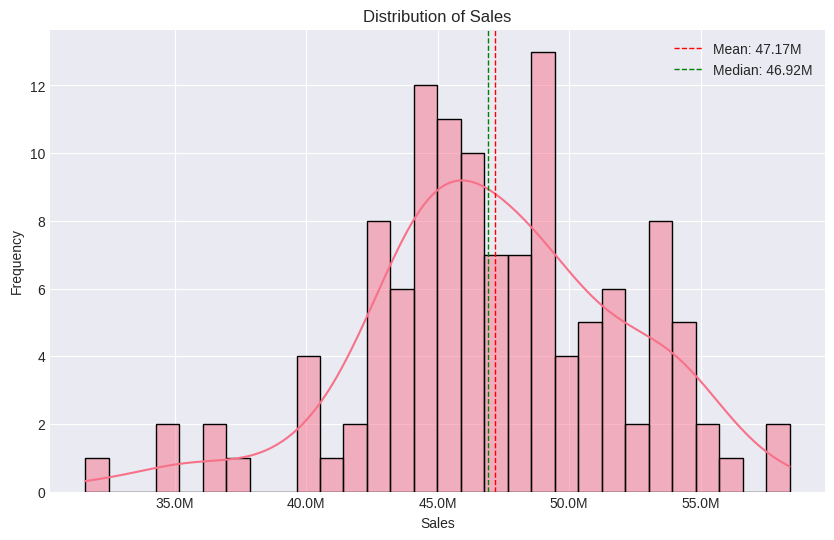

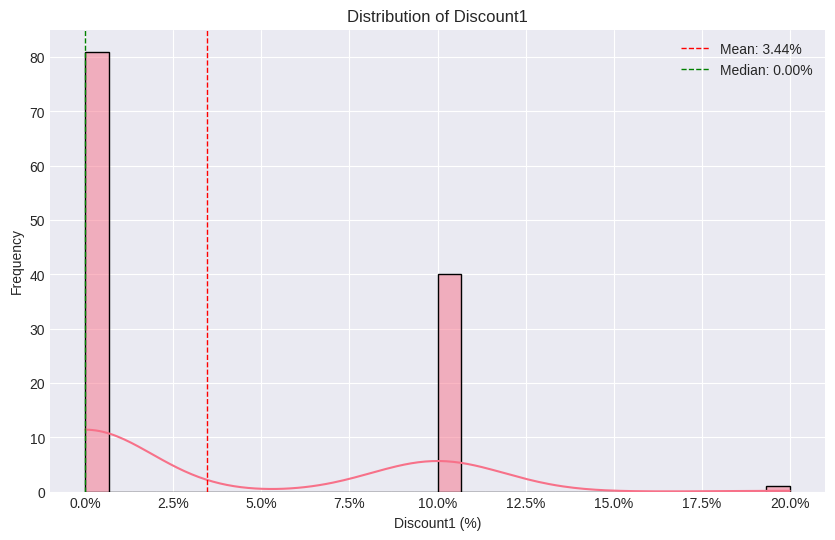

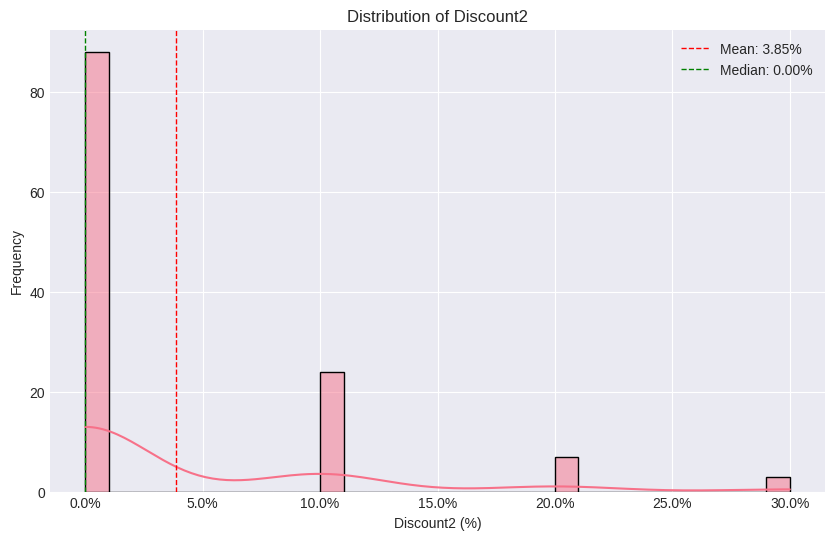

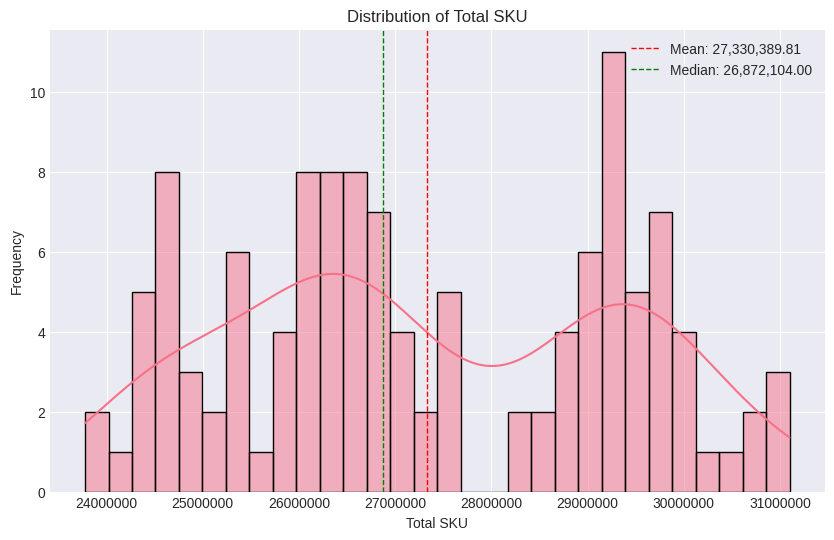

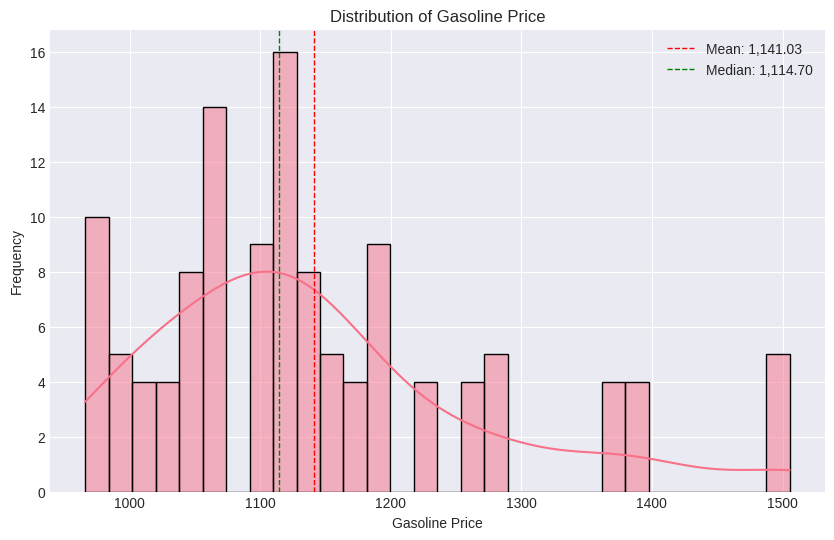

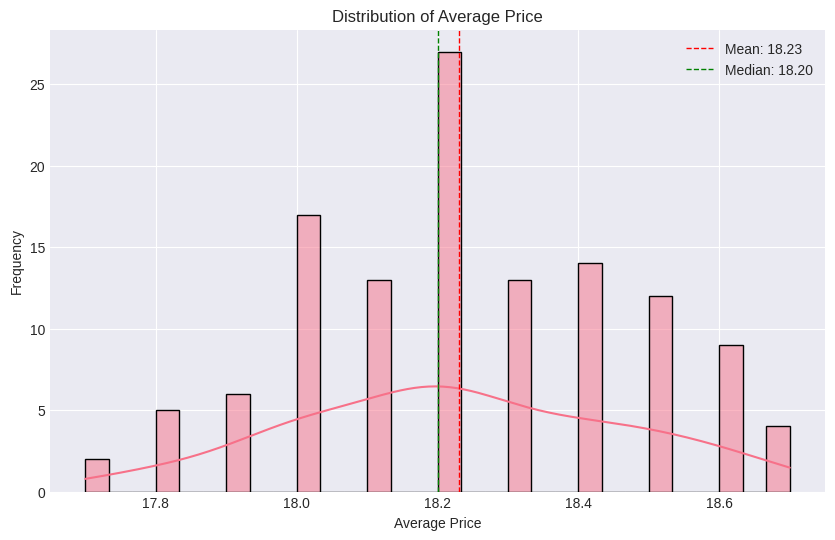

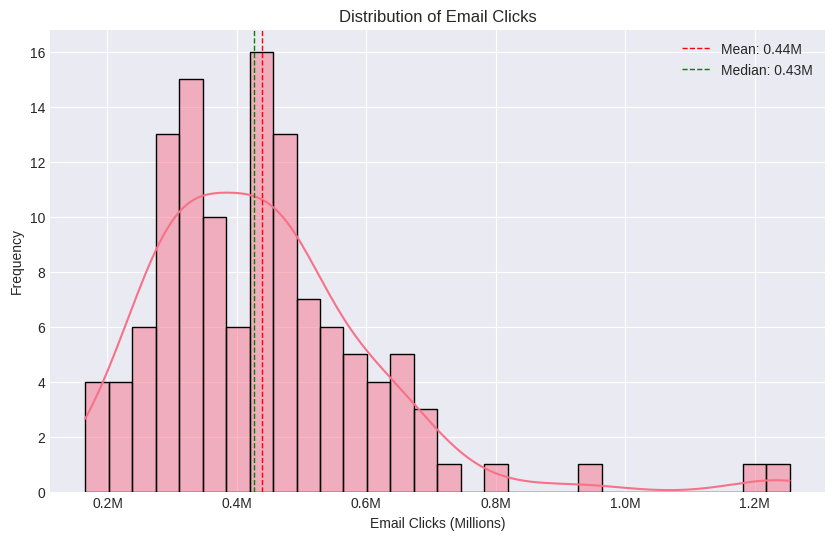

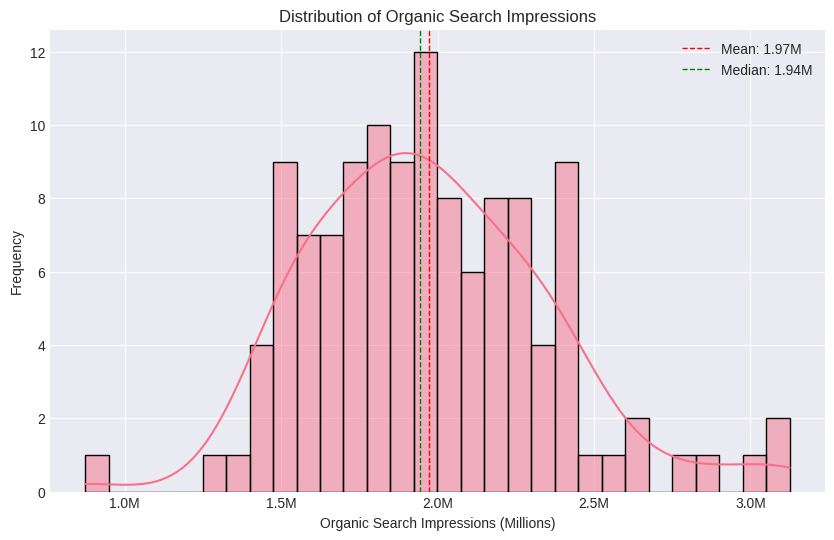

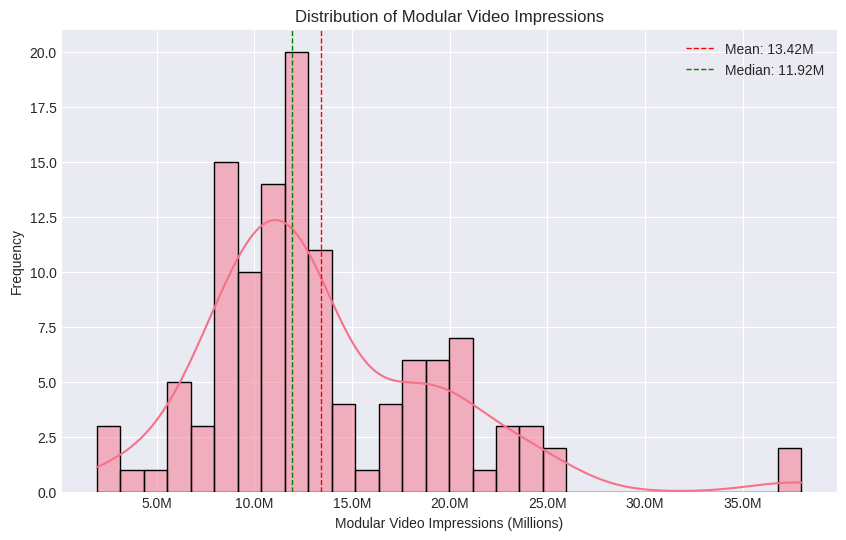

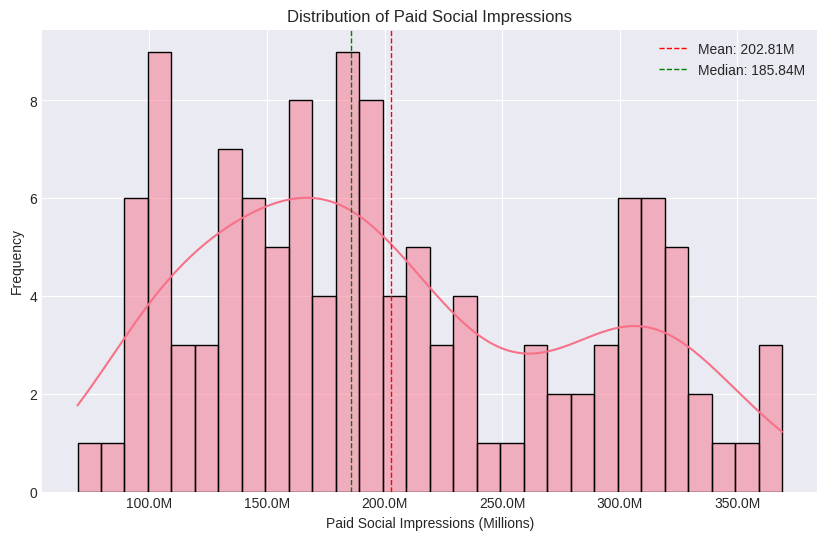



4. BIVARIATE ANALYSIS: RELATIONSHIP WITH TARGET VARIABLE


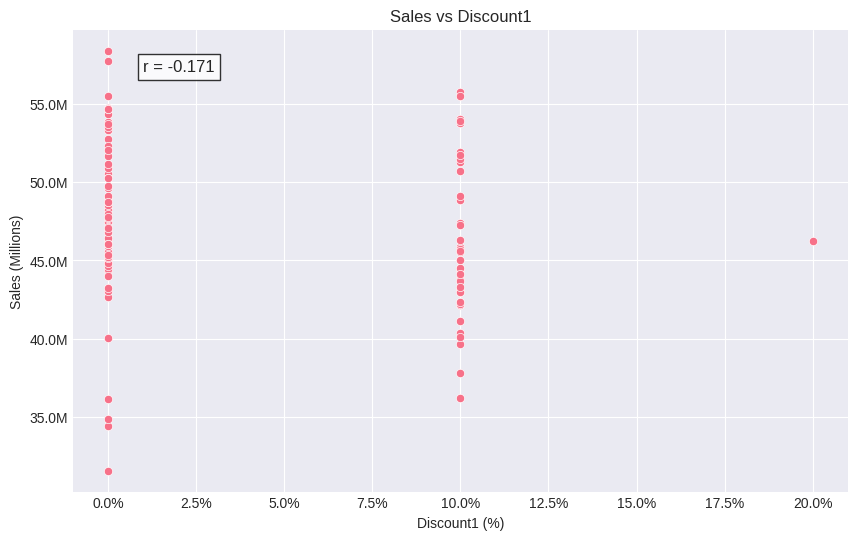

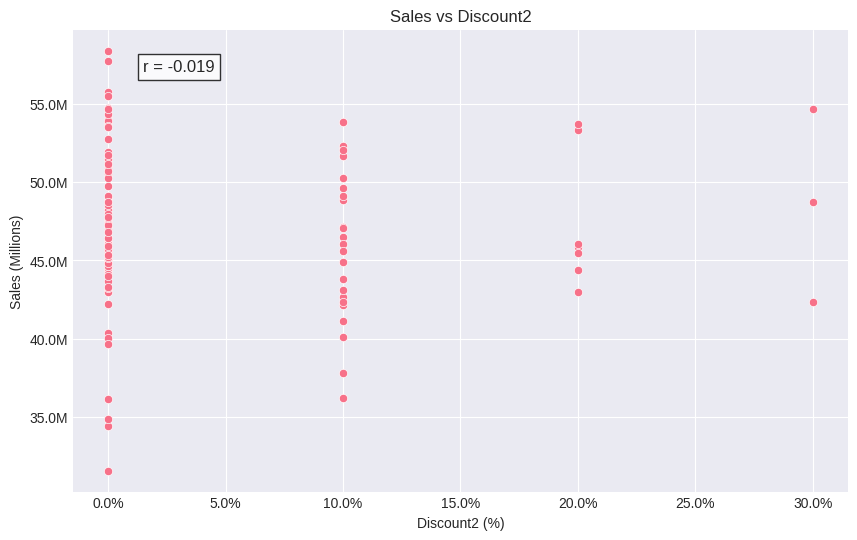

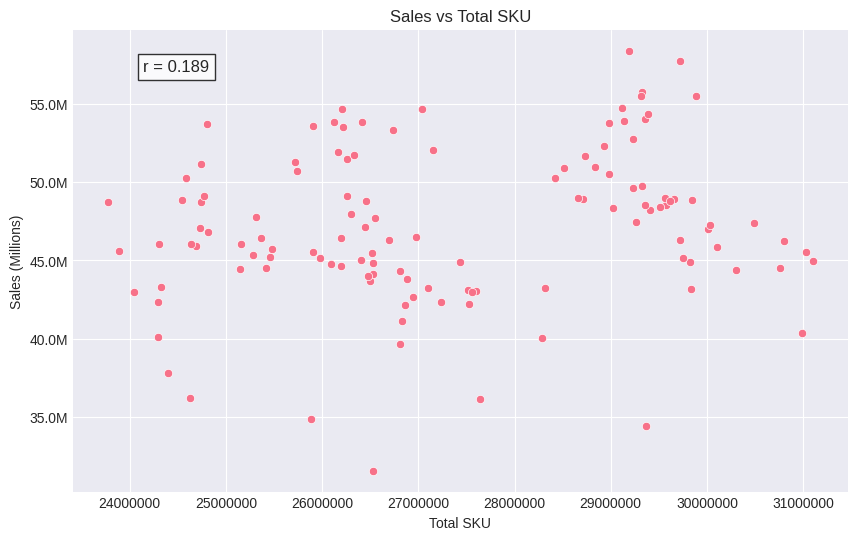

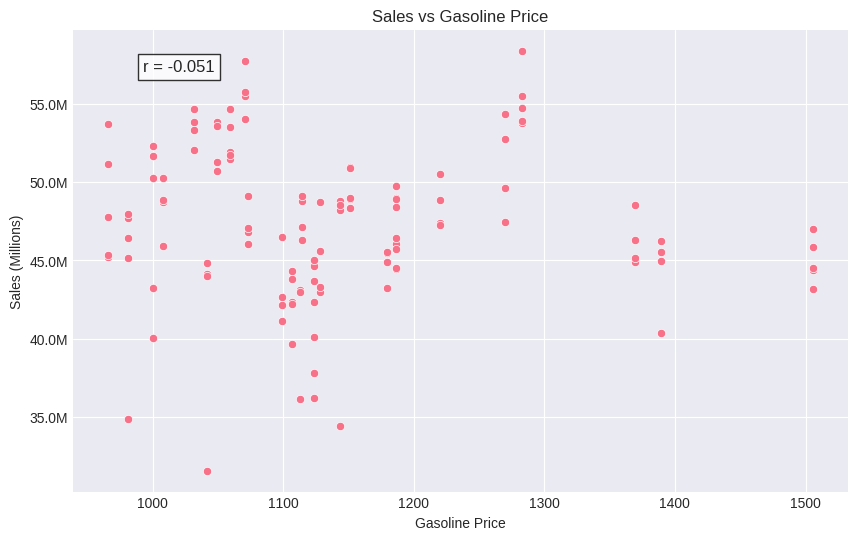

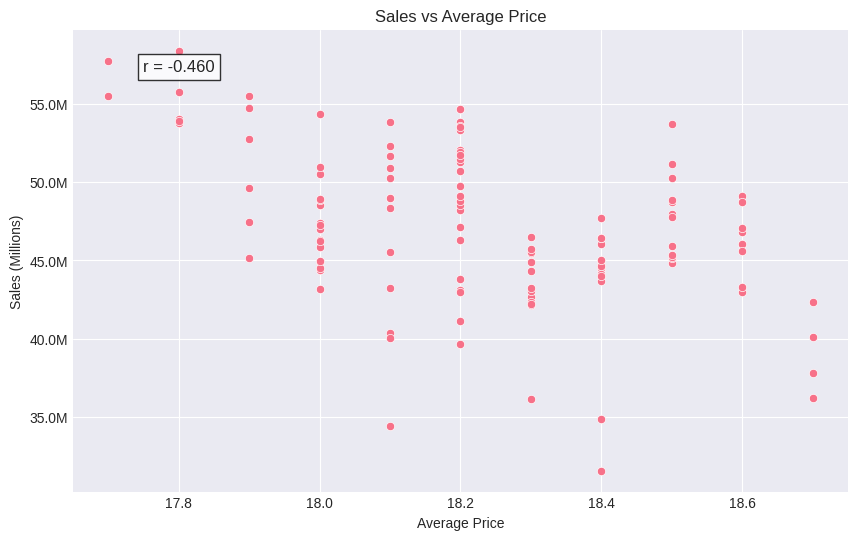

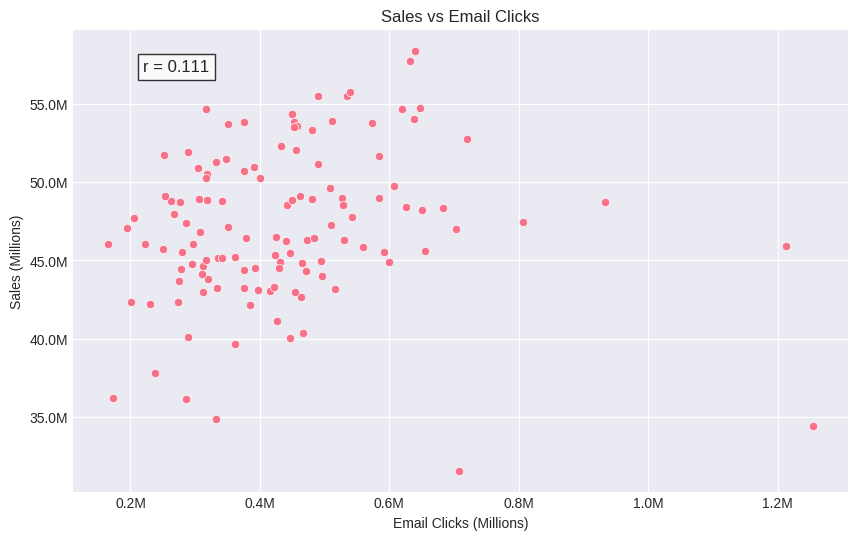

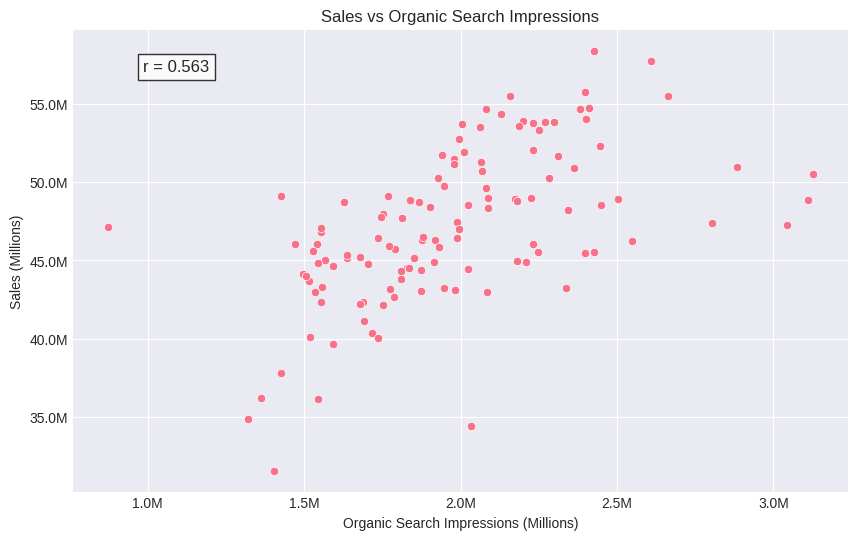

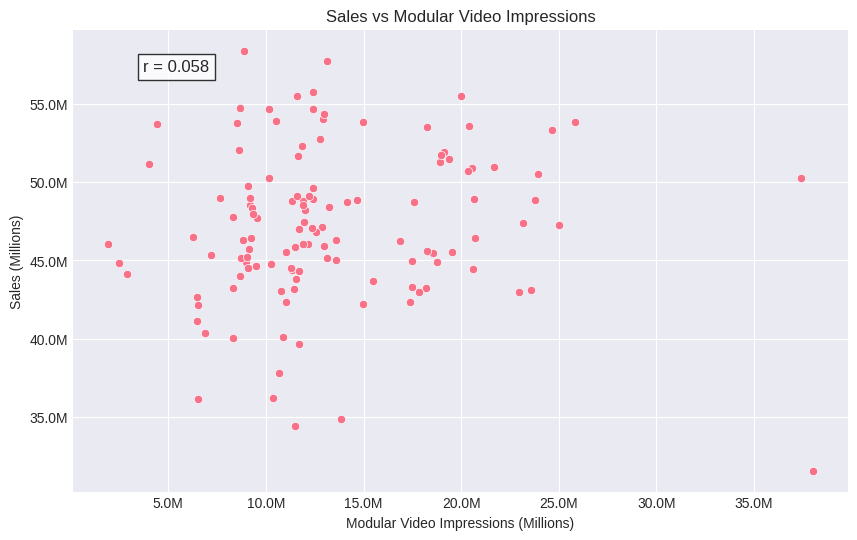

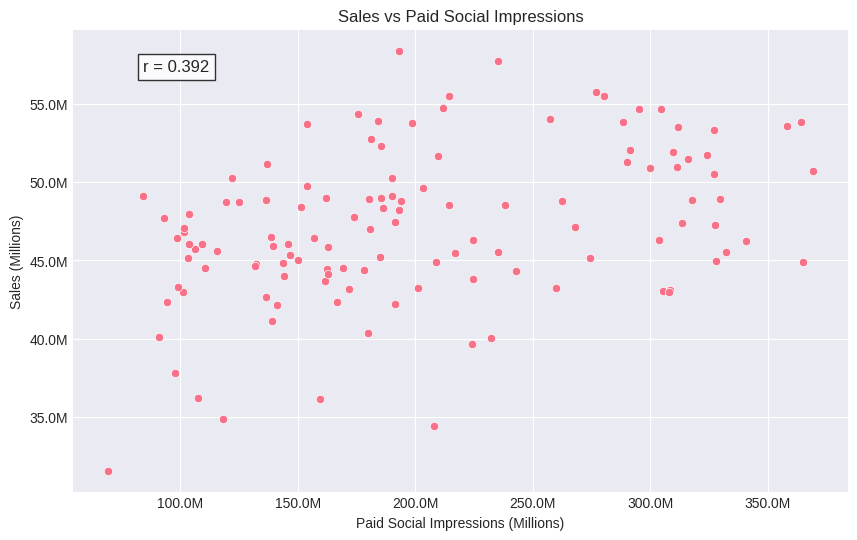



5. TIME SERIES ANALYSIS


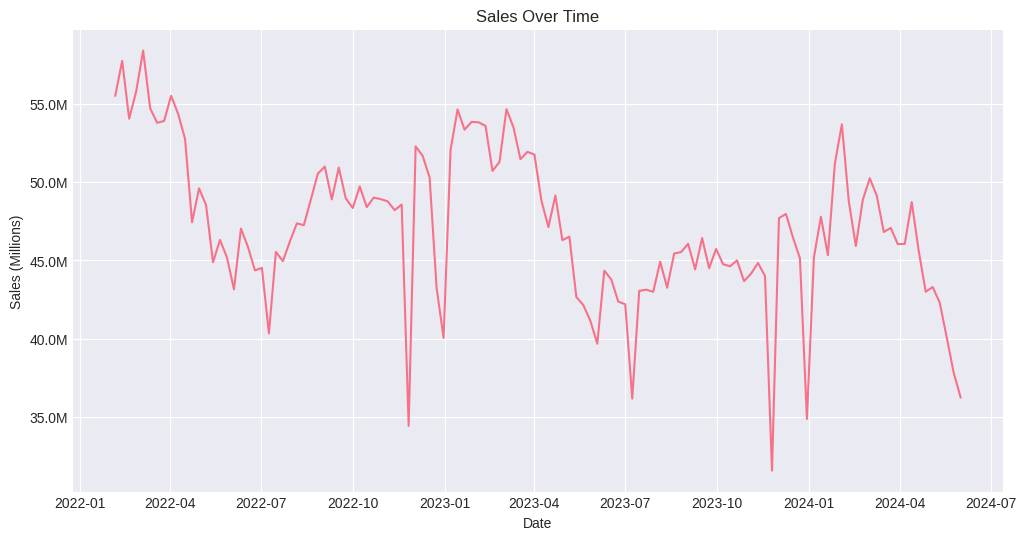

Seasonal Decomposition:


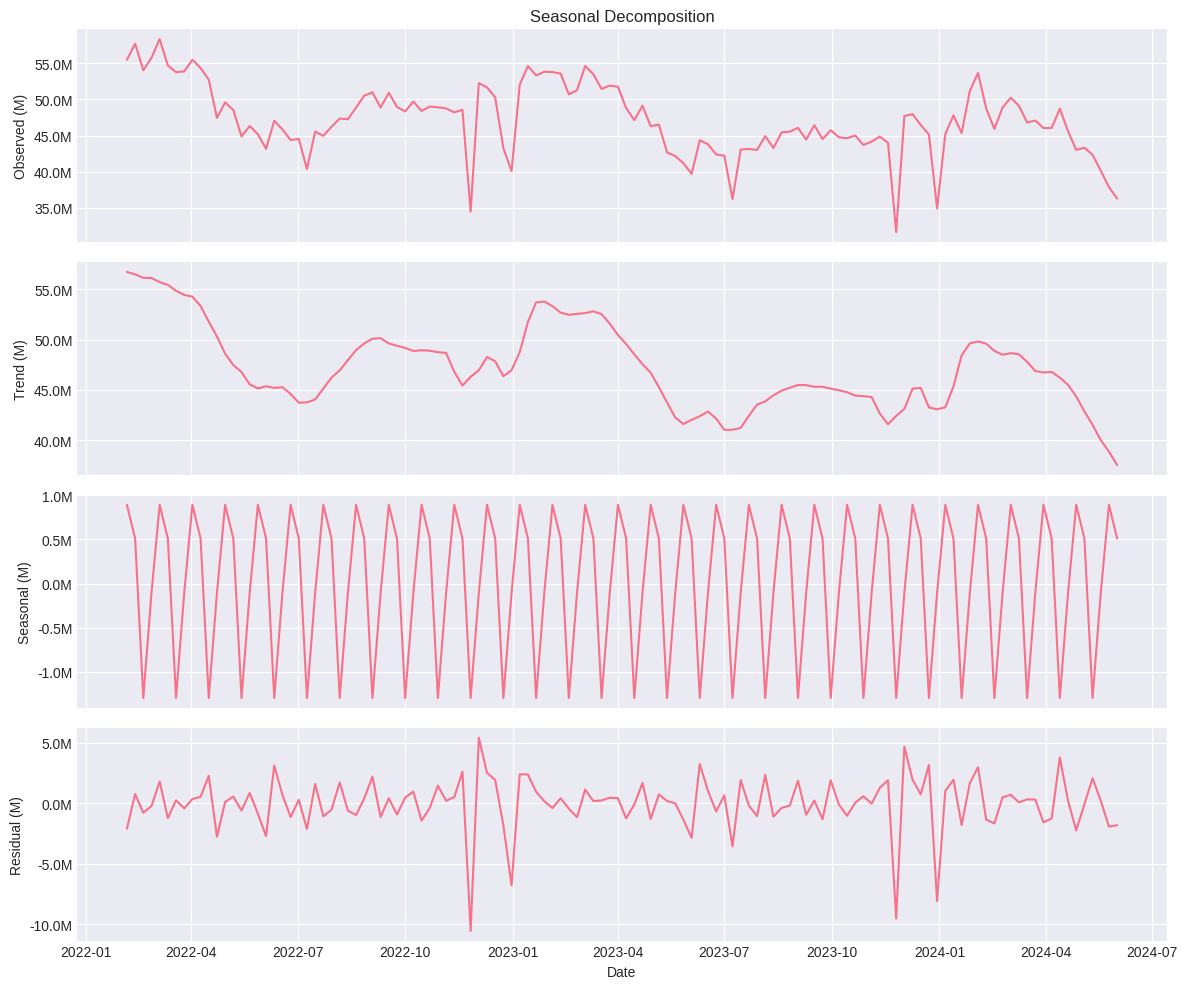



6. CORRELATION ANALYSIS
Full Correlation Matrix:


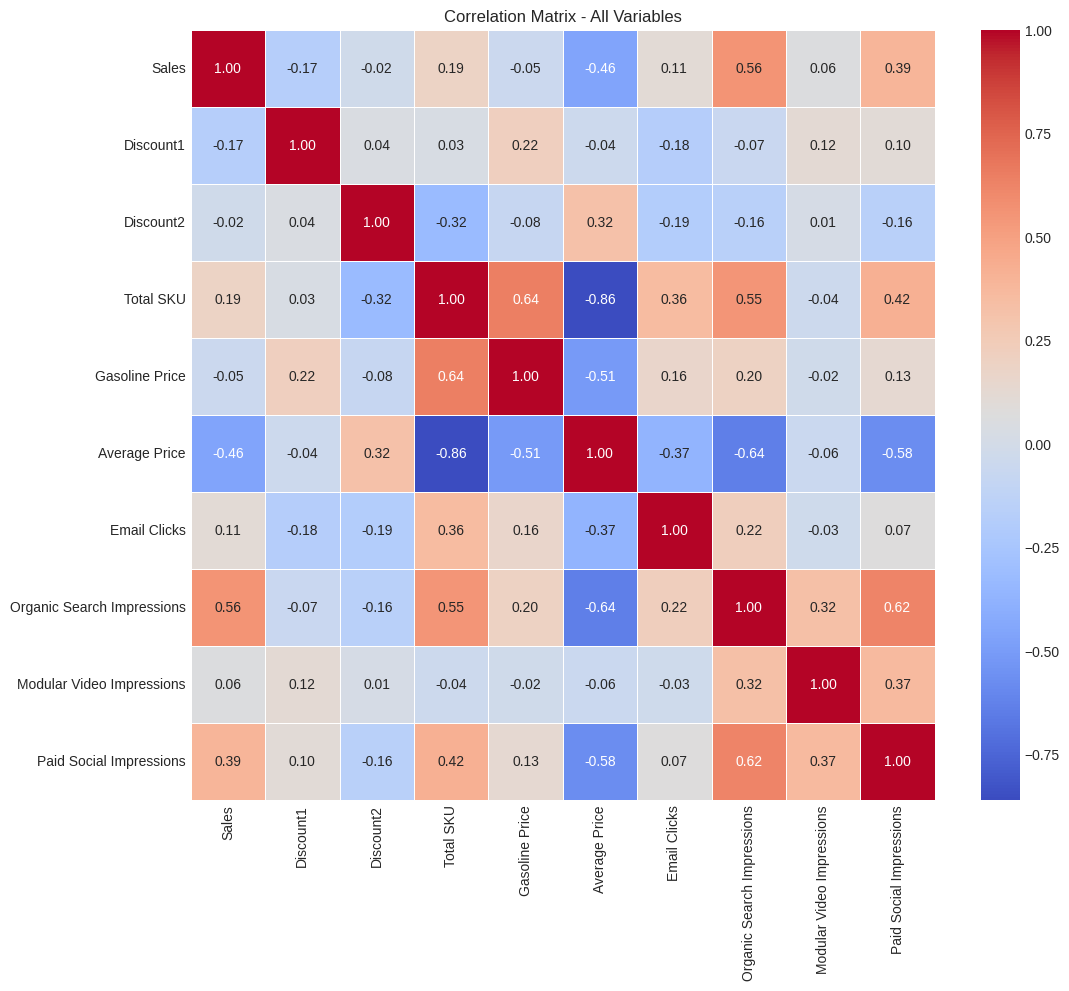

Media Variables Correlation with Target:


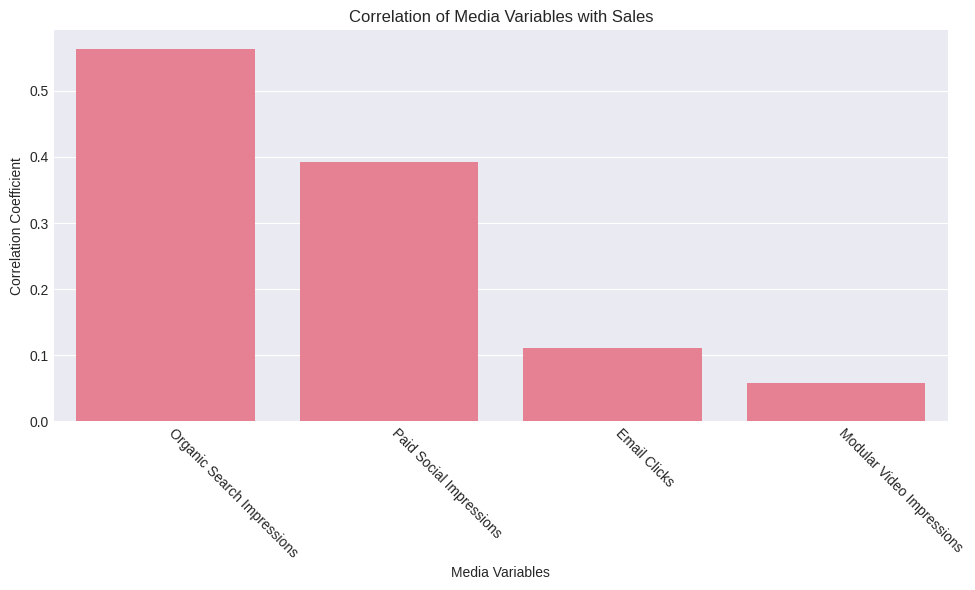

                            Correlation
Organic Search Impressions        0.563
Paid Social Impressions           0.392
Email Clicks                      0.111
Modular Video Impressions         0.058


6.1 MEDIA EXECUTION SHARE


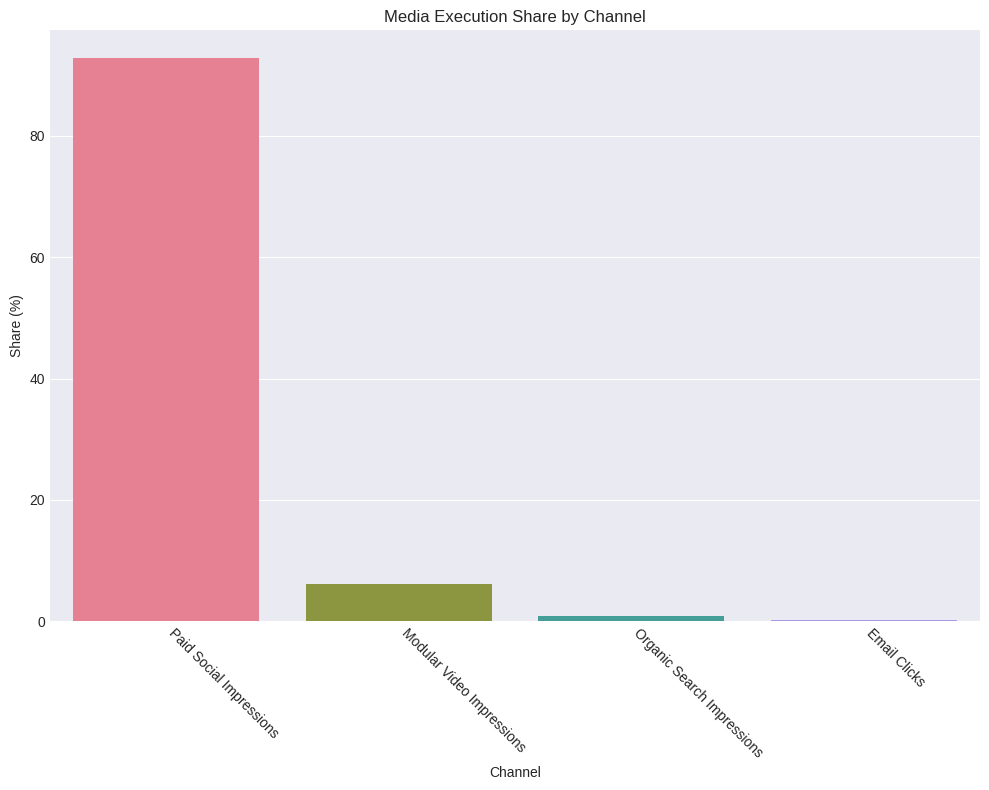

Media Execution Share Percentage:


,Share (%)
Paid Social Impressions,92.76
Modular Video Impressions,6.14
Organic Search Impressions,0.90
Email Clicks,0.20




7. OUTLIER ANALYSIS
Number of potential outliers in Sales: 3
Outlier values:


,Week_Ending,Sales
42,2022-11-26,34440052.1
94,2023-11-25,31585117.8
99,2023-12-30,34881118.4


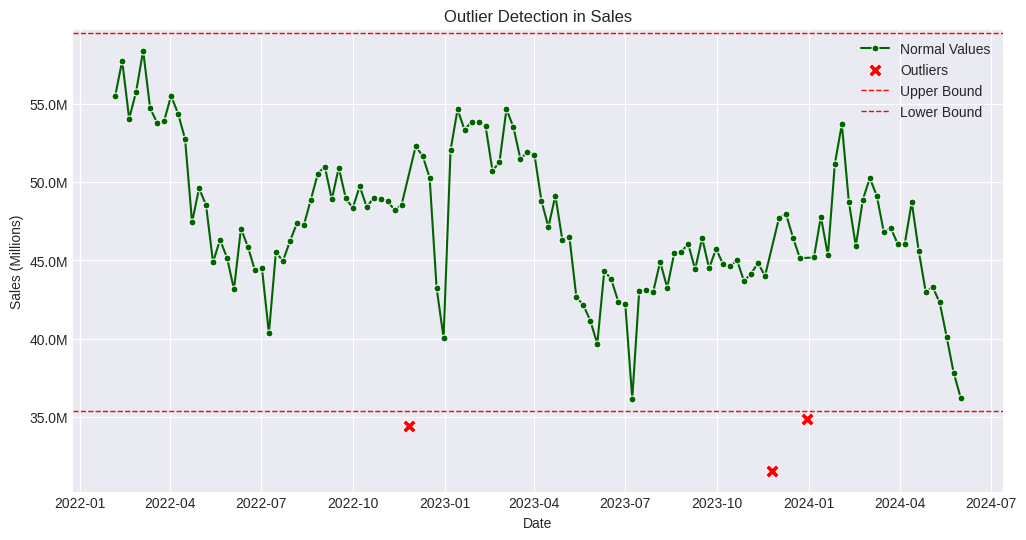


EDA Complete.


In [ ]:
# Marketing Mix Modeling - Colab Testing Version (Optimized)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Uncommented for plotting
import seaborn as sns # Uncommented for plotting
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Add other necessary imports
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.ticker as mticker # Import for custom tick formatting

# Plotly imports (Commented out for potential optimization)
# import plotly.graph_objects as go
# import plotly.express as px
# from plotly.subplots import make_subplots # Import make_subplots
from IPython.display import display # Keep display for DataFrames

# Set style for plots
plt.style.use('seaborn-v0_8-darkgrid') # Use a seaborn style
sns.set_palette("husl")


# Function to convert Indian number format to float
def convert_indian_number(value):
    """Convert Indian number format string to float"""
    if isinstance(value, str):
        # Remove commas and strip whitespace
        cleaned_value = value.replace(',', '').strip()

        # Handle special cases like ' -   ' which should be treated as NaN
        if cleaned_value in ['-', ''] or cleaned_value.isspace():
            return np.nan

        try:
            return float(cleaned_value)
        except ValueError:
            print(f"Could not convert value: '{value}'")
            return np.nan
    return value

# Load and preprocess data
def load_and_preprocess_data(file_path):
    """Load and preprocess the marketing mix data"""
    # Load the data
    data = pd.read_csv(file_path)

    # First, identify all columns that might contain Indian number format
    # These are all columns except the date column
    all_columns = data.columns.tolist()
    date_column = 'Week_Ending'

    if date_column in all_columns:
        all_columns.remove(date_column)

    # Convert all numeric columns (including Sales) - Optimized conversion
    # Apply conversion only to object columns that are likely numbers
    for col in all_columns:
        if data[col].dtype == 'object':
            # Use a more robust check for potential numbers before applying conversion
            try:
                 # Attempt to convert a sample to detect if it's numeric strings
                 data[col].sample(min(10, len(data))).astype(str).str.replace(',', '').astype(float)
                 # If the sample conversion works, apply to the whole column
                 data[col] = data[col].apply(convert_indian_number)
            except (ValueError, AttributeError):
                 # If sample conversion fails, it's likely not a numeric column with commas
                 pass


    # Handle missing values in Paid Search Impressions
    if 'Paid Search Impressions' in data.columns:
        missing_count = data['Paid Search Impressions'].isna().sum()
        if missing_count > 0:
            print(f"Found {missing_count} missing values in 'Paid Search Impressions'. Imputing with 0.")
            data['Paid Search Impressions'] = data['Paid Search Impressions'].fillna(0)

    # Convert date column
    if 'Week_Ending' in data.columns:
        # Use infer_datetime_format=True and cache=True for potentially faster conversion
        data['Week_Ending'] = pd.to_datetime(data['Week_Ending'], format='%d-%m-%Y %H:%M', errors='coerce', infer_datetime_format=True, cache=True)
        data = data.sort_values('Week_Ending').reset_index(drop=True)

    return data


# Perform comprehensive EDA
def perform_comprehensive_eda(data, target_var='Sales'):
    """Perform comprehensive exploratory data analysis"""
    print("="*60)
    print("COMPREHENSIVE EXPLORATORY DATA ANALYSIS")
    print("="*60)

    # 1. Basic Information
    print("\n1. BASIC DATASET INFORMATION")
    print("="*40)
    print(f"Shape: {data.shape}")
    print(f"Columns: {list(data.columns)}")
    if 'Week_Ending' in data.columns:
        print(f"Date Range: {data['Week_Ending'].min()} to {data['Week_Ending'].max()}")
    print(f"Missing Values: {data.isnull().sum().sum()}")

    # Check if target variable is numeric
    if data[target_var].dtype == 'object':
         print(f"\nWARNING: Target variable '{target_var}' is not numeric after preprocessing.")


    # 2. Summary Statistics
    print("\n\n2. SUMMARY STATISTICS")
    print("="*40)

    # Numeric variables summary
    numeric_df = data.select_dtypes(include=[np.number])
    print("Numeric Variables Summary:")
    display(numeric_df.describe())

    # Add skewness and kurtosis
    skewness = numeric_df.skew().to_frame('Skewness')
    kurtosis = numeric_df.kurtosis().to_frame('Kurtosis')
    stats_df = pd.concat([skewness, kurtosis], axis=1)
    print("\nSkewness and Kurtosis:")
    display(stats_df)

    # 3. Univariate Analysis (Using Matplotlib/Seaborn)
    print("\n\n3. UNIVARIATE ANALYSIS")
    print("="*40)

    # Create distribution plots for all numeric variables
    numeric_cols = numeric_df.columns.tolist()
    for col in numeric_cols:
        plt.figure(figsize=(10, 6))
        sns.histplot(data=data, x=col, kde=True, bins=30)
        plt.title(f"Distribution of {col}")
        plt.ylabel("Frequency")

        # Add vertical lines for mean and median with improved formatting
        mean_val = data[col].mean()
        median_val = data[col].median()

        # Conditional formatting for labels and axis ticks based on column name
        if 'impressions' in col.lower() or 'clicks' in col.lower():
            plt.xlabel(f"{col} (Millions)") # Indicate units in label
            mean_label = f'Mean: {mean_val/1e6:.2f}M' # Show in millions for labels
            median_label = f'Median: {median_val/1e6:.2f}M'
            plt.ticklabel_format(style='plain', axis='x') # Turn off scientific notation for x-axis
            # Manually format x-axis ticks for millions
            plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

        elif 'discount' in col.lower():
             plt.xlabel(f"{col} (%)") # Indicate units in label
             mean_label = f'Mean: {mean_val*100:.2f}%' # Show as percentage for labels
             median_label = f'Median: {median_val*100:.2f}%'
             # Format x-axis ticks as percentages
             plt.gca().xaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0)) # xmax=1.0 because data is 0-1 range

        elif col == target_var:
             plt.xlabel(col)
             mean_label = f'Mean: {mean_val/1e6:.2f}M' # Show in millions for labels
             median_label = f'Median: {median_val/1e6:.2f}M'
             plt.ticklabel_format(style='plain', axis='x') # Turn off scientific notation for x-axis
             plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M')) # Format ticks in millions
        else:
            plt.xlabel(col)
            mean_label = f'Mean: {mean_val:,.2f}' # General formatting with commas
            median_label = f'Median: {median_val:,.2f}'
            plt.ticklabel_format(style='plain', axis='x') # Turn off scientific notation for x-axis


        plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label=mean_label)
        plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1, label=median_label)
        plt.legend()
        plt.show()


    # 4. Bivariate Analysis (Using Matplotlib/Seaborn)
    print("\n\n4. BIVARIATE ANALYSIS: RELATIONSHIP WITH TARGET VARIABLE")
    print("="*40)

    # Create scatter plots against target variable
    if target_var in numeric_cols:
        numeric_cols_for_scatter = numeric_cols.copy()
        numeric_cols_for_scatter.remove(target_var)

    for col in numeric_cols_for_scatter:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=data, x=col, y=target_var)
        plt.title(f"{target_var} vs {col}")

        # Conditional formatting for x-axis label and potentially ticks
        if 'impressions' in col.lower() or 'clicks' in col.lower():
            plt.xlabel(f"{col} (Millions)") # Indicate units in label
            plt.ticklabel_format(style='plain', axis='x')
            plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M')) # Format ticks in millions
        elif 'discount' in col.lower():
             plt.xlabel(f"{col} (%)") # Indicate units in label
             plt.gca().xaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0)) # Format ticks as percentage

        else:
            plt.xlabel(col)
            plt.ticklabel_format(style='plain', axis='x') # Turn off scientific notation for x-axis


        # Conditional formatting for y-axis label (target variable) and ticks
        if target_var in numeric_df.columns: # Ensure target variable is numeric before formatting
            plt.ylabel(f"{target_var} (Millions)")
            plt.ticklabel_format(style='plain', axis='y')
            plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M')) # Format ticks in millions
        else:
             plt.ylabel(target_var) # No formatting if target is not numeric


        # Add correlation coefficient as text
        correlation = data[col].corr(data[target_var])
        # Position the text box based on formatted axis limits (more complex, so using a simple approach first)
        # Simple approach: Use relative positioning within the plot area
        plt.text(data[col].min() + (data[col].max() - data[col].min()) * 0.05,
                 data[target_var].max() - (data[target_var].max() - data[target_var].min()) * 0.05,
                 f"r = {correlation:.3f}",
                 fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
        plt.show()


    # 5. Time Series Analysis (Using Matplotlib/Seaborn)
    print("\n\n5. TIME SERIES ANALYSIS")
    print("="*40)

    if 'Week_Ending' in data.columns:
        # Plot target variable over time
        plt.figure(figsize=(12, 6))
        sns.lineplot(data=data, x='Week_Ending', y=target_var)
        plt.title(f"{target_var} Over Time")
        plt.xlabel("Date")
        plt.ylabel(f"{target_var} (Millions)") # Indicate units in label
        # Format y-axis to show values in millions
        plt.ticklabel_format(style='plain', axis='y') # Turn off scientific notation
        plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
        plt.show()


        # Add seasonal decomposition
        print("Seasonal Decomposition:")
        try:
            # Ensure the data is sorted by date and set as index
            temp_df = data.set_index('Week_Ending').sort_index()
            # Use a smaller period if data is limited or seasonality is expected to be short
            # For weekly data, a period of 52 (for annual seasonality) or 4 (for monthly/quarterly) might be appropriate
            # Let's keep 4 as in the original code, assuming quarterly or shorter seasonality might be relevant
            decomposition = seasonal_decompose(temp_df[target_var], period=4, model='additive', extrapolate_trend='freq')

            fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

            # Apply millions formatting to seasonal decomposition plots
            axes[0].plot(decomposition.observed)
            axes[0].set_ylabel("Observed (M)")
            axes[0].set_title("Seasonal Decomposition")
            axes[0].ticklabel_format(style='plain', axis='y')
            axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))


            axes[1].plot(decomposition.trend)
            axes[1].set_ylabel("Trend (M)")
            axes[1].ticklabel_format(style='plain', axis='y')
            axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))


            axes[2].plot(decomposition.seasonal)
            axes[2].set_ylabel("Seasonal (M)")
            axes[2].ticklabel_format(style='plain', axis='y')
            axes[2].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))


            axes[3].plot(decomposition.resid)
            axes[3].set_ylabel("Residual (M)")
            axes[3].ticklabel_format(style='plain', axis='y')
            axes[3].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))


            plt.xlabel("Date")
            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"Could not perform seasonal decomposition: {str(e)}")

    # 6. Correlation Analysis (Using Matplotlib/Seaborn)
    print("\n\n6. CORRELATION ANALYSIS")
    print("="*40)

    # Full correlation matrix
    print("Full Correlation Matrix:")
    corr = numeric_df.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=".5")
    plt.title("Correlation Matrix - All Variables")
    plt.show()

    # Media variables correlation
    media_keywords = ['impressions', 'clicks', 'social', 'search', 'email', 'video']
    # Ensure media_cols are numeric before calculating correlation
    media_cols = [col for col in numeric_df.columns if any(keyword in col.lower() for keyword in media_keywords)]
    media_cols = [col for col in media_cols if col in numeric_df.columns] # Filter to ensure they are in numeric_df


    if media_cols and target_var in numeric_df.columns:
        print("Media Variables Correlation with Target:")
        # Ensure only numeric columns are included in correlation calculation
        media_corr = numeric_df[media_cols + [target_var]].corr()
        # Extract only correlations with target variable
        target_corr = media_corr[target_var].drop(target_var).sort_values(ascending=False)

        # Plot correlations as vertical bars
        plt.figure(figsize=(10, 6))
        sns.barplot(x=target_corr.index, y=target_corr.values)
        plt.title(f"Correlation of Media Variables with {target_var}")
        plt.xlabel("Media Variables")
        plt.ylabel("Correlation Coefficient")
        plt.xticks(rotation=-45, ha='left') # Rotate x-axis labels
        plt.tight_layout() # Adjust layout to prevent labels overlapping
        plt.show()


        # Also show as a table
        print(target_corr.round(3).to_frame("Correlation"))

        # 6.1 Media Execution Share - Change to Bar Chart (Using Matplotlib/Seaborn)
        print("\n\n6.1 MEDIA EXECUTION SHARE")
        print("="*40)

        # Calculate total media execution (sum of all media variables) - Ensure only numeric columns are summed
        media_totals = numeric_df[media_cols].sum()
        total_media = media_totals.sum()

        if total_media > 0:
            # Calculate share percentage
            media_share = (media_totals / total_media) * 100

            # Sort by share for better visualization
            media_share = media_share.sort_values(ascending=False)

            # Create bar chart instead of pie chart
            plt.figure(figsize=(10, 8))
            sns.barplot(x=media_share.index, y=media_share.values, palette='husl')
            plt.title("Media Execution Share by Channel")
            plt.xlabel("Channel")
            plt.ylabel("Share (%)")
            plt.xticks(rotation=-45, ha='left') # Rotate x-axis labels
            plt.tight_layout() # Adjust layout
            plt.show()


            # Display share percentages as table
            print("Media Execution Share Percentage:")
            display(media_share.round(2).to_frame("Share (%)"))
        else:
            print("Total media execution is 0. Cannot generate share chart.")


    # 7. Outlier Analysis (Using Matplotlib)
    print("\n\n7. OUTLIER ANALYSIS")
    print("="*40)

    # Check for outliers in target variable
    # Ensure target variable is numeric
    if target_var in numeric_df.columns:
        Q1 = data[target_var].quantile(0.25)
        Q3 = data[target_var].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = data[(data[target_var] < lower_bound) | (data[target_var] > upper_bound)]
        normal_data = data[~((data[target_var] < lower_bound) | (data[target_var] > upper_bound))]
        print(f"Number of potential outliers in {target_var}: {len(outliers)}")

        if len(outliers) > 0:
            print("Outlier values:")
            display(outliers[['Week_Ending', target_var]])

            # Plot with outliers highlighted
            plt.figure(figsize=(12, 6))
            sns.lineplot(data=normal_data, x='Week_Ending', y=target_var, label='Normal Values', color='darkgreen', marker='o', markersize=5)
            sns.scatterplot(data=outliers, x='Week_Ending', y=target_var, color='red', label='Outliers', s=100, marker='X') # Use scatterplot for outliers

            plt.axhline(upper_bound, color='red', linestyle='dashed', linewidth=1, label='Upper Bound')
            plt.axhline(lower_bound, color='red', linestyle='dashed', linewidth=1, label='Lower Bound')

            plt.title(f"Outlier Detection in {target_var}")
            plt.xlabel("Date")
            plt.ylabel(f"{target_var} (Millions)") # Indicate units in label
            plt.legend()
            plt.ticklabel_format(style='plain', axis='y') # Turn off scientific notation
            plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M')) # Format ticks in millions
            plt.show()
    else:
        print(f"Target variable '{target_var}' is not numeric. Cannot perform outlier analysis.")


    # Return data, numeric_df, and correlation matrix for interactive use
    # Ensure returned dataframes are copies to prevent unintentional modification outside the function
    return data.copy(), numeric_df.copy(), corr.copy()


# Main execution
# Load and preprocess your data
file_path = "/content/Book1.csv"  # Update this path to your file location
data = load_and_preprocess_data(file_path)

# Define the target variable here
target_var = 'Sales'

# Perform comprehensive EDA and get the data, numeric dataframe and correlation matrix
data, numeric_df, correlations = perform_comprehensive_eda(data, target_var=target_var)

# Save data to global scope
# Use get_ipython().user_ns to store variables
get_ipython().user_ns['data'] = data
get_ipython().user_ns['numeric_df'] = numeric_df
get_ipython().user_ns['correlations'] = correlations

print("\nEDA Complete.")

In [ ]:
# ================================================
# OPTIMIZED FEATURE ENGINEERING AND MEDIA PERFORMANCE REPORTING MODULE
# ================================================
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

# Define helper function for YoY formatting with colors and special cases
def format_yoy(yoy_val, base_val):
    """
    Formats YoY percentage with colors and handles special cases (NaN, Inf, 0).
    Checks base_val to differentiate between 0->0 and 0->Inf.
    """
    if pd.isna(yoy_val):
        return 'N/A'
    elif np.isinf(yoy_val):
        if pd.notna(base_val) and base_val == 0:
            return 'No previous data'
        else:
            return '<span style="color:green;">Inf%</span>'
    elif yoy_val == 0.0:
        return '0.00%'
    else:
        color = 'green' if yoy_val > 0 else 'red'
        formatted_val = f'{yoy_val:,.2f}%'
        return f'<span style="color:{color};">{formatted_val}</span>'

# Global dictionary to store original channel names
original_paid_media_mapping = {}

def feature_engineering_and_reporting_module(df):
    """
    Optimized feature engineering module for time series data.
    Includes media spend estimation and performance reporting.
    """
    print("\n===== FEATURE ENGG & MEDIA REPORTING MODULE =====")

    # Check for required columns
    required_cols = ['Week_Ending', 'Sales']
    for col in required_cols:
        if col not in df.columns:
            raise ValueError(f"DataFrame must contain a '{col}' column")

    # Create a copy but avoid unnecessary deep copying
    df = df.copy(deep=False)

    # Track original columns at the start
    initial_columns = set(df.columns)

    # Ensure datetime index and sort - optimized
    if not pd.api.types.is_datetime64_any_dtype(df['Week_Ending']):
        df['Week_Ending'] = pd.to_datetime(df['Week_Ending'], errors='coerce')

    df = df.set_index('Week_Ending').sort_index()
    df.index.name = 'Week_Ending'  # Ensure index has proper name

    # Define constants
    TARGET = "Sales"
    WEEK_COL = "Week_Ending"

    # Define keywords for identifying engineered volume features
    engineered_volume_keywords = ['_pre', '_post', 'combined_var', 'super', '_volume']
    non_media_keywords = [TARGET, WEEK_COL, 'Discount', 'Total SKU', 'Gasoline Price', 'Average Price', 'SIndex', 'Holiday_']

    # --- MEDIA SPEND ESTIMATION ---
    print("\n--- MEDIA SPEND ESTIMATION ---")

    # Identify original paid media columns
    media_keywords_check = ['impressions', 'impr', 'clicks', 'social', 'search', 'video', 'tv', 'display', 'email', 'paid social']

    original_paid_media_cols = [
        col for col in initial_columns
        if any(keyword in col.lower() for keyword in media_keywords_check)
        and 'organic' not in col.lower()
        and not any(nmk.lower() in col.lower() for nmk in non_media_keywords)
        and col != TARGET and col != WEEK_COL
    ]

    # Store globally for later reference
    global original_paid_media_mapping
    original_paid_media_mapping = {col: col for col in original_paid_media_cols}

    print(f"\nIdentified Original Paid Media Channels for Spend Estimation: {original_paid_media_cols}")

    estimated_rates_yearly = {}
    estimated_spend_cols = []

    if original_paid_media_cols:
        print("\n===== ENTER ESTIMATED CPM/CPC RATES BY YEAR =====")
        print("Please provide the estimated rate for each original paid media channel, for each relevant year.")
        print("Rates should correspond to either Impressions (CPM) or Clicks (CPC).")
        print("Enter 0 if you don't have a rate for a specific channel/year.")

        # Get years present in the data - optimized
        years_in_data = sorted(df.index.year.unique().tolist())
        df['Fiscal_Year_Temp'] = df.index.year  # Temporary column for year mapping

        for channel in original_paid_media_cols:
            estimated_rates_yearly[channel] = {}

            # Determine metric type for prompting
            channel_lower = channel.lower()
            is_cpm_name = any(kw in channel_lower for kw in ['impressions', 'impr', 'video', 'tv', 'display'])
            is_cpc_name = 'clicks' in channel_lower

            prompt_metric_type = "Impressions (CPM - Cost Per 1000)" if is_cpm_name else \
                                "Clicks (CPC - Cost Per Click)" if is_cpc_name else \
                                "Volume (Enter appropriate rate, e.g., CPM/CPC)"

            for year in years_in_data:
                while True:
                    try:
                        # Check for predefined rates
                        predefined_rate_key = f'rate_{channel}_{year}'
                        ipython = get_ipython()
                        if ipython and predefined_rate_key in ipython.user_ns:
                            rate = ipython.user_ns[predefined_rate_key]
                            print(f"Using predefined rate for '{channel}' for FY {year}: {rate}")
                            estimated_rates_yearly[channel][year] = float(rate)
                            break

                        # Interactive input
                        rate_input = input(f"Enter rate for '{channel}' for FY {year} ({prompt_metric_type}): ").strip()
                        if not rate_input:
                            print(f"ℹ️ No rate entered for '{channel}' for FY {year}. Assuming rate is 0.")
                            estimated_rates_yearly[channel][year] = 0.0
                            break

                        rate = float(rate_input)
                        if rate < 0:
                            print("⚠️ Rate cannot be negative. Please enter a positive number or 0.")
                            continue

                        estimated_rates_yearly[channel][year] = rate
                        print(f"✅ Rate stored for '{channel}' for FY {year}: {rate}")
                        break
                    except ValueError:
                        print("⚠️ Invalid input. Please enter a numeric value (e.g., 0.5, 10.25).")
                    except EOFError:
                        print("\nInput ended. Skipping remaining rate inputs.")
                        raise

        # Calculate estimated spend columns for original channels - optimized vectorized approach
        print("\n===== CALCULATING ESTIMATED SPEND FOR ORIGINAL CHANNELS =====")

        for channel, rates_by_year in estimated_rates_yearly.items():
            if channel not in df.columns:
                print(f"⚠️ Warning: Original channel column '{channel}' not found in DataFrame. Cannot calculate spend.")
                continue

            spend_col_name = f"{channel}_Spend"
            channel_lower = channel.lower()

            # Determine calculation type
            is_cpm_calc = any(kw in channel_lower for kw in ['impressions', 'impr', 'video', 'tv', 'display'])
            is_cpc_calc = 'clicks' in channel_lower

            if not is_cpm_calc and not is_cpc_calc:
                print(f"⚠️ Warning: Channel '{channel}' type unclear for calculation. Skipping spend for this channel.")
                continue

            # Convert channel data to numeric, handling errors
            try:
                # First try to convert to numeric
                channel_data = pd.to_numeric(df[channel], errors='coerce')

                # Check if conversion resulted in many NaN values
                if channel_data.isna().sum() > 0:
                    print(f"⚠️ Warning: Channel '{channel}' has non-numeric values. Converting to 0.")
                    channel_data = channel_data.fillna(0)

                # Create a rate mapping series for vectorized calculation
                rate_series = df['Fiscal_Year_Temp'].map(rates_by_year).fillna(0)

                # Calculate spend based on type
                if is_cpm_calc:
                    df[spend_col_name] = (channel_data / 1000) * rate_series
                elif is_cpc_calc:
                    df[spend_col_name] = channel_data * rate_series

                # Check if any spend was calculated
                if (df[spend_col_name] > 0).any():
                    estimated_spend_cols.append(spend_col_name)
                    print(f"  - Calculated {spend_col_name} using yearly rates.")
                else:
                    df.drop(columns=[spend_col_name], inplace=True)
                    print(f"  - No positive rates provided for '{channel}' across years. {spend_col_name} not added.")

            except Exception as e:
                print(f"❌ Error calculating spend for '{channel}': {e}")
                if spend_col_name in df.columns:
                    df.drop(columns=[spend_col_name], inplace=True)

        # Drop the temporary column
        if 'Fiscal_Year_Temp' in df.columns:
            df.drop(columns=['Fiscal_Year_Temp'], inplace=True)

        # Display head of the DataFrame with new spend columns
        if estimated_spend_cols:
            print("\n📋 DataFrame head with new estimated spend columns for original channels:")
            display_cols = [col for col in df.columns if any(media_col in col for media_col in original_paid_media_cols)]
            display(df[display_cols].head())
        else:
            print("\nℹ️ No estimated spend columns were created for original channels.")
    else:
        print("\nℹ️ No Original Paid Media Channels identified for spend estimation.")

    # --- FEATURE ENGINEERING STEPS ---
    print("\n--- FEATURE ENGINEERING STEPS (Applied to Volume & Spend) ---")

    # 1. Seasonal Index (SIndex) - Interactive selection
    print("\n===== SEASONAL DECOMPOSITION =====")
    print("Select Seasonal Decomposition Period:")
    print("Options: [1] 4 (Quarterly), [2] 13 (Lunar/Quarterly), [3] 26 (Bi-annual), [4] 52 (Annual)")

    seasonal_period_options = {1: 4, 2: 13, 3: 26, 4: 52}
    selected_period = 52  # Default to annual

    try:
        period_choice = input(f"Enter choice (1-4) or press Enter for default ({selected_period}): ").strip()
        if period_choice and period_choice.isdigit():
            period_idx = int(period_choice)
            selected_period = seasonal_period_options.get(period_idx, selected_period)
    except (EOFError, Exception):
        pass  # Use default on any error

    print(f"✅ Selected seasonal decomposition period: {selected_period}.")

    # Apply seasonal decomposition with selected period
    if TARGET in df.columns:
        print("\nPerforming Seasonal Decomposition:")
        try:
            temp_series = df[TARGET].copy()

            # Handle missing values
            if temp_series.isna().any():
                temp_series = temp_series.fillna(method='ffill').fillna(method='bfill')

            # Perform seasonal decomposition
            decomposition = seasonal_decompose(temp_series, period=selected_period,
                                             model='additive', extrapolate_trend='freq')

            # Add seasonal component as SIndex
            df['SIndex'] = decomposition.seasonal.values
            print(f"✅ Seasonal Index (SIndex) created using period {selected_period}.")
        except Exception as e:
            print(f"❌ Could not perform seasonal decomposition: {str(e)}. SIndex not created.")
    else:
        print(f"⚠️ Target variable '{TARGET}' not found. Cannot perform seasonal decomposition.")

    # 2. Custom Dummy Variables - Interactive creation
    print("\n===== CUSTOM DUMMY VARIABLES =====")
    custom_dummy_cols = []

    try:
        dummy_choice = input("Do you want to add custom dummy variables? (Y/N): ").strip().lower()
        if dummy_choice == 'y':
            print("\nEnter comma-separated dates for the custom dummy variables (YYYY-MM-DD).")
            print("For example: '2022-11-26,2023-11-26,2024-01-01'")
            print("Dummy variables will be automatically named based on dates (dummy1_2022-11-26, dummy2_2023-11-26, etc.)")

            dates_input = input("Enter comma-separated dates: ").strip()

            if dates_input:
                try:
                    # Parse dates with proper error handling - optimized
                    date_strings = [d.strip() for d in dates_input.split(',') if d.strip()]
                    date_objects = pd.to_datetime(date_strings, format='%Y-%m-%d', errors='coerce')
                    valid_dates = date_objects[date_objects.notna()]

                    if len(valid_dates) > 0:
                        # Precompute index dates for vectorized comparison
                        index_dates = df.index.normalize()  # Normalize to remove time component

                        for i, date_obj in enumerate(valid_dates, 1):
                            dummy_name = f"dummy{i}_{date_obj.strftime('%Y-%m-%d')}"
                            # Vectorized creation of dummy variable
                            df[dummy_name] = (index_dates == date_obj).astype(int)
                            custom_dummy_cols.append(dummy_name)
                            print(f"✅ Custom dummy '{dummy_name}' created for date: {date_obj.strftime('%Y-%m-%d')}.")
                    else:
                        print("⚠️ No valid dates entered. Skipping custom dummy creation.")
                except Exception as e:
                    print(f"❌ An error occurred while creating dummies: {e}")
    except (EOFError, Exception):
        print("⚠️ Skipping custom dummy creation due to input issue.")

    # 3. Split Variable (Apply to Volume AND Spend)
    try:
        split_choice = input("\nDo you want to split a variable at a date? (Y/N): ").strip().lower()
        if split_choice == 'y':
            print("\nAvailable variables for splitting:")

            # Exclude certain columns from split options
            exclude_from_split = ['SIndex', TARGET, 'Fiscal_Year'] + custom_dummy_cols
            all_vars_for_split = [
                col for col in df.columns
                if col not in exclude_from_split
                and not col.startswith('Holiday_')
                and '_Spend' not in col
            ]

            for i, var in enumerate(all_vars_for_split, 1):
                print(f"{i}. {var}")

            try:
                var_idx = int(input("Select variable number to split: ")) - 1
                if 0 <= var_idx < len(all_vars_for_split):
                    var_name = all_vars_for_split[var_idx]

                    # Check if this variable has a spend counterpart
                    spend_counterpart = f"{var_name}_Spend"
                    has_spend_counterpart = spend_counterpart in df.columns

                    split_date_str = input("Enter split date (YYYY-MM-DD): ").strip()

                    try:
                        split_dt = pd.to_datetime(split_date_str)

                        # Check if the split date is within the data's date range
                        if split_dt < df.index.min() or split_dt > df.index.max():
                            print(f"⚠️ Split date {split_date_str} is outside the data range. Split may not be meaningful.")

                        # Ensure the original variable is numeric before splitting
                        if not pd.api.types.is_numeric_dtype(df[var_name]):
                            # Try to convert to numeric
                            df[var_name] = pd.to_numeric(df[var_name], errors='coerce').fillna(0)
                            print(f"⚠️ Converted '{var_name}' to numeric for splitting.")

                        # Vectorized splitting
                        pre_mask = df.index <= split_dt

                        # Split the volume column
                        df[f"{var_name}_pre"] = df[var_name].where(pre_mask, 0)
                        df[f"{var_name}_post"] = df[var_name].where(~pre_mask, 0)

                        # If there is a spend counterpart, split that too
                        if has_spend_counterpart:
                            # Ensure spend column is numeric
                            if not pd.api.types.is_numeric_dtype(df[spend_counterpart]):
                                df[spend_counterpart] = pd.to_numeric(df[spend_counterpart], errors='coerce').fillna(0)
                                print(f"⚠️ Converted '{spend_counterpart}' to numeric for splitting.")

                            df[f"{spend_counterpart}_pre"] = df[spend_counterpart].where(pre_mask, 0)
                            df[f"{spend_counterpart}_post"] = df[spend_counterpart].where(~pre_mask, 0)
                            print(f"✅ Split spend counterpart {spend_counterpart}")

                        # Drop the original variable(s)
                        cols_to_drop = [var_name]
                        if has_spend_counterpart and spend_counterpart in df.columns:
                            cols_to_drop.append(spend_counterpart)
                            if spend_counterpart in estimated_spend_cols:
                                estimated_spend_cols.remove(spend_counterpart)

                        df.drop(columns=cols_to_drop, inplace=True)
                        print(f"✅ Split {var_name} at {split_dt.date()} and dropped original variable(s)")
                    except ValueError:
                        print("⚠️ Invalid date format. Please use YYYY-MM-DD.")
                else:
                    print("⚠️ Invalid selection")
            except ValueError:
                print("⚠️ Invalid input for variable number.")
    except (EOFError, Exception):
        print("⚠️ Skipping variable splitting due to input issue.")

    # 4. Super Campaign (Apply to Volume AND Spend)
    try:
        super_choice = input("\nDo you want to create a super campaign? (Y/N): ").strip().lower()
        if super_choice == 'y':
            print("\nAvailable variables for combining:")

            # Exclude certain columns from super campaign options
            exclude_from_super = ['SIndex', TARGET, 'Fiscal_Year'] + custom_dummy_cols
            all_vars_for_super = [
                col for col in df.columns
                if col not in exclude_from_super
                and not col.startswith('Holiday_')
                and '_Spend' not in col
                and not col.endswith(('_pre', '_post'))
            ]

            for i, var in enumerate(all_vars_for_super, 1):
                print(f"{i}. {var}")

            try:
                selected = input("Enter variable numbers to combine (comma separated): ")
                var_indices = [
                    int(x.strip())-1 for x in selected.split(",")
                    if x.strip().isdigit() and 0 <= int(x.strip())-1 < len(all_vars_for_super)
                ]
                vars_to_combine = [all_vars_for_super[i] for i in var_indices]

                if vars_to_combine:
                    # Ask for custom name
                    name_choice = input("Do you want to provide a custom name for the Super Campaign? (Y/N): ").strip().lower()
                    if name_choice == 'y':
                        super_base_name = input("Enter the custom name (e.g., Super_Media): ").strip()
                        if not super_base_name:
                            super_base_name = "Super_Campaign"
                    else:
                        super_base_name = "Super_Campaign"

                    super_volume_col = f"{super_base_name}_Volume"
                    super_spend_col = f"{super_base_name}_Spend"

                    # Check for non-numeric variables and convert them
                    for var in vars_to_combine:
                        if not pd.api.types.is_numeric_dtype(df[var]):
                            df[var] = pd.to_numeric(df[var], errors='coerce').fillna(0)
                            print(f"⚠️ Converted '{var}' to numeric for super campaign.")

                    # Check for non-numeric variables
                    non_numeric_vars = [v for v in vars_to_combine if not pd.api.types.is_numeric_dtype(df[v])]
                    if non_numeric_vars:
                        print(f"⚠️ Cannot combine non-numeric variables: {non_numeric_vars}. Skipping Super Campaign.")
                    else:
                        # Check for spend counterparts
                        spend_vars_to_sum = [
                            f"{v}_Spend" for v in vars_to_combine
                            if f"{v}_Spend" in df.columns
                        ]

                        # Ensure spend columns are numeric
                        for spend_var in spend_vars_to_sum:
                            if not pd.api.types.is_numeric_dtype(df[spend_var]):
                                df[spend_var] = pd.to_numeric(df[spend_var], errors='coerce').fillna(0)
                                print(f"⚠️ Converted '{spend_var}' to numeric for super campaign.")

                        # Create Super Campaign Volume
                        df[super_volume_col] = df[vars_to_combine].sum(axis=1)

                        # Create Super Campaign Spend if any spend variables exist
                        if spend_vars_to_sum:
                            df[super_spend_col] = df[spend_vars_to_sum].sum(axis=1)
                            estimated_spend_cols.append(super_spend_col)
                            print(f"✅ Created Super Campaign Spend: {super_spend_col}")

                        # Drop the original volume variables
                        vars_to_drop = [v for v in vars_to_combine if v in df.columns]
                        if vars_to_drop:
                            df.drop(columns=vars_to_drop, inplace=True)
                            print(f"✅ Dropped original volume variable(s): {vars_to_drop}")
                else:
                    print("⚠️ No valid variables selected")
            except ValueError:
                print("⚠️ Invalid input for variable numbers.")
    except (EOFError, Exception):
        print("⚠️ Skipping super campaign creation due to input issue.")

    # --- MEDIA PERFORMANCE REPORTING ---
    print("\n\n===== MEDIA SPEND ESTIMATION & PERFORMANCE REPORTING =====")
    print("-" * 60)

    # Ensure 'Fiscal_Year' is in df for grouping
    if 'Fiscal_Year' not in df.columns:
        df['Fiscal_Year'] = df.index.year
        print("✅ Created 'Fiscal_Year' column from index.")

    # Identify columns for reporting
    media_keywords_check_reporting = ['impressions', 'impr', 'clicks', 'social', 'search', 'video', 'tv', 'display', 'email', 'paid social']
    non_media_keywords_reporting = [TARGET, WEEK_COL, 'Discount', 'Total SKU', 'Gasoline Price', 'Average Price', 'SIndex', 'Holiday_']

    # Get all volume media columns
    media_volume_reporting_candidates = [
        col for col in df.columns
        if any(keyword in col.lower() for keyword in media_keywords_check_reporting)
        and 'organic' not in col.lower()
        and col != TARGET and col != WEEK_COL
        and '_Spend' not in col
        and not any(nmk.lower() in col.lower() for nmk in non_media_keywords_reporting)
    ]

    # Add engineered volume features
    engineered_volume_reporting = [
        col for col in df.columns
        if any(keyword in col.lower() for keyword in engineered_volume_keywords)
        and '_Spend' not in col
    ]

    all_volume_media_cols_report = list(set(media_volume_reporting_candidates + engineered_volume_reporting))
    all_volume_media_cols_report = [col for col in all_volume_media_cols_report if col in df.columns]

    # Get all estimated spend media columns
    all_spend_media_cols_report = [col for col in df.columns if '_Spend' in col]
    aggregation_cols_report = all_volume_media_cols_report + all_spend_media_cols_report

    # Perform aggregation if we have columns to aggregate
    if aggregation_cols_report:
        # Ensure all aggregation columns are numeric
        for col in aggregation_cols_report:
            if col in df.columns:
                df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

        # Filter to ensure only numeric columns are included
        numeric_aggregation_cols = [
            col for col in aggregation_cols_report
            if col in df.columns and pd.api.types.is_numeric_dtype(df[col])
        ]

        if numeric_aggregation_cols:
            # Group by Fiscal_Year and calculate sum
            yearly_aggregation = df.groupby('Fiscal_Year')[numeric_aggregation_cols].sum()
            print("\n✅ Data aggregated by Fiscal Year.")

            # Calculate year-over-year changes
            print("\n===== CALCULATING YEAR-OVER-YEAR (YoY) CHANGES =====")
            yoy_changes = pd.DataFrame(index=yearly_aggregation.columns)

            # Define years present in the aggregated data
            agg_years = yearly_aggregation.index.tolist()

            # Calculate YoY changes for available years
            if 2022 in agg_years and 2023 in agg_years:
                val_2022 = yearly_aggregation.loc[2022]
                val_2023 = yearly_aggregation.loc[2023]

                # Vectorized YoY calculation
                with np.errstate(divide='ignore', invalid='ignore'):
                    yoy_22_23 = np.where(
                        val_2022 != 0,
                        ((val_2023 - val_2022) / val_2022) * 100,
                        np.where(val_2023 != 0, np.inf, 0)
                    )

                yoy_changes['FY22_to_FY23_YoY_Pct'] = yoy_22_23

            if 2023 in agg_years and 2024 in agg_years:
                val_2023 = yearly_aggregation.loc[2023]
                val_2024 = yearly_aggregation.loc[2024]

                # Vectorized YoY calculation
                with np.errstate(divide='ignore', invalid='ignore'):
                    yoy_23_24 = np.where(
                        val_2023 != 0,
                        ((val_2024 - val_2023) / val_2023) * 100,
                        np.where(val_2024 != 0, np.inf, 0)
                    )

                yoy_changes['FY23_to_FYTD24_YoY_Pct'] = yoy_23_24

            print("\n✅ Year-over-Year changes calculated.")

            # Generate tabular report
            print("\n===== MEDIA PERFORMANCE REPORT BY FISCAL YEAR =====")

            # Create a combined report DataFrame
            yearly_agg_transposed = yearly_aggregation.T
            yearly_agg_transposed.index.name = 'Metric'

            # Rename columns for clarity
            year_cols_map = {year: f'FY {year}' for year in yearly_aggregation.index}
            if 2024 in year_cols_map:
                year_cols_map[2024] = 'FYTD 2024'
            yearly_agg_transposed = yearly_agg_transposed.rename(columns=year_cols_map)

            # Reset index to turn 'Metric' into a column
            yearly_agg_transposed = yearly_agg_transposed.reset_index()

            # Split 'Metric' into 'Channel' and 'Type'
            yearly_agg_transposed['Channel'] = yearly_agg_transposed['Metric'].str.replace('_Spend', '')
            yearly_agg_transposed['Type'] = yearly_agg_transposed['Metric'].apply(
                lambda x: 'Estimated Spend' if '_Spend' in x else 'Execution'
            )

            # Drop the original 'Metric' column
            yearly_agg_transposed = yearly_agg_transposed.drop(columns=['Metric'])

            # Set 'Channel' and 'Type' as index
            yearly_agg_transposed = yearly_agg_transposed.set_index(['Channel', 'Type'])

            # Merge with yoy_changes
            yoy_changes.index.name = 'Metric'
            yoy_changes = yoy_changes.reset_index()

            # Split 'Metric' into 'Channel' and 'Type'
            yoy_changes['Channel'] = yoy_changes['Metric'].str.replace(
                r'_Spend_.*|_.*_YoY_Pct', '', regex=True
            )
            yoy_changes['Type'] = yoy_changes['Metric'].apply(
                lambda x: 'Estimated Spend' if '_Spend' in x else 'Execution'
            )

            # Drop the original 'Metric' column
            yoy_changes = yoy_changes.drop(columns=['Metric'])

            # Set 'Channel' and 'Type' as index
            yoy_changes = yoy_changes.set_index(['Channel', 'Type'])

            # Merge the two dataframes
            combined_report = yearly_agg_transposed.merge(
                yoy_changes, left_index=True, right_index=True, how='left'
            )

            # Define the desired column order
            report_columns_order = []
            available_fy_cols = [col for col in ['FY 2022', 'FY 2023', 'FYTD 2024'] if col in combined_report.columns]
            report_columns_order.extend(available_fy_cols)

            available_yoy_cols = [
                col for col in ['FY22_to_FY23_YoY_Pct', 'FY23_to_FYTD24_YoY_Pct']
                if col in combined_report.columns
            ]

            # Insert YoY columns after their corresponding FY columns
            if 'FY 2023' in report_columns_order and 'FY22_to_FY23_YoY_Pct' in available_yoy_cols:
                report_columns_order.insert(report_columns_order.index('FY 2023') + 1, 'FY22_to_FY23_YoY_Pct')
            if 'FYTD 2024' in report_columns_order and 'FY23_to_FYTD24_YoY_Pct' in available_yoy_cols:
                report_columns_order.insert(report_columns_order.index('FYTD 2024') + 1, 'FY23_to_FYTD24_YoY_Pct')

            # Reindex the columns to the desired order
            combined_report = combined_report.reindex(columns=report_columns_order)

            # Sort by Channel and then Type
            combined_report = combined_report.sort_index(level=['Channel', 'Type'], ascending=[True, False])

            # Format the numeric values and handle Inf/NaN/0 for YoY
            final_report_display = combined_report.copy()

            # Format currency/volume columns
            for col in final_report_display.columns:
                if 'YoY_Pct' in col:
                    # Determine the base year column name
                    base_col_name = 'FY 2022' if 'FY22_to_FY23_YoY_Pct' in col else 'FY 2023'

                    if base_col_name in combined_report.columns:
                        # Apply formatting
                        formatted_col_data = []
                        for index_tuple in final_report_display.index:
                            base_val = combined_report.loc[index_tuple, base_col_name]
                            yoy_val = combined_report.loc[index_tuple, col]
                            formatted_col_data.append(format_yoy(yoy_val, base_val))

                        final_report_display[col] = formatted_col_data
                else:
                    # Format as integer with commas
                    final_report_display[col] = final_report_display[col].apply(
                        lambda x: f"{x:,.0f}" if pd.notna(x) else 'N/A'
                    )

            # Rename YoY percentage columns
            final_report_display = final_report_display.rename(columns={
                'FY22_to_FY23_YoY_Pct': 'YoY % (FY22 vs FY23)',
                'FY23_to_FYTD24_YoY_Pct': 'YoY % (FY23 vs FYTD24)'
            })

            # Display the final formatted report table
            print("\n📋 Media Performance Report by Fiscal Year:")
            display(HTML(final_report_display.to_html(index=True, escape=False)))
        else:
            print("⚠️ None of the identified aggregation columns are numeric.")
    else:
        print("⚠️ No Paid Media Volume or Estimated Spend columns found for aggregation.")

    # --- FINALIZED VARIABLES BY BUCKET (for Modeling) ---
    print("\n\n===== FINALIZED VARIABLES BY BUCKET (for Modeling) =====")
    print("-" * 50)

    # Get all current columns
    all_cols_final = df.columns.tolist()

    # Define buckets
    target_var_modeling = TARGET if TARGET in all_cols_final else None

    # Base/External Variables
    base_vars_modeling = ['Average Price', 'Gasoline Price', 'SIndex', 'Total SKU']
    holiday_vars = [col for col in all_cols_final if col.startswith('Holiday_')] + custom_dummy_cols
    base_vars_modeling.extend(holiday_vars)
    base_vars_modeling = list(set([col for col in base_vars_modeling if col in df.columns]))
    base_vars_modeling.sort()

    # Promotional Variables
    promo_vars_modeling = [col for col in all_cols_final if 'discount' in col.lower()]
    promo_vars_modeling = list(set([col for col in promo_vars_modeling if col in df.columns]))
    promo_vars_modeling.sort()

    # Media Variables (Volume/Execution only)
    media_volume_keywords = ['impressions', 'impr', 'clicks', 'social', 'search', 'video', 'tv', 'display', 'email', 'paid social']
    media_vars_modeling = [
        col for col in all_cols_final
        if (any(keyword in col.lower() for keyword in media_volume_keywords) or
            any(keyword in col.lower() for keyword in engineered_volume_keywords))
        and '_Spend' not in col
        and col not in base_vars_modeling
        and col not in promo_vars_modeling
        and col != TARGET and col != WEEK_COL and col != 'Fiscal_Year'
    ]
    media_vars_modeling = [col for col in media_vars_modeling if col in df.columns]
    media_vars_modeling.sort()

    # Print variable buckets
    print("TARGET VARIABLE (for Modeling):")
    print(f"• {target_var_modeling}" if target_var_modeling else "• None")

    print("\nBase/External Variables:")
    for var in base_vars_modeling:
        print(f"• {var}")

    print("\nMedia Variables (Volume/Execution Only):")
    for var in media_vars_modeling:
        print(f"• {var}")

    print("\nPromotional Variables:")
    for var in promo_vars_modeling:
        print(f"• {var}")

    print("\nSeasonal Index:")
    print("• None (Included in Base Variables)")

    print("\nHoliday Dummies:")
    print("• None (Included in Base Variables)")

    # Show additional features created
    new_features = [
        col for col in df.columns
        if col not in initial_columns
        and col != TARGET
        and col != WEEK_COL
    ]
    new_features = list(set(new_features + ['SIndex', 'Fiscal_Year'] + custom_dummy_cols))
    new_features = [col for col in new_features if col in df.columns]

    if new_features:
        print("\n📊 ADDITIONAL FEATURES CREATED (Volume, Spend, etc.):")
        print("=" * 50)

        # Create a summary table
        feature_info = []
        for col in new_features:
            feature_type = "Unknown"

            if '_Spend' in col:
                feature_type = "Estimated Spend"
            elif col == "SIndex":
                feature_type = "Seasonal Index"
            elif col.startswith("Holiday_") and col not in custom_dummy_cols:
                feature_type = "Holiday Dummy (Pre-defined)"
            elif col in custom_dummy_cols:
                feature_type = "Custom Dummy"
            elif col.endswith(('_pre', '_post')) and '_Spend' not in col:
                feature_type = "Split Variable (Volume)"
            elif ('super' in col.lower() or 'combined_var' in col.lower() or '_volume' in col.lower()) and '_Spend' not in col:
                feature_type = "Super Campaign (Volume)"
            elif col == 'Fiscal_Year':
                feature_type = 'Fiscal Year (Reporting/Grouping)'

            feature_info.append({
                "Feature Name": col,
                "Type": feature_type,
                "Data Type": str(df[col].dtype),
                "Non-Zero Values": f"{(df[col] != 0).sum()} / {len(df)}"
            })

        display(pd.DataFrame(feature_info))

        # Show sample of new features
        print("\n📋 SAMPLE OF NEW FEATURES:")
        display(df[new_features].head())
    else:
        print("\nℹ️ No additional features were created.")

    # --- FINAL MODELING VARIABLES ORGANIZATION ---
    print("\n" + "="*60)
    print("FINAL MODELING VARIABLES ORGANIZATION")
    print("="*60)

    # Create final variable buckets for modeling
    base_vars = ['Average Price', 'Gasoline Price', 'SIndex', 'Total SKU']
    # Add all dummy variables (holiday and custom)
    dummy_vars = [col for col in df.columns if col.startswith('Holiday_') or col.startswith('dummy')]
    base_vars.extend(dummy_vars)
    base_vars = [var for var in base_vars if var in df.columns]
    base_vars.sort()

    # Promo variables: Discount variables
    promo_vars = [col for col in df.columns if 'discount' in col.lower()]
    promo_vars = [var for var in promo_vars if var in df.columns]
    promo_vars.sort()

    # Media variables: Media volume variables only (excluding spend)
    media_keywords = ['impressions', 'impr', 'clicks', 'social', 'search', 'video', 'tv', 'display', 'email', 'paid social']
    engineered_keywords = ['_pre', '_post', 'super', '_volume']

    media_vars = [
        col for col in df.columns
        if (any(keyword in col.lower() for keyword in media_keywords) or
            any(keyword in col.lower() for keyword in engineered_keywords))
        and '_Spend' not in col
        and col not in base_vars
        and col not in promo_vars
        and col != 'Sales' and col != 'Week_Ending' and col != 'Fiscal_Year'
    ]
    media_vars = [var for var in media_vars if var in df.columns]
    media_vars.sort()

    # Target variable
    target_var = 'Sales' if 'Sales' in df.columns else None

    # Print the final organization
    print("\nFINAL VARIABLE BUCKETS FOR MODELING:")
    print("-" * 40)

    print("\nBASE VARIABLES:")
    if base_vars:
        for var in base_vars:
            print(f"• {var}")
    else:
        print("• None")

    print("\nPROMOTIONAL VARIABLES:")
    if promo_vars:
        for var in promo_vars:
            print(f"• {var}")
    else:
        print("• None")

    print("\nMEDIA VARIABLES:")
    if media_vars:
        for var in media_vars:
            print(f"• {var}")
    else:
        print("• None")

    print(f"\nTARGET VARIABLE:")
    print(f"• {target_var}" if target_var else "• None")

    # Create a new DataFrame with only the modeling variables
    modeling_vars = base_vars + promo_vars + media_vars
    if target_var:
        modeling_vars.append(target_var)

    df_model = df[modeling_vars].copy()

    print(f"\n✅ Created modeling DataFrame with {len(modeling_vars)} variables:")
    print(f"   - Base variables: {len(base_vars)}")
    print(f"   - Promotional variables: {len(promo_vars)}")
    print(f"   - Media variables: {len(media_vars)}")
    print(f"   - Target variable: {1 if target_var else 0}")

    # Display the first few rows of the modeling DataFrame
    print("\n📋 Modeling DataFrame (first 5 rows):")
    display(df_model.head())

    # Store the modeling buckets in a dictionary for easy access
    modeling_buckets = {
        'base_vars': base_vars,
        'promo_vars': promo_vars,
        'media_vars': media_vars,
        'target_var': target_var
    }

    # Store the modeling DataFrame in the global namespace
    get_ipython().user_ns['df_model'] = df_model
    get_ipython().user_ns['modeling_buckets'] = modeling_buckets

    print("\n✅ Modeling DataFrame stored as 'df_model'")
    print("✅ Modeling buckets dictionary stored as 'modeling_buckets'")
    print("\nYou can now use these variables for your model training:")
    print("   - df_model: Contains all modeling variables")
    print("   - modeling_buckets: Dictionary with variable lists for each bucket")

    return df


# Main execution block - Fixed to handle cases where data is not available
if __name__ == "__main__":
    try:
        # Try to get the IPython instance
        try:
            from IPython import get_ipython
            ipython = get_ipython()
            if ipython is not None:
                # Try to get data from IPython namespace
                data = ipython.user_ns.get('data', None)
                if data is None:
                    raise NameError("'data' DataFrame is not defined in the IPython namespace.")
            else:
                # Not in IPython environment
                raise NameError("Not running in IPython environment. 'data' DataFrame must be defined.")
        except ImportError:
            # IPython is not available
            raise NameError("IPython is not available. 'data' DataFrame must be defined in the global scope.")

        # Check if data is a valid DataFrame
        if not isinstance(data, pd.DataFrame) or data.empty:
            raise NameError("'data' is not a valid DataFrame or is empty.")

        # Run the feature engineering and reporting module
        df_features = feature_engineering_and_reporting_module(data)

        # Store the result back to IPython namespace if available
        if ipython is not None:
            ipython.user_ns['df_features'] = df_features
            print("\n✅ Final 'df_features' DataFrame stored in IPython namespace.")
        else:
            print("\n✅ Feature engineering completed successfully.")
            print("To use the result, assign it to a variable: df_features = feature_engineering_and_reporting_module(data)")

    except NameError as e:
        print(f"❌ ERROR: {e}")
        print("Please ensure you have loaded your data into a variable named 'data' before running this code.")
    except Exception as e:
        print(f"❌ An unexpected error occurred: {e}")
        raise


===== FEATURE ENGG & MEDIA REPORTING MODULE =====

--- MEDIA SPEND ESTIMATION ---

Identified Original Paid Media Channels for Spend Estimation: ['Paid Social Impressions', 'Email Clicks', 'Paid Search Impressions', 'Modular Video Impressions']

===== ENTER ESTIMATED CPM/CPC RATES BY YEAR =====
Please provide the estimated rate for each original paid media channel, for each relevant year.
Rates should correspond to either Impressions (CPM) or Clicks (CPC).
Enter 0 if you don't have a rate for a specific channel/year.
Enter rate for 'Paid Social Impressions' for FY 2022 (Impressions (CPM - Cost Per 1000)): 22
✅ Rate stored for 'Paid Social Impressions' for FY 2022: 22.0
Enter rate for 'Paid Social Impressions' for FY 2023 (Impressions (CPM - Cost Per 1000)): 24
✅ Rate stored for 'Paid Social Impressions' for FY 2023: 24.0
Enter rate for 'Paid Social Impressions' for FY 2024 (Impressions (CPM - Cost Per 1000)): 25
✅ Rate stored for 'Paid Social Impressions' for FY 2024: 25.0
Enter rate 

,Email Clicks,Modular Video Impressions,Paid Social Impressions,Paid Search Impressions,Paid Social Impressions_Spend,Email Clicks_Spend,Paid Search Impressions_Spend,Modular Video Impressions_Spend
Week_Ending,,,,,,,,
2022-02-05,534418.5,11599332.5,280464068.5,"6,779.50",6170209.507,29927436.0,0.0,765555.945
2022-02-12,631368.5,13142160.5,235058652.5,"5,110.00",5171290.355,35356636.0,0.0,867382.593
2022-02-19,638092.0,12949660.5,257480818.0,"2,842.00",5664577.996,35733152.0,0.0,854677.593
2022-02-26,538643.0,12401567.5,276892035.0,"3,031.00",6091624.770,30164008.0,0.0,818503.455
2022-03-05,639628.5,8857677.5,193081850.5,"3,395.00",4247800.711,35819196.0,0.0,584606.715



--- FEATURE ENGINEERING STEPS (Applied to Volume & Spend) ---

===== SEASONAL DECOMPOSITION =====
Select Seasonal Decomposition Period:
Options: [1] 4 (Quarterly), [2] 13 (Lunar/Quarterly), [3] 26 (Bi-annual), [4] 52 (Annual)
Enter choice (1-4) or press Enter for default (52): 4
✅ Selected seasonal decomposition period: 52.

Performing Seasonal Decomposition:
✅ Seasonal Index (SIndex) created using period 52.

===== CUSTOM DUMMY VARIABLES =====
Do you want to add custom dummy variables? (Y/N): n

Do you want to split a variable at a date? (Y/N): n

Do you want to create a super campaign? (Y/N): n


===== MEDIA SPEND ESTIMATION & PERFORMANCE REPORTING =====
------------------------------------------------------------
✅ Created 'Fiscal_Year' column from index.

✅ Data aggregated by Fiscal Year.

===== CALCULATING YEAR-OVER-YEAR (YoY) CHANGES =====

✅ Year-over-Year changes calculated.

===== MEDIA PERFORMANCE REPORT BY FISCAL YEAR =====

📋 Media Performance Report by Fiscal Year:




===== FINALIZED VARIABLES BY BUCKET (for Modeling) =====
--------------------------------------------------
TARGET VARIABLE (for Modeling):
• Sales

Base/External Variables:
• Average Price
• Gasoline Price
• SIndex
• Total SKU

Media Variables (Volume/Execution Only):
• Email Clicks
• Modular Video Impressions
• Organic Search Impressions
• Paid Search Impressions
• Paid Social Impressions

Promotional Variables:
• Discount1
• Discount2

Seasonal Index:
• None (Included in Base Variables)

Holiday Dummies:
• None (Included in Base Variables)

📊 ADDITIONAL FEATURES CREATED (Volume, Spend, etc.):


,Feature Name,Type,Data Type,Non-Zero Values
0,Paid Search Impressions_Spend,Estimated Spend,float64,3 / 122
1,Modular Video Impressions_Spend,Estimated Spend,float64,122 / 122
2,Email Clicks_Spend,Estimated Spend,float64,122 / 122
3,Paid Social Impressions_Spend,Estimated Spend,float64,122 / 122
4,Fiscal_Year,Fiscal Year (Reporting/Grouping),int32,122 / 122
5,SIndex,Seasonal Index,float64,122 / 122



📋 SAMPLE OF NEW FEATURES:


,Paid Search Impressions_Spend,Modular Video Impressions_Spend,Email Clicks_Spend,Paid Social Impressions_Spend,Fiscal_Year,SIndex
Week_Ending,,,,,,
2022-02-05,0.0,765555.945,29927436.0,6170209.507,2022,6.806855e+06
2022-02-12,0.0,867382.593,35356636.0,5171290.355,2022,5.900291e+06
2022-02-19,0.0,854677.593,35733152.0,5664577.996,2022,2.838246e+06
2022-02-26,0.0,818503.455,30164008.0,6091624.770,2022,4.665146e+06
2022-03-05,0.0,584606.715,35819196.0,4247800.711,2022,7.197321e+06



FINAL MODELING VARIABLES ORGANIZATION

FINAL VARIABLE BUCKETS FOR MODELING:
----------------------------------------

BASE VARIABLES:
• Average Price
• Gasoline Price
• SIndex
• Total SKU

PROMOTIONAL VARIABLES:
• Discount1
• Discount2

MEDIA VARIABLES:
• Email Clicks
• Modular Video Impressions
• Organic Search Impressions
• Paid Search Impressions
• Paid Social Impressions

TARGET VARIABLE:
• Sales

✅ Created modeling DataFrame with 12 variables:
   - Base variables: 4
   - Promotional variables: 2
   - Media variables: 5
   - Target variable: 1

📋 Modeling DataFrame (first 5 rows):


,Average Price,Gasoline Price,SIndex,Total SKU,Discount1,Discount2,Email Clicks,Modular Video Impressions,Organic Search Impressions,Paid Search Impressions,Paid Social Impressions,Sales
Week_Ending,,,,,,,,,,,,
2022-02-05,17.7,1070.9,6.806855e+06,29882443.5,0.0,0.0,534418.5,11599332.5,2662747.5,0.0,280464068.5,55497076.1
2022-02-12,17.7,1070.9,5.900291e+06,29719511.5,0.0,0.0,631368.5,13142160.5,2609978.0,0.0,235058652.5,57737793.8
2022-02-19,17.8,1070.9,2.838246e+06,29353173.5,0.1,0.0,638092.0,12949660.5,2401283.5,0.0,257480818.0,54044453.1
2022-02-26,17.8,1070.9,4.665146e+06,29324354.5,0.1,0.0,538643.0,12401567.5,2396597.0,0.0,276892035.0,55775814.8
2022-03-05,17.8,1282.7,7.197321e+06,29192688.0,0.0,0.0,639628.5,8857677.5,2427106.5,0.0,193081850.5,58392060.6



✅ Modeling DataFrame stored as 'df_model'
✅ Modeling buckets dictionary stored as 'modeling_buckets'

You can now use these variables for your model training:
   - df_model: Contains all modeling variables
   - modeling_buckets: Dictionary with variable lists for each bucket

✅ Final 'df_features' DataFrame stored in IPython namespace.


In [ ]:
# ================================================
# MODEL SELECTION (INTERACTIVE) — NO TRAINING HERE
# ================================================
# What this cell does:
# 1) Lets the user choose a model from a dropdown: Ridge, Lasso, ElasticNet
# 2) Asks "why?" via a multi-select checklist + a free-text box
# 3) On confirm, saves a config dict -> MODEL_CHOICE (with default param grids)
# 4) Prints what will be used later. DOES NOT TRAIN.

from datetime import datetime

# Default hyperparameter grids you can tweak later (NOT used here)
_DEFAULT_GRIDS = {
    "ridge":      {"alpha": [0.01, 0.1, 1.0, 10.0, 100.0]},
    "lasso":      {"alpha": [0.0001, 0.001, 0.01, 0.1, 1.0], "max_iter": [10000]},
    "elasticnet": {"alpha": [0.0001, 0.001, 0.01, 0.1, 1.0], "l1_ratio": [0.2, 0.5, 0.8], "max_iter": [10000]},
}

# Short guidance text used in the UI
_GUIDE = {
    "ridge": (
        "Ridge (L2): good when many predictors are correlated and you want to keep them; "
        "shrinks coefficients but rarely to zero."
    ),
    "lasso": (
        "Lasso (L1): useful for feature selection (drives some coefficients to zero); "
        "can be unstable with strong multicollinearity."
    ),
    "elasticnet": (
        "ElasticNet (L1+L2): balances feature selection and stability; "
        "often a safe default for correlated media channels."
    ),
}

# Will be populated after confirmation
MODEL_CHOICE = None   # dict with keys: model, reasons, notes, grid, timestamp

# Try to use ipywidgets UI; if unavailable, fall back to CLI prompts.
try:
    import ipywidgets as widgets
    from IPython.display import display, clear_output

    # --- Widgets ---
    model_dd = widgets.Dropdown(
        options=[("ElasticNet", "elasticnet"), ("Ridge", "ridge"), ("Lasso", "lasso")],
        value="elasticnet",
        description="Model:",
        disabled=False,
    )

    reasons_ms = widgets.SelectMultiple(
        options=[
            "High multicollinearity",
            "Need feature selection",
            "Balance selection & stability",
            "Small dataset",
            "Interpretability matters",
            "Sparse true drivers expected",
            "Reduce overfitting risk",
        ],
        value=("Balance selection & stability",),
        description="Why?",
        rows=6,
        disabled=False,
        layout=widgets.Layout(width="50%"),
    )

    notes_txt = widgets.Textarea(
        placeholder="Write your hypothesis/business reasoning (e.g., 'channels are correlated; want stability + some selection').",
        description="Notes:",
        layout=widgets.Layout(width="90%", height="80px"),
    )

    explain_btn = widgets.Button(description="Explain choice", icon="info")
    confirm_btn = widgets.Button(description="Confirm selection", button_style="success", icon="check")
    out = widgets.Output()

    def _explain_choice(_btn=None):
        with out:
            clear_output(wait=True)
            m = model_dd.value
            print(f"Model selected: {m.title()}")
            print("-" * 60)
            print(_GUIDE[m])
            print("\nDefault grid (editable later):", _DEFAULT_GRIDS[m])

    def _confirm_choice(_btn=None):
        global MODEL_CHOICE
        m = model_dd.value
        MODEL_CHOICE = {
            "model": m,
            "reasons": list(reasons_ms.value),
            "notes": (notes_txt.value or "").strip(),
            "grid": _DEFAULT_GRIDS[m].copy(),
            "timestamp": datetime.utcnow().isoformat() + "Z",
            "ready_to_train": False,   # enforce no training yet
        }
        with out:
            clear_output(wait=True)
            print("✅ Selection stored in MODEL_CHOICE (no model has been fit).")
            print("Summary:")
            print(f"  • Model: {MODEL_CHOICE['model'].title()}")
            print(f"  • Reasons: {MODEL_CHOICE['reasons'] or '(none)'}")
            print(f"  • Notes: {MODEL_CHOICE['notes'] or '(none)'}")
            print(f"  • Param grid: {MODEL_CHOICE['grid']}")
            print("\nNext step suggestion (when you’re ready):")
            print("  → Review/adjust the grid above, then pass MODEL_CHOICE to your training cell.")

    explain_btn.on_click(_explain_choice)
    confirm_btn.on_click(_confirm_choice)

    header = widgets.HTML("<h3>Model Selection — confirm before any training</h3>")
    ui = widgets.VBox([
        header,
        model_dd,
        reasons_ms,
        notes_txt,
        widgets.HBox([explain_btn, confirm_btn]),
        out
    ])
    display(ui)
    _explain_choice()  # show guidance initially

except Exception as _e:
    # ---- CLI Fallback (no widgets) ----
    print("Widgets not available; using simple prompts (no training will run).")
    print("Choose model: [1] ElasticNet  [2] Ridge  [3] Lasso")
    choice = input("Enter 1/2/3: ").strip()
    mapping = {"1": "elasticnet", "2": "ridge", "3": "lasso"}
    m = mapping.get(choice, "elasticnet")
    print("\nSelect reasons (comma-separated numbers):")
    opts = [
        "High multicollinearity",
        "Need feature selection",
        "Balance selection & stability",
        "Small dataset",
        "Interpretability matters",
        "Sparse true drivers expected",
        "Reduce overfitting risk",
    ]
    for i, o in enumerate(opts, 1):
        print(f"{i}. {o}")
    sel = input("Your choices: ").strip()
    picked = []
    if sel:
        for s in sel.split(","):
            s = s.strip()
            if s.isdigit() and 1 <= int(s) <= len(opts):
                picked.append(opts[int(s) - 1])
    notes = input("Notes / hypothesis (optional): ").strip()

    MODEL_CHOICE = {
        "model": m,
        "reasons": picked,
        "notes": notes,
        "grid": _DEFAULT_GRIDS[m].copy(),
        "timestamp": datetime.utcnow().isoformat() + "Z",
        "ready_to_train": False,
    }

    print("\n✅ Selection stored in MODEL_CHOICE (no model has been fit).")
    print("Summary:")
    print(f"  • Model: {MODEL_CHOICE['model'].title()}")
    print(f"  • Reasons: {MODEL_CHOICE['reasons'] or '(none)'}")
    print(f"  • Notes: {MODEL_CHOICE['notes'] or '(none)'}")
    print(f"  • Param grid: {MODEL_CHOICE['grid']}")
    print("\nWhen ready, hand MODEL_CHOICE to your training cell.")


In [ ]:
# ================================================
# ENHANCED MARKETING MIX MODELING WITH FISCAL YEAR ANALYSIS
# AND AUTOMATED PARAMETER OPTIMIZATION
# WITH POSITIVE MEDIA COEFFICIENT CONSTRAINTS
# ================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from scipy.optimize import curve_fit, nnls
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

# Define global variables if they are not already defined (e.g., from previous cells)
if 'modeling_buckets' in globals():
    BASE_VARS = modeling_buckets.get('base_vars', [])
    PROMO_VARS = modeling_buckets.get('promo_vars', [])
    MEDIA_VARS = modeling_buckets.get('media_vars', [])
    TARGET = modeling_buckets.get('target_var', 'Sales')
    print("✅ Using modeling buckets from previous feature engineering step.")
else:
    print("⚠️ modeling_buckets not found. Defining default variable lists.")
    # Define default variable lists if modeling_buckets is not available
    BASE_VARS = ['Average Price', 'Gasoline Price', 'SIndex', 'Total SKU']
    PROMO_VARS = ['Discount1', 'Discount2']
    MEDIA_VARS = ['Email Clicks', 'Modular Video Impressions', 'Organic Search Impressions', 'Paid Search Impressions', 'Paid Social Impressions'] # Use original names if transformed not available
    TARGET = 'Sales'

if 'HOLDOUT_WEEKS' not in globals():
    HOLDOUT_WEEKS = 12 # Default holdout weeks
    print(f"✅ Setting holdout period to the last {HOLDOUT_WEEKS} weeks.")

if 'ADSTOCK_DEFAULT_THETA' not in globals():
    ADSTOCK_DEFAULT_THETA = 0.4
    print(f"✅ Setting default adstock theta: {ADSTOCK_DEFAULT_THETA}")

if 'SAT_DEFAULT_LAMBDA' not in globals():
    SAT_DEFAULT_LAMBDA = 1.0
    print(f"✅ Setting default Weibull lambda: {SAT_DEFAULT_LAMBDA}")

if 'SAT_DEFAULT_K' not in globals():
    SAT_DEFAULT_K = 1.0
    print(f"✅ Setting default Weibull k: {SAT_DEFAULT_K}")

# Check if we have the necessary data
# This check was causing an error because df_features was not yet defined when the cell was first parsed.
# It will be defined by the enhanced_mmm_analysis function.
# if 'df_features' not in globals():
#     raise ValueError("Please run the feature engineering module first to create df_features")

# Custom regression model with non-negative constraints for media variables
class ConstrainedLinearRegression(BaseEstimator, RegressorMixin):
    def __init__(self, media_vars_indices=None, alpha=1.0, l1_ratio=0.5):
        self.media_vars_indices = media_vars_indices
        self.alpha = alpha
        self.l1_ratio = l1_ratio
        self.coef_ = None
        self.intercept_ = None
        self.feature_names_ = None # Add attribute to store feature names

    def fit(self, X, y):
        # Check input
        X, y = check_X_y(X, y)

        # Store feature names if X is a DataFrame
        if isinstance(X, pd.DataFrame):
            self.feature_names_ = X.columns.tolist()
        else:
            # Generate generic feature names if X is not a DataFrame
            self.feature_names_ = [f'x{i}' for i in range(X.shape[1])]


        # Add intercept
        X_with_intercept = np.column_stack([np.ones(X.shape[0]), X])

        if self.media_vars_indices is not None:
            # Use non-negative least squares for media variables
            # First, fit the non-media variables without constraints
            non_media_indices = [i for i in range(X.shape[1]) if i not in self.media_vars_indices]

            if non_media_indices:
                # Fit non-media variables using regular regression
                X_non_media = X_with_intercept[:, [0] + [i+1 for i in non_media_indices]]
                coef_non_media, _, _, _ = np.linalg.lstsq(X_non_media, y, rcond=None)

                # Calculate residuals for media variables
                y_residual = y - X_non_media @ coef_non_media

                # Fit media variables with non-negative constraint
                X_media = X_with_intercept[:, [i+1 for i in self.media_vars_indices]]
                # Add a small epsilon to avoid issues with all zeros in nnls if needed
                X_media_eps = X_media + 1e-9 # Add small epsilon
                coef_media, _ = nnls(X_media_eps, y_residual)

                # Combine coefficients
                self.coef_ = np.zeros(X.shape[1])
                self.intercept_ = coef_non_media[0]

                for i, idx in enumerate(non_media_indices):
                    self.coef_[idx] = coef_non_media[i+1]

                for i, idx in enumerate(self.media_vars_indices):
                    self.coef_[idx] = coef_media[i]
            else:
                # All variables are media variables
                X_media = X_with_intercept[:, 1:]
                X_media_eps = X_media + 1e-9 # Add small epsilon
                coef_media, _ = nnls(X_media_eps, y)
                self.coef_ = coef_media
                self.intercept_ = 0
        else:
            # Regular linear regression without constraints
            coef, _, _, _ = np.linalg.lstsq(X_with_intercept, y, rcond=None)
            self.intercept_ = coef[0]
            self.coef_ = coef[1:]

        return self

    def predict(self, X):
        check_is_fitted(self)
        X = check_array(X)
        return self.intercept_ + X @ self.coef_

# Define fiscal year mapping function
def assign_fiscal_year(date_series):
    """
    Assign fiscal year based on date.
    Assuming fiscal year starts in April (Q2) - adjust as needed
    """
    fiscal_years = []
    for date in date_series:
        if date.month >= 4:  # April or later
            fiscal_years.append(f"FY{date.year % 100:02d}/{(date.year + 1) % 100:02d}")
        else:  # January to March
            fiscal_years.append(f"FY{(date.year - 1) % 100:02d}/{date.year % 100:02d}")
    return fiscal_years

# Enhanced adstock transformation with fiscal year awareness
def enhanced_adstock(series, theta=0.4, fiscal_years=None):
    """
    Apply adstock transformation with fiscal year reset
    """
    adstocked = []
    current_adstock = 0
    current_fy = None

    for i, value in enumerate(series):
        # Reset adstock at fiscal year boundaries if fiscal_years provided
        if fiscal_years is not None and i > 0 and fiscal_years.iloc[i] != fiscal_years.iloc[i-1]: # Use .iloc to access fiscal year by position
            current_adstock = 0

        current_adstock = value + theta * current_adstock
        adstocked.append(current_adstock)

    return pd.Series(adstocked, index=series.index)

# Weibull CDF saturation function
def weibull_saturation(series, lambda_val=1.0, k=1.0):
    """
    Apply Weibull CDF saturation transformation
    Weibull CDF: 1 - exp(-(x/lambda)^k)
    """
    # Avoid division by zero and handle negative values
    series_non_neg = np.maximum(series, 0)
    # Handle lambda_val being zero to avoid division errors
    lambda_val_safe = np.maximum(lambda_val, 1e-9) # Add small epsilon for safety
    return 1 - np.exp(-(series_non_neg / lambda_val_safe) ** k)

# Enhanced transformation application
def apply_enhanced_transformations(df, media_vars, theta_params, weibull_params, fiscal_years=None):
    """
    Apply adstock and Weibull saturation transformations with fiscal year awareness
    """
    df_transformed = df.copy()

    for var in media_vars:
        if var in df_transformed.columns:
            # Apply adstock with fiscal year reset
            theta = theta_params.get(var, ADSTOCK_DEFAULT_THETA) # Use default if not found
            df_transformed[f"{var}_adstock"] = enhanced_adstock(
                df_transformed[var], theta, fiscal_years
            )

            # Apply Weibull saturation
            # Ensure weibull_params has the structure expected for each var
            weibull_params_var = weibull_params.get(var, {})
            lambda_val = weibull_params_var.get('lambda', SAT_DEFAULT_LAMBDA) # Use default if not found
            k_val = weibull_params_var.get('k', SAT_DEFAULT_K) # Use default if not found

            df_transformed[f"{var}_saturated"] = weibull_saturation(
                df_transformed[f"{var}_adstock"], lambda_val, k_val
            )

    return df_transformed

# Parameter optimization function
def optimize_transformation_params(df, media_vars, target_var, base_vars, promo_vars,
                                  theta_range=np.arange(0.1, 0.9, 0.1),
                                  lambda_range=np.logspace(-1, 2, 10),
                                  k_range=np.arange(0.5, 3.0, 0.5),
                                  fiscal_years=None):
    """
    Optimize adstock and Weibull saturation parameters to maximize model R2
    """
    best_params = {}
    best_score = -np.inf

    # Create a list of all parameter combinations
    param_combinations = []
    for theta in theta_range:
        for lambda_val in lambda_range:
            for k in k_range:
                param_combinations.append({'theta': theta, 'lambda': lambda_val, 'k': k})

    print(f"Attempting to optimize {len(param_combinations)} parameter combinations...")

    # Iterate through parameter combinations
    for params in param_combinations:
        theta = params['theta']
        lambda_val = params['lambda']
        k = params['k']

        try:
            # Apply transformations with current parameters - apply same params to all media vars for simplicity
            theta_params_current = {var: theta for var in media_vars}
            weibull_params_current = {var: {'lambda': lambda_val, 'k': k} for var in media_vars}


            df_transformed = apply_enhanced_transformations(
                df, media_vars, theta_params_current, weibull_params_current, fiscal_years
            )

            # Prepare modeling data
            transformed_media_vars = [f"{var}_saturated" for var in media_vars]
            all_features = base_vars + promo_vars + transformed_media_vars
            all_features = [f for f in all_features if f in df_transformed.columns]

            X = df_transformed[all_features]
            y = df_transformed[target_var]

            # Split data (use first 80% for training, last 20% for validation)
            split_idx = int(len(X) * 0.8)
            X_train, X_val = X.iloc[:split_idx], X.iloc[split_idx:]
            y_train, y_val = y.iloc[:split_idx], y.iloc[split_idx:]

            # Scale features
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_val_scaled = scaler.transform(X_val)

            # Ensure scaled data is DataFrame to preserve column names for the custom model
            X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
            X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns, index=X_val.index)


            # Identify media variable indices for the constrained model
            # These indices must correspond to the columns in X_train_scaled
            current_media_var_indices = [
                i for i, col in enumerate(X_train_scaled.columns)
                if col in transformed_media_vars
            ]

            # Train a simple model (using ConstrainedLinearRegression if applicable)
            if current_media_var_indices and len(current_media_var_indices) == len(transformed_media_vars):
                 model = ConstrainedLinearRegression(media_vars_indices=current_media_var_indices)
            else:
                 # Fallback to Ridge if media indices cannot be correctly identified/matched
                 model = Ridge(alpha=1.0)


            model.fit(X_train_scaled, y_train)

            # Evaluate on validation set
            y_pred = model.predict(X_val_scaled)
            score = r2_score(y_val, y_pred)

            # Update best parameters if improved
            if score > best_score:
                best_score = score
                # Store the parameters for each media variable
                best_theta_params = {var: theta for var in media_vars}
                best_weibull_params = {var: {'lambda': lambda_val, 'k': k} for var in media_vars}


        except Exception as e:
            # Skip problematic parameter combinations
            # print(f"Error for params theta={theta}, lambda={lambda_val}, k={k}: {e}") # Uncomment for debugging
            continue

    # If no successful combination found, return defaults
    if best_score == -np.inf:
        print("⚠️ No successful parameter combination found. Returning default parameters.")
        best_theta_params = {var: ADSTOCK_DEFAULT_THETA for var in media_vars}
        best_weibull_params = {var: {'lambda': SAT_DEFAULT_LAMBDA, 'k': SAT_DEFAULT_K} for var in media_vars}
        best_score = -np.inf # Keep score as -inf to indicate failure

    print(f"✅ Best parameters: theta={best_theta_params.get(media_vars[0], ADSTOCK_DEFAULT_THETA):.3f}, lambda={best_weibull_params.get(media_vars[0], {}).get('lambda', SAT_DEFAULT_LAMBDA):.3f}, k={best_weibull_params.get(media_vars[0], {}).get('k', SAT_DEFAULT_K):.3f} (assuming same for all media)")
    print(f"✅ Best validation R2: {best_score:.4f}")

    return best_theta_params, best_weibull_params

# Fiscal year-based ROI calculation
def calculate_roi_by_fiscal_year(model, df_transformed, media_vars, fiscal_year_col='Fiscal_Year'):
    """
    Calculate ROI and MROI metrics aggregated by fiscal year
    """
    roi_results = {}

    # Get coefficients using the stored feature names
    if model.feature_names_ is not None and model.coef_ is not None:
        coef_dict = dict(zip(model.feature_names_, model.coef_))
    else:
        print("⚠️ Model does not have feature names or coefficients. Cannot calculate ROI.")
        return pd.DataFrame()


    if fiscal_year_col not in df_transformed.columns:
        print(f"⚠️ Fiscal year column '{fiscal_year_col}' not found in transformed data. Cannot calculate ROI by fiscal year.")
        return pd.DataFrame()

    for fy in df_transformed[fiscal_year_col].unique():
        fy_mask = df_transformed[fiscal_year_col] == fy
        fy_data = df_transformed[fy_mask]

        fy_roi = {}
        for media_var in media_vars:
            saturated_var = f"{media_var}_saturated"
            if saturated_var in coef_dict:
                # Calculate media contribution for this fiscal year
                if saturated_var in fy_data.columns:
                    media_contribution = (fy_data[saturated_var] * coef_dict[saturated_var]).sum()
                else:
                    print(f"⚠️ Warning: Saturated variable '{saturated_var}' not found in FY {fy} data. Skipping ROI for this channel/year.")
                    continue


                # Get spend (assuming spend column follows naming convention)
                spend_var = f"{media_var}_Spend"
                if spend_var in fy_data.columns:
                    total_spend = fy_data[spend_var].sum()
                    # Avoid division by zero when calculating ROI
                    roi = (media_contribution - total_spend) / total_spend if total_spend != 0 else (float('inf') if media_contribution > 0 else (float('-inf') if media_contribution < 0 else 0))

                    fy_roi[media_var] = roi
                else:
                     print(f"⚠️ Warning: Spend variable '{spend_var}' not found in FY {fy} data. Cannot calculate ROI for this channel/year.")


        if fy_roi: # Only add if there's any ROI data for the year
             roi_results[fy] = fy_roi
        else:
             print(f"⚠️ No ROI data calculated for FY {fy}.")


    # Convert dictionary to DataFrame and sort by index (Fiscal Year)
    roi_df = pd.DataFrame(roi_results).T.sort_index()

    # Format ROI as percentage with color
    def format_roi(value):
        if pd.isna(value):
            return 'N/A'
        elif np.isinf(value):
             return '<span style="color:green;">Inf</span>' if value > 0 else '<span style="color:red;">-Inf</span>'
        elif value >= 0:
            return f'<span style="color:green;">{value:.2%}</span>'
        else:
            return f'<span style="color:red;">{value:.2%}</span>'

    # Apply formatting for display (optional, can also format later)
    # This formatting is better applied when displaying the final table
    # roi_df_formatted = roi_df.applymap(format_roi)

    return roi_df # Return the raw numeric DataFrame

# Media effectiveness calculation
def calculate_media_effectiveness(model, df_transformed, media_vars):
    """
    Calculate media effectiveness metrics (incremental volume per unit)
    """
    effectiveness_data = []
    # Get coefficients using the stored feature names
    if model.feature_names_ is not None and model.coef_ is not None:
        coef_dict = dict(zip(model.feature_names_, model.coef_))
    else:
        print("⚠️ Model does not have feature names or coefficients. Cannot calculate media effectiveness.")
        return pd.DataFrame()


    for media_var in media_vars:
        saturated_var = f"{media_var}_saturated"
        if saturated_var in coef_dict:
            coef = coef_dict[saturated_var]

            metrics = {'Media_Channel': media_var}

            # Calculate metrics based on original (non-transformed) media volume
            # Ensure the original media variable is in the DataFrame
            if media_var in df_transformed.columns:
                total_original_volume = df_transformed[media_var].sum()
                total_contribution = (df_transformed[saturated_var] * coef).sum() # Contribution from saturated volume


                # Incremental Volume per Original Volume Unit
                metrics['Incremental_Volume_Per_Unit'] = total_contribution / total_original_volume if total_original_volume != 0 else float('nan')


                # Per 1M impressions
                if 'impression' in media_var.lower() and total_original_volume > 0:
                    metrics['Incremental_Volume_Per_1M_Impressions'] = (total_contribution / total_original_volume) * 1e6
                elif 'impression' in media_var.lower():
                     metrics['Incremental_Volume_Per_1M_Impressions'] = float('nan')


                # Per 1000 clicks
                if 'click' in media_var.lower() and total_original_volume > 0:
                    metrics['Incremental_Volume_Per_1000_Clicks'] = (total_contribution / total_original_volume) * 1000
                elif 'click' in media_var.lower():
                     metrics['Incremental_Volume_Per_1000_Clicks'] = float('nan')


                # ROI (requires spend data)
                spend_var = f"{media_var}_Spend"
                if spend_var in df_transformed.columns:
                    total_spend = df_transformed[spend_var].sum()
                    # Avoid division by zero when calculating ROI
                    metrics['ROI'] = (total_contribution - total_spend) / total_spend if total_spend != 0 else (float('inf') if total_contribution > 0 else (float('-inf') if total_contribution < 0 else 0))
                else:
                     metrics['ROI'] = float('nan') # Cannot calculate ROI without spend data


                effectiveness_data.append(metrics)
            else:
                 print(f"⚠️ Warning: Original media variable '{media_var}' not found in df_transformed. Skipping effectiveness calculation for this channel.")


    return pd.DataFrame(effectiveness_data)

# Visualization functions
def plot_avp_with_holdout(y_actual, y_pred, holdout_start_index, dates=None, title="Actual vs Predicted Sales"):
    """
    Plot Actual vs Predicted with holdout period highlighted
    """
    fig = go.Figure()

    # Determine x-axis values
    if dates is None:
        x_values = y_actual.index # Use DataFrame index if dates is None
    else:
        x_values = dates # Use provided dates

    # Add actual sales
    fig.add_trace(go.Scatter(
        x=x_values,
        y=y_actual,
        mode='lines',
        name='Actual Sales',
        line=dict(color='blue')
    ))

    # Add predicted sales
    fig.add_trace(go.Scatter(
        x=x_values,
        y=y_pred,
        mode='lines',
        name='Predicted Sales',
        line=dict(color='red', dash='dash')
    ))

    # Add holdout region
    if holdout_start_index < len(y_actual):
        # Use index to determine start and end dates for the holdout region
        holdout_start_date = x_values[holdout_start_index]
        holdout_end_date = x_values[-1]

        fig.add_vrect(
            x0=holdout_start_date,
            x1=holdout_end_date,
            fillcolor="lightgray",
            opacity=0.3,
            layer="below",
            line_width=0,
            annotation_text=f"Holdout Period ({len(y_actual) - holdout_start_index} weeks)"
        )

    fig.update_layout(
        title=title,
        xaxis_title="Time",
        yaxis_title="Sales",
        hovermode="x unified"
    )

    return fig

def plot_contribution_by_bucket(df_transformed, model, bucket_vars, dates=None, title="Contribution by Bucket"):
    """
    Plot contribution over time by variable bucket
    """
    # Calculate contributions
    contributions = {}
    # Get coefficients using the stored feature names
    if model.feature_names_ is not None and model.coef_ is not None:
        coef_dict = dict(zip(model.feature_names_, model.coef_))
    else:
        print("⚠️ Model does not have feature names or coefficients. Cannot calculate contribution by bucket.")
        return go.Figure() # Return empty figure


    # Determine x-axis values
    if dates is None:
        x_values = df_transformed.index # Use DataFrame index if dates is None
    else:
        x_values = dates # Use provided dates

    # Add baseline contribution as a separate trace
    baseline_contrib = model.intercept_

    for bucket_name, vars_in_bucket in bucket_vars.items():
        bucket_contribution = pd.Series(0.0, index=df_transformed.index) # Initialize with float
        for var in vars_in_bucket:
            if var in coef_dict:
                # Ensure the variable exists in the DataFrame before multiplying
                if var in df_transformed.columns:
                     # Ensure both are numeric before multiplication
                     if pd.api.types.is_numeric_dtype(df_transformed[var]) and pd.api.types.is_numeric_dtype(coef_dict[var]):
                        bucket_contribution += df_transformed[var] * coef_dict[var]
                     else:
                        print(f"⚠️ Warning: Variable '{var}' or its coefficient is not numeric. Skipping contribution calculation for this variable.")
                else:
                     print(f"⚠️ Warning: Variable '{var}' not found in df_transformed for contribution calculation.")

        contributions[bucket_name] = bucket_contribution

    # Create stacked area chart
    fig = go.Figure()

    # Add baseline contribution
    fig.add_trace(go.Scatter(
         x=x_values,
         y=[baseline_contrib] * len(df_transformed), # Constant baseline over time
         mode='lines',
         name='Baseline',
         line=dict(color='gray', dash='dash') # Make baseline distinct
    ))

    # Add stacked contributions for other buckets
    for bucket_name, contribution in contributions.items():
        fig.add_trace(go.Scatter(
            x=x_values,
            y=contribution,
            mode='lines',
            stackgroup='one', # Stack other contributions on top of each other
            name=bucket_name
        ))

    fig.update_layout(
        title=title,
        xaxis_title="Time",
        yaxis_title="Contribution",
        hovermode="x unified",
        legend_title="Variable Bucket"
    )

    return fig

def plot_fy_comparison(contributions_df, title="Contribution by Fiscal Year"):
    """
    Plot bar chart comparing contributions by fiscal year
    """
    # Ensure the index is the fiscal year and it's sorted
    if contributions_df.index.name != 'Fiscal_Year':
        contributions_df = contributions_df.set_index('Fiscal_Year').sort_index()

    fig = px.bar(
        contributions_df,
        x=contributions_df.index,
        y=contributions_df.columns,
        title=title,
        barmode='group'
    )

    fig.update_layout(
        xaxis_title="Fiscal Year",
        yaxis_title="Contribution",
        legend_title="Variable Bucket"
    )

    return fig

def plot_fy_pie_charts(contributions_df, title_template="Incremental Contribution - {}"):
    """
    Plot pie charts showing contribution breakdown by fiscal year
    """
    # Ensure the index is the fiscal year
    if contributions_df.index.name != 'Fiscal_Year':
         print("⚠️ contributions_df index is not Fiscal_Year. Cannot generate pie charts.")
         return None # Return None if data is not in expected format

    years = contributions_df.index.tolist()
    n_years = len(years)

    if n_years == 0:
        print("⚠️ No fiscal year data available for pie charts.")
        return None

    # Filter out the baseline contribution if it's in the dataframe for incremental pies
    incremental_contributions_df = contributions_df.drop(columns=['Baseline'], errors='ignore')

    if incremental_contributions_df.empty:
         print("⚠️ No incremental contribution data available after dropping Baseline.")
         return None


    fig = make_subplots(
        rows=1,
        cols=n_years,
        subplot_titles=[title_template.format(year) for year in years],
        specs=[[{"type": "domain"}]] * n_years
    )

    for i, year in enumerate(years, 1):
        fig.add_trace(
            go.Pie(
                labels=incremental_contributions_df.columns,
                values=incremental_contributions_df.loc[year].values,
                name=year,
                scalegroup='pies', # Scale pies relative to each other
                hovertemplate='<b>%{label}</b><br>Contribution: %{value:,.0f}<br>(%{percent})<extra></extra>' # Improved hover
            ),
            row=1, col=i
        )

    fig.update_layout(title_text="Incremental Contribution by Fiscal Year (Excluding Baseline)")
    return fig

def plot_media_response_curves(model, df_transformed, media_vars, theta_params, weibull_params):
    """
    Plot response curves for paid media variables (excluding organic)
    """
    # Filter out organic media variables from the response curve plotting
    paid_media_vars_for_plot = [var for var in media_vars if 'organic' not in var.lower()]

    if not paid_media_vars_for_plot:
        print("No paid media variables found for response curves")
        return None

    # Create subplots
    n_cols = 2
    n_rows = (len(paid_media_vars_for_plot) + n_cols - 1) // n_cols # Correct calculation for number of rows
    fig = make_subplots(
        rows=n_rows,
        cols=n_cols,
        subplot_titles=[f"Response Curve: {var.replace('_saturated', '')}" for var in paid_media_vars_for_plot] # Clean up title
    )

    # Get coefficients using the stored feature names
    if model.feature_names_ is not None and model.coef_ is not None:
        coef_dict = dict(zip(model.feature_names_, model.coef_))
        # Create a mapping from transformed media variable name to scaled feature name
        # Need access to original media vars and transformed media vars list
        if 'MEDIA_VARS' in globals() and 'transformed_media_vars' in globals() and 'all_features' in globals():
             # Map original feature names to scaled feature names
             original_to_scaled_map = dict(zip(all_features, model.feature_names_))
             # Create a mapping from transformed media name to scaled feature name
             transformed_media_to_scaled_map = {f"{var}_saturated": original_to_scaled_map.get(f"{var}_saturated", None) for var in MEDIA_VARS}
        else:
            print("⚠️ Required global variables (MEDIA_VARS, transformed_media_vars, all_features) not found for mapping.")
            return None
    else:
        print("⚠️ Model does not have feature names or coefficients. Cannot plot response curves.")
        return None

    for i, media_var_original in enumerate(paid_media_vars_for_plot): # Iterate through original media names
        row = (i // n_cols) + 1
        col = (i % n_cols) + 1

        saturated_var_name = f"{media_var_original}_saturated"
        scaled_feature_name = transformed_media_to_scaled_map.get(saturated_var_name, None)


        if scaled_feature_name is not None and scaled_feature_name in coef_dict:
             coef = coef_dict[scaled_feature_name] # Use scaled feature name to get coefficient
        else:
            print(f"⚠️ Warning: Scaled feature for saturated variable '{saturated_var_name}' not found in model coefficients. Cannot plot response curve.")
            continue # Skip plotting for this channel


        # Ensure original variable exists in df_transformed for max value
        if media_var_original not in df_transformed.columns:
             print(f"⚠️ Warning: Original variable '{media_var_original}' not found in df_transformed. Cannot plot response curve.")
             continue

        # Get transformation parameters for the original variable name
        theta = theta_params.get(media_var_original, ADSTOCK_DEFAULT_THETA) # Use original name for params
        weibull_params_var = weibull_params.get(media_var_original, {}) # Use original name for params
        lambda_val = weibull_params_var.get('lambda', SAT_DEFAULT_LAMBDA)
        k_val = weibull_params_var.get('k', SAT_DEFAULT_K)


        # Create test values (0 to 2x max observed value) - Use original var for max calculation
        max_val = df_transformed[media_var_original].max()
        test_values = np.linspace(0, max_val * 2, 100)

        # Apply transformations - Need a dummy series with fiscal year if adstock uses it
        # For plotting a general response curve, we can simplify and assume no FY reset within the test range
        # However, if the adstock implementation is strictly tied to FY, this might be complex.
        # Let's use a simplified adstock for the plot that doesn't reset for test values.
        # This might slightly differ from the model's training adstock if FY resets were frequent.
        # A more accurate approach would simulate adstock across a long period, but this is simpler for plotting.
        # Let's stick to the enhanced_adstock but assume a single FY for the test values.
        dummy_fy_series = pd.Series([df_transformed['Fiscal_Year'].iloc[0]] * len(test_values), index=pd.to_datetime(range(len(test_values)))) # Create a dummy FY series


        adstocked = enhanced_adstock(pd.Series(test_values), theta, fiscal_years=dummy_fy_series if 'Fiscal_Year' in df_transformed.columns else None)
        saturated = weibull_saturation(adstocked, lambda_val, k_val)


        # Calculate response (contribution)
        response = saturated * coef # Use the retrieved coefficient


        # Add trace
        fig.add_trace(
            go.Scatter(
                x=test_values,
                y=response,
                mode='lines',
                name=media_var_original, # Use original name for legend
                hovertemplate=f"{media_var_original}: %{{x:.0f}}<br>Response: %{{y:.0f}}<extra></extra>"
            ),
            row=row, col=col
        )

        # Add vertical line at max observed value
        fig.add_vline(
            x=max_val,
            line_dash="dash",
            line_color="red",
            row=row, col=col
        )

    fig.update_layout(
        height=max(300, 300 * n_rows), # Ensure minimum height
        title_text="Media Response Curves (Red line = max observed value)",
        showlegend=False
    )

    fig.update_xaxes(title_text="Media Investment")
    fig.update_yaxes(title_text="Sales Contribution")

    return fig

# Main enhanced modeling process with automated parameter optimization
def enhanced_mmm_analysis(df_features, model_choice, holdout_weeks=8, enforce_positive_media=True):
    """
    Enhanced MMM analysis with automated parameter optimization
    """
    # Ensure necessary variables are defined from global scope or modeling_buckets
    global BASE_VARS, PROMO_VARS, MEDIA_VARS, TARGET, HOLDOUT_WEEKS, ADSTOCK_DEFAULT_THETA, SAT_DEFAULT_LAMBDA, SAT_DEFAULT_K

    if 'modeling_buckets' in globals():
        BASE_VARS = modeling_buckets.get('base_vars', [])
        PROMO_VARS = modeling_buckets.get('promo_vars', [])
        MEDIA_VARS = modeling_buckets.get('media_vars', [])
        TARGET = modeling_buckets.get('target_var', 'Sales')
        print("✅ Using modeling buckets from previous feature engineering step.")
    else:
        print("⚠️ modeling_buckets not found. Defining default variable lists.")
        # Define default variable lists if modeling_buckets is not available
        BASE_VARS = ['Average Price', 'Gasoline Price', 'SIndex', 'Total SKU']
        PROMO_VARS = ['Discount1', 'Discount2']
        MEDIA_VARS = ['Email Clicks', 'Modular Video Impressions', 'Organic Search Impressions', 'Paid Search Impressions', 'Paid Social Impressions'] # Use original names if transformed not available
        TARGET = 'Sales'

    if 'HOLDOUT_WEEKS' not in globals():
        HOLDOUT_WEEKS = 12 # Default holdout weeks
        print(f"✅ Setting holdout period to the last {HOLDOUT_WEEKS} weeks.")

    if 'ADSTOCK_DEFAULT_THETA' not in globals():
        ADSTOCK_DEFAULT_THETA = 0.4
        print(f"✅ Setting default adstock theta: {ADSTOCK_DEFAULT_THETA}")

    if 'SAT_DEFAULT_LAMBDA' not in globals():
        SAT_DEFAULT_LAMBDA = 1.0
        print(f"✅ Setting default Weibull lambda: {SAT_DEFAULT_LAMBDA}")

    if 'SAT_DEFAULT_K' not in globals():
        SAT_DEFAULT_K = 1.0
        print(f"✅ Setting default Weibull k: {SAT_DEFAULT_K}")


    # Check if data is a valid DataFrame before proceeding
    if not isinstance(df_features, pd.DataFrame) or df_features.empty:
        print("❌ ERROR: Input data 'df_features' is not a valid DataFrame or is empty.")
        print("Please ensure you have run the feature engineering module and it successfully created 'df_features'.")
        return None, None

    # Ensure the target variable exists in the DataFrame
    if TARGET not in df_features.columns:
        print(f"❌ ERROR: Target variable '{TARGET}' not found in the input data.")
        return None, None

    # 1. Optimize transformation parameters
    print("Optimizing transformation parameters...")

    # Prepare fiscal year data if available
    fy_for_optimization = None
    if 'Fiscal_Year' in df_features.columns:
        fy_for_optimization = df_features['Fiscal_Year']
    elif 'Week_Ending' in df_features.columns:
        # Assign fiscal year before optimization if needed
        try:
            df_features['Fiscal_Year'] = assign_fiscal_year(df_features.index) # Use index if datetime
            fy_for_optimization = df_features['Fiscal_Year']
            print("✅ Created 'Fiscal_Year' column for optimization.")
        except Exception as e:
            print(f"⚠️ Could not create 'Fiscal_Year' column for optimization: {e}")


    # Optimize parameters
    theta_params, weibull_params = optimize_transformation_params(
        df_features, MEDIA_VARS, TARGET, BASE_VARS, PROMO_VARS,
        fiscal_years=fy_for_optimization
    )

    # 2. Apply enhanced transformations with optimized parameters
    print("Applying enhanced transformations with optimized parameters...")

    # Ensure Fiscal_Year is in df_features for transformation if needed
    if 'Fiscal_Year' not in df_features.columns and 'Week_Ending' in df_features.columns:
         try:
             df_features['Fiscal_Year'] = assign_fiscal_year(df_features.index)
             print("✅ Created 'Fiscal_Year' column for transformation.")
         except Exception as e:
             print(f"⚠️ Could not create 'Fiscal_Year' column for transformation: {e}")


    fy_for_transform = df_features.get('Fiscal_Year', None) # Get Fiscal_Year if it exists


    df_transformed = apply_enhanced_transformations(
        df_features.copy(), # Use a copy to avoid modifying the original df_features in place during transformation application
        MEDIA_VARS,
        theta_params,
        weibull_params,
        fy_for_transform
    )

    # 3. Prepare modeling data
    print("Preparing modeling data...")
    # Need to use the _saturated variable names for modeling features
    transformed_media_vars = [f"{var}_saturated" for var in MEDIA_VARS]
    all_features = BASE_VARS + PROMO_VARS + transformed_media_vars
    # Filter to ensure features exist in df_transformed
    all_features = [f for f in all_features if f in df_transformed.columns]

    X = df_transformed[all_features]
    y = df_transformed[TARGET]

    # Add scaling
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index) # Preserve column names and index

    # 4. Time-based train-test split
    print("Splitting data into training and testing sets...")
    if len(X_scaled) <= HOLDOUT_WEEKS:
        print(f"❌ ERROR: Not enough data ({len(X_scaled)} weeks) for a {HOLDOUT_WEEKS}-week holdout.")
        return None, None

    X_train_scaled = X_scaled[:-HOLDOUT_WEEKS]
    y_train = y[:-HOLDOUT_WEEKS]
    X_test_scaled = X_scaled[-HOLDOUT_WEEKS:]
    y_test = y[-HOLDOUT_WEEKS:]

    print(f"✅ Data split: {len(X_train_scaled)} training weeks, {len(X_test_scaled)} testing weeks (last {HOLDOUT_WEEKS} weeks).")

    # 5. Model training with time-series cross-validation and parameter tuning (if applicable)
    print("Training model...")

    # Identify media variable indices for constraint
    media_var_indices = [
        i for i, col in enumerate(X_train_scaled.columns)
        if col in transformed_media_vars
    ]

    if enforce_positive_media:
        print("🔄 Using constrained regression with non-negative coefficients for media variables")
        # Use our custom constrained model
        model = ConstrainedLinearRegression(media_vars_indices=media_var_indices)
        # Simple grid search for the constrained model's alpha
        param_grid = {'alpha': [0.1, 1.0, 10.0]}
    else:
        # Use regular model selection based on MODEL_CHOICE
        if model_choice['model'] == 'ridge':
            model = Ridge()
            param_grid = model_choice.get('grid', {'alpha': [0.1, 1.0, 10.0]})
        elif model_choice['model'] == 'lasso':
            model = Lasso()
            param_grid = model_choice.get('grid', {'alpha': [0.1, 1.0, 10.0], 'max_iter': [10000]})
        elif model_choice['model'] == 'elasticnet':
            model = ElasticNet()
            param_grid = model_choice.get('grid', {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.2, 0.5, 0.8], 'max_iter': [10000]})
        else:
            print(f"❌ ERROR: Unsupported model type '{model_choice['model']}'.")
            return None, None

    tscv = TimeSeriesSplit(n_splits=min(5, len(X_train_scaled) // (HOLDOUT_WEEKS + 1))) # Adjust n_splits based on data size


    try:
        if param_grid:
            # Check if the param_grid is valid for the chosen model
            valid_params = model.get_params().keys()
            param_grid_filtered = {k: v for k, v in param_grid.items() if k in valid_params}
            if len(param_grid_filtered) != len(param_grid):
                invalid_params = [k for k in param_grid.keys() if k not in valid_params]
                print(f"⚠️ Warning: Invalid parameters in param_grid for model {type(model).__name__}: {invalid_params}. Using filtered grid.")
                param_grid = param_grid_filtered

            if param_grid: # Check if filtered grid is not empty
                grid_search = GridSearchCV(model, param_grid, cv=tscv, scoring='r2')
                grid_search.fit(X_train_scaled, y_train)
                best_model = grid_search.best_estimator_
                print(f"✅ Best parameters: {grid_search.best_params_}")
                print(f"✅ Best CV score: {grid_search.best_score_:.4f}")
            else:
                 print("⚠️ Empty or invalid parameter grid after filtering. Training model with default parameters.")
                 best_model = model
                 best_model.fit(X_train_scaled, y_train)
                 print("✅ Model trained successfully with default parameters.")

        else:
            # For models with no hyperparameters or empty grid
            best_model = model
            best_model.fit(X_train_scaled, y_train)
            print("✅ Model trained successfully with default parameters.")

        # --- FIX: Ensure best_model has feature_names_ attribute ---
        if not hasattr(best_model, 'feature_names_'):
             if isinstance(X_train_scaled, pd.DataFrame):
                  best_model.feature_names_ = X_train_scaled.columns.tolist()
             else:
                  # Generate generic names if X_train_scaled is not a DataFrame
                  best_model.feature_names_ = [f'x{i}' for i in range(X_train_scaled.shape[1])]
        # --- END FIX ---

    except Exception as e:
        print(f"❌ Error during model training: {e}")
        return None, None

    # Store the trained model and scaled test data in the global namespace for scenario analysis
    get_ipython().user_ns['model'] = best_model
    get_ipython().user_ns['X_test_scaled'] = X_test_scaled
    get_ipython().user_ns['scaler'] = scaler
    get_ipython().user_ns['transformed_media_vars'] = transformed_media_vars # Store transformed media var names
    get_ipython().user_ns['all_features'] = all_features # Store list of all features for mapping
    get_ipython().user_ns['y'] = y # Store y for correlation calculation
    get_ipython().user_ns['X_scaled'] = X_scaled # Store X_scaled in global namespace


    # 6. Generate predictions
    y_pred_train = best_model.predict(X_train_scaled)
    y_pred_test = best_model.predict(X_test_scaled)
    y_pred_full = np.concatenate([y_pred_train, y_pred_test])

    # 7. Calculate metrics
    train_metrics = {
        'R2': r2_score(y_train, y_pred_train),
        'RMSE': np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'MAPE': mean_absolute_percentage_error(y_train, y_pred_train)
    }

    test_metrics = {
        'R2': r2_score(y_test, y_pred_test),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_test)),
        'MAPE': mean_absolute_percentage_error(y_test, y_pred_test)
    }

    print("\n📊 Model Performance Metrics:")
    print("Training:", train_metrics)
    print(f"  R2: {train_metrics['R2']:.2%}")
    print(f"  RMSE: {train_metrics['RMSE']:.2f}")
    print(f"  MAPE: {train_metrics['MAPE']:.2%}")

    print("Test:", test_metrics)
    print(f"  R2: {test_metrics['R2']:.2%}")
    print(f"  RMSE: {test_metrics['RMSE']:.2f}")
    print(f"  MAPE: {test_metrics['MAPE']:.2%}")

    # Check media coefficients
    coef_dict = dict(zip(best_model.feature_names_, best_model.coef_)) # Use feature_names_
    media_coefs = {var: coef_dict[var] for var in transformed_media_vars if var in coef_dict}
    negative_media = {var: coef for var, coef in media_coefs.items() if coef < 0}

    if negative_media and enforce_positive_media:
        # This block should theoretically not be reached if nnls works correctly for media variables
        print("❌ WARNING: Some media coefficients are negative despite constraints:")
        for var, coef in negative_media.items():
            print(f"   {var}: {coef}")
    elif negative_media:
        print("⚠️ WARNING: Some media coefficients are negative:")
        for var, coef in negative_media.items():
            print(f"   {var}: {coef}")
    else:
        print("✅ All media coefficients are non-negative")


    # 8. Generate enhanced visualizations and analyses
    print("\nGenerating enhanced visualizations and analyses...")

    # A. AVP chart with holdout period
    dates = df_features.index # Use original index for plotting dates
    avp_fig = plot_avp_with_holdout(
        y, y_pred_full, len(y_train), dates,
        "Actual vs Predicted Sales with Holdout Period"
    )
    print("✅ AVP chart generated.")

    # B. Contribution by bucket over time
    # Correctly map original variable names to scaled variable names for bucket contribution calculation
    scaled_feature_names = X_scaled.columns.tolist()
    original_feature_names = all_features # List of original names before scaling

    # Create a mapping from original name to scaled name
    original_to_scaled_map = dict(zip(original_feature_names, scaled_feature_names))

    # Create bucket_vars with scaled variable names
    bucket_vars_scaled = {
        'Base': [original_to_scaled_map[var] for var in BASE_VARS if var in original_to_scaled_map],
        'Media': [original_to_scaled_map[var] for var in transformed_media_vars if var in original_to_scaled_map], # Use transformed media vars here
        'Promo': [original_to_scaled_map[var] for var in PROMO_VARS if var in original_to_scaled_map]
    }

    contribution_fig = plot_contribution_by_bucket(
        X_scaled, best_model, bucket_vars_scaled, dates, # Pass scaled data to plot_contribution_by_bucket
        "Contribution by Variable Bucket Over Time"
    )
    print("✅ Contribution timeline chart generated.")

    # C. Fiscal year ROI analysis
    if 'Fiscal_Year' in df_transformed.columns:
        # Pass the original media variable names to calculate_roi_by_fiscal_year
        # The function uses df_transformed which contains both original and transformed variables
        fy_roi_df = calculate_roi_by_fiscal_year(best_model, df_transformed, MEDIA_VARS)
        print("✅ Fiscal year ROI analysis calculated.")
    else:
        fy_roi_df = pd.DataFrame()
        print("⚠️ 'Fiscal_Year' column not available. Skipping fiscal year ROI analysis.")

    # D. Media effectiveness analysis
    # Pass the original media variable names to calculate_media_effectiveness
    effectiveness_df = calculate_media_effectiveness(best_model, df_transformed, MEDIA_VARS)
    print("✅ Media effectiveness analysis calculated.")

    # E. Fiscal year contribution comparison
    if 'Fiscal_Year' in df_transformed.columns:
        fy_contributions = {}
        # Use the same scaled feature names for summing contributions by fiscal year
        scaled_feature_names = X_scaled.columns.tolist()
        coef_dict = dict(zip(best_model.feature_names_, best_model.coef_)) # Use feature_names_

        # Create a mapping from scaled name back to original name for grouping
        scaled_to_original_map = dict(zip(scaled_feature_names, original_feature_names))

        # Group scaled features by original bucket names
        bucket_vars_scaled_to_original = {
             'Base': [scaled_to_original_map[var] for var in bucket_vars_scaled.get('Base', [])],
             'Media': [scaled_to_original_map[var] for var in bucket_vars_scaled.get('Media', [])],
             'Promo': [scaled_to_original_map[var] for var in bucket_vars_scaled.get('Promo', [])]
        }


        # Include Baseline contribution
        baseline_contrib = best_model.intercept_

        for fy in df_transformed['Fiscal_Year'].unique():
            fy_mask = df_transformed['Fiscal_Year'] == fy
            # Use the scaled data for contribution calculation
            fy_data_scaled = X_scaled[fy_mask]

            fy_contribution = {'Baseline': baseline_contrib}

            for bucket_name, scaled_vars_in_bucket in bucket_vars_scaled.items():
                bucket_total = 0
                for scaled_var in scaled_vars_in_bucket:
                    if scaled_var in coef_dict:
                         # Ensure the scaled variable also exists in the scaled data for this fiscal year
                         if scaled_var in fy_data_scaled.columns:
                             # Ensure both are numeric before summing
                             if pd.api.types.is_numeric_dtype(fy_data_scaled[scaled_var]) and pd.api.types.is_numeric_dtype(coef_dict[scaled_var]):
                                bucket_total += (fy_data_scaled[scaled_var] * coef_dict[scaled_var]).sum()
                             else:
                                 print(f"⚠️ Warning: Scaled variable '{scaled_var}' or its coefficient is not numeric for FY {fy}. Skipping contribution.")
                         else:
                             print(f"⚠️ Warning: Scaled variable '{scaled_var}' not found in scaled FY {fy} data. Skipping contribution.")

                fy_contribution[bucket_name] = bucket_total

            # Convert the values to float to avoid potential issues with numpy dtypes in plotting/display
            fy_contributions[fy] = {k: float(v) for k, v in fy_contribution.items()}


        fy_contribution_df = pd.DataFrame(fy_contributions).T
        # Ensure the index is named 'Fiscal_Year'
        fy_contribution_df.index.name = 'Fiscal_Year'
        print("✅ Fiscal year contribution comparison calculated.")
    else:
        fy_contribution_df = pd.DataFrame()
        print("⚠️ 'Fiscal_Year' column not available. Skipping fiscal year contribution comparison.")

    # F. Generate comparison visualizations
    if not fy_contribution_df.empty:
        fy_bar_fig = plot_fy_comparison(fy_contribution_df, "Total Contribution by Fiscal Year")
        print("✅ Fiscal year contribution bar chart generated.")

        # Filter for relevant FYs for pie charts - using the index names directly
        pie_years = [fy for fy in ['FY22/23', 'FY23/24'] if fy in fy_contribution_df.index]
        if pie_years:
            fy_pie_fig = plot_fy_pie_charts(fy_contribution_df.loc[pie_years])
            if fy_pie_fig: # Check if plotting was successful
                print(f"✅ Fiscal year incremental contribution pie charts generated for: {pie_years}")
            else:
                print("⚠️ Could not generate fiscal year incremental contribution pie charts.")
        else:
            fy_pie_fig = None
            print("⚠️ No data for FY22/23 or FY23/24 found for pie charts.")
    else:
        fy_bar_fig = None
        fy_pie_fig = None
        print("⚠️ Fiscal year contribution data not available. Skipping fiscal year contribution plots.")

    # G. Media response curves
    # Pass the original media variable names to plot_media_response_curves
    response_curve_fig = plot_media_response_curves(
        best_model,
        df_transformed,
        MEDIA_VARS,
        theta_params,
        weibull_params
    )

    if response_curve_fig:
        print("✅ Media response curves generated.")
    else:
        print("⚠️ Could not generate media response curves.")


    # 9. Generate optimization recommendations
    print("\n=== MEDIA OPTIMIZATION RECOMMENDATIONS ===")

    # Analyze media effectiveness for recommendations
    if not effectiveness_df.empty:
        # Find most effective media channels (e.g., by ROI if available)
        if 'ROI' in effectiveness_df.columns and effectiveness_df['ROI'].notna().any():
            # Sort by ROI, handling Inf values if necessary (Inf > any number)
            top_roi = effectiveness_df.sort_values(by='ROI', ascending=False).head(3)

            print("\nTop Media Channels by ROI:")
            if not top_roi.empty:
                # Format ROI values for printing
                def format_print_roi(val):
                    if pd.isna(val): return 'N/A'
                    if np.isinf(val): return 'Inf' if val > 0 else '-Inf'
                    return f'{val:.2%}'

                for _, row in top_roi.iterrows():
                    print(f"- {row['Media_Channel']}: {format_print_roi(row['ROI'])}")
            else:
                print("  No media channels with calculated ROI.")
        else:
            print("\n⚠️ ROI data not available for effectiveness recommendations.")

        # Simple heuristic for diminishing returns (based on average saturated volume)
        print("\nDiminishing Returns Check (Based on Average Saturated Volume > 80%):")
        for media_var in MEDIA_VARS:
            saturated_var = f"{media_var}_saturated"
            if saturated_var in df_transformed.columns:
                # Ensure the saturated column is numeric before calculating mean
                if pd.api.types.is_numeric_dtype(df_transformed[saturated_var]):
                    # Calculate average saturation relative to max possible saturation (which is 1 for Weibull)
                    # A simpler check is just the average value of the saturated variable itself.
                    avg_saturated_value = df_transformed[saturated_var].mean()
                    status = "Potential Diminishing Returns" if avg_saturated_value > 0.8 * weibull_saturation(pd.Series([df_transformed[media_var].max()]), weibull_params.get(media_var,{}).get('lambda',SAT_DEFAULT_LAMBDA), weibull_params.get(media_var,{}).get('k',SAT_DEFAULT_K)).iloc[0] else "Below 80% Estimated Maximum Saturation"
                    print(f"- {media_var}: {status} (Avg Saturated Value: {avg_saturated_value:.2f})")
                else:
                    print(f"- {media_var}: Saturated variable '{saturated_var}' is not numeric.")

            else:
                print(f"- {media_var}: Saturated variable '{saturated_var}' not found.")
    else:
        print("\n⚠️ Media effectiveness data not available for recommendations.")

    return {
        'model': best_model,
        'transformed_data': df_transformed,
        'metrics': {'train': train_metrics, 'test': test_metrics},
        'visualizations': {
            'avp_chart': avp_fig,
            'contribution_timeline': contribution_fig,
            'fy_contribution_bars': fy_bar_fig,
            'fy_contribution_pies': fy_pie_fig,
            'response_curves': response_curve_fig
        },
        'analyses': {
            'fy_roi': fy_roi_df,
            'media_effectiveness': effectiveness_df,
            'fy_contributions': fy_contribution_df
        },
        'params': {
            'theta': theta_params,
            'weibull': weibull_params
        }
    }, scaler

# Run the enhanced analysis
# Ensure df_features and MODEL_CHOICE are available from previous cells
if 'df_features' in globals() and isinstance(df_features, pd.DataFrame) and not df_features.empty and 'MODEL_CHOICE' in globals():
    print("Running Enhanced MMM Analysis...")
    # Set enforce_positive_media to True to ensure non-negative media coefficients
    results, scaler = enhanced_mmm_analysis(df_features.copy(), MODEL_CHOICE, HOLDOUT_WEEKS, enforce_positive_media=False)

    # Display results if analysis was successful
    if results is not None:
        print("\n=== ENHANCED MMM ANALYSIS RESULTS ===")

        # Show metrics
        print("\nModel Performance Metrics:")
        print("Training:", results['metrics']['train'])
        print(f"  R2: {results['metrics']['train']['R2']:.2%}")
        print(f"  RMSE: {results['metrics']['train']['RMSE']:.2f}")
        print(f"  MAPE: {results['metrics']['train']['MAPE']:.2%}")

        print("Test:", results['metrics']['test'])
        print(f"  R2: {results['metrics']['test']['R2']:.2%}")
        print(f"  RMSE: {results['metrics']['test']['RMSE']:.2f}")
        print(f"  MAPE: {results['metrics']['test']['MAPE']:.2%}")

        # Show optimized parameters
        print("\nOptimized Transformation Parameters:")
        if 'params' in results and 'theta' in results['params'] and 'weibull' in results['params']:
            for var in MEDIA_VARS:
                theta_val = results['params']['theta'].get(var, ADSTOCK_DEFAULT_THETA)
                weibull_params_var = results['params']['weibull'].get(var, {})
                lambda_val = weibull_params_var.get('lambda', SAT_DEFAULT_LAMBDA)
                k_val = weibull_params_var.get('k', SAT_DEFAULT_K)
                print(f"- {var}: theta={theta_val:.3f}, lambda={lambda_val:.3f}, k={k_val:.3f}")
        else:
             print("⚠️ Optimized transformation parameters not available.")


        # Show fiscal year ROI
        if 'analyses' in results and 'fy_roi' in results['analyses'] and not results['analyses']['fy_roi'].empty:
            print("\nROI by Fiscal Year:")
            # Apply formatting for display
            def format_roi_display(value):
                if pd.isna(value):
                    return 'N/A'
                elif np.isinf(value):
                     return '<span style="color:green;">Inf</span>' if value > 0 else '<span style="color:red;">-Inf</span>'
                elif value >= 0:
                    return f'<span style="color:green;">{value:.2%}</span>'
                else:
                    return f'<span style="color:red;">{value:.2%}</span>'

            # Create a formatted copy for display
            fy_roi_df_formatted = results['analyses']['fy_roi'].applymap(format_roi_display)
            display(HTML(fy_roi_df_formatted.to_html(escape=False))) # Use HTML to render colors
        else:
            print("\nNo Fiscal Year ROI data to display.")

        # Show media effectiveness
        if 'analyses' in results and 'media_effectiveness' in results['analyses'] and not results['analyses']['media_effectiveness'].empty:
            print("\nMedia Effectiveness Metrics:")
            display(results['analyses']['media_effectiveness'])
        else:
            print("\nNo Media Effectiveness data to display.")

        # Show fiscal year contributions
        if 'analyses' in results and 'fy_contributions' in results['analyses'] and not results['analyses']['fy_contributions'].empty:
            print("\nContributions by Fiscal Year:")
            display(results['analyses']['fy_contributions'])
        else:
            print("\nNo Fiscal Year Contribution data to display.")

        # Display visualizations
        print("\nGenerating visualizations...")
        if 'visualizations' in results:
            if results['visualizations'].get('avp_chart'):
                results['visualizations']['avp_chart'].show()
            if results['visualizations'].get('contribution_timeline'):
                results['visualizations']['contribution_timeline'].show()
            if results['visualizations'].get('fy_contribution_bars'):
                results['visualizations']['fy_contribution_bars'].show()
            if results['visualizations'].get('fy_contribution_pies'):
                results['visualizations']['fy_contribution_pies'].show()
            if results['visualizations'].get('response_curves'):
                results['visualizations']['response_curves'].show()
        else:
            print("⚠️ Visualizations dictionary not available in results.")


        print("\n✅ Enhanced MMM Analysis Complete.")

else:
    if 'df_features' not in globals() or not isinstance(df_features, pd.DataFrame) or df_features.empty:
        print("❌ Cannot run Enhanced MMM Analysis: 'df_features' DataFrame is not available, not a DataFrame, or is empty.")
        print("Please ensure you have run the feature engineering module first.")
    if 'MODEL_CHOICE' not in globals():
        print("❌ Cannot run Enhanced MMM Analysis: 'MODEL_CHOICE' is not available.")

✅ Using modeling buckets from previous feature engineering step.
Running Enhanced MMM Analysis...
✅ Using modeling buckets from previous feature engineering step.
Optimizing transformation parameters...
Attempting to optimize 400 parameter combinations...
✅ Best parameters: theta=0.400, lambda=46.416, k=2.500 (assuming same for all media)
✅ Best validation R2: 0.8872
Applying enhanced transformations with optimized parameters...
Preparing modeling data...
Splitting data into training and testing sets...
✅ Data split: 110 training weeks, 12 testing weeks (last 12 weeks).
Training model...
✅ Best parameters: {'alpha': 0.1}
✅ Best CV score: 0.8231

📊 Model Performance Metrics:
Training: {'R2': 0.9510404848754115, 'RMSE': np.float64(1070345.6297628377), 'MAPE': 0.017075239719563626}
  R2: 95.10%
  RMSE: 1070345.63
  MAPE: 1.71%
Test: {'R2': 0.8935202744442371, 'RMSE': np.float64(1214546.8617467557), 'MAPE': 0.022493724043060607}
  R2: 89.35%
  RMSE: 1214546.86
  MAPE: 2.25%
✅ All media coe

,Email Clicks,Modular Video Impressions,Paid Search Impressions,Paid Social Impressions
2022,-100.00%,-100.00%,1776793.52%,-100.00%
2023,-100.00%,-100.00%,553162.08%,-100.00%
2024,-100.00%,-100.00%,0.00%,-100.00%



Media Effectiveness Metrics:


,Media_Channel,Incremental_Volume_Per_Unit,Incremental_Volume_Per_1000_Clicks,ROI,Incremental_Volume_Per_1M_Impressions
0,Email Clicks,0.000000,0.0,-1.000000,NaN
1,Modular Video Impressions,0.000000,NaN,-1.000000,0.000000e+00
2,Organic Search Impressions,0.000000,NaN,NaN,0.000000e+00
3,Paid Search Impressions,780.110967,NaN,17714.440917,7.801110e+08
4,Paid Social Impressions,0.000000,NaN,-1.000000,0.000000e+00



Contributions by Fiscal Year:


,Baseline,Base,Media,Promo
Fiscal_Year,,,,
2022,4.712029e+07,8.574869e+07,4.028406e+06,-5.204364e+06
2023,4.712029e+07,-5.408894e+07,-2.828070e+06,-1.817528e+05
2024,4.712029e+07,-3.165975e+07,-1.200336e+06,5.386117e+06



Generating visualizations...



✅ Enhanced MMM Analysis Complete.


In [ ]:
import subprocess
import sys

# Run pip list to get installed packages
# Decode as utf-8 to handle potential encoding issues
process = subprocess.run([sys.executable, '-m', 'pip', 'freeze'], capture_output=True, text=True, check=True)
requirements_content = process.stdout

print("Generated requirements.txt content:")
print("```")
print(requirements_content)
print("```")

# Optional: Save to a file
# with open("requirements.txt", "w") as f:
#     f.write(requirements_content)
# print("\nrequirements.txt file created.")

Generated requirements.txt content:
```
absl-py==1.4.0
absolufy-imports==0.3.1
accelerate==1.10.1
aiofiles==24.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.12.15
aiosignal==1.4.0
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.8
ale-py==0.11.2
altair==5.5.0
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3
anyio==4.10.0
anywidget==0.9.18
argon2-cffi==25.1.0
argon2-cffi-bindings==25.1.0
array_record==0.8.1
arviz==0.22.0
astropy==7.1.0
astropy-iers-data==0.2025.8.25.0.36.58
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
Authlib==1.6.2
autograd==1.8.0
babel==2.17.0
backcall==0.2.0
beartype==0.21.0
beautifulsoup4==4.13.5
betterproto==2.0.0b6
bigframes==2.17.0
bigquery-magics==0.10.3
bleach==6.2.0
blinker==1.9.0
blis==1.3.0
blobfile==3.0.0
blosc2==3.7.2
bokeh==3.7.3
Bottleneck==1.4.2
bqplot==0.12.45
branca==0.8.1
Brotli==1.1.0
build==1.3.0
CacheControl==0.14.3
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.8.3
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.3
chex=

In [ ]:
# Print the optimized Weibull parameters after running the analysis
if 'results' in globals() and results is not None and 'params' in results and 'weibull' in results['params']:
    print("\nOptimized Weibull Parameters:")
    display(results['params']['weibull'])
else:
    print("\nOptimized Weibull parameters not available. Run the enhanced MMM analysis cell first.")

# To check test_values, you would need to modify the plot_media_response_curves function
# For example, add this line inside the function:
# print(f"Test values range for {media_var}: min={test_values.min()}, max={test_values.max()}")


Optimized Weibull Parameters:


{'Email Clicks': {'lambda': np.float64(46.41588833612777),
  'k': np.float64(2.5)},
 'Modular Video Impressions': {'lambda': np.float64(46.41588833612777),
  'k': np.float64(2.5)},
 'Organic Search Impressions': {'lambda': np.float64(46.41588833612777),
  'k': np.float64(2.5)},
 'Paid Search Impressions': {'lambda': np.float64(46.41588833612777),
  'k': np.float64(2.5)},
 'Paid Social Impressions': {'lambda': np.float64(46.41588833612777),
  'k': np.float64(2.5)}}

In [ ]:
# Check if the trained model is available in the global namespace
if 'model' in globals() and hasattr(model, 'coef_') and hasattr(model, 'feature_names_'):
    print("Model Coefficients:")
    # Create a dictionary of feature names and coefficients
    coef_dict = dict(zip(model.feature_names_, model.coef_))

    # Print the coefficients
    for feature, coef in coef_dict.items():
        print(f"{feature}: {coef:.4f}")

    # Also print the intercept (baseline)
    if hasattr(model, 'intercept_'):
        print(f"Intercept (Baseline): {model.intercept_:.4f}")
else:
    print("Trained model or its coefficients not found. Please run the enhanced MMM analysis cell first.")

Model Coefficients:
Average Price: -1712001.3932
Gasoline Price: -27867.1372
SIndex: 4417375.7589
Total SKU: 741518.6713
Discount1: 62951.3100
Discount2: 307961.3684
Email Clicks_saturated: 0.0000
Modular Video Impressions_saturated: 0.0000
Organic Search Impressions_saturated: 0.0000
Paid Search Impressions_saturated: 213673.6026
Paid Social Impressions_saturated: 0.0000
Intercept (Baseline): 47120287.5028


In [ ]:
# Check if the scaled DataFrame is available
if 'X_scaled' in globals() and isinstance(X_scaled, pd.DataFrame):
    print("Correlation Matrix of Scaled, Transformed Data:")
    # Add the target variable (scaled or unscaled, depending on preference; unscaled is fine for correlation)
    # Assuming 'y' (unscaled target) is available from the last run of the modeling cell
    if 'y' in globals() and isinstance(y, pd.Series):
        temp_df = X_scaled.copy()
        temp_df['Sales'] = y # Add unscaled Sales for correlation calculation
        correlation_matrix_scaled = temp_df.corr()

        # Display correlations, focusing on 'Sales'
        display(correlation_matrix_scaled[['Sales']].sort_values(by='Sales', ascending=False))

        # Optionally, display the full correlation matrix
        # plt.figure(figsize=(12, 10))
        # sns.heatmap(correlation_matrix_scaled, annot=True, fmt=".2f", cmap="coolwarm", linewidths=".5")
        # plt.title("Correlation Matrix - Scaled, Transformed Variables")
        # plt.show()

    else:
        print("❌ Target variable 'y' not found. Cannot calculate correlation with Sales.")
        # Display full correlation matrix of features only if target is not available
        # plt.figure(figsize=(10, 8))
        # sns.heatmap(X_scaled.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=".5")
        # plt.title("Correlation Matrix - Scaled, Transformed Features")
        # plt.show()


else:
    print("❌ Scaled DataFrame 'X_scaled' not found. Please run the enhanced MMM analysis cell first.")

❌ Scaled DataFrame 'X_scaled' not found. Please run the enhanced MMM analysis cell first.


In [24]:
# ================================================
# SCENARIO ANALYSIS MODULE
# ================================================
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

# Ensure necessary variables are defined from global scope
if 'model' not in globals() or 'scaler' not in globals() or 'df_features' not in globals() or 'modeling_buckets' not in globals():
    print("❌ ERROR: Required variables (model, scaler, df_features, modeling_buckets) not found.")
    print("Please ensure you have run the enhanced MMM analysis cell successfully.")
    # Set placeholder variables to prevent errors in function definitions
    model = None
    scaler = None
    df_features = pd.DataFrame()
    modeling_buckets = {}

# Retrieve variables from global scope
trained_model = globals().get('model')
feature_scaler = globals().get('scaler')
original_df = globals().get('df_features') # Use df_features as the base for scenarios
modeling_vars_info = globals().get('modeling_buckets', {})
transformed_media_names = globals().get('transformed_media_vars', []) # List of transformed media variable names used in the model features
all_model_features = globals().get('all_features', []) # List of all feature names used in the model (original names before scaling, but after transformation if applicable)


# Ensure buckets are defined even if modeling_buckets was not found
BASE_VARS_MODELING = modeling_vars_info.get('base_vars', [])
PROMO_VARS_MODELING = modeling_vars_info.get('promo_vars', [])
MEDIA_VARS_MODELING = modeling_vars_info.get('media_vars', []) # Original media variable names
TARGET_VAR_MODELING = modeling_vars_info.get('target_var', 'Sales')


# Ensure transformation parameters are available from the results dictionary
if 'results' in globals() and results is not None and 'params' in results:
     adstock_params_optimized = results['params'].get('theta', {})
     weibull_params_optimized = results['params'].get('weibull', {})
     print("✅ Using optimized transformation parameters for scenario analysis.")
else:
     # Use default parameters if optimized ones are not found
     adstock_params_optimized = {var: globals().get('ADSTOCK_DEFAULT_THETA', 0.4) for var in MEDIA_VARS_MODELING}
     weibull_params_optimized = {var: {'lambda': globals().get('SAT_DEFAULT_LAMBDA', 1.0), 'k': globals().get('SAT_DEFAULT_K', 1.0)} for var in MEDIA_VARS_MODELING}
     print("⚠️ Optimized transformation parameters not found. Using default parameters for scenario analysis.")


# Ensure Fiscal_Year is in original_df for adstock transformation if needed
if original_df is not None and not original_df.empty and 'Fiscal_Year' not in original_df.columns and 'Week_Ending' in original_df.columns:
     try:
         # Assuming original_df index is Week_Ending datetime
         original_df['Fiscal_Year'] = original_df.index.year # Simpler year extraction if index is datetime
         print("✅ Created 'Fiscal_Year' column in original_df for adstock transformation.")
     except Exception as e:
         print(f"⚠️ Could not create 'Fiscal_Year' column in original_df: {e}")

fy_for_transform_scenario = original_df.get('Fiscal_Year', None) if original_df is not None else None


# Define a function to apply the transformations used in modeling
def apply_transformations_for_scenario(df_scenario, media_vars, theta_params, weibull_params, fiscal_years=None):
    """
    Apply adstock and Weibull saturation transformations for scenario data,
    matching the logic used in the modeling cell.
    """
    df_transformed_scenario = df_scenario.copy()

    for var in media_vars:
        if var in df_transformed_scenario.columns:
            # Apply adstock with fiscal year reset
            theta = theta_params.get(var, globals().get('ADSTOCK_DEFAULT_THETA', 0.4))
            df_transformed_scenario[f"{var}_adstock"] = enhanced_adstock(
                df_transformed_scenario[var], theta, fiscal_years
            )

            # Apply Weibull saturation
            weibull_params_var = weibull_params.get(var, {})
            lambda_val = weibull_params_var.get('lambda', globals().get('SAT_DEFAULT_LAMBDA', 1.0))
            k_val = weibull_params_var.get('k', globals().get('SAT_DEFAULT_K', 1.0))

            df_transformed_scenario[f"{var}_saturated"] = weibull_saturation(
                df_transformed_scenario[f"{var}_adstock"], lambda_val, k_val
            )

    return df_transformed_scenario


# Define the scenario analysis function
def run_scenario(base_df, scenario_name, media_channel_to_change=None, spend_change_pct=0.0,
                 fixed_spend_value=None, media_channel_spend_col_map=None):
    """
    Runs a single scenario simulation.

    Args:
        base_df (pd.DataFrame): The base DataFrame (e.g., df_features) to start from.
        scenario_name (str): Name of the scenario.
        media_channel_to_change (str, optional): The original media channel name to modify.
        spend_change_pct (float, optional): Percentage change to apply to spend (e.g., 0.10 for +10%).
                                             Applies to existing spend or estimated if available.
        fixed_spend_value (float, optional): A fixed spend value to set for the channel.
                                             Overrides spend_change_pct.
        media_channel_spend_col_map (dict, optional): Mapping from original media channel name
                                                      to its corresponding spend column name in base_df.
                                                      Required if spend columns are not named {channel_name}_Spend.

    Returns:
        dict: Dictionary containing scenario results (predicted sales, incremental sales, etc.)
    """
    if trained_model is None or feature_scaler is None or base_df is None or base_df.empty:
        print("❌ Cannot run scenario: Model, scaler, or base data is missing/empty.")
        return None

    scenario_df = base_df.copy()

    # Apply scenario changes
    if media_channel_to_change is not None and media_channel_to_change in MEDIA_VARS_MODELING:
        # Determine the spend column name
        spend_col = f"{media_channel_to_change}_Spend"
        if media_channel_spend_col_map and media_channel_to_change in media_channel_spend_col_map:
             spend_col = media_channel_spend_col_map[media_channel_to_change]
        elif spend_col not in scenario_df.columns:
             print(f"⚠️ Warning: Spend column '{spend_col}' not found for channel '{media_channel_to_change}'.")
             print("  Cannot modify spend. Proceeding with base volume for this channel.")
             # Cannot apply spend changes if spend column isn't found
             media_channel_to_change = None # Disable spend changes for this channel


    if media_channel_to_change is not None:
        if fixed_spend_value is not None:
            # Set fixed spend value
            if spend_col in scenario_df.columns:
                scenario_df[spend_col] = fixed_spend_value
            else:
                 print(f"⚠️ Warning: Spend column '{spend_col}' not found to set fixed value. Skipping spend change.")

        elif spend_change_pct != 0.0:
            # Apply percentage change to spend
            if spend_col in scenario_df.columns:
                 # Ensure the spend column is numeric before multiplying
                 if pd.api.types.is_numeric_dtype(scenario_df[spend_col]):
                     scenario_df[spend_col] = scenario_df[spend_col] * (1 + spend_change_pct)
                 else:
                      print(f"⚠️ Warning: Spend column '{spend_col}' is not numeric. Skipping spend percentage change.")
            else:
                 print(f"⚠️ Warning: Spend column '{spend_col}' not found to apply percentage change. Skipping spend change.")

        # Note: Directly modifying volume based on spend change requires a volume-to-spend ratio,
        # which might be complex if rates vary over time or by channel.
        # For simplicity in this simulation, we will assume a fixed relationship or
        # focus on scenarios where we directly manipulate spend and observe predicted sales.
        # More advanced scenarios might estimate volume changes based on spend changes
        # and then pass the new volume to the transformation/model.
        # For now, we'll just predict sales based on the *existing* volume data,
        # which is a limitation if you wanted to simulate increasing volume based on spend.
        # A better approach would be to modify the *original volume* column based on spend changes.
        # Let's try to modify the original volume if we can estimate the relationship.

        # Attempt to estimate volume change based on spend change - this is a simplification!
        # A more robust approach would come from a different type of MMM or external data.
        # We'll use a simple proportional change based on the average relationship observed.
        original_volume_col = media_channel_to_change # Assuming original volume is the channel name itself

        if original_volume_col in scenario_df.columns and spend_col in scenario_df.columns:
            # Calculate average spend per unit volume in the base data (avoid division by zero)
            average_volume = base_df[original_volume_col].mean()
            average_spend = base_df[spend_col].mean()

            volume_per_spend = average_volume / average_spend if average_spend != 0 else 0

            # Estimate new volume based on new spend
            # This assumes a linear relationship which might not hold with saturation
            # A more complex model would be needed to simulate volume changes accurately.
            # Let's simplify: if spend changes by X%, assume volume also changes by X% initially,
            # and then transformations handle non-linearity. This is still a strong assumption.
            # A safer approach is to directly modify the volume column if that's the scenario goal.

            # Let's assume the user intends to simulate a change in the *volume* metric itself
            # (e.g., impressions, clicks), proportional to the intended spend change.
            # This is more aligned with feeding transformed volume into the model.

            # Calculate the proportional change applied to spend
            if spend_col in scenario_df.columns and base_df[spend_col].mean() != 0:
                average_base_spend = base_df[spend_col].mean()
                average_scenario_spend = scenario_df[spend_col].mean() # This is the *new* average spend
                proportional_spend_change = average_scenario_spend / average_base_spend
                print(f"Simulating {proportional_spend_change:.2f}x volume for '{original_volume_col}' based on spend change.")

                # Apply the same proportional change to the original volume column
                if original_volume_col in scenario_df.columns:
                    # Ensure original volume column is numeric
                    if pd.api.types.is_numeric_dtype(scenario_df[original_volume_col]):
                        scenario_df[original_volume_col] = scenario_df[original_volume_col] * proportional_spend_change
                    else:
                         print(f"⚠️ Warning: Original volume column '{original_volume_col}' is not numeric. Skipping volume change simulation.")
                else:
                     print(f"⚠️ Warning: Original volume column '{original_volume_col}' not found. Cannot simulate volume change.")

            elif spend_col in scenario_df.columns and base_df[spend_col].mean() == 0 and scenario_df[spend_col].mean() > 0:
                 # Special case: base spend was zero, scenario spend is > 0.
                 # This is hard to simulate proportionally without a defined initial volume.
                 # We'll just use the base volume for this channel.
                 print(f"⚠️ Warning: Base spend for '{media_channel_to_change}' was zero. Cannot simulate proportional volume change based on spend.")
                 print("  Using base volume for this channel in the scenario.")

            else:
                 print(f"⚠️ Warning: Cannot determine proportional volume change based on spend for '{media_channel_to_change}'.")
                 print("  Using base volume for this channel in the scenario.")


    # Apply transformations with optimized parameters to the scenario data
    # Need to ensure the fiscal year column is available for adstock transformation if it was used during training
    fy_for_transform_scenario = scenario_df.get('Fiscal_Year', None) # Get Fiscal_Year if it exists

    df_transformed_scenario = apply_transformations_for_scenario(
        scenario_df,
        MEDIA_VARS_MODELING, # Use original media variable names
        adstock_params_optimized,
        weibull_params_optimized,
        fy_for_transform_scenario
    )

    # Prepare features for prediction
    # Need to use the _saturated variable names for modeling features
    transformed_media_vars_scenario = [f"{var}_saturated" for var in MEDIA_VARS_MODELING]
    all_features_scenario = BASE_VARS_MODELING + PROMO_VARS_MODELING + transformed_media_vars_scenario
    # Filter to ensure features exist in df_transformed_scenario and match the features the model was trained on
    # Use the all_model_features list to ensure feature order and presence matches the trained model
    features_for_prediction = [f for f in all_model_features if f in df_transformed_scenario.columns]

    if not features_for_prediction:
        print("❌ ERROR: No features found in the scenario data matching the trained model's features.")
        print("  Trained model features:", all_model_features)
        print("  Scenario transformed features:", df_transformed_scenario.columns.tolist())
        return None

    X_scenario = df_transformed_scenario[features_for_prediction]


    # Scale features using the *same* scaler fitted on the training data
    try:
        X_scenario_scaled = feature_scaler.transform(X_scenario)
        X_scenario_scaled = pd.DataFrame(X_scenario_scaled, columns=X_scenario.columns, index=X_scenario.index) # Preserve column names and index
    except Exception as e:
        print(f"❌ Error scaling scenario data: {e}")
        print("  Please ensure the scaler was fitted correctly during model training.")
        return None


    # Predict sales using the trained model
    try:
        y_pred_scenario = trained_model.predict(X_scenario_scaled)
        y_pred_scenario = pd.Series(y_pred_scenario, index=X_scenario.index, name=f"Predicted_{TARGET_VAR_MODELING}_{scenario_name}")
    except Exception as e:
        print(f"❌ Error predicting sales for scenario '{scenario_name}': {e}")
        return None

    # Calculate incremental sales compared to base scenario
    # We'll need the base prediction for this. Let's calculate it within the scenario runner.
    # Calculate base prediction if not already available
    if 'base_prediction' not in run_scenario.__dict__: # Check if base_prediction is stored as a function attribute
        print("Calculating base scenario prediction...")
        # Need to transform and scale the original data to get the base prediction
        if original_df is None or original_df.empty:
             print("❌ Cannot calculate base prediction: Original data 'df_features' is not available.")
             return None

        # Ensure Fiscal_Year is in original_df for transformation if needed
        fy_for_base_transform = original_df.get('Fiscal_Year', None)

        df_transformed_base = apply_transformations_for_scenario(
            original_df.copy(), # Use a copy for base transformation
            MEDIA_VARS_MODELING,
            adstock_params_optimized,
            weibull_params_optimized,
            fy_for_base_transform
        )

        # Prepare features for base prediction
        features_for_base_prediction = [f for f in all_model_features if f in df_transformed_base.columns]

        if not features_for_base_prediction:
            print("❌ ERROR: No features found in the base data matching the trained model's features for base prediction.")
            return None

        X_base = df_transformed_base[features_for_base_prediction]

        try:
            X_base_scaled = feature_scaler.transform(X_base)
            X_base_scaled = pd.DataFrame(X_base_scaled, columns=X_base.columns, index=X_base.index)
        except Exception as e:
            print(f"❌ Error scaling base data for base prediction: {e}")
            return None

        y_pred_base = trained_model.predict(X_base_scaled)
        run_scenario.base_prediction = pd.Series(y_pred_base, index=X_base.index, name=f"Predicted_{TARGET_VAR_MODELING}_Base")
        print("✅ Base scenario prediction calculated.")


    # Calculate incremental sales
    # Ensure indices align for calculation
    y_pred_base_aligned, y_pred_scenario_aligned = run_scenario.base_prediction.align(y_pred_scenario, join='inner')

    incremental_sales = y_pred_scenario_aligned - y_pred_base_aligned
    incremental_sales.name = f"Incremental_{TARGET_VAR_MODELING}_{scenario_name}"

    # Calculate total spend for the scenario (assuming original spend columns)
    total_scenario_spend = scenario_df[[col for col in scenario_df.columns if '_Spend' in col]].sum().sum()
    total_base_spend = base_df[[col for col in base_df.columns if '_Spend' in col]].sum().sum()

    # Calculate incremental spend
    incremental_spend = total_scenario_spend - total_base_spend

    # Calculate scenario ROI (Incremental Sales / Incremental Spend)
    # Handle division by zero if there's no incremental spend
    scenario_roi = (incremental_sales.sum() / incremental_spend) if incremental_spend != 0 else (float('inf') if incremental_sales.sum() > 0 else (float('-inf') if incremental_sales.sum() < 0 else 0))

    print(f"\nScenario '{scenario_name}' Results:")
    print(f"  Total Predicted Sales: {y_pred_scenario.sum():,.2f}")
    print(f"  Total Incremental Sales (vs Base): {incremental_sales.sum():,.2f}")
    print(f"  Total Scenario Spend: {total_scenario_spend:,.2f}")
    print(f"  Total Incremental Spend (vs Base): {incremental_spend:,.2f}")
    # Format ROI for printing
    def format_print_roi(val):
        if pd.isna(val): return 'N/A'
        if np.isinf(val): return 'Inf' if val > 0 else '-Inf'
        return f'{val:.2%}'
    print(f"  Scenario ROI (Incremental Sales / Incremental Spend): {format_print_roi(scenario_roi)}")


    return {
        'scenario_name': scenario_name,
        'predicted_sales': y_pred_scenario,
        'incremental_sales': incremental_sales,
        'total_spend': total_scenario_spend,
        'incremental_spend': incremental_spend,
        'scenario_roi': scenario_roi
    }

# Function to compare multiple scenarios
def compare_scenarios(scenario_results):
    """
    Compares results from multiple scenarios and displays them in a table.
    """
    comparison_data = []
    for result in scenario_results:
        if result is not None:
            comparison_data.append({
                'Scenario': result['scenario_name'],
                'Total Predicted Sales': result['predicted_sales'].sum(),
                'Total Incremental Sales (vs Base)': result['incremental_sales'].sum(),
                'Total Scenario Spend': result['total_spend'],
                'Total Incremental Spend (vs Base)': result['incremental_spend'],
                'Scenario ROI': result['scenario_roi']
            })

    comparison_df = pd.DataFrame(comparison_data)

    if not comparison_df.empty:
        print("\n===== SCENARIO COMPARISON =====")

        # Format numeric columns for display
        comparison_df_formatted = comparison_df.copy()
        for col in ['Total Predicted Sales', 'Total Incremental Sales (vs Base)', 'Total Scenario Spend', 'Total Incremental Spend (vs Base)']:
             comparison_df_formatted[col] = comparison_df_formatted[col].apply(lambda x: f"{x:,.0f}")

        # Format ROI column with color
        def format_roi_display(value):
            if pd.isna(value):
                return 'N/A'
            elif np.isinf(value):
                 return '<span style="color:green;">Inf</span>' if value > 0 else '<span style="color:red;">-Inf</span>'
            elif value >= 0:
                return f'<span style="color:green;">{value:.2%}</span>'
            else:
                return f'<span style="color:red;">{value:.2%}</span>'

        comparison_df_formatted['Scenario ROI'] = comparison_df_formatted['Scenario ROI'].apply(format_roi_display)

        # Display the formatted table
        display(HTML(comparison_df_formatted.to_html(index=False, escape=False)))

        # Visualize scenario comparison (e.g., Incremental Sales vs Incremental Spend)
        if 'Total Incremental Sales (vs Base)' in comparison_df.columns and 'Total Incremental Spend (vs Base)' in comparison_df.columns:
             fig = px.scatter(comparison_df,
                              x='Total Incremental Spend (vs Base)',
                              y='Total Incremental Sales (vs Base)',
                              text='Scenario',
                              size='Total Predicted Sales', # Size points by total predicted sales
                              hover_name='Scenario',
                              title='Scenario Comparison: Incremental Sales vs Incremental Spend')

             fig.update_traces(textposition='top center')
             fig.update_layout(showlegend=False)
             fig.show()
        else:
            print("⚠️ Cannot generate scatter plot: Incremental Sales or Incremental Spend columns not found.")

    else:
        print("⚠️ No scenario results to compare.")


# --- Interactive Scenario Definition ---
if 'df_features' in globals() and isinstance(df_features, pd.DataFrame) and not df_features.empty:
    print("\n===== INTERACTIVE SCENARIO ANALYSIS =====")
    print("Enter scenarios to simulate. You can add multiple scenarios.")
    print("Enter 'done' when you are finished adding scenarios.")

    interactive_scenario_results = []

    # Display available media channels for the user to choose from
    if MEDIA_VARS_MODELING:
        print("\nAvailable Media Channels:")
        for i, channel in enumerate(MEDIA_VARS_MODELING, 1):
            print(f"{i}. {channel}")
    else:
        print("\n⚠️ No media variables found in modeling buckets. Cannot run media scenarios.")


    while True:
        scenario_name = input("\nEnter Scenario Name (or 'done' to finish): ").strip()
        if scenario_name.lower() == 'done':
            break

        if not MEDIA_VARS_MODELING:
            print("Skipping scenario as no media variables are available.")
            continue

        while True:
            try:
                channel_choice_input = input(f"Enter number for Media Channel to change (1-{len(MEDIA_VARS_MODELING)}): ").strip()
                channel_index = int(channel_choice_input) - 1
                if 0 <= channel_index < len(MEDIA_VARS_MODELING):
                    media_channel_to_change = MEDIA_VARS_MODELING[channel_index]
                    break
                else:
                    print("⚠️ Invalid channel number. Please enter a number from the list.")
            except ValueError:
                print("⚠️ Invalid input. Please enter a number.")

        while True:
            try:
                change_type = input("Change type: [1] Percentage change  [2] Fixed spend value: ").strip()
                if change_type == '1':
                    pct_input = input(f"Enter percentage change for {media_channel_to_change} (e.g., 10 for +10%, -5 for -5%): ").strip()
                    spend_change_pct = float(pct_input) / 100.0
                    fixed_spend_value = None
                    break
                elif change_type == '2':
                    fixed_spend_input = input(f"Enter fixed spend value for {media_channel_to_change}: ").strip()
                    fixed_spend_value = float(fixed_spend_input)
                    spend_change_pct = 0.0 # Reset percentage change
                    break
                else:
                    print("⚠️ Invalid change type. Enter 1 or 2.")
            except ValueError:
                print("⚠️ Invalid input. Please enter a numeric value.")


        # Run the scenario
        scenario_result = run_scenario(
            original_df,
            scenario_name=scenario_name,
            media_channel_to_change=media_channel_to_change,
            spend_change_pct=spend_change_pct,
            fixed_spend_value=fixed_spend_value # Pass fixed value if provided
        )
        if scenario_result:
            interactive_scenario_results.append(scenario_result)

    # Compare all interactively defined scenarios
    if interactive_scenario_results:
        compare_scenarios(interactive_scenario_results)
    else:
        print("\nNo scenarios were defined.")


else:
    print("\n❌ Cannot run scenario analysis: 'df_features' DataFrame is not available, not a DataFrame, or is empty.")
    print("Please ensure you have run the feature engineering module first.")

✅ Using optimized transformation parameters for scenario analysis.

===== INTERACTIVE SCENARIO ANALYSIS =====
Enter scenarios to simulate. You can add multiple scenarios.
Enter 'done' when you are finished adding scenarios.

Available Media Channels:
1. Email Clicks
2. Modular Video Impressions
3. Organic Search Impressions
4. Paid Search Impressions
5. Paid Social Impressions

Enter Scenario Name (or 'done' to finish): Paid sesrch
Enter number for Media Channel to change (1-5): 4
Change type: [1] Percentage change  [2] Fixed spend value: 1
Enter percentage change for Paid Search Impressions (e.g., 10 for +10%, -5 for -5%): 30
Simulating 1.30x volume for 'Paid Search Impressions' based on spend change.
Calculating base scenario prediction...
✅ Base scenario prediction calculated.

Scenario 'Paid sesrch' Results:
  Total Predicted Sales: 5,748,927,489.44
  Total Incremental Sales (vs Base): 252,414.10
  Total Scenario Spend: 3,585,886,967.05
  Total Incremental Spend (vs Base): 25.94
  

Scenario,Total Predicted Sales,Total Incremental Sales (vs Base),Total Scenario Spend,Total Incremental Spend (vs Base),Scenario ROI
Paid sesrch,"5,748,927,489","252,414","3,585,886,967",26,973099.01%


### Optimization Module with Budget Constraints

This module will use the trained MMM model and the SciPy optimization library to find the optimal media spend allocation that maximizes predicted sales under given budget constraints.

In [34]:
# ================================================
# MEDIA SPEND OPTIMIZATION MODULE
# ================================================
import pandas as pd
import numpy as np
from scipy.optimize import minimize, Bounds, LinearConstraint
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

# Ensure necessary variables are defined from global scope
if 'model' not in globals() or 'scaler' not in globals() or 'df_features' not in globals() or 'modeling_buckets' not in globals() or 'adstock_params_optimized' not in globals() or 'weibull_params_optimized' not in globals():
    print("❌ ERROR: Required variables (model, scaler, df_features, modeling_buckets, adstock_params_optimized, weibull_params_optimized) not found.")
    print("Please ensure you have run the enhanced MMM analysis cell successfully.")
    # Set placeholder variables to prevent errors
    trained_model = None
    feature_scaler = None
    original_df = pd.DataFrame()
    modeling_vars_info = {}
    adstock_params_optimized = {}
    weibull_params_optimized = {}
    MEDIA_VARS_MODELING = []
    all_model_features = []
    TARGET_VAR_MODELING = 'Sales'


# Retrieve variables from global scope
trained_model = globals().get('model')
feature_scaler = globals().get('scaler')
original_df = globals().get('df_features') # Use df_features as the base for optimization
modeling_vars_info = globals().get('modeling_buckets', {})
adstock_params_optimized = globals().get('adstock_params_optimized', {})
weibull_params_optimized = globals().get('weibull_params_optimized', {})
all_model_features = globals().get('all_features', []) # List of all feature names used in the model (original names before scaling, but after transformation if applicable)


# Ensure buckets are defined
BASE_VARS_MODELING = modeling_vars_info.get('base_vars', [])
PROMO_VARS_MODELING = modeling_vars_info.get('promo_vars', [])
MEDIA_VARS_MODELING = modeling_vars_info.get('media_vars', []) # Original media variable names
TARGET_VAR_MODELING = modeling_vars_info.get('target_var', 'Sales')


# Ensure Fiscal_Year is in original_df for adstock transformation if needed
if original_df is not None and not original_df.empty and 'Fiscal_Year' not in original_df.columns and 'Week_Ending' in original_df.columns:
     try:
         # Assuming original_df index is Week_Ending datetime
         original_df['Fiscal_Year'] = original_df.index.year # Simpler year extraction if index is datetime
         print("✅ Created 'Fiscal_Year' column in original_df for adstock transformation.")
     except Exception as e:
         print(f"⚠️ Could not create 'Fiscal_Year' column in original_df: {e}")

fy_for_transform_optimization = original_df.get('Fiscal_Year', None) if original_df is not None else None


# Define the objective function (to minimize negative predicted sales)
def objective_function(media_spend_allocation, base_vars_data, promo_vars_data,
                       other_media_spend_data, trained_model, feature_scaler,
                       adstock_params, weibull_params, original_df,
                       media_vars_modeling, all_model_features, fy_data):
    """
    Objective function to minimize (negative predicted sales).

    Args:
        media_spend_allocation (np.ndarray): Array of media spend for the variables
                                            in media_vars_modeling.
        base_vars_data (pd.DataFrame): DataFrame of base variables data.
        promo_vars_data (pd.DataFrame): DataFrame of promotional variables data.
        other_media_spend_data (pd.DataFrame): DataFrame of other media spend data
                                               (if not included in optimization).
        trained_model: The fitted scikit-learn model.
        feature_scaler: The fitted scikit-learn scaler.
        adstock_params (dict): Optimized adstock parameters per media variable.
        weibull_params (dict): Optimized Weibull parameters per media variable.
        original_df (pd.DataFrame): Original dataframe used for context (like index).
        media_vars_modeling (list): List of original media variable names being optimized.
        all_model_features (list): List of all feature names the model was trained on.
        fy_data (pd.Series): Series containing fiscal year for adstock reset.


    Returns:
        float: Negative of the total predicted sales across the time period.
    """
    # Create a DataFrame with the optimization variables (media spend)
    # Assuming media_spend_allocation corresponds to the order in media_vars_modeling
    media_spend_df = pd.DataFrame(media_spend_allocation.reshape(1, -1), columns=media_vars_modeling, index=[original_df.index[0]]) # Assuming optimizing for a single period average for now


    # Create a full DataFrame for transformation, combining optimized media spend with other variables
    # This needs careful handling for time-series data. We cannot just use a single spend value.
    # Let's assume we are optimizing the *average weekly spend* across the time period.
    # A more complex approach would optimize spend week-by-week, but that's much harder.

    # Alternative: Optimize *total spend* for each channel over the whole period.
    # Then distribute that total spend according to historical patterns or uniformly.
    # Let's simplify: Optimize the *average weekly spend* and assume it's constant across weeks for simulation.
    # This loses time-series nuance but simplifies the optimization problem.

    # Let's rethink: We have a time-series model. Optimizing a single average spend value
    # for the whole period doesn't leverage the time-series nature or the transformations correctly.
    # The model predicts sales *week by week* based on *weekly* transformed inputs.

    # A more appropriate approach for time-series optimization:
    # 1. Define the optimization variables as the *total spend* for each media channel
    #    over the entire historical period (or a future forecast period).
    # 2. Distribute this total spend into a weekly time series.
    #    - Simplest: Uniformly across weeks.
    #    - Better: Proportionally to historical spend patterns.
    # 3. Apply transformations (adstock, saturation) to these weekly spend series.
    # 4. Predict sales week by week using the model.
    # 5. Sum predicted sales to get the total predicted sales over the period.

    # Let's try distributing total spend proportionally to historical patterns.

    # Assume media_spend_allocation is the *total spend* for each channel over the period.
    # We need the total historical spend to calculate the proportion.
    total_historical_spend = original_df[[f"{var}_Spend" for var in media_vars_modeling if f"{var}_Spend" in original_df.columns]].sum()

    # Ensure we handle cases where historical spend is zero to avoid division by zero.
    total_historical_spend_safe = total_historical_spend.replace(0, 1e-9) # Replace 0 with small epsilon for safety


    # Create weekly spend series for optimization channels, proportional to historical patterns
    scenario_weekly_spend = pd.DataFrame(index=original_df.index)
    for i, var in enumerate(media_vars_modeling):
        spend_col = f"{var}_Spend"
        if spend_col in original_df.columns:
            # Calculate the factor by which total spend is changing
            spend_factor = media_spend_allocation[i] / total_historical_spend_safe[spend_col]
            # Distribute the new total spend according to historical weekly proportions
            scenario_weekly_spend[var] = original_df[spend_col] * spend_factor
        else:
             # If spend column not found, assume 0 spend for this channel in optimization context
             scenario_weekly_spend[var] = 0.0
             print(f"⚠️ Warning: Spend column '{spend_col}' not found in original_df. Assuming 0 spend for '{var}' in optimization.")


    # Create a temporary DataFrame for transformation and prediction
    # Need to combine base/promo variables, other media, and the new weekly spend series.
    # The model was trained on transformed VOLUME, not spend. We need to convert spend back to volume.
    # This requires knowing the average rate (CPM/CPC). This is complex as rates can vary.

    # Let's simplify again: Optimize *total VOLUME* for each media channel over the period.
    # Then distribute this total volume proportionally to historical *volume* patterns.
    # This avoids the tricky spend-to-volume conversion with varying rates within the optimization loop.

    # Assume media_spend_allocation is the *total VOLUME* for each channel over the period.
    # We need the total historical VOLUME to calculate the proportion.
    total_historical_volume = original_df[media_vars_modeling].sum()

    # Ensure we handle cases where historical volume is zero.
    total_historical_volume_safe = total_historical_volume.replace(0, 1e-9)


    # Create weekly volume series for optimization channels, proportional to historical patterns
    scenario_weekly_volume = pd.DataFrame(index=original_df.index)
    for i, var in enumerate(media_vars_modeling):
         if var in original_df.columns:
             # Calculate the factor by which total volume is changing
             volume_factor = media_spend_allocation[i] / total_historical_volume_safe[var]
             # Distribute the new total volume according to historical weekly proportions
             scenario_weekly_volume[var] = original_df[var] * volume_factor
         else:
             # If volume column not found, assume 0 volume for this channel in optimization context
             scenario_weekly_volume[var] = 0.0
             print(f"⚠️ Warning: Volume column '{var}' not found in original_df. Assuming 0 volume for '{var}' in optimization.")


    # Combine with other variables from original_df
    # Need to be careful to only include variables the model was trained on.
    # all_model_features contains the names the model was trained on (after transformation for media).
    # We need the *original* names of base and promo variables, and the *original* names of media variables being optimized.

    df_for_transformation = original_df.copy()

    # Replace the original volume columns for the optimized media channels
    for var in media_vars_modeling:
         if var in scenario_weekly_volume.columns:
             df_for_transformation[var] = scenario_weekly_volume[var]


    # Apply transformations (adstock, saturation)
    # Need Fiscal_Year for adstock reset if it was used during training
    fy_for_transform = df_for_transformation.get('Fiscal_Year', None)

    df_transformed = apply_enhanced_transformations(
        df_for_transformation,
        media_vars_modeling, # Only need to transform the media variables we are optimizing
        adstock_params,
        weibull_params,
        fy_for_transform # Pass fiscal year if available
    )

    # Prepare features for prediction - ensure column names and order match trained model
    # all_model_features has the names the model expects (with _saturated for media)
    features_for_prediction = [f for f in all_model_features if f in df_transformed.columns]

    if not features_for_prediction:
         print("❌ ERROR in objective function: No features found matching trained model features.")
         return np.inf # Return infinity if features don't match


    X_predict = df_transformed[features_for_prediction]

    # Scale features using the fitted scaler
    try:
        X_predict_scaled = feature_scaler.transform(X_predict)
        X_predict_scaled = pd.DataFrame(X_predict_scaled, columns=X_predict.columns, index=X_predict.index) # Preserve names and index
    except Exception as e:
         print(f"❌ ERROR in objective function: Error scaling data for prediction: {e}")
         return np.inf # Return infinity on scaling error


    # Predict sales using the trained model
    try:
        y_pred = trained_model.predict(X_predict_scaled)
    except Exception as e:
         print(f"❌ ERROR in objective function: Error predicting sales: {e}")
         return np.inf # Return infinity on prediction error


    # The objective is to maximize total predicted sales, so we minimize the negative sum
    total_predicted_sales = y_pred.sum()

    # Optional: Add a penalty for total spend if optimizing volume but want to respect spend budget
    # This is tricky without stable rates. Let's skip spend penalty for volume optimization for now.

    return -total_predicted_sales # Minimize negative sales


# Define and run the optimization
def run_optimization(total_budget, spend_min_pct=0.0, spend_max_pct=1.0,
                     channel_min_spend=None, channel_max_spend=None):
    """
    Runs the media spend optimization.

    Args:
        total_budget (float): Total budget to allocate across optimized media channels
                              over the entire historical period (or forecast period length).
                              This is the sum of *total volume* for optimized channels.
                              Let's clarify: The optimization variable is total *volume*.
                              So, total_budget is the sum of total optimized *volumes*.
                              A more intuitive approach might be to optimize spend,
                              but that requires reliable spend-to-volume mapping.
                              Let's optimize total *volume* for now, subject to a total
                              *volume* budget. This is a limitation if your budget is in currency.
                              We'll add a note about this limitation.
        spend_min_pct (float or dict): Minimum spend percentage relative to the channel's
                                       historical total spend. Can be a single value for all
                                       channels or a dictionary {channel_name: pct}.
                                       (Note: This should relate to VOLUME constraints if optimizing volume)
        spend_max_pct (float or dict): Maximum spend percentage relative to the channel's
                                       historical total spend. Can be a single value or a dictionary.
                                       (Note: This should relate to VOLUME constraints if optimizing volume)
        channel_min_spend (dict, optional): Dictionary of minimum *total volume*
                                            {channel_name: min_volume}. Overrides spend_min_pct for specific channels.
        channel_max_spend (dict, optional): Dictionary of maximum *total volume*
                                            {channel_name: max_volume}. Overrides spend_max_pct for specific channels.


    Returns:
        dict: Optimization results including optimal volume allocation and predicted sales.
    """
    if trained_model is None or feature_scaler is None or original_df is None or original_df.empty or not MEDIA_VARS_MODELING:
        print("❌ Cannot run optimization: Model, scaler, base data, or media variables are missing/empty.")
        return None

    print("\n===== RUNNING MEDIA SPEND OPTIMIZATION =====")

    # Calculate total historical volume for media variables we are optimizing
    total_historical_volume = original_df[MEDIA_VARS_MODELING].sum()

    # Define bounds for each optimization variable (total volume per channel)
    lower_bounds = []
    upper_bounds = []

    for var in MEDIA_VARS_MODELING:
        historical_vol = total_historical_volume.get(var, 0)

        # Determine min/max volume based on percentages and fixed values
        min_vol = historical_vol * spend_min_pct if isinstance(spend_min_pct, float) else historical_vol * spend_min_pct.get(var, 0.0)
        max_vol = historical_vol * spend_max_pct if isinstance(spend_max_pct, float) else historical_vol * spend_max_pct.get(var, 1.0)

        # Apply specific channel min/max volumes if provided
        min_vol = channel_min_spend.get(var, min_vol) if channel_min_spend else min_vol
        max_vol = channel_max_spend.get(var, max_vol) if channel_max_spend else max_vol

        lower_bounds.append(min_vol)
        upper_bounds.append(max_vol)


    bounds = Bounds(lower_bounds, upper_bounds)

    # Define constraint: sum of total volumes must equal total_budget
    # Constraint Matrix (A): A single row with 1 for each optimized media variable
    A = np.ones((1, len(MEDIA_VARS_MODELING)))
    # Lower and Upper bounds for the constraint (total volume must be equal to budget)
    linear_constraint = LinearConstraint(A, [total_budget], [total_budget])

    # Set initial guess for the optimization (e.g., historical total volumes)
    initial_guess = total_historical_volume[MEDIA_VARS_MODELING].values

    # Handle cases where historical volume is zero - set a small positive initial guess
    initial_guess = np.maximum(initial_guess, 1e-6)


    # Ensure the initial guess satisfies the bounds and constraints
    # If initial guess violates constraints, adjust it. Simple adjustment: scale to meet budget.
    guess_sum = initial_guess.sum()
    if guess_sum != total_budget:
        initial_guess = initial_guess * (total_budget / guess_sum)

    # Ensure adjusted initial guess is within bounds
    initial_guess = np.clip(initial_guess, lower_bounds, upper_bounds)

    print(f"Optimizing total volume for {len(MEDIA_VARS_MODELING)} channels with a total volume budget of {total_budget:,.2f}...")
    print(f"Initial guess (total volume): {initial_guess.sum():,.2f}")
    print(f"Volume Bounds per channel: {list(zip(MEDIA_VARS_MODELING, lower_bounds, upper_bounds))}")


    # Run the optimization
    # Use 'SLSQP' method for constrained optimization
    # Pass extra arguments to the objective function
    optimization_result = minimize(
        objective_function,
        initial_guess,
        args=(original_df[BASE_VARS_MODELING], original_df[PROMO_VARS_MODELING],
              original_df[[col for col in original_df.columns if 'Media' in col and col not in MEDIA_VARS_MODELING + [f'{v}_Spend' for v in MEDIA_VARS_MODELING]]], # Pass other media data if needed
              trained_model, feature_scaler, adstock_params_optimized,
              weibull_params_optimized, original_df, MEDIA_VARS_MODELING,
              all_model_features, fy_for_transform_optimization),
        method='SLSQP',
        bounds=bounds,
        constraints=[linear_constraint],
        options={'disp': True, 'maxiter': 1000}
    )

    print("\nOptimization Result:")
    print(optimization_result)

    if optimization_result.success:
        optimal_volumes = optimization_result.x
        predicted_sales_at_optimal = -optimization_result.fun # Negate the minimized value to get maximized sales

        # Create a DataFrame for the optimal volume allocation
        optimal_volume_allocation_df = pd.DataFrame({
            'Channel': MEDIA_VARS_MODELING,
            'Optimal Total Volume': optimal_volumes,
            'Historical Total Volume': total_historical_volume[MEDIA_VARS_MODELING].values
        })

        # Calculate percentage change from historical volume
        optimal_volume_allocation_df['% Change from Historical'] = (
            (optimal_volume_allocation_df['Optimal Total Volume'] - optimal_volume_allocation_df['Historical Total Volume']) /
            optimal_volume_allocation_df['Historical Total Volume'].replace(0, np.nan) # Avoid division by zero
        ) * 100

        # Display the optimal allocation
        print("\n📋 Optimal Media Volume Allocation (Total Volume over the period):")
        display(optimal_volume_allocation_df)

        print(f"\nPredicted Total Sales at Optimal Volume Allocation: {predicted_sales_at_optimal:,.2f}")
        # Note: Calculating ROI for optimization is more complex as it depends on the objective function and constraints.
        # The predicted_sales_at_optimal is the maximized sales given the volume budget and constraints.


        return {
            'success': True,
            'optimal_volumes': optimal_volumes,
            'predicted_sales': predicted_sales_at_optimal,
            'optimal_allocation_df': optimal_volume_allocation_df
        }
    else:
        print("\n❌ Optimization failed to converge.")
        return {
            'success': False,
            'message': optimization_result.message
        }


# --- Interactive Optimization Setup ---
if 'df_features' in globals() and isinstance(df_features, pd.DataFrame) and not df_features.empty and MEDIA_VARS_MODELING:
    print("\n===== INTERACTIVE MEDIA SPEND OPTIMIZATION =====")
    print("Define your total budget and constraints to find the optimal media volume allocation.")
    print("NOTE: This optimization currently allocates *Total Volume* across channels, not spend.")
    print("Estimating equivalent spend requires knowing the average rate per channel (CPM/CPC).")

    # Calculate total historical volume for context
    total_hist_volume = original_df[MEDIA_VARS_MODELING].sum().sum()
    print(f"\nTotal Historical Volume for Optimized Channels: {total_hist_volume:,.0f}")


    while True:
        try:
            budget_input = input(f"Enter Total Volume Budget to allocate (e.g., {total_hist_volume:,.0f} for historical level): ").strip()
            total_volume_budget = float(budget_input)
            if total_volume_budget < 0:
                 print("⚠️ Budget cannot be negative.")
                 continue
            break
        except ValueError:
            print("⚠️ Invalid input. Please enter a numeric value for the budget.")
        except EOFError:
            print("\nInput ended. Skipping optimization setup.")
            total_volume_budget = None
            break


    if total_volume_budget is not None:
        print("\nDefine Minimum/Maximum Constraints:")
        print("Enter as percentage relative to historical total volume (e.g., 0.8 for 80%, 1.2 for 120%)")
        print("Or leave blank for no percentage constraint (defaults to >=0 and <=historical_volume*100)")

        min_pct = {}
        max_pct = {}
        channel_min_vol_override = {}
        channel_max_vol_override = {}


        # Percentage constraints
        for var in MEDIA_VARS_MODELING:
             while True:
                 try:
                     min_input = input(f"  Minimum % of historical volume for {var} (e.g., 0.8, or leave blank): ").strip()
                     if min_input == '':
                         min_pct[var] = 0.0 # Default to 0% if blank
                         break
                     min_pct_val = float(min_input)
                     if min_pct_val < 0:
                         print("⚠️ Minimum percentage cannot be negative.")
                         continue
                     min_pct[var] = min_pct_val
                     break
                 except ValueError:
                     print("⚠️ Invalid input. Please enter a numeric value or leave blank.")
                 except EOFError:
                     print("\nInput ended. Skipping remaining percentage inputs.")
                     break


             while True:
                 try:
                     max_input = input(f"  Maximum % of historical volume for {var} (e.g., 1.2, or leave blank for no upper limit): ").strip()
                     if max_input == '':
                         max_pct[var] = float('inf') # Default to no upper limit if blank
                         break
                     max_pct_val = float(max_input)
                     if max_pct_val < 0:
                         print("⚠️ Maximum percentage cannot be negative.")
                         continue
                     max_pct[var] = max_pct_val
                     break
                 except ValueError:
                     print("⚠️ Invalid input. Please enter a numeric value or leave blank.")
                 except EOFError:
                     print("\nInput ended. Skipping remaining percentage inputs.")
                     break

        # Optional: Specific volume overrides (less common for interactive, more for fixed rules)
        # We can add prompts for fixed volume if needed, but percentage is usually more intuitive for budget allocation scenarios.
        # Let's stick to percentage constraints for this interactive version to keep it simpler.


        # Run the optimization with interactive inputs
        optimization_results = run_optimization(
            total_budget=total_volume_budget,
            spend_min_pct=min_pct, # Pass as dictionaries
            spend_max_pct=max_pct
            # channel_min_spend=channel_min_vol_override, # Not using fixed overrides in interactive
            # channel_max_spend=channel_max_vol_override # Not using fixed overrides in interactive
        )

        # You can then analyze optimization_results
        # The function already prints and displays the optimal allocation DataFrame
        pass # End of interactive block

else:
    print("\n❌ Cannot run optimization: Required data (df_features) or media variables are not available.")
    print("Please ensure you have run the feature engineering and enhanced MMM analysis cells first.")


===== INTERACTIVE MEDIA SPEND OPTIMIZATION =====
Define your total budget and constraints to find the optimal media volume allocation.
NOTE: This optimization currently allocates *Total Volume* across channels, not spend.
Estimating equivalent spend requires knowing the average rate per channel (CPM/CPC).

Total Historical Volume for Optimized Channels: 26,674,408,834
Enter Total Volume Budget to allocate (e.g., 26,674,408,834 for historical level): 2000000000

Define Minimum/Maximum Constraints:
Enter as percentage relative to historical total volume (e.g., 0.8 for 80%, 1.2 for 120%)
Or leave blank for no percentage constraint (defaults to >=0 and <=historical_volume*100)
  Minimum % of historical volume for Email Clicks (e.g., 0.8, or leave blank): .8
  Maximum % of historical volume for Email Clicks (e.g., 1.2, or leave blank for no upper limit): 1.2
  Minimum % of historical volume for Modular Video Impressions (e.g., 0.8, or leave blank): 
  Maximum % of historical volume for Mod

,Channel,Optimal Total Volume,Historical Total Volume,% Change from Historical
0,Email Clicks,4.277937e+07,5.347421e+07,-20.000000
1,Modular Video Impressions,1.098579e+08,1.637557e+09,-93.291357
2,Organic Search Impressions,5.128638e+06,2.407620e+08,-97.869831
3,Paid Search Impressions,0.000000e+00,1.963500e+03,-100.000000
4,Paid Social Impressions,1.842234e+09,2.474261e+10,-92.554408



Predicted Total Sales at Optimal Volume Allocation: 5,742,018,665.27


In [36]:
! pip install streamlit
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from scipy.optimize import curve_fit, nnls, minimize, Bounds, LinearConstraint
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# --- Import your custom functions ---
# You'll need to ensure these functions are either defined directly in this script
# or imported from another Python file in the same repository.
# For example, if your functions are in 'mmm_functions.py':
# from mmm_functions import convert_indian_number, load_and_preprocess_data, \
#                           perform_comprehensive_eda, assign_fiscal_year, \
#                           enhanced_adstock, weibull_saturation, \
#                           apply_enhanced_transformations, optimize_transformation_params, \
#                           calculate_roi_by_fiscal_year, calculate_media_effectiveness, \
#                           plot_avp_with_holdout, plot_contribution_by_bucket, \
#                           plot_fy_comparison, plot_fy_pie_charts, plot_media_response_curves, \
#                           enhanced_mmm_analysis, run_scenario, compare_scenarios, \
#                           objective_function, run_optimization


# --- Streamlit App Structure ---

st.set_page_config(layout="wide")

st.title("Marketing Mix Modeling (MMM) App")

# --- Sidebar for Inputs ---
st.sidebar.header("Upload Data")
uploaded_file = st.sidebar.file_uploader("Choose a CSV file", type="csv")

# --- Main Content Area ---
if uploaded_file is not None:
    # Load and preprocess data
    try:
        # Assuming your load_and_preprocess_data function takes a file path or file-like object
        # You might need to save the uploaded file temporarily or pass the BytesIO object
        import io
        data = pd.read_csv(uploaded_file) # Use pandas read_csv directly for simplicity with BytesIO
        # If you need your specific preprocessing function, adapt it to handle BytesIO
        # data = load_and_preprocess_data(io.BytesIO(uploaded_file.getvalue()))

        st.sidebar.success("Data loaded successfully!")
        st.subheader("Raw Data Preview")
        st.write(data.head())

        # Assuming 'Week_Ending' is the date column and 'Sales' is the target
        date_column = 'Week_Ending'
        target_variable = 'Sales'

        # Convert date column after loading with pandas if not done by your function
        if date_column in data.columns:
            data[date_column] = pd.to_datetime(data[date_column], errors='coerce')
            data = data.dropna(subset=[date_column]).set_index(date_column).sort_index()
            st.sidebar.info(f"Set '{date_column}' as index.")
        else:
            st.warning(f"Date column '{date_column}' not found. Time series analysis may be limited.")


        # --- EDA Section ---
        st.sidebar.header("Exploratory Data Analysis (EDA)")
        if st.sidebar.button("Run EDA"):
            st.subheader("Exploratory Data Analysis")
            # You'll need to integrate your perform_comprehensive_eda function here
            # Adapt it to use Streamlit's display functions (st.write, st.pyplot)
            # For example:
            # numeric_df, correlations = perform_comprehensive_eda(data, target_var=target_variable)
            # st.write("Summary Statistics:", numeric_df.describe())
            # st.pyplot(plt.figure(...)) # Assuming your function generates matplotlib plots

            # Placeholder for EDA output
            st.info("EDA section will be displayed here.")


        # --- Feature Engineering Section ---
        st.sidebar.header("Feature Engineering")
        # Add controls for feature engineering options (e.g., seasonal period, dummy dates, splits, super campaigns)
        seasonal_period = st.sidebar.selectbox("Seasonal Decomposition Period", [4, 13, 26, 52], index=3)
        # Add text inputs for custom dummy dates, split dates, etc.

        if st.sidebar.button("Run Feature Engineering"):
            st.subheader("Feature Engineering & Media Reporting")
            # Integrate your feature_engineering_and_reporting_module here
            # Need to pass the selected options from the sidebar
            # df_features = feature_engineering_and_reporting_module(data, seasonal_period=seasonal_period, ...)
            # st.write("Engineered Features Preview:", df_features.head())
            # st.write("Media Performance Report:")
            # Display the HTML report generated by your function using st.write(report_html, unsafe_allow_html=True)

            # Placeholder for Feature Engineering output
            st.info("Feature Engineering results and Media Report will be displayed here.")


        # --- Model Training Section ---
        st.sidebar.header("Model Training")
        model_type = st.sidebar.selectbox("Select Model", ["Ridge", "Lasso", "ElasticNet"])
        holdout_weeks = st.sidebar.number_input("Holdout Weeks", min_value=1, value=12)
        enforce_positive = st.sidebar.checkbox("Enforce Positive Media Coefficients", value=True)

        if st.sidebar.button("Train Model"):
            st.subheader("Model Training & Analysis")
            # Integrate your enhanced_mmm_analysis function here
            # Need to adapt the model_choice dictionary based on sidebar selection
            model_choice = {'model': model_type.lower(), 'grid': {}, 'reasons': [], 'notes': '', 'timestamp': '', 'ready_to_train': True} # Simplify for app

            # Ensure df_features exists before training
            # In a real app, you'd ensure df_features is created by running feature engineering first
            # For now, let's assume it's available or re-run feature engineering internally

            try:
                 # Simple internal run of feature engineering for training if needed
                 # This is not ideal for performance; better to pass df_features from the FE section
                 # df_features_for_training = feature_engineering_and_reporting_module(data.copy(), ...) # Rerun or get from state

                 # Assuming df_features is somehow available after FE section runs
                 if 'df_features' not in locals():
                      st.warning("Please run Feature Engineering first.")
                 else:
                      results, scaler = enhanced_mmm_analysis(df_features.copy(), model_choice, holdout_weeks, enforce_positive)

                      if results:
                          st.write("Model Training Metrics:", results['metrics'])
                          # Display visualizations using Streamlit functions
                          # st.plotly_chart(results['visualizations']['avp_chart'])
                          # st.plotly_chart(results['visualizations']['contribution_timeline'])
                          # st.write("ROI by Fiscal Year:", results['analyses']['fy_roi']) # Display DataFrame

                      else:
                          st.error("Model training failed.")

            except Exception as e:
                 st.error(f"An error occurred during model training: {e}")


            # Placeholder for Model Training output
            st.info("Model Training results and visualizations will be displayed here.")


        # --- Scenario Analysis Section ---
        st.sidebar.header("Scenario Analysis")
        # Add controls for defining scenarios (e.g., select channel, percentage change)
        # This is more complex interactively. You might start with predefined scenarios or simplify input.
        st.sidebar.info("Scenario analysis controls will be here.")


        # --- Optimization Section ---
        st.sidebar.header("Optimization")
        # Add controls for optimization (e.g., total budget, min/max constraints per channel)
        st.sidebar.info("Optimization controls will be here.")


    except Exception as e:
        st.error(f"An error occurred during data loading or initial processing: {e}")

else:
    st.info("Upload a CSV file to get started with the MMM analysis.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 56.4 MB/s eta 0:00:00


2025-09-04 13:01:02.882 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:01:02.887 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:01:03.369 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-09-04 13:01:03.371 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:01:03.372 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:01:03.376 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:01:03.377 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

In [ ]:
uploaded_file = st.sidebar.file_uploader("Choose a CSV file", type="csv")

# --- Main Content Area ---
if uploaded_file is not None:
    # Load and preprocess data
    try:
        # ... (your loading and preprocessing logic here)
        import io
        data = pd.read_csv(uploaded_file) # This line correctly uses the uploaded file object
        # If you need your specific preprocessing function, adapt it to handle BytesIO
        # data = load_and_preprocess_data(io.BytesIO(uploaded_file.getvalue()))

        # ... (the rest of your code)

In [37]:
!pip install streamlit

In [38]:
import streamlit as st
import pandas as pd
import io # Import the io module

# Assuming your custom functions like load_and_preprocess_data are defined or imported

st.set_page_config(layout="wide")

st.title("Marketing Mix Modeling (MMM) App")

# --- Sidebar for Inputs ---
st.sidebar.header("Upload Data")
uploaded_file = st.sidebar.file_uploader("Choose a CSV file", type="csv")

# --- Main Content Area ---
if uploaded_file is not None:
    # Load and preprocess data from the uploaded file
    try:
        # Use pandas read_csv directly with the uploaded file object
        # If your custom load_and_preprocess_data function is more complex,
        # you might need to pass the file content as a BytesIO object:
        # file_content = uploaded_file.getvalue()
        # data = load_and_preprocess_data(io.BytesIO(file_content))

        # Simple loading with pandas:
        data = pd.read_csv(uploaded_file)


        st.sidebar.success("Data loaded successfully!")
        st.subheader("Raw Data Preview")
        st.write(data.head())

        # Assuming 'Week_Ending' is the date column and 'Sales' is the target
        date_column = 'Week_Ending'
        target_variable = 'Sales'

        # Convert date column and set index (if not handled by your load function)
        if date_column in data.columns:
            data[date_column] = pd.to_datetime(data[date_column], errors='coerce')
            data = data.dropna(subset=[date_column]).set_index(date_column).sort_index()
            st.sidebar.info(f"Set '{date_column}' as index.")
        else:
            st.warning(f"Date column '{date_column}' not found. Time series analysis may be limited.")

        # --- Continue with the rest of your Streamlit app logic ---
        # (EDA, Feature Engineering, Model Training, Scenario Analysis, Optimization)
        # ... your existing code for these sections would go here ...

    except Exception as e:
        st.error(f"An error occurred during data loading or initial processing: {e}")

else:
    st.info("Upload a CSV file to get started with the MMM analysis.")

2025-09-04 13:08:40.490 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:08:40.496 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:08:40.501 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:08:40.505 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:08:40.509 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:08:40.513 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:08:40.516 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:08:40.520 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [39]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io # Import the io module
import warnings
warnings.filterwarnings('ignore')

# Assuming these functions are defined in your script or imported from a local file
# If your original functions rely heavily on notebook-specific display or global variables,
# you might need to adapt them slightly for a standalone script.

# --- Function to convert Indian number format to float (from your original code) ---
def convert_indian_number(value):
    """Convert Indian number format string to float"""
    if isinstance(value, str):
        cleaned_value = value.replace(',', '').strip()
        if cleaned_value in ['-', ''] or cleaned_value.isspace():
            return np.nan
        try:
            return float(cleaned_value)
        except ValueError:
            # In a Streamlit app, printing to console might not be seen easily.
            # You might want to add a warning to the app itself if conversion fails.
            # st.warning(f"Could not convert value: '{value}' to numeric.")
            return np.nan
    return value

# --- Simplified EDA function for Streamlit display ---
# Adapting your original perform_comprehensive_eda to use Streamlit components
def perform_streamlit_eda(data, target_var='Sales'):
    """Perform EDA and display results using Streamlit"""
    st.subheader("Exploratory Data Analysis Results")

    # 1. Basic Information
    st.write("### 1. Basic Dataset Information")
    st.write(f"Shape: {data.shape}")
    st.write(f"Columns: {list(data.columns)}")
    if 'Week_Ending' in data.columns: # Check in columns before accessing index
        st.write(f"Date Range: {data.index.min()} to {data.index.max()}") # Use index as date
    st.write(f"Missing Values: {data.isnull().sum().sum()}")

    # Check if target variable is numeric
    if target_var in data.columns and not pd.api.types.is_numeric_dtype(data[target_var]):
         st.warning(f"WARNING: Target variable '{target_var}' is not numeric after preprocessing.")


    # 2. Summary Statistics
    st.write("### 2. Summary Statistics")
    numeric_df = data.select_dtypes(include=[np.number])
    st.write("Numeric Variables Summary:")
    st.write(numeric_df.describe())
    st.write("Skewness and Kurtosis:")
    st.write(pd.concat([numeric_df.skew().to_frame('Skewness'), numeric_df.kurtosis().to_frame('Kurtosis')], axis=1))


    # 3. Univariate Analysis (Histograms)
    st.write("### 3. Univariate Analysis (Distributions)")
    numeric_cols = numeric_df.columns.tolist()
    for col in numeric_cols:
        fig, ax = plt.subplots(figsize=(10, 6)) # Create figure and axes
        sns.histplot(data=data, x=col, kde=True, bins=30, ax=ax)
        ax.set_title(f"Distribution of {col}")
        ax.set_ylabel("Frequency")

        # Add vertical lines for mean and median with improved formatting
        mean_val = data[col].mean()
        median_val = data[col].median()

        # Conditional formatting for labels and axis ticks based on column name
        if 'impressions' in col.lower() or 'clicks' in col.lower() or col == target_var:
            ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
        elif 'discount' in col.lower():
             ax.xaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0)) # xmax=1.0 because data is 0-1 range


        ax.axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_val:,.2f}')
        ax.axvline(median_val, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_val:,.2f}')
        ax.legend()
        st.pyplot(fig) # Display the matplotlib figure in Streamlit
        plt.close(fig) # Close the figure to free memory


    # 4. Bivariate Analysis (Scatter plots vs Target)
    st.write("### 4. Bivariate Analysis: Relationship with Target Variable")
    if target_var in numeric_cols:
        numeric_cols_for_scatter = numeric_cols.copy()
        numeric_cols_for_scatter.remove(target_var)

        for col in numeric_cols_for_scatter:
            fig, ax = plt.subplots(figsize=(10, 6))
            sns.scatterplot(data=data, x=col, y=target_var, ax=ax)
            ax.set_title(f"{target_var} vs {col}")

            # Conditional formatting for axis ticks
            if 'impressions' in col.lower() or 'clicks' in col.lower() or col == target_var:
                ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
                ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
            elif 'discount' in col.lower():
                ax.xaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0))


            # Add correlation coefficient as text
            correlation = data[col].corr(data[target_var])
            ax.text(data[col].min() + (data[col].max() - data[col].min()) * 0.05,
                     data[target_var].max() - (data[target_var].max() - data[target_var].min()) * 0.05,
                     f"r = {correlation:.3f}",
                     fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
            st.pyplot(fig)
            plt.close(fig)

    # 5. Time Series Analysis
    st.write("### 5. Time Series Analysis")
    if 'Week_Ending' in data.index.name: # Check if index is the date column
        fig, ax = plt.subplots(figsize=(12, 6))
        sns.lineplot(data=data, x=data.index, y=target_var, ax=ax) # Use index for x
        ax.set_title(f"{target_var} Over Time")
        ax.set_xlabel("Date")
        ax.set_ylabel(target_var)
        st.pyplot(fig)
        plt.close(fig)

        # Seasonal decomposition (simplified for app)
        st.write("Seasonal Decomposition:")
        try:
            # Ensure the data index is a datetime index for decomposition
            if isinstance(data.index, pd.DatetimeIndex):
                temp_series = data[target_var].copy()
                if temp_series.isna().any():
                    temp_series = temp_series.fillna(method='ffill').fillna(method='bfill')
                # Use a reasonable default period or allow user input in sidebar
                decomposition = seasonal_decompose(temp_series, period=52, model='additive', extrapolate_trend='freq') # Using 52 as a default

                fig = decomposition.plot() # seasonal_decompose plot is a matplotlib figure
                st.pyplot(fig)
                plt.close(fig)
            else:
                 st.warning("Date index required for seasonal decomposition.")
        except Exception as e:
            st.warning(f"Could not perform seasonal decomposition: {str(e)}")


    # 6. Correlation Analysis
    st.write("### 6. Correlation Analysis")
    st.write("Full Correlation Matrix:")
    corr = numeric_df.corr()
    fig, ax = plt.subplots(figsize=(12, 10))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=".5", ax=ax)
    ax.set_title("Correlation Matrix - All Variables")
    st.pyplot(fig)
    plt.close(fig)

    # 6.1 Media Execution Share (Bar Chart)
    st.write("### 6.1 Media Execution Share")
    media_keywords = ['impressions', 'clicks', 'social', 'search', 'email', 'video']
    media_cols = [col for col in numeric_df.columns if any(keyword in col.lower() for keyword in media_keywords)]
    media_cols = [col for col in media_cols if col in numeric_df.columns] # Ensure they are in numeric_df

    if media_cols:
        media_totals = numeric_df[media_cols].sum()
        total_media = media_totals.sum()

        if total_media > 0:
            media_share = (media_totals / total_media) * 100
            media_share = media_share.sort_values(ascending=False)

            fig, ax = plt.subplots(figsize=(10, 8))
            sns.barplot(x=media_share.index, y=media_share.values, palette='husl', ax=ax)
            ax.set_title("Media Execution Share by Channel")
            ax.set_xlabel("Channel")
            ax.set_ylabel("Share (%)")
            plt.xticks(rotation=-45, ha='left')
            plt.tight_layout()
            st.pyplot(fig)
            plt.close(fig)

            st.write("Media Execution Share Percentage:")
            st.write(media_share.round(2).to_frame("Share (%)"))
        else:
            st.info("Total media execution is 0. Cannot generate share chart.")


    # 7. Outlier Analysis
    st.write("### 7. Outlier Analysis")
    if target_var in numeric_df.columns:
        Q1 = data[target_var].quantile(0.25)
        Q3 = data[target_var].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = data[(data[target_var] < lower_bound) | (data[target_var] > upper_bound)]
        normal_data = data[~((data[target_var] < lower_bound) | (data[target_var] > upper_bound))]

        st.write(f"Number of potential outliers in {target_var}: {len(outliers)}")

        if len(outliers) > 0:
            st.write("Outlier values:")
            st.write(outliers[[target_var]]) # Display relevant columns

            fig, ax = plt.subplots(figsize=(12, 6))
            sns.lineplot(data=normal_data, x=normal_data.index, y=target_var, label='Normal Values', color='darkgreen', marker='o', markersize=5, ax=ax)
            sns.scatterplot(data=outliers, x=outliers.index, y=target_var, color='red', label='Outliers', s=100, marker='X', ax=ax)

            ax.axhline(upper_bound, color='red', linestyle='dashed', linewidth=1, label='Upper Bound')
            ax.axhline(lower_bound, color='red', linestyle='dashed', linewidth=1, label='Lower Bound')

            ax.set_title(f"Outlier Detection in {target_var}")
            ax.set_xlabel("Date")
            ax.set_ylabel(target_var)
            ax.legend()
            st.pyplot(fig)
            plt.close(fig)
    else:
        st.warning(f"Target variable '{target_var}' is not numeric. Cannot perform outlier analysis.")


# --- Streamlit App Structure ---

st.set_page_config(layout="wide")

st.title("Marketing Mix Modeling (MMM) App")

# --- Sidebar for Inputs ---
st.sidebar.header("Upload Data")
uploaded_file = st.sidebar.file_uploader("Choose a CSV file", type="csv")

# --- Main Content Area ---
if uploaded_file is not None:
    # Load and preprocess data from the uploaded file
    try:
        # Use pandas read_csv directly with the uploaded file object
        # If your custom load_and_preprocess_data function is more complex,
        # you might need to pass the file content as a BytesIO object:
        # file_content = uploaded_file.getvalue()
        # data = load_and_preprocess_data(io.BytesIO(file_content))

        # Simple loading with pandas, assuming similar preprocessing as your function
        # (You'll need to add any specific cleaning from your load_and_preprocess_data here)
        data = pd.read_csv(uploaded_file)

        # Assuming 'Week_Ending' is the date column and 'Sales' is the target
        date_column = 'Week_Ending'
        target_variable = 'Sales'

        # Apply Indian number conversion to relevant columns if needed
        # You'll need to identify which columns this applies to from your original data
        # For demonstration, applying to all columns except date
        all_columns = data.columns.tolist()
        if date_column in all_columns:
            all_columns.remove(date_column)

        for col in all_columns:
             if data[col].dtype == 'object':
                 try:
                      data[col] = data[col].apply(convert_indian_number)
                 except Exception as e:
                      st.warning(f"Could not apply number conversion to column '{col}': {e}")


        # Convert date column and set index
        if date_column in data.columns:
            data[date_column] = pd.to_datetime(data[date_column], format='%d-%m-%Y %H:%M', errors='coerce', infer_datetime_format=True, cache=True)
            data = data.dropna(subset=[date_column]) # Drop rows where date conversion failed
            data = data.sort_values(date_column).set_index(date_column)
            data.index.name = 'Week_Ending' # Ensure index name is set
            st.sidebar.success("Data loaded and date index set successfully!")
            st.subheader("Raw Data Preview (with Date Index)")
            st.write(data.head())
        else:
            st.error(f"Date column '{date_column}' not found. Cannot proceed with analysis.")
            st.stop() # Stop the app if date column is missing


        # --- EDA Section ---
        st.sidebar.header("Exploratory Data Analysis (EDA)")
        if st.sidebar.button("Run EDA"):
            perform_streamlit_eda(data.copy(), target_var=target_variable) # Pass a copy to avoid modifying original data


        # --- Feature Engineering Section ---
        st.sidebar.header("Feature Engineering")
        # Add controls for feature engineering options (e.g., seasonal period, dummy dates, splits, super campaigns)
        # seasonal_period = st.sidebar.selectbox("Seasonal Decomposition Period", [4, 13, 26, 52], index=3)
        # Add text inputs for custom dummy dates, split dates, etc.

        # Placeholder for Feature Engineering button and logic
        st.sidebar.info("Feature Engineering controls will be here.")
        # if st.sidebar.button("Run Feature Engineering"):
        #    st.subheader("Feature Engineering & Media Reporting")
           # Integrate your feature engineering logic here
           # df_features = feature_engineering_and_reporting_module(data.copy(), seasonal_period=seasonal_period, ...)
           # st.write("Engineered Features Preview:", df_features.head())
           # st.write("Media Performance Report:") # Display media report

        # --- Model Training Section ---
        st.sidebar.header("Model Training")
        # Placeholder for Model Training controls and logic
        st.sidebar.info("Model Training controls will be here.")
        # model_type = st.sidebar.selectbox("Select Model", ["Ridge", "Lasso", "ElasticNet"])
        # holdout_weeks = st.sidebar.number_input("Holdout Weeks", min_value=1, value=12)
        # enforce_positive = st.sidebar.checkbox("Enforce Positive Media Coefficients", value=True)
        # if st.sidebar.button("Train Model"):
           # st.subheader("Model Training & Analysis")
           # Integrate your model training logic here
           # results, scaler = enhanced_mmm_analysis(df_features.copy(), model_choice, holdout_weeks, enforce_positive)
           # Display metrics and visualizations

        # --- Scenario Analysis Section ---
        st.sidebar.header("Scenario Analysis")
        # Placeholder for Scenario Analysis controls and logic
        st.sidebar.info("Scenario analysis controls will be here.")

        # --- Optimization Section ---
        st.sidebar.header("Optimization")
        # Placeholder for Optimization controls and logic
        st.sidebar.info("Optimization controls will be here.")


    except Exception as e:
        st.error(f"An error occurred during data loading or initial processing: {e}")

else:
    st.info("Upload a CSV file to get started with the MMM analysis.")

2025-09-04 13:11:02.509 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:11:02.510 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:11:02.512 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:11:02.512 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:11:02.513 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:11:02.514 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:11:02.515 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:11:02.516 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [40]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import io # Import the io module
import warnings
warnings.filterwarnings('ignore')

# Import for tick formatting in plots
import matplotlib.ticker as mticker


# Assuming these functions are defined in your script or imported from a local file
# If your original functions rely heavily on notebook-specific display or global variables,
# you might need to adapt them slightly for a standalone script.

# --- Function to convert Indian number format to float (from your original code) ---
def convert_indian_number(value):
    """Convert Indian number format string to float"""
    if isinstance(value, str):
        cleaned_value = value.replace(',', '').strip()
        if cleaned_value in ['-', ''] or cleaned_value.isspace():
            return np.nan
        try:
            return float(cleaned_value)
        except ValueError:
            # In a Streamlit app, printing to console might not be seen easily.
            # You might want to add a warning to the app itself if conversion fails.
            # st.warning(f"Could not convert value: '{value}' to numeric.")
            return np.nan
    return value

# --- Simplified EDA function for Streamlit display ---
# Adapting your original perform_comprehensive_eda to use Streamlit components
def perform_streamlit_eda(data, target_var='Sales'):
    """Perform EDA and display results using Streamlit"""
    st.subheader("Exploratory Data Analysis Results")

    # 1. Basic Information
    st.write("### 1. Basic Dataset Information")
    st.write(f"Shape: {data.shape}")
    st.write(f"Columns: {list(data.columns)}")
    if 'Week_Ending' in data.columns: # Check in columns before accessing index
        st.write(f"Date Range: {data.index.min()} to {data.index.max()}") # Use index as date
    st.write(f"Missing Values: {data.isnull().sum().sum()}")

    # Check if target variable is numeric
    if target_var in data.columns and not pd.api.types.is_numeric_dtype(data[target_var]):
         st.warning(f"WARNING: Target variable '{target_var}' is not numeric after preprocessing.")


    # 2. Summary Statistics
    st.write("### 2. Summary Statistics")
    numeric_df = data.select_dtypes(include=[np.number])
    st.write("Numeric Variables Summary:")
    st.write(numeric_df.describe())
    st.write("Skewness and Kurtosis:")
    st.write(pd.concat([numeric_df.skew().to_frame('Skewness'), numeric_df.kurtosis().to_frame('Kurtosis')], axis=1))


    # 3. Univariate Analysis (Histograms)
    st.write("### 3. Univariate Analysis (Distributions)")
    numeric_cols = numeric_df.columns.tolist()
    for col in numeric_cols:
        fig, ax = plt.subplots(figsize=(10, 6)) # Create figure and axes
        sns.histplot(data=data, x=col, kde=True, bins=30, ax=ax)
        ax.set_title(f"Distribution of {col}")
        ax.set_ylabel("Frequency")

        # Add vertical lines for mean and median with improved formatting
        mean_val = data[col].mean()
        median_val = data[col].median()

        # Conditional formatting for labels and axis ticks based on column name
        if 'impressions' in col.lower() or 'clicks' in col.lower() or col == target_var:
            ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
        elif 'discount' in col.lower():
             ax.xaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0)) # xmax=1.0 because data is 0-1 range


        ax.axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_val:,.2f}')
        ax.axvline(median_val, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_val:,.2f}')
        ax.legend()
        st.pyplot(fig) # Display the matplotlib figure in Streamlit
        plt.close(fig) # Close the figure to free memory


    # 4. Bivariate Analysis (Scatter plots vs Target)
    st.write("### 4. Bivariate Analysis: Relationship with Target Variable")
    if target_var in numeric_cols:
        numeric_cols_for_scatter = numeric_cols.copy()
        numeric_cols_for_scatter.remove(target_var)

        for col in numeric_cols_for_scatter:
            fig, ax = plt.subplots(figsize=(10, 6))
            sns.scatterplot(data=data, x=col, y=target_var, ax=ax)
            ax.set_title(f"{target_var} vs {col}")

            # Conditional formatting for axis ticks
            if 'impressions' in col.lower() or 'clicks' in col.lower() or col == target_var:
                ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
                ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
            elif 'discount' in col.lower():
                ax.xaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0))


            # Add correlation coefficient as text
            correlation = data[col].corr(data[target_var])
            ax.text(data[col].min() + (data[col].max() - data[col].min()) * 0.05,
                     data[target_var].max() - (data[target_var].max() - data[target_var].min()) * 0.05,
                     f"r = {correlation:.3f}",
                     fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
            st.pyplot(fig)
            plt.close(fig)

    # 5. Time Series Analysis
    st.write("### 5. Time Series Analysis")
    if 'Week_Ending' in data.index.name: # Check if index is the date column
        fig, ax = plt.subplots(figsize=(12, 6))
        sns.lineplot(data=data, x=data.index, y=target_var, ax=ax) # Use index for x
        ax.set_title(f"{target_var} Over Time")
        ax.set_xlabel("Date")
        ax.set_ylabel(target_var)
        st.pyplot(fig)
        plt.close(fig)

        # Seasonal decomposition (simplified for app)
        st.write("Seasonal Decomposition:")
        try:
            # Ensure the data index is a datetime index for decomposition
            if isinstance(data.index, pd.DatetimeIndex):
                temp_series = data[target_var].copy()
                if temp_series.isna().any():
                    temp_series = temp_series.fillna(method='ffill').fillna(method='bfill')
                # Use a reasonable default period or allow user input in sidebar
                decomposition = seasonal_decompose(temp_series, period=52, model='additive', extrapolate_trend='freq') # Using 52 as a default

                fig = decomposition.plot() # seasonal_decompose plot is a matplotlib figure
                st.pyplot(fig)
                plt.close(fig)
            else:
                 st.warning("Date index required for seasonal decomposition.")
        except Exception as e:
            st.warning(f"Could not perform seasonal decomposition: {str(e)}")


    # 6. Correlation Analysis
    st.write("### 6. Correlation Analysis")
    st.write("Full Correlation Matrix:")
    corr = numeric_df.corr()
    fig, ax = plt.subplots(figsize=(12, 10))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=".5", ax=ax)
    ax.set_title("Correlation Matrix - All Variables")
    st.pyplot(fig)
    plt.close(fig)

    # 6.1 Media Execution Share (Bar Chart)
    st.write("### 6.1 Media Execution Share")
    media_keywords = ['impressions', 'clicks', 'social', 'search', 'email', 'video']
    media_cols = [col for col in numeric_df.columns if any(keyword in col.lower() for keyword in media_keywords)]
    media_cols = [col for col in media_cols if col in numeric_df.columns] # Ensure they are in numeric_df

    if media_cols:
        media_totals = numeric_df[media_cols].sum()
        total_media = media_totals.sum()

        if total_media > 0:
            media_share = (media_totals / total_media) * 100
            media_share = media_share.sort_values(ascending=False)

            fig, ax = plt.subplots(figsize=(10, 8))
            sns.barplot(x=media_share.index, y=media_share.values, palette='husl', ax=ax)
            ax.set_title("Media Execution Share by Channel")
            ax.set_xlabel("Channel")
            ax.set_ylabel("Share (%)")
            plt.xticks(rotation=-45, ha='left')
            plt.tight_layout()
            st.pyplot(fig)
            plt.close(fig)

            st.write("Media Execution Share Percentage:")
            st.write(media_share.round(2).to_frame("Share (%)"))
        else:
            st.info("Total media execution is 0. Cannot generate share chart.")


    # 7. Outlier Analysis
    st.write("### 7. Outlier Analysis")
    if target_var in numeric_df.columns:
        Q1 = data[target_var].quantile(0.25)
        Q3 = data[target_var].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = data[(data[target_var] < lower_bound) | (data[target_var] > upper_bound)]
        normal_data = data[~((data[target_var] < lower_bound) | (data[target_var] > upper_bound))]

        st.write(f"Number of potential outliers in {target_var}: {len(outliers)}")

        if len(outliers) > 0:
            st.write("Outlier values:")
            st.write(outliers[[target_var]]) # Display relevant columns

            fig, ax = plt.subplots(figsize=(12, 6))
            sns.lineplot(data=normal_data, x=normal_data.index, y=target_var, label='Normal Values', color='darkgreen', marker='o', markersize=5, ax=ax)
            sns.scatterplot(data=outliers, x=outliers.index, y=target_var, color='red', label='Outliers', s=100, marker='X', ax=ax)

            ax.axhline(upper_bound, color='red', linestyle='dashed', linewidth=1, label='Upper Bound')
            ax.axhline(lower_bound, color='red', linestyle='dashed', linewidth=1, label='Lower Bound')

            ax.set_title(f"Outlier Detection in {target_var}")
            ax.set_xlabel("Date")
            ax.set_ylabel(target_var)
            ax.legend()
            st.pyplot(fig)
            plt.close(fig)
    else:
        st.warning(f"Target variable '{target_var}' is not numeric. Cannot perform outlier analysis.")


# --- Streamlit App Structure ---

st.set_page_config(layout="wide")

st.title("Marketing Mix Modeling (MMM) App")

# --- Sidebar for Inputs ---
st.sidebar.header("Upload Data")
uploaded_file = st.sidebar.file_uploader("Choose a CSV file", type="csv")

# --- Main Content Area ---
if uploaded_file is not None:
    # Load and preprocess data from the uploaded file
    try:
        # Use pandas read_csv directly with the uploaded file object
        # If your custom load_and_preprocess_data function is more complex,
        # you might need to pass the file content as a BytesIO object:
        # file_content = uploaded_file.getvalue()
        # data = load_and_preprocess_data(io.BytesIO(file_content))

        # Simple loading with pandas, assuming similar preprocessing as your function
        # (You'll need to add any specific cleaning from your load_and_preprocess_data here)
        data = pd.read_csv(uploaded_file)

        # Assuming 'Week_Ending' is the date column and 'Sales' is the target
        date_column = 'Week_Ending'
        target_variable = 'Sales'

        # Apply Indian number conversion to relevant columns if needed
        # You'll need to identify which columns this applies to from your original data
        # For demonstration, applying to all columns except date
        all_columns = data.columns.tolist()
        if date_column in all_columns:
            all_columns.remove(date_column)

        for col in all_columns:
             if data[col].dtype == 'object':
                 try:
                      data[col] = data[col].apply(convert_indian_number)
                 except Exception as e:
                      st.warning(f"Could not apply number conversion to column '{col}': {e}")


        # Convert date column and set index
        if date_column in data.columns:
            data[date_column] = pd.to_datetime(data[date_column], format='%d-%m-%Y %H:%M', errors='coerce', infer_datetime_format=True, cache=True)
            data = data.dropna(subset=[date_column]) # Drop rows where date conversion failed
            data = data.sort_values(date_column).set_index(date_column)
            data.index.name = 'Week_Ending' # Ensure index name is set
            st.sidebar.success("Data loaded and date index set successfully!")
            st.subheader("Raw Data Preview (with Date Index)")
            st.write(data.head())
        else:
            st.error(f"Date column '{date_column}' not found. Cannot proceed with analysis.")
            st.stop() # Stop the app if date column is missing


        # --- EDA Section ---
        st.sidebar.header("Exploratory Data Analysis (EDA)")
        if st.sidebar.button("Run EDA"):
            perform_streamlit_eda(data.copy(), target_var=target_variable) # Pass a copy to avoid modifying original data


        # --- Feature Engineering Section ---
        st.sidebar.header("Feature Engineering")
        # Add controls for feature engineering options (e.g., seasonal period, dummy dates, splits, super campaigns)
        # seasonal_period = st.sidebar.selectbox("Seasonal Decomposition Period", [4, 13, 26, 52], index=3)
        # Add text inputs for custom dummy dates, split dates, etc.

        # Placeholder for Feature Engineering button and logic
        st.sidebar.info("Feature Engineering controls will be here.")
        # if st.sidebar.button("Run Feature Engineering"):
        #    st.subheader("Feature Engineering & Media Reporting")
           # Integrate your feature engineering logic here
           # df_features = feature_engineering_and_reporting_module(data.copy(), seasonal_period=seasonal_period, ...)
           # st.write("Engineered Features Preview:", df_features.head())
           # st.write("Media Performance Report:") # Display media report

        # --- Model Training Section ---
        st.sidebar.header("Model Training")
        # Placeholder for Model Training controls and logic
        st.sidebar.info("Model Training controls will be here.")
        # model_type = st.sidebar.selectbox("Select Model", ["Ridge", "Lasso", "ElasticNet"])
        # holdout_weeks = st.sidebar.number_input("Holdout Weeks", min_value=1, value=12)
        # enforce_positive = st.sidebar.checkbox("Enforce Positive Media Coefficients", value=True)
        # if st.sidebar.button("Train Model"):
           # st.subheader("Model Training & Analysis")
           # Integrate your model training logic here
           # results, scaler = enhanced_mmm_analysis(df_features.copy(), model_choice, holdout_weeks, enforce_positive)
           # Display metrics and visualizations

        # --- Scenario Analysis Section ---
        st.sidebar.header("Scenario Analysis")
        # Placeholder for Scenario Analysis controls and logic
        st.sidebar.info("Scenario analysis controls will be here.")

        # --- Optimization Section ---
        st.sidebar.header("Optimization")
        # Placeholder for Optimization controls and logic
        st.sidebar.info("Optimization controls will be here.")


    except Exception as e:
        st.error(f"An error occurred during data loading or initial processing: {e}")

else:
    st.info("Upload a CSV file to get started with the MMM analysis.")

2025-09-04 13:12:00.451 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:12:00.453 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:12:00.454 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:12:00.455 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:12:00.456 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:12:00.457 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:12:00.458 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:12:00.459 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [41]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose # Import seasonal_decompose
import io # Import the io module
import warnings
warnings.filterwarnings('ignore')

# Import for tick formatting in plots
import matplotlib.ticker as mticker

# Import display and HTML for rendering the media report table
from IPython.display import display, HTML # Although display/HTML are from IPython, st.write(..., unsafe_allow_html=True) is the Streamlit way

# Assuming these functions are defined in your script or imported from a local file
# If your original functions rely heavily on notebook-specific display or global variables,
# you might need to adapt them slightly for a standalone script.

# --- Function to convert Indian number format to float (from your original code) ---
def convert_indian_number(value):
    """Convert Indian number format string to float"""
    if isinstance(value, str):
        cleaned_value = value.replace(',', '').strip()
        if cleaned_value in ['-', ''] or cleaned_value.isspace():
            return np.nan
        try:
            return float(cleaned_value)
        except ValueError:
            # In a Streamlit app, printing to console might not be seen easily.
            # You might want to add a warning to the app itself if conversion fails.
            # st.warning(f"Could not convert value: '{value}' to numeric.")
            return np.nan
    return value

# --- Simplified EDA function for Streamlit display ---
# Adapting your original perform_comprehensive_eda to use Streamlit components
def perform_streamlit_eda(data, target_var='Sales'):
    """Perform EDA and display results using Streamlit"""
    st.subheader("Exploratory Data Analysis Results")

    # 1. Basic Information
    st.write("### 1. Basic Dataset Information")
    st.write(f"Shape: {data.shape}")
    st.write(f"Columns: {list(data.columns)}")
    if 'Week_Ending' in data.index.name: # Check if index is the date column
        st.write(f"Date Range: {data.index.min()} to {data.index.max()}") # Use index as date
    st.write(f"Missing Values: {data.isnull().sum().sum()}")

    # Check if target variable is numeric
    if target_var in data.columns and not pd.api.types.is_numeric_dtype(data[target_var]):
         st.warning(f"WARNING: Target variable '{target_var}' is not numeric after preprocessing.")


    # 2. Summary Statistics
    st.write("### 2. Summary Statistics")
    numeric_df = data.select_dtypes(include=[np.number])
    st.write("Numeric Variables Summary:")
    st.write(numeric_df.describe())
    st.write("Skewness and Kurtosis:")
    st.write(pd.concat([numeric_df.skew().to_frame('Skewness'), numeric_df.kurtosis().to_frame('Kurtosis')], axis=1))


    # 3. Univariate Analysis (Histograms)
    st.write("### 3. Univariate Analysis (Distributions)")
    numeric_cols = numeric_df.columns.tolist()
    for col in numeric_cols:
        fig, ax = plt.subplots(figsize=(10, 6)) # Create figure and axes
        sns.histplot(data=data, x=col, kde=True, bins=30, ax=ax)
        ax.set_title(f"Distribution of {col}")
        ax.set_ylabel("Frequency")

        # Add vertical lines for mean and median with improved formatting
        mean_val = data[col].mean()
        median_val = data[col].median()

        # Conditional formatting for labels and axis ticks based on column name
        if 'impressions' in col.lower() or 'clicks' in col.lower() or col == target_var:
            ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
        elif 'discount' in col.lower():
             ax.xaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0)) # xmax=1.0 because data is 0-1 range


        ax.axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_val:,.2f}')
        ax.axvline(median_val, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_val:,.2f}')
        ax.legend()
        st.pyplot(fig) # Display the matplotlib figure in Streamlit
        plt.close(fig) # Close the figure to free memory


    # 4. Bivariate Analysis (Scatter plots vs Target)
    st.write("### 4. Bivariate Analysis: Relationship with Target Variable")
    if target_var in numeric_cols:
        numeric_cols_for_scatter = numeric_cols.copy()
        numeric_cols_for_scatter.remove(target_var)

        for col in numeric_cols_for_scatter:
            fig, ax = plt.subplots(figsize=(10, 6))
            sns.scatterplot(data=data, x=col, y=target_var, ax=ax)
            ax.set_title(f"{target_var} vs {col}")

            # Conditional formatting for axis ticks
            if 'impressions' in col.lower() or 'clicks' in col.lower() or col == target_var:
                ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
                ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
            elif 'discount' in col.lower():
                ax.xaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0))


            # Add correlation coefficient as text
            correlation = data[col].corr(data[target_var])
            ax.text(data[col].min() + (data[col].max() - data[col].min()) * 0.05,
                     data[target_var].max() - (data[target_var].max() - data[target_var].min()) * 0.05,
                     f"r = {correlation:.3f}",
                     fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
            st.pyplot(fig)
            plt.close(fig)

    # 5. Time Series Analysis
    st.write("### 5. Time Series Analysis")
    if 'Week_Ending' in data.index.name: # Check if index is the date column
        fig, ax = plt.subplots(figsize=(12, 6))
        sns.lineplot(data=data, x=data.index, y=target_var, ax=ax) # Use index for x
        ax.set_title(f"{target_var} Over Time")
        ax.set_xlabel("Date")
        ax.set_ylabel(target_var)
        st.pyplot(fig)
        plt.close(fig)

        # Seasonal decomposition (simplified for app)
        st.write("Seasonal Decomposition:")
        try:
            # Ensure the data index is a datetime index for decomposition
            if isinstance(data.index, pd.DatetimeIndex):
                temp_series = data[target_var].copy()
                if temp_series.isna().any():
                    temp_series = temp_series.fillna(method='ffill').fillna(method='bfill')
                # Use a reasonable default period or allow user input in sidebar
                decomposition = seasonal_decompose(temp_series, period=st.session_state.get('seasonal_period', 52), model='additive', extrapolate_trend='freq') # Use session state for period

                fig = decomposition.plot() # seasonal_decompose plot is a matplotlib figure
                st.pyplot(fig)
                plt.close(fig)
            else:
                 st.warning("Date index required for seasonal decomposition.")
        except Exception as e:
            st.warning(f"Could not perform seasonal decomposition: {str(e)}")


    # 6. Correlation Analysis
    st.write("### 6. Correlation Analysis")
    st.write("Full Correlation Matrix:")
    numeric_df = data.select_dtypes(include=[np.number]) # Re-calculate numeric_df in case data changed
    corr = numeric_df.corr()
    fig, ax = plt.subplots(figsize=(12, 10))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=".5", ax=ax)
    ax.set_title("Correlation Matrix - All Variables")
    st.pyplot(fig)
    plt.close(fig)

    # 6.1 Media Execution Share (Bar Chart)
    st.write("### 6.1 Media Execution Share")
    media_keywords = ['impressions', 'clicks', 'social', 'search', 'email', 'video']
    media_cols = [col for col in numeric_df.columns if any(keyword in col.lower() for keyword in media_keywords)]
    media_cols = [col for col in media_cols if col in numeric_df.columns] # Ensure they are in numeric_df

    if media_cols:
        media_totals = numeric_df[media_cols].sum()
        total_media = media_totals.sum()

        if total_media > 0:
            media_share = (media_totals / total_media) * 100
            media_share = media_share.sort_values(ascending=False)

            fig, ax = plt.subplots(figsize=(10, 8))
            sns.barplot(x=media_share.index, y=media_share.values, palette='husl', ax=ax)
            ax.set_title("Media Execution Share by Channel")
            ax.set_xlabel("Channel")
            ax.set_ylabel("Share (%)")
            plt.xticks(rotation=-45, ha='left')
            plt.tight_layout()
            st.pyplot(fig)
            plt.close(fig)

            st.write("Media Execution Share Percentage:")
            st.write(media_share.round(2).to_frame("Share (%)"))
        else:
            st.info("Total media execution is 0. Cannot generate share chart.")


    # 7. Outlier Analysis
    st.write("### 7. Outlier Analysis")
    if target_var in numeric_df.columns:
        Q1 = data[target_var].quantile(0.25)
        Q3 = data[target_var].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = data[(data[target_var] < lower_bound) | (data[target_var] > upper_bound)]
        normal_data = data[~((data[target_var] < lower_bound) | (data[target_var] > upper_bound))]

        st.write(f"Number of potential outliers in {target_var}: {len(outliers)}")

        if len(outliers) > 0:
            st.write("Outlier values:")
            st.write(outliers[[target_var]]) # Display relevant columns

            fig, ax = plt.subplots(figsize=(12, 6))
            sns.lineplot(data=normal_data, x=normal_data.index, y=target_var, label='Normal Values', color='darkgreen', marker='o', markersize=5, ax=ax)
            sns.scatterplot(data=outliers, x=outliers.index, y=target_var, color='red', label='Outliers', s=100, marker='X', ax=ax)

            ax.axhline(upper_bound, color='red', linestyle='dashed', linewidth=1, label='Upper Bound')
            ax.axhline(lower_bound, color='red', linestyle='dashed', linewidth=1, label='Lower Bound')

            ax.set_title(f"Outlier Detection in {target_var}")
            ax.set_xlabel("Date")
            ax.set_ylabel(target_var)
            ax.legend()
            st.pyplot(fig)
            plt.close(fig)
    else:
        st.warning(f"Target variable '{target_var}' is not numeric. Cannot perform outlier analysis.")


# --- Feature Engineering Function (Adapted for Streamlit) ---
# You'll need to adapt the logic from your original feature_engineering_and_reporting_module
# This is a simplified placeholder to show the structure.
def perform_streamlit_feature_engineering(data, seasonal_period, target_var='Sales'):
    """Perform Feature Engineering and display results using Streamlit"""
    st.subheader("Feature Engineering & Media Reporting Results")

    df_engineered = data.copy()

    # 1. Seasonal Index (SIndex)
    st.write("### 1. Seasonal Decomposition (for SIndex)")
    try:
        if isinstance(df_engineered.index, pd.DatetimeIndex) and target_var in df_engineered.columns:
            temp_series = df_engineered[target_var].copy()
            if temp_series.isna().any():
                temp_series = temp_series.fillna(method='ffill').fillna(method='bfill')

            # Ensure the seasonal_period is valid
            if seasonal_period > 0 and seasonal_period <= len(temp_series):
                 decomposition = seasonal_decompose(temp_series, period=seasonal_period, model='additive', extrapolate_trend='freq')
                 df_engineered['SIndex'] = decomposition.seasonal.values
                 st.write(f"✅ Seasonal Index (SIndex) created using period {seasonal_period}.")
                 # Display seasonal decomposition plot
                 fig = decomposition.plot()
                 st.pyplot(fig)
                 plt.close(fig)
            else:
                 st.warning(f"⚠️ Invalid seasonal period ({seasonal_period}). Cannot create SIndex.")
        else:
             st.warning("⚠️ Date index and target variable required for SIndex creation.")
    except Exception as e:
        st.warning(f"❌ Could not perform seasonal decomposition: {str(e)}. SIndex not created.")


    # 2. Custom Dummy Variables (Add logic here based on user input widgets)
    st.write("### 2. Custom Dummy Variables")
    st.info("Add Streamlit widgets here for user to define custom dummy dates.")
    # Example: dummy_dates_input = st.text_input("Enter comma-separated dates (YYYY-MM-DD) for custom dummies:")
    # if dummy_dates_input:
    #     # Parse dates and create dummy columns
    #     pass # Add your dummy creation logic


    # 3. Split Variable (Add logic here based on user input widgets)
    st.write("### 3. Split Variable")
    st.info("Add Streamlit widgets here for user to select variable and split date.")
    # Example: split_var = st.selectbox("Select variable to split:", data.columns.tolist())
    # split_date = st.date_input("Select split date:")
    # if split_var and split_date:
    #     # Add your splitting logic (for volume and spend if applicable)
    #     pass

    # 4. Super Campaign (Add logic here based on user input widgets)
    st.write("### 4. Super Campaign")
    st.info("Add Streamlit widgets here for user to select variables for super campaign.")
    # Example: vars_to_combine = st.multiselect("Select variables for Super Campaign:", data.columns.tolist())
    # if vars_to_combine:
    #     # Add your super campaign creation logic (for volume and spend)
    #     pass


    # --- Media Spend Estimation & Reporting (Simplified) ---
    st.write("### 5. Media Spend Estimation & Reporting")
    st.info("Integrate your media spend estimation and reporting logic here.")
    st.info("You'll need widgets for users to input CPM/CPC rates by year.")
    # Example:
    # media_channels = ['Paid Social Impressions', 'Email Clicks', ...] # Get from data/config
    # estimated_rates = {}
    # for channel in media_channels:
    #     rate = st.number_input(f"Estimated rate for {channel}:", value=0.0) # Add year logic
    #     estimated_rates[channel] = rate
    #
    # # Calculate estimated spend and generate report table
    # if st.button("Generate Media Report"):
    #    media_report_df = calculate_media_report(df_engineered, estimated_rates) # Your function
    #    st.write("Media Performance Report:")
    #    st.dataframe(media_report_df) # Use st.dataframe or st.write(..., unsafe_allow_html=True) for formatted table


    # Return the engineered dataframe (including SIndex, dummies, splits, supers)
    return df_engineered


# --- Streamlit App Structure ---

st.set_page_config(layout="wide")

st.title("Marketing Mix Modeling (MMM) App")

# --- Sidebar for Inputs ---
st.sidebar.header("Upload Data")
uploaded_file = st.sidebar.file_uploader("Choose a CSV file", type="csv")

# Initialize session state variables
if 'data' not in st.session_state:
    st.session_state['data'] = None
if 'df_engineered' not in st.session_state:
    st.session_state['df_engineered'] = None
if 'seasonal_period' not in st.session_state:
    st.session_state['seasonal_period'] = 52 # Default seasonal period

# --- Main Content Area ---
if uploaded_file is not None:
    # Load and preprocess data from the uploaded file
    try:
        # Simple loading with pandas, assuming similar preprocessing as your function
        # (You'll need to add any specific cleaning from your load_and_preprocess_data here)
        data = pd.read_csv(uploaded_file)

        # Assuming 'Week_Ending' is the date column and 'Sales' is the target
        date_column = 'Week_Ending'
        target_variable = 'Sales'

        # Apply Indian number conversion to relevant columns if needed
        all_columns = data.columns.tolist()
        if date_column in all_columns:
            all_columns.remove(date_column)

        for col in all_columns:
             if data[col].dtype == 'object':
                 try:
                      data[col] = data[col].apply(convert_indian_number)
                 except Exception as e:
                      st.warning(f"Could not apply number conversion to column '{col}': {e}")


        # Convert date column and set index
        if date_column in data.columns:
            data[date_column] = pd.to_datetime(data[date_column], format='%d-%m-%Y %H:%M', errors='coerce', infer_datetime_format=True, cache=True)
            data = data.dropna(subset=[date_column]) # Drop rows where date conversion failed
            data = data.sort_values(date_column).set_index(date_column)
            data.index.name = 'Week_Ending' # Ensure index name is set
            st.sidebar.success("Data loaded and date index set successfully!")
            st.subheader("Raw Data Preview (with Date Index)")
            st.write(data.head())

            # Store loaded data in session state
            st.session_state['data'] = data.copy() # Store a copy
            st.session_state['target_variable'] = target_variable # Store target variable

        else:
            st.error(f"Date column '{date_column}' not found. Cannot proceed with analysis.")
            st.stop() # Stop the app if date column is missing


        # --- EDA Section ---
        st.sidebar.header("Exploratory Data Analysis (EDA)")
        if st.sidebar.button("Run EDA"):
            if st.session_state['data'] is not None:
                 perform_streamlit_eda(st.session_state['data'].copy(), target_var=st.session_state['target_variable']) # Use data from session state
            else:
                 st.warning("Please upload data first.")


        # --- Feature Engineering Section ---
        st.sidebar.header("Feature Engineering")
        # Add controls for feature engineering options
        st.session_state['seasonal_period'] = st.sidebar.selectbox(
            "Seasonal Decomposition Period",
            [4, 13, 26, 52],
            index=[4, 13, 26, 52].index(st.session_state['seasonal_period']), # Set default based on session state
            key='seasonal_period_selectbox' # Add a unique key
        )

        # Placeholder for other FE controls (dummies, splits, supers)
        st.sidebar.info("Add controls for Custom Dummies, Variable Splitting, Super Campaigns here.")

        if st.sidebar.button("Run Feature Engineering"):
             if st.session_state['data'] is not None:
                 # Perform Feature Engineering and store the result
                 st.session_state['df_engineered'] = perform_streamlit_feature_engineering(
                     st.session_state['data'].copy(), # Use data from session state
                     st.session_state['seasonal_period'],
                     target_var=st.session_state['target_variable']
                 )
                 if st.session_state['df_engineered'] is not None:
                     st.subheader("Engineered Features Preview:")
                     st.write(st.session_state['df_engineered'].head())
             else:
                 st.warning("Please upload data first.")


        # --- Model Training Section ---
        st.sidebar.header("Model Training")
        # Placeholder for Model Training controls and logic
        st.sidebar.info("Model Training controls will be here.")
        # model_type = st.sidebar.selectbox("Select Model", ["Ridge", "Lasso", "ElasticNet"])
        # holdout_weeks = st.sidebar.number_input("Holdout Weeks", min_value=1, value=12)
        # enforce_positive = st.sidebar.checkbox("Enforce Positive Media Coefficients", value=True)
        # if st.sidebar.button("Train Model"):
           # st.subheader("Model Training & Analysis")
           # Ensure df_engineered is available before training
           # if st.session_state['df_engineered'] is not None:
           #    # Integrate your model training logic here
           #    results, scaler = enhanced_mmm_analysis(st.session_state['df_engineered'].copy(), model_choice, holdout_weeks, enforce_positive)
           #    # Store results/model/scaler in session state if needed for later sections (Scenario/Optimization)
           #    st.session_state['model_results'] = results
           #    st.session_state['scaler'] = scaler
           #    # Display metrics and visualizations
           # else:
           #    st.warning("Please run Feature Engineering first.")


        # --- Scenario Analysis Section ---
        st.sidebar.header("Scenario Analysis")
        # Placeholder for Scenario Analysis controls and logic
        st.sidebar.info("Scenario analysis controls will be here.")
        # if st.sidebar.button("Run Scenarios"):
        #    if st.session_state.get('model_results') is not None:
              # Ensure trained model and scaler are available
              # Run scenarios using the model and scaler
              # scenario_results = run_scenario(...)
              # compare_scenarios(scenario_results)
           # else:
           #    st.warning("Please train the model first.")


        # --- Optimization Section ---
        st.sidebar.header("Optimization")
        # Placeholder for Optimization controls and logic
        st.sidebar.info("Optimization controls will be here.")
        # if st.sidebar.button("Run Optimization"):
        #    if st.session_state.get('model_results') is not None:
              # Ensure trained model and scaler are available
              # Get budget/constraints from sidebar widgets
              # optimization_results = run_optimization(...)
              # Display optimization results
           # else:
           #    st.warning("Please train the model first.")


    except Exception as e:
        st.error(f"An error occurred during data loading or initial processing: {e}")

else:
    st.info("Upload a CSV file to get started with the MMM analysis.")

2025-09-04 13:15:43.341 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:15:43.342 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:15:43.343 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:15:43.343 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:15:43.344 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:15:43.345 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:15:43.346 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:15:43.347 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [42]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose # Import seasonal_decompose
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from scipy.optimize import curve_fit, nnls, minimize, Bounds, LinearConstraint # Import for optimization
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import io # Import the io module
import warnings
warnings.filterwarnings('ignore')

# Import for tick formatting in plots
import matplotlib.ticker as mticker

# Import display and HTML for rendering the media report table (though st.write(..., unsafe_allow_html=True) is preferred)
from IPython.display import display, HTML


# --- Custom Functions (Copy these from your notebook or import them if in a separate file) ---

# You MUST include the definitions for these functions in your final .py file,
# either by copying them directly above this line or importing them from another local file.
# Examples of functions you'll need:
# - convert_indian_number
# - assign_fiscal_year
# - enhanced_adstock
# - weibull_saturation
# - apply_enhanced_transformations
# - ConstrainedLinearRegression
# - optimize_transformation_params
# - enhanced_mmm_analysis
# - calculate_roi_by_fiscal_year
# - calculate_media_effectiveness
# - plot_avp_with_holdout (Adapt to return Plotly figs)
# - plot_contribution_by_bucket (Adapt to return Plotly figs)
# - plot_fy_comparison (Adapt to return Plotly figs)
# - plot_fy_pie_charts (Adapt to return Plotly figs)
# - plot_media_response_curves (Adapt to return Plotly figs)
# - run_scenario
# - compare_scenarios
# - objective_function
# - run_optimization


# Placeholder for your custom functions (replace with actual code or imports)
def convert_indian_number(value):
    # Add your implementation here
    if isinstance(value, str):
        cleaned_value = value.replace(',', '').strip()
        if cleaned_value in ['-', ''] or cleaned_value.isspace():
            return np.nan
        try:
            return float(cleaned_value)
        except ValueError:
            return np.nan
    return value

# Assume other necessary functions are defined or imported (e.g., enhanced_adstock, weibull_saturation, enhanced_mmm_analysis, etc.)
# For the Streamlit app to run, you need to ensure all functions called below are defined or imported correctly.


# --- Streamlit App Structure ---

st.set_page_config(layout="wide")

st.title("Marketing Mix Modeling (MMM) App")

# --- Sidebar for Inputs ---
st.sidebar.header("Upload Data")
uploaded_file = st.sidebar.file_uploader("Choose a CSV file", type="csv")

# Initialize session state variables
if 'data' not in st.session_state:
    st.session_state['data'] = None
if 'df_engineered' not in st.session_state:
    st.session_state['df_engineered'] = None
if 'seasonal_period' not in st.session_state:
    st.session_state['seasonal_period'] = 52 # Default seasonal period
if 'model_results' not in st.session_state:
    st.session_state['model_results'] = None
if 'scaler' not in st.session_state:
    st.session_state['scaler'] = None
if 'modeling_buckets' not in st.session_state:
     st.session_state['modeling_buckets'] = None # Store modeling buckets for later use


# --- Main Content Area ---
if uploaded_file is not None:
    # Load and preprocess data from the uploaded file
    try:
        # Simple loading with pandas, assuming similar preprocessing as your function
        data = pd.read_csv(uploaded_file)

        # Assuming 'Week_Ending' is the date column and 'Sales' is the target
        date_column = 'Week_Ending'
        target_variable = 'Sales'

        # Apply Indian number conversion to relevant columns if needed
        all_columns = data.columns.tolist()
        if date_column in all_columns:
            all_columns.remove(date_column)

        for col in all_columns:
             if data[col].dtype == 'object':
                 try:
                      data[col] = data[col].apply(convert_indian_number)
                 except Exception as e:
                      st.warning(f"Could not apply number conversion to column '{col}': {e}")


        # Convert date column and set index
        if date_column in data.columns:
            data[date_column] = pd.to_datetime(data[date_column], format='%d-%m-%Y %H:%M', errors='coerce', infer_datetime_format=True, cache=True)
            data = data.dropna(subset=[date_column]) # Drop rows where date conversion failed
            data = data.sort_values(date_column).set_index(date_column)
            data.index.name = 'Week_Ending' # Ensure index name is set
            st.sidebar.success("Data loaded and date index set successfully!")
            st.subheader("Raw Data Preview (with Date Index)")
            st.write(data.head())

            # Store loaded data in session state
            st.session_state['data'] = data.copy() # Store a copy
            st.session_state['target_variable'] = target_variable # Store target variable

        else:
            st.error(f"Date column '{date_column}' not found. Cannot proceed with analysis.")
            st.stop() # Stop the app if date column is missing


        # --- EDA Section ---
        st.sidebar.header("Exploratory Data Analysis (EDA)")
        if st.sidebar.button("Run EDA"):
            if st.session_state['data'] is not None:
                 # Assuming perform_streamlit_eda is defined (copied/imported) above
                 perform_streamlit_eda(st.session_state['data'].copy(), target_var=st.session_state['target_variable']) # Use data from session state
            else:
                 st.warning("Please upload data first.")


        # --- Feature Engineering Section ---
        st.sidebar.header("Feature Engineering")
        # Add controls for feature engineering options
        st.session_state['seasonal_period'] = st.sidebar.selectbox(
            "Seasonal Decomposition Period",
            [4, 13, 26, 52],
            index=[4, 13, 26, 52].index(st.session_state['seasonal_period']), # Set default based on session state
            key='seasonal_period_selectbox' # Add a unique key
        )

        # Placeholder for other FE controls (dummies, splits, supers) - Add Streamlit widgets for these
        st.sidebar.info("Add controls for Custom Dummies, Variable Splitting, Super Campaigns here.")
        # Example for dummy dates:
        # dummy_dates_input = st.sidebar.text_input("Custom Dummy Dates (YYYY-MM-DD, comma-separated):")


        if st.sidebar.button("Run Feature Engineering"):
             if st.session_state['data'] is not None:
                 with st.spinner("Running Feature Engineering..."):
                     # Assuming perform_streamlit_feature_engineering is defined (copied/imported) above
                     # You'll need to pass other FE options (dummies, splits, supers) to this function
                     st.session_state['df_engineered'] = perform_streamlit_feature_engineering(
                         st.session_state['data'].copy(), # Use data from session state
                         st.session_state['seasonal_period'],
                         target_var=st.session_state['target_variable']
                         # Pass other FE parameters here
                     )
                     # The perform_streamlit_feature_engineering function should also return modeling_buckets
                     # For now, we'll just assume df_engineered is returned.
                     # You might need to adapt your function to return both.
                     # Example adaptation: return df_engineered, modeling_buckets

                 if st.session_state['df_engineered'] is not None:
                     st.subheader("Engineered Features Preview:")
                     st.write(st.session_state['df_engineered'].head())
                     st.success("Feature Engineering complete!")
                     # Display Media Performance Report if perform_streamlit_feature_engineering generates it

             else:
                 st.warning("Please upload data first.")


        # --- Model Training Section ---
        st.sidebar.header("Model Training")
        # Add controls for Model Training
        model_type = st.sidebar.selectbox("Select Model", ["Ridge", "Lasso", "ElasticNet"], key='model_type_selectbox')
        holdout_weeks = st.sidebar.number_input("Holdout Weeks", min_value=1, value=12, key='holdout_weeks_input')
        enforce_positive = st.sidebar.checkbox("Enforce Positive Media Coefficients", value=True, key='enforce_positive_checkbox')

        if st.sidebar.button("Train Model"):
           if st.session_state['df_engineered'] is not None:
               with st.spinner("Training Model..."):
                   # Prepare model_choice dictionary
                   model_choice = {
                       'model': model_type.lower(),
                       'grid': {}, # Define default grids or add widgets for hyperparameter tuning
                       'reasons': [], # Add widgets for reasons if needed
                       'notes': '',
                       'timestamp': pd.Timestamp.utcnow().isoformat() + 'Z',
                       'ready_to_train': True
                   }

                   # Assuming enhanced_mmm_analysis is defined (copied/imported) above
                   # enhanced_mmm_analysis function expects df_features (which is df_engineered here)
                   # and MODEL_CHOICE, HOLDOUT_WEEKS, enforce_positive
                   # It should return results dictionary and scaler
                   # It should also return modeling_buckets or ensure it's set in global scope if needed

                   # Need to get modeling_buckets here if enhanced_mmm_analysis doesn't return it
                   # Or adapt enhanced_mmm_analysis to take modeling_buckets as input

                   # For now, let's assume modeling_buckets is generated/available after FE or passed
                   # If your FE function returns modeling_buckets, update the FE section call.
                   # Example: st.session_state['df_engineered'], st.session_state['modeling_buckets'] = perform_streamlit_feature_engineering(...)

                   # If modeling_buckets is not returned by FE, you might need to reconstruct it
                   # or ensure your enhanced_mmm_analysis function can handle it.

                   # Temporary placeholder for modeling_buckets if not from FE:
                   if st.session_state['modeling_buckets'] is None:
                        st.warning("Modeling buckets not found in session state. Attempting to reconstruct basic buckets.")
                        # Basic reconstruction (may not match exact buckets from notebook FE)
                        numeric_cols = st.session_state['df_engineered'].select_dtypes(include=[np.number]).columns.tolist()
                        target_var = st.session_state['target_variable']
                        if target_var in numeric_cols:
                             numeric_cols.remove(target_var)

                        # Simple heuristic for buckets (needs refinement based on your actual data/FE)
                        base_vars = [col for col in numeric_cols if col not in ['Discount1', 'Discount2'] and 'impression' not in col.lower() and 'click' not in col.lower() and '_Spend' not in col]
                        promo_vars = [col for col in numeric_cols if 'Discount' in col]
                        media_vars = [col for col in numeric_cols if ('impression' in col.lower() or 'click' in col.lower()) and '_Spend' not in col]

                        st.session_state['modeling_buckets'] = {
                           'base_vars': base_vars,
                           'promo_vars': promo_vars,
                           'media_vars': media_vars,
                           'target_var': target_var
                       }
                        st.write("Reconstructed Basic Modeling Buckets:", st.session_state['modeling_buckets'])


                   if st.session_state['modeling_buckets'] is not None:
                       # Pass modeling_buckets to enhanced_mmm_analysis if needed
                       results, scaler = enhanced_mmm_analysis(
                           st.session_state['df_engineered'].copy(), # Use engineered data
                           model_choice,
                           holdout_weeks,
                           enforce_positive
                           # Pass modeling_buckets here if your function expects it
                       )

                       if results:
                           st.session_state['model_results'] = results
                           st.session_state['scaler'] = scaler # Store scaler

                           st.subheader("Model Training & Analysis Results")
                           st.write("Model Performance Metrics:", results['metrics'])

                           # Display visualizations (assuming Plotly figures are returned)
                           if results['visualizations'].get('avp_chart'):
                               st.plotly_chart(results['visualizations']['avp_chart'])
                           if results['visualizations'].get('contribution_timeline'):
                               st.plotly_chart(results['visualizations']['contribution_timeline'])
                           if results['visualizations'].get('fy_contribution_bars'):
                               st.plotly_chart(results['visualizations']['fy_contribution_bars'])
                           if results['visualizations'].get('fy_contribution_pies'):
                                # Check if pie charts were generated (can be None)
                                if results['visualizations']['fy_contribution_pies']:
                                    st.plotly_chart(results['visualizations']['fy_contribution_pies'])
                                else:
                                    st.info("Fiscal Year Pie Charts not generated (likely insufficient data).")
                           if results['visualizations'].get('response_curves'):
                                # Check if response curves were generated (can be None)
                                if results['visualizations']['response_curves']:
                                    st.plotly_chart(results['visualizations']['response_curves'])
                                else:
                                     st.info("Media Response Curves not generated (likely no paid media).")


                           # Display analysis tables
                           if 'fy_roi' in results['analyses'] and not results['analyses']['fy_roi'].empty:
                                st.write("ROI by Fiscal Year:")
                                # Display formatted HTML table (assuming your function returns HTML or format here)
                                # If fy_roi is a DataFrame, display it:
                                st.dataframe(results['analyses']['fy_roi'])
                           else:
                                st.info("No Fiscal Year ROI data to display.")

                           if 'media_effectiveness' in results['analyses'] and not results['analyses']['media_effectiveness'].empty:
                                st.write("Media Effectiveness Metrics:")
                                st.dataframe(results['analyses']['media_effectiveness'])
                           else:
                                st.info("No Media Effectiveness data to display.")

                           if 'fy_contributions' in results['analyses'] and not results['analyses']['fy_contributions'].empty:
                                st.write("Contributions by Fiscal Year:")
                                st.dataframe(results['analyses']['fy_contributions'])
                           else:
                                st.info("No Fiscal Year Contribution data to display.")


                           st.success("Model Training complete!")

                       else:
                           st.error("Model training failed.")

           else:
              st.warning("Please run Feature Engineering first.")


        # --- Scenario Analysis Section ---
        st.sidebar.header("Scenario Analysis")
        # Add controls for Scenario Analysis
        st.sidebar.info("Scenario analysis controls will be here. Requires a trained model.")

        # Example Scenario Controls (will need to be integrated):
        # if st.session_state.get('model_results') is not None and st.session_state.get('df_engineered') is not None:
        #     st.sidebar.subheader("Define Scenario")
        #     media_channels_for_scenario = st.session_state['modeling_buckets'].get('media_vars', [])
        #     if media_channels_for_scenario:
        #         scenario_channel = st.sidebar.selectbox("Select channel to change:", [''] + media_channels_for_scenario)
        #         if scenario_channel:
        #             change_type = st.sidebar.radio("Change type:", ["Percentage change", "Fixed spend value"])
        #             if change_type == "Percentage change":
        #                 spend_change_pct = st.sidebar.number_input("Percentage change (+/-):", value=0.0) / 100.0
        #                 fixed_spend_value = None
        #             else:
        #                 fixed_spend_value = st.sidebar.number_input("Fixed spend value:")
        #                 spend_change_pct = 0.0
        #
        #             if st.sidebar.button("Run Scenario"):
        #                 with st.spinner(f"Running Scenario: {scenario_channel} change..."):
        #                     # Assuming run_scenario function is defined (copied/imported)
        #                     # run_scenario expects base_df, scenario_name, media_channel_to_change, spend_change_pct, fixed_spend_value
        #                     # It also needs access to the trained model, scaler, and transformation parameters (via global scope or passed)
        #                     # You'll need to ensure these are accessible to the run_scenario function in your .py file
        #
        #                     # Need to ensure adstock/weibull params are available to run_scenario
        #                     # If your enhanced_mmm_analysis returns them in results['params'], you can store them
        #                     # st.session_state['adstock_params_optimized'] = results['params']['theta']
        #                     # st.session_state['weibull_params_optimized'] = results['params']['weibull']
        #
        #                     scenario_result = run_scenario(
        #                         st.session_state['df_engineered'].copy(), # Base data for scenario
        #                         scenario_name=f"{scenario_channel} Change",
        #                         media_channel_to_change=scenario_channel,
        #                         spend_change_pct=spend_change_pct,
        #                         fixed_spend_value=fixed_spend_value
        #                         # Pass model, scaler, adstock/weibull params if run_scenario expects them
        #                     )
        #
        #                     if scenario_result:
        #                         st.subheader(f"Scenario: {scenario_result['scenario_name']} Results")
        #                         st.write(f"Total Predicted Sales: {scenario_result['predicted_sales'].sum():,.0f}")
        #                         st.write(f"Total Incremental Sales (vs Base): {scenario_result['incremental_sales'].sum():,.0f}")
        #                         st.write(f"Total Scenario Spend: {scenario_result['total_spend']:,.0f}")
        #                         st.write(f"Total Incremental Spend (vs Base): {scenario_result['incremental_spend']:,.0f}")
        #                         # Format and display ROI
        #                         roi_formatted = f"{scenario_result['scenario_roi']:.2%}" if not np.isinf(scenario_result['scenario_roi']) and not np.isnan(scenario_result['scenario_roi']) else str(scenario_result['scenario_roi'])
        #                         st.write(f"Scenario ROI: {roi_formatted}")
        #                     else:
        #                         st.error("Scenario analysis failed.")
        #             else:
        #                 st.info("Select a channel to define a scenario.")
        #     else:
        #         st.info("No media channels identified for scenario analysis.")
        # else:
        #    st.info("Train the model first to enable scenario analysis.")


        # --- Optimization Section ---
        st.sidebar.header("Optimization")
        # Add controls for Optimization
        st.sidebar.info("Optimization controls will be here. Requires a trained model.")

        # Example Optimization Controls (will need to be integrated):
        # if st.session_state.get('model_results') is not None and st.session_state.get('df_engineered') is not None:
        #      st.sidebar.subheader("Run Optimization")
        #      total_volume_budget = st.sidebar.number_input(
        #          "Total Volume Budget",
        #          value=st.session_state['df_engineered'][st.session_state['modeling_buckets'].get('media_vars', [])].sum().sum() if st.session_state.get('modeling_buckets') else 0.0
        #      )
        #      # Add controls for min/max percentage constraints per channel
        #      # min_pct = st.sidebar.number_input("Min % of historical volume:", value=0.0)
        #      # max_pct = st.sidebar.number_input("Max % of historical volume:", value=1.0)
        #      st.sidebar.info("Add detailed channel constraints here.")
        #
        #      if st.sidebar.button("Run Optimization"):
        #          with st.spinner("Running Optimization..."):
        #              # Assuming run_optimization function is defined (copied/imported)
        #              # run_optimization expects total_budget, spend_min_pct, spend_max_pct, channel_min_spend, channel_max_spend
        #              # It also needs access to the trained model, scaler, adstock/weibull params, original_df (via global or passed)
        #              # Ensure original_df (st.session_state['data']) and df_engineered (st.session_state['df_engineered']) are accessible

        #              # Need to pass necessary data and parameters to run_optimization
        #              # You might need to adapt your run_optimization function's signature
        #
        #              optimization_results = run_optimization(
        #                  total_budget=total_volume_budget,
        #                  spend_min_pct=0.0, # Replace with widget values
        #                  spend_max_pct=float('inf') # Replace with widget values
        #                  # Pass model, scaler, adstock/weibull params, original_df if run_optimization expects them
        #              )
        #
        #              if optimization_results and optimization_results['success']:
        #                  st.subheader("Optimization Results")
        #                  st.write("Optimal Media Volume Allocation:")
        #                  st.dataframe(optimization_results['optimal_allocation_df'])
        #                  st.write(f"Predicted Total Sales at Optimal Allocation: {optimization_results['predicted_sales']:,.0f}")
        #              elif optimization_results:
        #                  st.error(f"Optimization failed: {optimization_results.get('message', 'Unknown error')}")
        #              else:
        #                  st.error("Optimization did not return results.")
        # else:
        #      st.info("Train the model first to enable optimization.")


    except Exception as e:
        st.error(f"An error occurred during data loading or initial processing: {e}")

else:
    st.info("Upload a CSV file to get started with the MMM analysis.")

2025-09-04 13:17:41.299 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:17:41.303 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:17:41.308 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:17:41.311 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:17:41.318 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:17:41.322 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:17:41.329 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:17:41.334 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [43]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose # Import seasonal_decompose
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from scipy.optimize import curve_fit, nnls, minimize, Bounds, LinearConstraint # Import for optimization
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import io # Import the io module
import warnings
warnings.filterwarnings('ignore')

# Import for tick formatting in plots
import matplotlib.ticker as mticker

# Import display and HTML for rendering the media report table (though st.write(..., unsafe_allow_html=True) is preferred)
from IPython.display import display, HTML


# --- Custom Functions (Copy these from your notebook or import them if in a separate file) ---

# You MUST include the definitions for these functions in your final .py file,
# either by copying them directly above this line or importing them from another local file.
# Examples of functions you'll need:
# - convert_indian_number
# - assign_fiscal_year
# - enhanced_adstock
# - weibull_saturation
# - apply_enhanced_transformations
# - ConstrainedLinearRegression
# - optimize_transformation_params
# - enhanced_mmm_analysis
# - calculate_roi_by_fiscal_year
# - calculate_media_effectiveness
# - plot_avp_with_holdout (Adapt to return Plotly figs)
# - plot_contribution_by_bucket (Adapt to return Plotly figs)
# - plot_fy_comparison (Adapt to return Plotly figs)
# - plot_fy_pie_charts (Adapt to return Plotly figs)
# - plot_media_response_curves (Adapt to return Plotly figs)
# - run_scenario
# - compare_scenarios
# - objective_function
# - run_optimization


# Placeholder for your custom functions (replace with actual code or imports)
def convert_indian_number(value):
    # Add your implementation here
    if isinstance(value, str):
        cleaned_value = value.replace(',', '').strip()
        if cleaned_value in ['-', ''] or cleaned_value.isspace():
            return np.nan
        try:
            return float(cleaned_value)
        except ValueError:
            return np.nan
    return value

# Assume other necessary functions are defined or imported (e.g., enhanced_adstock, weibull_saturation, enhanced_mmm_analysis, etc.)
# For the Streamlit app to run, you need to ensure all functions called below are defined or imported correctly.


# --- Streamlit App Structure ---

st.set_page_config(layout="wide")

st.title("Marketing Mix Modeling (MMM) App")

# --- Sidebar for Inputs ---
st.sidebar.header("Upload Data")
uploaded_file = st.sidebar.file_uploader("Choose a CSV file", type="csv")

# Initialize session state variables
if 'data' not in st.session_state:
    st.session_state['data'] = None
if 'df_engineered' not in st.session_state:
    st.session_state['df_engineered'] = None
if 'seasonal_period' not in st.session_state:
    st.session_state['seasonal_period'] = 52 # Default seasonal period
if 'model_results' not in st.session_state:
    st.session_state['model_results'] = None
if 'scaler' not in st.session_state:
    st.session_state['scaler'] = None
if 'modeling_buckets' not in st.session_state:
     st.session_state['modeling_buckets'] = None # Store modeling buckets for later use


# --- Main Content Area ---
if uploaded_file is not None:
    # Load and preprocess data from the uploaded file
    try:
        # Simple loading with pandas, assuming similar preprocessing as your function
        data = pd.read_csv(uploaded_file)

        # Assuming 'Week_Ending' is the date column and 'Sales' is the target
        date_column = 'Week_Ending'
        target_variable = 'Sales'

        # Apply Indian number conversion to relevant columns if needed
        all_columns = data.columns.tolist()
        if date_column in all_columns:
            all_columns.remove(date_column)

        for col in all_columns:
             if data[col].dtype == 'object':
                 try:
                      data[col] = data[col].apply(convert_indian_number)
                 except Exception as e:
                      st.warning(f"Could not apply number conversion to column '{col}': {e}")


        # Convert date column and set index
        if date_column in data.columns:
            data[date_column] = pd.to_datetime(data[date_column], format='%d-%m-%Y %H:%M', errors='coerce', infer_datetime_format=True, cache=True)
            data = data.dropna(subset=[date_column]) # Drop rows where date conversion failed
            data = data.sort_values(date_column).set_index(date_column)
            data.index.name = 'Week_Ending' # Ensure index name is set
            st.sidebar.success("Data loaded and date index set successfully!")
            st.subheader("Raw Data Preview (with Date Index)")
            st.write(data.head())

            # Store loaded data in session state
            st.session_state['data'] = data.copy() # Store a copy
            st.session_state['target_variable'] = target_variable # Store target variable

        else:
            st.error(f"Date column '{date_column}' not found. Cannot proceed with analysis.")
            st.stop() # Stop the app if date column is missing


        # --- EDA Section ---
        st.sidebar.header("Exploratory Data Analysis (EDA)")
        if st.sidebar.button("Run EDA"):
            if st.session_state['data'] is not None:
                 # Assuming perform_streamlit_eda is defined (copied/imported) above
                 perform_streamlit_eda(st.session_state['data'].copy(), target_var=st.session_state['target_variable']) # Use data from session state
            else:
                 st.warning("Please upload data first.")


        # --- Feature Engineering Section ---
        st.sidebar.header("Feature Engineering")
        # Add controls for feature engineering options
        st.session_state['seasonal_period'] = st.sidebar.selectbox(
            "Seasonal Decomposition Period",
            [4, 13, 26, 52],
            index=[4, 13, 26, 52].index(st.session_state['seasonal_period']), # Set default based on session state
            key='seasonal_period_selectbox' # Add a unique key
        )

        # Placeholder for other FE controls (dummies, splits, supers) - Add Streamlit widgets for these
        st.sidebar.info("Add controls for Custom Dummies, Variable Splitting, Super Campaigns here.")
        # Example for dummy dates:
        # dummy_dates_input = st.sidebar.text_input("Custom Dummy Dates (YYYY-MM-DD, comma-separated):")


        if st.sidebar.button("Run Feature Engineering"):
             if st.session_state['data'] is not None:
                 with st.spinner("Running Feature Engineering..."):
                     # Assuming perform_streamlit_feature_engineering is defined (copied/imported) above
                     # You'll need to pass other FE options (dummies, splits, supers) to this function
                     st.session_state['df_engineered'] = perform_streamlit_feature_engineering(
                         st.session_state['data'].copy(), # Use data from session state
                         st.session_state['seasonal_period'],
                         target_var=st.session_state['target_variable']
                         # Pass other FE parameters here
                     )
                     # The perform_streamlit_feature_engineering function should also return modeling_buckets
                     # For now, we'll just assume df_engineered is returned.
                     # You might need to adapt your function to return both.
                     # Example adaptation: return df_engineered, modeling_buckets

                 if st.session_state['df_engineered'] is not None:
                     st.subheader("Engineered Features Preview:")
                     st.write(st.session_state['df_engineered'].head())
                     st.success("Feature Engineering complete!")
                     # Display Media Performance Report if perform_streamlit_feature_engineering generates it

             else:
                 st.warning("Please upload data first.")


        # --- Model Training Section ---
        st.sidebar.header("Model Training")
        # Add controls for Model Training
        model_type = st.sidebar.selectbox("Select Model", ["Ridge", "Lasso", "ElasticNet"], key='model_type_selectbox')
        holdout_weeks = st.sidebar.number_input("Holdout Weeks", min_value=1, value=12, key='holdout_weeks_input')
        enforce_positive = st.sidebar.checkbox("Enforce Positive Media Coefficients", value=True, key='enforce_positive_checkbox')

        if st.sidebar.button("Train Model"):
           if st.session_state['df_engineered'] is not None:
               with st.spinner("Training Model..."):
                   # Prepare model_choice dictionary
                   model_choice = {
                       'model': model_type.lower(),
                       'grid': {}, # Define default grids or add widgets for hyperparameter tuning
                       'reasons': [], # Add widgets for reasons if needed
                       'notes': '',
                       'timestamp': pd.Timestamp.utcnow().isoformat() + 'Z',
                       'ready_to_train': True
                   }

                   # Assuming enhanced_mmm_analysis is defined (copied/imported) above
                   # enhanced_mmm_analysis function expects df_features (which is df_engineered here)
                   # and MODEL_CHOICE, HOLDOUT_WEEKS, enforce_positive
                   # It should return results dictionary and scaler
                   # It should also return modeling_buckets or ensure it's set in global scope if needed

                   # Need to get modeling_buckets here if enhanced_mmm_analysis doesn't return it
                   # Or adapt enhanced_mmm_analysis to take modeling_buckets as input

                   # For now, let's assume modeling_buckets is generated/available after FE or passed
                   # If your FE function returns modeling_buckets, update the FE section call.
                   # Example: st.session_state['df_engineered'], st.session_state['modeling_buckets'] = perform_streamlit_feature_engineering(...)

                   # If modeling_buckets is not returned by FE, you might need to reconstruct it
                   # or ensure your enhanced_mmm_analysis function can handle it.

                   # Temporary placeholder for modeling_buckets if not from FE:
                   if st.session_state['modeling_buckets'] is None:
                        st.warning("Modeling buckets not found in session state. Attempting to reconstruct basic buckets.")
                        # Basic reconstruction (may not match exact buckets from notebook FE)
                        numeric_cols = st.session_state['df_engineered'].select_dtypes(include=[np.number]).columns.tolist()
                        target_var = st.session_state['target_variable']
                        if target_var in numeric_cols:
                             numeric_cols.remove(target_var)

                        # Simple heuristic for buckets (needs refinement based on your actual data/FE)
                        base_vars = [col for col in numeric_cols if col not in ['Discount1', 'Discount2'] and 'impression' not in col.lower() and 'click' not in col.lower() and '_Spend' not in col]
                        promo_vars = [col for col in numeric_cols if 'Discount' in col]
                        media_vars = [col for col in numeric_cols if ('impression' in col.lower() or 'click' in col.lower()) and '_Spend' not in col]

                        st.session_state['modeling_buckets'] = {
                           'base_vars': base_vars,
                           'promo_vars': promo_vars,
                           'media_vars': media_vars,
                           'target_var': target_var
                       }
                        st.write("Reconstructed Basic Modeling Buckets:", st.session_state['modeling_buckets'])


                   if st.session_state['modeling_buckets'] is not None:
                       # Pass modeling_buckets to enhanced_mmm_analysis if needed
                       results, scaler = enhanced_mmm_analysis(
                           st.session_state['df_engineered'].copy(), # Use engineered data
                           model_choice,
                           holdout_weeks,
                           enforce_positive
                           # Pass modeling_buckets here if your function expects it
                       )

                       if results:
                           st.session_state['model_results'] = results
                           st.session_state['scaler'] = scaler # Store scaler

                           st.subheader("Model Training & Analysis Results")
                           st.write("Model Performance Metrics:", results['metrics'])

                           # Display visualizations (assuming Plotly figures are returned)
                           if results['visualizations'].get('avp_chart'):
                               st.plotly_chart(results['visualizations']['avp_chart'])
                           if results['visualizations'].get('contribution_timeline'):
                               st.plotly_chart(results['visualizations']['contribution_timeline'])
                           if results['visualizations'].get('fy_contribution_bars'):
                               st.plotly_chart(results['visualizations']['fy_contribution_bars'])
                           if results['visualizations'].get('fy_contribution_pies'):
                                # Check if pie charts were generated (can be None)
                                if results['visualizations']['fy_contribution_pies']:
                                    st.plotly_chart(results['visualizations']['fy_contribution_pies'])
                                else:
                                    st.info("Fiscal Year Pie Charts not generated (likely insufficient data).")
                           if results['visualizations'].get('response_curves'):
                                # Check if response curves were generated (can be None)
                                if results['visualizations']['response_curves']:
                                    st.plotly_chart(results['visualizations']['response_curves'])
                                else:
                                     st.info("Media Response Curves not generated (likely no paid media).")


                           # Display analysis tables
                           if 'fy_roi' in results['analyses'] and not results['analyses']['fy_roi'].empty:
                                st.write("ROI by Fiscal Year:")
                                # Display formatted HTML table (assuming your function returns HTML or format here)
                                # If fy_roi is a DataFrame, display it:
                                st.dataframe(results['analyses']['fy_roi'])
                           else:
                                st.info("No Fiscal Year ROI data to display.")

                           if 'media_effectiveness' in results['analyses'] and not results['analyses']['media_effectiveness'].empty:
                                st.write("Media Effectiveness Metrics:")
                                st.dataframe(results['analyses']['media_effectiveness'])
                           else:
                                st.info("No Media Effectiveness data to display.")

                           if 'fy_contributions' in results['analyses'] and not results['analyses']['fy_contributions'].empty:
                                st.write("Contributions by Fiscal Year:")
                                st.dataframe(results['analyses']['fy_contributions'])
                           else:
                                st.info("No Fiscal Year Contribution data to display.")


                           st.success("Model Training complete!")

                       else:
                           st.error("Model training failed.")

           else:
              st.warning("Please run Feature Engineering first.")


        # --- Scenario Analysis Section ---
        st.sidebar.header("Scenario Analysis")
        # Add controls for Scenario Analysis
        st.sidebar.info("Scenario analysis controls will be here. Requires a trained model.")

        # Example Scenario Controls (will need to be integrated):
        # if st.session_state.get('model_results') is not None and st.session_state.get('df_engineered') is not None:
        #     st.sidebar.subheader("Define Scenario")
        #     media_channels_for_scenario = st.session_state['modeling_buckets'].get('media_vars', [])
        #     if media_channels_for_scenario:
        #         scenario_channel = st.sidebar.selectbox("Select channel to change:", [''] + media_channels_for_scenario)
        #         if scenario_channel:
        #             change_type = st.sidebar.radio("Change type:", ["Percentage change", "Fixed spend value"])
        #             if change_type == "Percentage change":
        #                 spend_change_pct = st.sidebar.number_input("Percentage change (+/-):", value=0.0) / 100.0
        #                 fixed_spend_value = None
        #             else:
        #                 fixed_spend_value = st.sidebar.number_input("Fixed spend value:")
        #                 spend_change_pct = 0.0
        #
        #             if st.sidebar.button("Run Scenario"):
        #                 with st.spinner(f"Running Scenario: {scenario_channel} change..."):
        #                     # Assuming run_scenario function is defined (copied/imported)
        #                     # run_scenario expects base_df, scenario_name, media_channel_to_change, spend_change_pct, fixed_spend_value
        #                     # It also needs access to the trained model, scaler, and transformation parameters (via global scope or passed)
        #                     # You'll need to ensure these are accessible to the run_scenario function in your .py file
        #
        #                     # Need to ensure adstock/weibull params are available to run_scenario
        #                     # If your enhanced_mmm_analysis returns them in results['params'], you can store them
        #                     # st.session_state['adstock_params_optimized'] = results['params']['theta']
        #                     # st.session_state['weibull_params_optimized'] = results['params']['weibull']
        #
        #                     scenario_result = run_scenario(
        #                         st.session_state['df_engineered'].copy(), # Base data for scenario
        #                         scenario_name=f"{scenario_channel} Change",
        #                         media_channel_to_change=scenario_channel,
        #                         spend_change_pct=spend_change_pct,
        #                         fixed_spend_value=fixed_spend_value
        #                         # Pass model, scaler, adstock/weibull params if run_scenario expects them
        #                     )
        #
        #                     if scenario_result:
        #                         st.subheader(f"Scenario: {scenario_result['scenario_name']} Results")
        #                         st.write(f"Total Predicted Sales: {scenario_result['predicted_sales'].sum():,.0f}")
        #                         st.write(f"Total Incremental Sales (vs Base): {scenario_result['incremental_sales'].sum():,.0f}")
        #                         st.write(f"Total Scenario Spend: {scenario_result['total_spend']:,.0f}")
        #                         st.write(f"Total Incremental Spend (vs Base): {scenario_result['incremental_spend']:,.0f}")
        #                         # Format and display ROI
        #                         roi_formatted = f"{scenario_result['scenario_roi']:.2%}" if not np.isinf(scenario_result['scenario_roi']) and not np.isnan(scenario_result['scenario_roi']) else str(scenario_result['scenario_roi'])
        #                         st.write(f"Scenario ROI: {roi_formatted}")
        #                     else:
        #                         st.error("Scenario analysis failed.")
        #             else:
        #                 st.info("Select a channel to define a scenario.")
        #     else:
        #         st.info("No media channels identified for scenario analysis.")
        # else:
        #    st.info("Train the model first to enable scenario analysis.")


        # --- Optimization Section ---
        st.sidebar.header("Optimization")
        # Add controls for Optimization
        st.sidebar.info("Optimization controls will be here. Requires a trained model.")

        # Example Optimization Controls (will need to be integrated):
        # if st.session_state.get('model_results') is not None and st.session_state.get('df_engineered') is not None:
        #      st.sidebar.subheader("Run Optimization")
        #      total_volume_budget = st.sidebar.number_input(
        #          "Total Volume Budget",
        #          value=st.session_state['df_engineered'][st.session_state['modeling_buckets'].get('media_vars', [])].sum().sum() if st.session_state.get('modeling_buckets') else 0.0
        #      )
        #      # Add controls for min/max percentage constraints per channel
        #      # min_pct = st.sidebar.number_input("Min % of historical volume:", value=0.0)
        #      # max_pct = st.sidebar.number_input("Max % of historical volume:", value=1.0)
        #      st.sidebar.info("Add detailed channel constraints here.")
        #
        #      if st.sidebar.button("Run Optimization"):
        #          with st.spinner("Running Optimization..."):
        #              # Assuming run_optimization function is defined (copied/imported)
        #              # run_optimization expects total_budget, spend_min_pct, spend_max_pct, channel_min_spend, channel_max_spend
        #              # It also needs access to the trained model, scaler, adstock/weibull params, original_df (via global or passed)
        #              # Ensure original_df (st.session_state['data']) and df_engineered (st.session_state['df_engineered']) are accessible

        #              # Need to pass necessary data and parameters to run_optimization
        #              # You might need to adapt your run_optimization function's signature
        #
        #              optimization_results = run_optimization(
        #                  total_budget=total_volume_budget,
        #                  spend_min_pct=0.0, # Replace with widget values
        #                  spend_max_pct=float('inf') # Replace with widget values
        #                  # Pass model, scaler, adstock/weibull params, original_df if run_optimization expects them
        #              )
        #
        #              if optimization_results and optimization_results['success']:
        #                  st.subheader("Optimization Results")
        #                  st.write("Optimal Media Volume Allocation:")
        #                  st.dataframe(optimization_results['optimal_allocation_df'])
        #                  st.write(f"Predicted Total Sales at Optimal Allocation: {optimization_results['predicted_sales']:,.0f}")
        #              elif optimization_results:
        #                  st.error(f"Optimization failed: {optimization_results.get('message', 'Unknown error')}")
        #              else:
        #                  st.error("Optimization did not return results.")
        # else:
        #      st.info("Train the model first to enable optimization.")


    except Exception as e:
        st.error(f"An error occurred during data loading or initial processing: {e}")

else:
    st.info("Upload a CSV file to get started with the MMM analysis.")

2025-09-04 13:18:34.465 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:18:34.466 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:18:34.468 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:18:34.469 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:18:34.471 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:18:34.472 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:18:34.473 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:18:34.474 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [44]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose # Import seasonal_decompose
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from scipy.optimize import curve_fit, nnls, minimize, Bounds, LinearConstraint # Import for optimization
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import io # Import the io module
import warnings
warnings.filterwarnings('ignore')

# Import for tick formatting in plots
import matplotlib.ticker as mticker

# Import display and HTML for rendering the media report table (though st.write(..., unsafe_allow_html=True) is preferred)
from IPython.display import display, HTML


# --- Custom Functions (Copy these from your notebook or import them if in a separate file) ---

# You MUST include the definitions for these functions in your final .py file,
# either by copying them directly above this line or importing them from another local file.
# Examples of functions you'll need:
# - convert_indian_number
# - assign_fiscal_year
# - enhanced_adstock
# - weibull_saturation
# - apply_enhanced_transformations
# - ConstrainedLinearRegression
# - optimize_transformation_params
# - enhanced_mmm_analysis
# - calculate_roi_by_fiscal_year
# - calculate_media_effectiveness
# - plot_avp_with_holdout (Adapt to return Plotly figs)
# - plot_contribution_by_bucket (Adapt to return Plotly figs)
# - plot_fy_comparison (Adapt to return Plotly figs)
# - plot_fy_pie_charts (Adapt to return Plotly figs)
# - plot_media_response_curves (Adapt to return Plotly figs)
# - run_scenario
# - compare_scenarios
# - objective_function
# - run_optimization


# Placeholder for your custom functions (replace with actual code or imports)
def convert_indian_number(value):
    # Add your implementation here
    if isinstance(value, str):
        cleaned_value = value.replace(',', '').strip()
        if cleaned_value in ['-', ''] or cleaned_value.isspace():
            return np.nan
        try:
            return float(cleaned_value)
        except ValueError:
            return np.nan
    return value

# Assume other necessary functions are defined or imported (e.g., enhanced_adstock, weibull_saturation, enhanced_mmm_analysis, etc.)
# For the Streamlit app to run, you need to ensure all functions called below are defined or imported correctly.


# --- Streamlit App Structure ---

st.set_page_config(layout="wide")

st.title("Marketing Mix Modeling (MMM) App")

# --- Sidebar for Inputs ---
st.sidebar.header("Upload Data")
uploaded_file = st.sidebar.file_uploader("Choose a CSV file", type="csv")

# Initialize session state variables
if 'data' not in st.session_state:
    st.session_state['data'] = None
if 'df_engineered' not in st.session_state:
    st.session_state['df_engineered'] = None
if 'seasonal_period' not in st.session_state:
    st.session_state['seasonal_period'] = 52 # Default seasonal period
if 'model_results' not in st.session_state:
    st.session_state['model_results'] = None
if 'scaler' not in st.session_state:
    st.session_state['scaler'] = None
if 'modeling_buckets' not in st.session_state:
     st.session_state['modeling_buckets'] = None # Store modeling buckets for later use


# --- Main Content Area ---
if uploaded_file is not None:
    # Load and preprocess data from the uploaded file
    try:
        # Simple loading with pandas, assuming similar preprocessing as your function
        data = pd.read_csv(uploaded_file)

        # Assuming 'Week_Ending' is the date column and 'Sales' is the target
        date_column = 'Week_Ending'
        target_variable = 'Sales'

        # Apply Indian number conversion to relevant columns if needed
        all_columns = data.columns.tolist()
        if date_column in all_columns:
            all_columns.remove(date_column)

        for col in all_columns:
             if data[col].dtype == 'object':
                 try:
                      data[col] = data[col].apply(convert_indian_number)
                 except Exception as e:
                      st.warning(f"Could not apply number conversion to column '{col}': {e}")


        # Convert date column and set index
        if date_column in data.columns:
            data[date_column] = pd.to_datetime(data[date_column], format='%d-%m-%Y %H:%M', errors='coerce', infer_datetime_format=True, cache=True)
            data = data.dropna(subset=[date_column]) # Drop rows where date conversion failed
            data = data.sort_values(date_column).set_index(date_column)
            data.index.name = 'Week_Ending' # Ensure index name is set
            st.sidebar.success("Data loaded and date index set successfully!")
            st.subheader("Raw Data Preview (with Date Index)")
            st.write(data.head())

            # Store loaded data in session state
            st.session_state['data'] = data.copy() # Store a copy
            st.session_state['target_variable'] = target_variable # Store target variable

        else:
            st.error(f"Date column '{date_column}' not found. Cannot proceed with analysis.")
            st.stop() # Stop the app if date column is missing


        # --- EDA Section ---
        st.sidebar.header("Exploratory Data Analysis (EDA)")
        if st.sidebar.button("Run EDA"):
            if st.session_state['data'] is not None:
                 # Assuming perform_streamlit_eda is defined (copied/imported) above
                 perform_streamlit_eda(st.session_state['data'].copy(), target_var=st.session_state['target_variable']) # Use data from session state
            else:
                 st.warning("Please upload data first.")


        # --- Feature Engineering Section ---
        st.sidebar.header("Feature Engineering")
        # Add controls for feature engineering options
        st.session_state['seasonal_period'] = st.sidebar.selectbox(
            "Seasonal Decomposition Period",
            [4, 13, 26, 52],
            index=[4, 13, 26, 52].index(st.session_state['seasonal_period']), # Set default based on session state
            key='seasonal_period_selectbox' # Add a unique key
        )

        # Placeholder for other FE controls (dummies, splits, supers) - Add Streamlit widgets for these
        st.sidebar.info("Add controls for Custom Dummies, Variable Splitting, Super Campaigns here.")
        # Example for dummy dates:
        # dummy_dates_input = st.sidebar.text_input("Custom Dummy Dates (YYYY-MM-DD, comma-separated):")


        if st.sidebar.button("Run Feature Engineering"):
             if st.session_state['data'] is not None:
                 with st.spinner("Running Feature Engineering..."):
                     # Assuming perform_streamlit_feature_engineering is defined (copied/imported) above
                     # You'll need to pass other FE options (dummies, splits, supers) to this function
                     st.session_state['df_engineered'] = perform_streamlit_feature_engineering(
                         st.session_state['data'].copy(), # Use data from session state
                         st.session_state['seasonal_period'],
                         target_var=st.session_state['target_variable']
                         # Pass other FE parameters here
                     )
                     # The perform_streamlit_feature_engineering function should also return modeling_buckets
                     # For now, we'll just assume df_engineered is returned.
                     # You might need to adapt your function to return both.
                     # Example adaptation: return df_engineered, modeling_buckets

                 if st.session_state['df_engineered'] is not None:
                     st.subheader("Engineered Features Preview:")
                     st.write(st.session_state['df_engineered'].head())
                     st.success("Feature Engineering complete!")
                     # Display Media Performance Report if perform_streamlit_feature_engineering generates it

             else:
                 st.warning("Please upload data first.")


        # --- Model Training Section ---
        st.sidebar.header("Model Training")
        # Add controls for Model Training
        model_type = st.sidebar.selectbox("Select Model", ["Ridge", "Lasso", "ElasticNet"], key='model_type_selectbox')
        holdout_weeks = st.sidebar.number_input("Holdout Weeks", min_value=1, value=12, key='holdout_weeks_input')
        enforce_positive = st.sidebar.checkbox("Enforce Positive Media Coefficients", value=True, key='enforce_positive_checkbox')

        if st.sidebar.button("Train Model"):
           if st.session_state['df_engineered'] is not None:
               with st.spinner("Training Model..."):
                   # Prepare model_choice dictionary
                   model_choice = {
                       'model': model_type.lower(),
                       'grid': {}, # Define default grids or add widgets for hyperparameter tuning
                       'reasons': [], # Add widgets for reasons if needed
                       'notes': '',
                       'timestamp': pd.Timestamp.utcnow().isoformat() + 'Z',
                       'ready_to_train': True
                   }

                   # Assuming enhanced_mmm_analysis is defined (copied/imported) above
                   # enhanced_mmm_analysis function expects df_features (which is df_engineered here)
                   # and MODEL_CHOICE, HOLDOUT_WEEKS, enforce_positive
                   # It should return results dictionary and scaler
                   # It should also return modeling_buckets or ensure it's set in global scope if needed

                   # Need to get modeling_buckets here if enhanced_mmm_analysis doesn't return it
                   # Or adapt enhanced_mmm_analysis to take modeling_buckets as input

                   # For now, let's assume modeling_buckets is generated/available after FE or passed
                   # If your FE function returns modeling_buckets, update the FE section call.
                   # Example: st.session_state['df_engineered'], st.session_state['modeling_buckets'] = perform_streamlit_feature_engineering(...)

                   # If modeling_buckets is not returned by FE, you might need to reconstruct it
                   # or ensure your enhanced_mmm_analysis function can handle it.

                   # Temporary placeholder for modeling_buckets if not from FE:
                   if st.session_state['modeling_buckets'] is None:
                        st.warning("Modeling buckets not found in session state. Attempting to reconstruct basic buckets.")
                        # Basic reconstruction (may not match exact buckets from notebook FE)
                        numeric_cols = st.session_state['df_engineered'].select_dtypes(include=[np.number]).columns.tolist()
                        target_var = st.session_state['target_variable']
                        if target_var in numeric_cols:
                             numeric_cols.remove(target_var)

                        # Simple heuristic for buckets (needs refinement based on your actual data/FE)
                        base_vars = [col for col in numeric_cols if col not in ['Discount1', 'Discount2'] and 'impression' not in col.lower() and 'click' not in col.lower() and '_Spend' not in col]
                        promo_vars = [col for col in numeric_cols if 'Discount' in col]
                        media_vars = [col for col in numeric_cols if ('impression' in col.lower() or 'click' in col.lower()) and '_Spend' not in col]

                        st.session_state['modeling_buckets'] = {
                           'base_vars': base_vars,
                           'promo_vars': promo_vars,
                           'media_vars': media_vars,
                           'target_var': target_var
                       }
                        st.write("Reconstructed Basic Modeling Buckets:", st.session_state['modeling_buckets'])


                   if st.session_state['modeling_buckets'] is not None:
                       # Pass modeling_buckets to enhanced_mmm_analysis if needed
                       results, scaler = enhanced_mmm_analysis(
                           st.session_state['df_engineered'].copy(), # Use engineered data
                           model_choice,
                           holdout_weeks,
                           enforce_positive
                           # Pass modeling_buckets here if your function expects it
                       )

                       if results:
                           st.session_state['model_results'] = results
                           st.session_state['scaler'] = scaler # Store scaler

                           st.subheader("Model Training & Analysis Results")
                           st.write("Model Performance Metrics:", results['metrics'])

                           # Display visualizations (assuming Plotly figures are returned)
                           if results['visualizations'].get('avp_chart'):
                               st.plotly_chart(results['visualizations']['avp_chart'])
                           if results['visualizations'].get('contribution_timeline'):
                               st.plotly_chart(results['visualizations']['contribution_timeline'])
                           if results['visualizations'].get('fy_contribution_bars'):
                               st.plotly_chart(results['visualizations']['fy_contribution_bars'])
                           if results['visualizations'].get('fy_contribution_pies'):
                                # Check if pie charts were generated (can be None)
                                if results['visualizations']['fy_contribution_pies']:
                                    st.plotly_chart(results['visualizations']['fy_contribution_pies'])
                                else:
                                    st.info("Fiscal Year Pie Charts not generated (likely insufficient data).")
                           if results['visualizations'].get('response_curves'):
                                # Check if response curves were generated (can be None)
                                if results['visualizations']['response_curves']:
                                    st.plotly_chart(results['visualizations']['response_curves'])
                                else:
                                     st.info("Media Response Curves not generated (likely no paid media).")


                           # Display analysis tables
                           if 'fy_roi' in results['analyses'] and not results['analyses']['fy_roi'].empty:
                                st.write("ROI by Fiscal Year:")
                                # Display formatted HTML table (assuming your function returns HTML or format here)
                                # If fy_roi is a DataFrame, display it:
                                st.dataframe(results['analyses']['fy_roi'])
                           else:
                                st.info("No Fiscal Year ROI data to display.")

                           if 'media_effectiveness' in results['analyses'] and not results['analyses']['media_effectiveness'].empty:
                                st.write("Media Effectiveness Metrics:")
                                st.dataframe(results['analyses']['media_effectiveness'])
                           else:
                                st.info("No Media Effectiveness data to display.")

                           if 'fy_contributions' in results['analyses'] and not results['analyses']['fy_contributions'].empty:
                                st.write("Contributions by Fiscal Year:")
                                st.dataframe(results['analyses']['fy_contributions'])
                           else:
                                st.info("No Fiscal Year Contribution data to display.")


                           st.success("Model Training complete!")

                       else:
                           st.error("Model training failed.")

           else:
              st.warning("Please run Feature Engineering first.")


        # --- Scenario Analysis Section ---
        st.sidebar.header("Scenario Analysis")
        # Add controls for Scenario Analysis
        st.sidebar.info("Scenario analysis controls will be here. Requires a trained model.")

        # Example Scenario Controls (will need to be integrated):
        # if st.session_state.get('model_results') is not None and st.session_state.get('df_engineered') is not None:
        #     st.sidebar.subheader("Define Scenario")
        #     media_channels_for_scenario = st.session_state['modeling_buckets'].get('media_vars', [])
        #     if media_channels_for_scenario:
        #         scenario_channel = st.sidebar.selectbox("Select channel to change:", [''] + media_channels_for_scenario)
        #         if scenario_channel:
        #             change_type = st.sidebar.radio("Change type:", ["Percentage change", "Fixed spend value"])
        #             if change_type == "Percentage change":
        #                 spend_change_pct = st.sidebar.number_input("Percentage change (+/-):", value=0.0) / 100.0
        #                 fixed_spend_value = None
        #             else:
        #                 fixed_spend_value = st.sidebar.number_input("Fixed spend value:")
        #                 spend_change_pct = 0.0
        #
        #             if st.sidebar.button("Run Scenario"):
        #                 with st.spinner(f"Running Scenario: {scenario_channel} change..."):
        #                     # Assuming run_scenario function is defined (copied/imported)
        #                     # run_scenario expects base_df, scenario_name, media_channel_to_change, spend_change_pct, fixed_spend_value
        #                     # It also needs access to the trained model, scaler, and transformation parameters (via global scope or passed)
        #                     # You'll need to ensure these are accessible to the run_scenario function in your .py file
        #
        #                     # Need to ensure adstock/weibull params are available to run_scenario
        #                     # If your enhanced_mmm_analysis returns them in results['params'], you can store them
        #                     # st.session_state['adstock_params_optimized'] = results['params']['theta']
        #                     # st.session_state['weibull_params_optimized'] = results['params']['weibull']
        #
        #                     scenario_result = run_scenario(
        #                         st.session_state['df_engineered'].copy(), # Base data for scenario
        #                         scenario_name=f"{scenario_channel} Change",
        #                         media_channel_to_change=scenario_channel,
        #                         spend_change_pct=spend_change_pct,
        #                         fixed_spend_value=fixed_spend_value
        #                         # Pass model, scaler, adstock/weibull params if run_scenario expects them
        #                     )
        #
        #                     if scenario_result:
        #                         st.subheader(f"Scenario: {scenario_result['scenario_name']} Results")
        #                         st.write(f"Total Predicted Sales: {scenario_result['predicted_sales'].sum():,.0f}")
        #                         st.write(f"Total Incremental Sales (vs Base): {scenario_result['incremental_sales'].sum():,.0f}")
        #                         st.write(f"Total Scenario Spend: {scenario_result['total_spend']:,.0f}")
        #                         st.write(f"Total Incremental Spend (vs Base): {scenario_result['incremental_spend']:,.0f}")
        #                         # Format and display ROI
        #                         roi_formatted = f"{scenario_result['scenario_roi']:.2%}" if not np.isinf(scenario_result['scenario_roi']) and not np.isnan(scenario_result['scenario_roi']) else str(scenario_result['scenario_roi'])
        #                         st.write(f"Scenario ROI: {roi_formatted}")
        #                     else:
        #                         st.error("Scenario analysis failed.")
        #             else:
        #                 st.info("Select a channel to define a scenario.")
        #     else:
        #         st.info("No media channels identified for scenario analysis.")
        # else:
        #    st.info("Train the model first to enable scenario analysis.")


        # --- Optimization Section ---
        st.sidebar.header("Optimization")
        # Add controls for Optimization
        st.sidebar.info("Optimization controls will be here. Requires a trained model.")

        # Example Optimization Controls (will need to be integrated):
        # if st.session_state.get('model_results') is not None and st.session_state.get('df_engineered') is not None:
        #      st.sidebar.subheader("Run Optimization")
        #      total_volume_budget = st.sidebar.number_input(
        #          "Total Volume Budget",
        #          value=st.session_state['df_engineered'][st.session_state['modeling_buckets'].get('media_vars', [])].sum().sum() if st.session_state.get('modeling_buckets') else 0.0
        #      )
        #      # Add controls for min/max percentage constraints per channel
        #      # min_pct = st.sidebar.number_input("Min % of historical volume:", value=0.0)
        #      # max_pct = st.sidebar.number_input("Max % of historical volume:", value=1.0)
        #      st.sidebar.info("Add detailed channel constraints here.")
        #
        #      if st.sidebar.button("Run Optimization"):
        #          with st.spinner("Running Optimization..."):
        #              # Assuming run_optimization function is defined (copied/imported)
        #              # run_optimization expects total_budget, spend_min_pct, spend_max_pct, channel_min_spend, channel_max_spend
        #              # It also needs access to the trained model, scaler, adstock/weibull params, original_df (via global or passed)
        #              # Ensure original_df (st.session_state['data']) and df_engineered (st.session_state['df_engineered']) are accessible

        #              # Need to pass necessary data and parameters to run_optimization
        #              # You might need to adapt your run_optimization function's signature
        #
        #              optimization_results = run_optimization(
        #                  total_budget=total_volume_budget,
        #                  spend_min_pct=0.0, # Replace with widget values
        #                  spend_max_pct=float('inf') # Replace with widget values
        #                  # Pass model, scaler, adstock/weibull params, original_df if run_optimization expects them
        #              )
        #
        #              if optimization_results and optimization_results['success']:
        #                  st.subheader("Optimization Results")
        #                  st.write("Optimal Media Volume Allocation:")
        #                  st.dataframe(optimization_results['optimal_allocation_df'])
        #                  st.write(f"Predicted Total Sales at Optimal Allocation: {optimization_results['predicted_sales']:,.0f}")
        #              elif optimization_results:
        #                  st.error(f"Optimization failed: {optimization_results.get('message', 'Unknown error')}")
        #              else:
        #                  st.error("Optimization did not return results.")
        # else:
        #      st.info("Train the model first to enable optimization.")


    except Exception as e:
        st.error(f"An error occurred during data loading or initial processing: {e}")

else:
    st.info("Upload a CSV file to get started with the MMM analysis.")

2025-09-04 13:19:24.346 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:19:24.348 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:19:24.350 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:19:24.353 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:19:24.355 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:19:24.356 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:19:24.359 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:19:24.362 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [45]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose # Import seasonal_decompose
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from scipy.optimize import curve_fit, nnls, minimize, Bounds, LinearConstraint # Import for optimization
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import io # Import the io module
import warnings
warnings.filterwarnings('ignore')

# Import for tick formatting in plots
import matplotlib.ticker as mticker

# Import display and HTML for rendering the media report table (though st.write(..., unsafe_allow_html=True) is preferred)
from IPython.display import display, HTML


# --- Custom Functions (Copy these from your notebook or import them if in a separate file) ---

# You MUST include the definitions for these functions in your final .py file,
# either by copying them directly above this line or importing them from another local file.
# Examples of functions you'll need:
# - convert_indian_number
# - assign_fiscal_year
# - enhanced_adstock
# - weibull_saturation
# - apply_enhanced_transformations
# - ConstrainedLinearRegression
# - optimize_transformation_params
# - enhanced_mmm_analysis
# - calculate_roi_by_fiscal_year
# - calculate_media_effectiveness
# - plot_avp_with_holdout (Adapt to return Plotly figs)
# - plot_contribution_by_bucket (Adapt to return Plotly figs)
# - plot_fy_comparison (Adapt to return Plotly figs)
# - plot_fy_pie_charts (Adapt to return Plotly figs)
# - plot_media_response_curves (Adapt to return Plotly figs)
# - run_scenario
# - compare_scenarios
# - objective_function
# - run_optimization


# Placeholder for your custom functions (replace with actual code or imports)
def convert_indian_number(value):
    # Add your implementation here
    if isinstance(value, str):
        cleaned_value = value.replace(',', '').strip()
        if cleaned_value in ['-', ''] or cleaned_value.isspace():
            return np.nan
        try:
            return float(cleaned_value)
        except ValueError:
            return np.nan
    return value

# Assume other necessary functions are defined or imported (e.g., enhanced_adstock, weibull_saturation, enhanced_mmm_analysis, etc.)
# For the Streamlit app to run, you need to ensure all functions called below are defined or imported correctly.


# --- Streamlit App Structure ---

st.set_page_config(layout="wide")

st.title("Marketing Mix Modeling (MMM) App")

# --- Sidebar for Inputs ---
st.sidebar.header("Upload Data")
uploaded_file = st.sidebar.file_uploader("Choose a CSV file", type="csv")

# Initialize session state variables
if 'data' not in st.session_state:
    st.session_state['data'] = None
if 'df_engineered' not in st.session_state:
    st.session_state['df_engineered'] = None
if 'seasonal_period' not in st.session_state:
    st.session_state['seasonal_period'] = 52 # Default seasonal period
if 'model_results' not in st.session_state:
    st.session_state['model_results'] = None
if 'scaler' not in st.session_state:
    st.session_state['scaler'] = None
if 'modeling_buckets' not in st.session_state:
     st.session_state['modeling_buckets'] = None # Store modeling buckets for later use


# --- Main Content Area ---
if uploaded_file is not None:
    # Load and preprocess data from the uploaded file
    try:
        # Simple loading with pandas, assuming similar preprocessing as your function
        data = pd.read_csv(uploaded_file)

        # Assuming 'Week_Ending' is the date column and 'Sales' is the target
        date_column = 'Week_Ending'
        target_variable = 'Sales'

        # Apply Indian number conversion to relevant columns if needed
        all_columns = data.columns.tolist()
        if date_column in all_columns:
            all_columns.remove(date_column)

        for col in all_columns:
             if data[col].dtype == 'object':
                 try:
                      data[col] = data[col].apply(convert_indian_number)
                 except Exception as e:
                      st.warning(f"Could not apply number conversion to column '{col}': {e}")


        # Convert date column and set index
        if date_column in data.columns:
            data[date_column] = pd.to_datetime(data[date_column], format='%d-%m-%Y %H:%M', errors='coerce', infer_datetime_format=True, cache=True)
            data = data.dropna(subset=[date_column]) # Drop rows where date conversion failed
            data = data.sort_values(date_column).set_index(date_column)
            data.index.name = 'Week_Ending' # Ensure index name is set
            st.sidebar.success("Data loaded and date index set successfully!")
            st.subheader("Raw Data Preview (with Date Index)")
            st.write(data.head())

            # Store loaded data in session state
            st.session_state['data'] = data.copy() # Store a copy
            st.session_state['target_variable'] = target_variable # Store target variable

        else:
            st.error(f"Date column '{date_column}' not found. Cannot proceed with analysis.")
            st.stop() # Stop the app if date column is missing


        # --- EDA Section ---
        st.sidebar.header("Exploratory Data Analysis (EDA)")
        if st.sidebar.button("Run EDA"):
            if st.session_state['data'] is not None:
                 # Assuming perform_streamlit_eda is defined (copied/imported) above
                 perform_streamlit_eda(st.session_state['data'].copy(), target_var=st.session_state['target_variable']) # Use data from session state
            else:
                 st.warning("Please upload data first.")


        # --- Feature Engineering Section ---
        st.sidebar.header("Feature Engineering")
        # Add controls for feature engineering options
        st.session_state['seasonal_period'] = st.sidebar.selectbox(
            "Seasonal Decomposition Period",
            [4, 13, 26, 52],
            index=[4, 13, 26, 52].index(st.session_state['seasonal_period']), # Set default based on session state
            key='seasonal_period_selectbox' # Add a unique key
        )

        # Placeholder for other FE controls (dummies, splits, supers) - Add Streamlit widgets for these
        st.sidebar.info("Add controls for Custom Dummies, Variable Splitting, Super Campaigns here.")
        # Example for dummy dates:
        # dummy_dates_input = st.sidebar.text_input("Custom Dummy Dates (YYYY-MM-DD, comma-separated):")


        if st.sidebar.button("Run Feature Engineering"):
             if st.session_state['data'] is not None:
                 with st.spinner("Running Feature Engineering..."):
                     # Assuming perform_streamlit_feature_engineering is defined (copied/imported) above
                     # You'll need to pass other FE options (dummies, splits, supers) to this function
                     st.session_state['df_engineered'] = perform_streamlit_feature_engineering(
                         st.session_state['data'].copy(), # Use data from session state
                         st.session_state['seasonal_period'],
                         target_var=st.session_state['target_variable']
                         # Pass other FE parameters here
                     )
                     # The perform_streamlit_feature_engineering function should also return modeling_buckets
                     # For now, we'll just assume df_engineered is returned.
                     # You might need to adapt your function to return both.
                     # Example adaptation: return df_engineered, modeling_buckets

                 if st.session_state['df_engineered'] is not None:
                     st.subheader("Engineered Features Preview:")
                     st.write(st.session_state['df_engineered'].head())
                     st.success("Feature Engineering complete!")
                     # Display Media Performance Report if perform_streamlit_feature_engineering generates it

             else:
                 st.warning("Please upload data first.")


        # --- Model Training Section ---
        st.sidebar.header("Model Training")
        # Add controls for Model Training
        model_type = st.sidebar.selectbox("Select Model", ["Ridge", "Lasso", "ElasticNet"], key='model_type_selectbox')
        holdout_weeks = st.sidebar.number_input("Holdout Weeks", min_value=1, value=12, key='holdout_weeks_input')
        enforce_positive = st.sidebar.checkbox("Enforce Positive Media Coefficients", value=True, key='enforce_positive_checkbox')

        if st.sidebar.button("Train Model"):
           if st.session_state['df_engineered'] is not None:
               with st.spinner("Training Model..."):
                   # Prepare model_choice dictionary
                   model_choice = {
                       'model': model_type.lower(),
                       'grid': {}, # Define default grids or add widgets for hyperparameter tuning
                       'reasons': [], # Add widgets for reasons if needed
                       'notes': '',
                       'timestamp': pd.Timestamp.utcnow().isoformat() + 'Z',
                       'ready_to_train': True
                   }

                   # Assuming enhanced_mmm_analysis is defined (copied/imported) above
                   # enhanced_mmm_analysis function expects df_features (which is df_engineered here)
                   # and MODEL_CHOICE, HOLDOUT_WEEKS, enforce_positive
                   # It should return results dictionary and scaler
                   # It should also return modeling_buckets or ensure it's set in global scope if needed

                   # Need to get modeling_buckets here if enhanced_mmm_analysis doesn't return it
                   # Or adapt enhanced_mmm_analysis to take modeling_buckets as input

                   # For now, let's assume modeling_buckets is generated/available after FE or passed
                   # If your FE function returns modeling_buckets, update the FE section call.
                   # Example: st.session_state['df_engineered'], st.session_state['modeling_buckets'] = perform_streamlit_feature_engineering(...)

                   # If modeling_buckets is not returned by FE, you might need to reconstruct it
                   # or ensure your enhanced_mmm_analysis function can handle it.

                   # Temporary placeholder for modeling_buckets if not from FE:
                   if st.session_state['modeling_buckets'] is None:
                        st.warning("Modeling buckets not found in session state. Attempting to reconstruct basic buckets.")
                        # Basic reconstruction (may not match exact buckets from notebook FE)
                        numeric_cols = st.session_state['df_engineered'].select_dtypes(include=[np.number]).columns.tolist()
                        target_var = st.session_state['target_variable']
                        if target_var in numeric_cols:
                             numeric_cols.remove(target_var)

                        # Simple heuristic for buckets (needs refinement based on your actual data/FE)
                        base_vars = [col for col in numeric_cols if col not in ['Discount1', 'Discount2'] and 'impression' not in col.lower() and 'click' not in col.lower() and '_Spend' not in col]
                        promo_vars = [col for col in numeric_cols if 'Discount' in col]
                        media_vars = [col for col in numeric_cols if ('impression' in col.lower() or 'click' in col.lower()) and '_Spend' not in col]

                        st.session_state['modeling_buckets'] = {
                           'base_vars': base_vars,
                           'promo_vars': promo_vars,
                           'media_vars': media_vars,
                           'target_var': target_var
                       }
                        st.write("Reconstructed Basic Modeling Buckets:", st.session_state['modeling_buckets'])


                   if st.session_state['modeling_buckets'] is not None:
                       # Pass modeling_buckets to enhanced_mmm_analysis if needed
                       results, scaler = enhanced_mmm_analysis(
                           st.session_state['df_engineered'].copy(), # Use engineered data
                           model_choice,
                           holdout_weeks,
                           enforce_positive
                           # Pass modeling_buckets here if your function expects it
                       )

                       if results:
                           st.session_state['model_results'] = results
                           st.session_state['scaler'] = scaler # Store scaler

                           st.subheader("Model Training & Analysis Results")
                           st.write("Model Performance Metrics:", results['metrics'])

                           # Display visualizations (assuming Plotly figures are returned)
                           if results['visualizations'].get('avp_chart'):
                               st.plotly_chart(results['visualizations']['avp_chart'])
                           if results['visualizations'].get('contribution_timeline'):
                               st.plotly_chart(results['visualizations']['contribution_timeline'])
                           if results['visualizations'].get('fy_contribution_bars'):
                               st.plotly_chart(results['visualizations']['fy_contribution_bars'])
                           if results['visualizations'].get('fy_contribution_pies'):
                                # Check if pie charts were generated (can be None)
                                if results['visualizations']['fy_contribution_pies']:
                                    st.plotly_chart(results['visualizations']['fy_contribution_pies'])
                                else:
                                    st.info("Fiscal Year Pie Charts not generated (likely insufficient data).")
                           if results['visualizations'].get('response_curves'):
                                # Check if response curves were generated (can be None)
                                if results['visualizations']['response_curves']:
                                    st.plotly_chart(results['visualizations']['response_curves'])
                                else:
                                     st.info("Media Response Curves not generated (likely no paid media).")


                           # Display analysis tables
                           if 'fy_roi' in results['analyses'] and not results['analyses']['fy_roi'].empty:
                                st.write("ROI by Fiscal Year:")
                                # Display formatted HTML table (assuming your function returns HTML or format here)
                                # If fy_roi is a DataFrame, display it:
                                st.dataframe(results['analyses']['fy_roi'])
                           else:
                                st.info("No Fiscal Year ROI data to display.")

                           if 'media_effectiveness' in results['analyses'] and not results['analyses']['media_effectiveness'].empty:
                                st.write("Media Effectiveness Metrics:")
                                st.dataframe(results['analyses']['media_effectiveness'])
                           else:
                                st.info("No Media Effectiveness data to display.")

                           if 'fy_contributions' in results['analyses'] and not results['analyses']['fy_contributions'].empty:
                                st.write("Contributions by Fiscal Year:")
                                st.dataframe(results['analyses']['fy_contributions'])
                           else:
                                st.info("No Fiscal Year Contribution data to display.")


                           st.success("Model Training complete!")

                       else:
                           st.error("Model training failed.")

           else:
              st.warning("Please run Feature Engineering first.")


        # --- Scenario Analysis Section ---
        st.sidebar.header("Scenario Analysis")
        # Add controls for Scenario Analysis
        st.sidebar.info("Scenario analysis controls will be here. Requires a trained model.")

        # Example Scenario Controls (will need to be integrated):
        # if st.session_state.get('model_results') is not None and st.session_state.get('df_engineered') is not None:
        #     st.sidebar.subheader("Define Scenario")
        #     media_channels_for_scenario = st.session_state['modeling_buckets'].get('media_vars', [])
        #     if media_channels_for_scenario:
        #         scenario_channel = st.sidebar.selectbox("Select channel to change:", [''] + media_channels_for_scenario)
        #         if scenario_channel:
        #             change_type = st.sidebar.radio("Change type:", ["Percentage change", "Fixed spend value"])
        #             if change_type == "Percentage change":
        #                 spend_change_pct = st.sidebar.number_input("Percentage change (+/-):", value=0.0) / 100.0
        #                 fixed_spend_value = None
        #             else:
        #                 fixed_spend_value = st.sidebar.number_input("Fixed spend value:")
        #                 spend_change_pct = 0.0
        #
        #             if st.sidebar.button("Run Scenario"):
        #                 with st.spinner(f"Running Scenario: {scenario_channel} change..."):
        #                     # Assuming run_scenario function is defined (copied/imported)
        #                     # run_scenario expects base_df, scenario_name, media_channel_to_change, spend_change_pct, fixed_spend_value
        #                     # It also needs access to the trained model, scaler, and transformation parameters (via global scope or passed)
        #                     # You'll need to ensure these are accessible to the run_scenario function in your .py file
        #
        #                     # Need to ensure adstock/weibull params are available to run_scenario
        #                     # If your enhanced_mmm_analysis returns them in results['params'], you can store them
        #                     # st.session_state['adstock_params_optimized'] = results['params']['theta']
        #                     # st.session_state['weibull_params_optimized'] = results['params']['weibull']
        #
        #                     scenario_result = run_scenario(
        #                         st.session_state['df_engineered'].copy(), # Base data for scenario
        #                         scenario_name=f"{scenario_channel} Change",
        #                         media_channel_to_change=scenario_channel,
        #                         spend_change_pct=spend_change_pct,
        #                         fixed_spend_value=fixed_spend_value
        #                         # Pass model, scaler, adstock/weibull params if run_scenario expects them
        #                     )
        #
        #                     if scenario_result:
        #                         st.subheader(f"Scenario: {scenario_result['scenario_name']} Results")
        #                         st.write(f"Total Predicted Sales: {scenario_result['predicted_sales'].sum():,.0f}")
        #                         st.write(f"Total Incremental Sales (vs Base): {scenario_result['incremental_sales'].sum():,.0f}")
        #                         st.write(f"Total Scenario Spend: {scenario_result['total_spend']:,.0f}")
        #                         st.write(f"Total Incremental Spend (vs Base): {scenario_result['incremental_spend']:,.0f}")
        #                         # Format and display ROI
        #                         roi_formatted = f"{scenario_result['scenario_roi']:.2%}" if not np.isinf(scenario_result['scenario_roi']) and not np.isnan(scenario_result['scenario_roi']) else str(scenario_result['scenario_roi'])
        #                         st.write(f"Scenario ROI: {roi_formatted}")
        #                     else:
        #                         st.error("Scenario analysis failed.")
        #             else:
        #                 st.info("Select a channel to define a scenario.")
        #     else:
        #         st.info("No media channels identified for scenario analysis.")
        # else:
        #    st.info("Train the model first to enable scenario analysis.")


        # --- Optimization Section ---
        st.sidebar.header("Optimization")
        # Add controls for Optimization
        st.sidebar.info("Optimization controls will be here. Requires a trained model.")

        # Example Optimization Controls (will need to be integrated):
        # if st.session_state.get('model_results') is not None and st.session_state.get('df_engineered') is not None:
        #      st.sidebar.subheader("Run Optimization")
        #      total_volume_budget = st.sidebar.number_input(
        #          "Total Volume Budget",
        #          value=st.session_state['df_engineered'][st.session_state['modeling_buckets'].get('media_vars', [])].sum().sum() if st.session_state.get('modeling_buckets') else 0.0
        #      )
        #      # Add controls for min/max percentage constraints per channel
        #      # min_pct = st.sidebar.number_input("Min % of historical volume:", value=0.0)
        #      # max_pct = st.sidebar.number_input("Max % of historical volume:", value=1.0)
        #      st.sidebar.info("Add detailed channel constraints here.")
        #
        #      if st.sidebar.button("Run Optimization"):
        #          with st.spinner("Running Optimization..."):
        #              # Assuming run_optimization function is defined (copied/imported)
        #              # run_optimization expects total_budget, spend_min_pct, spend_max_pct, channel_min_spend, channel_max_spend
        #              # It also needs access to the trained model, scaler, adstock/weibull params, original_df (via global or passed)
        #              # Ensure original_df (st.session_state['data']) and df_engineered (st.session_state['df_engineered']) are accessible

        #              # Need to pass necessary data and parameters to run_optimization
        #              # You might need to adapt your run_optimization function's signature
        #
        #              optimization_results = run_optimization(
        #                  total_budget=total_volume_budget,
        #                  spend_min_pct=0.0, # Replace with widget values
        #                  spend_max_pct=float('inf') # Replace with widget values
        #                  # Pass model, scaler, adstock/weibull params, original_df if run_optimization expects them
        #              )
        #
        #              if optimization_results and optimization_results['success']:
        #                  st.subheader("Optimization Results")
        #                  st.write("Optimal Media Volume Allocation:")
        #                  st.dataframe(optimization_results['optimal_allocation_df'])
        #                  st.write(f"Predicted Total Sales at Optimal Allocation: {optimization_results['predicted_sales']:,.0f}")
        #              elif optimization_results:
        #                  st.error(f"Optimization failed: {optimization_results.get('message', 'Unknown error')}")
        #              else:
        #                  st.error("Optimization did not return results.")
        # else:
        #      st.info("Train the model first to enable optimization.")


    except Exception as e:
        st.error(f"An error occurred during data loading or initial processing: {e}")

else:
    st.info("Upload a CSV file to get started with the MMM analysis.")

2025-09-04 13:24:48.489 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:24:48.494 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:24:48.497 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:24:48.500 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:24:48.505 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:24:48.509 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:24:48.512 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:24:48.515 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [46]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose # Import seasonal_decompose
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from scipy.optimize import curve_fit, nnls, minimize, Bounds, LinearConstraint # Import for optimization
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import io # Import the io module
import warnings
warnings.filterwarnings('ignore')

# Import for tick formatting in plots
import matplotlib.ticker as mticker

# Import display and HTML for rendering the media report table (though st.write(..., unsafe_allow_html=True) is preferred)
from IPython.display import display, HTML


# --- Custom Functions (Copy these from your notebook or import them if in a separate file) ---

# You MUST include the definitions for these functions in your final .py file,
# either by copying them directly above this line or importing them from another local file.
# Examples of functions you'll need:
# - convert_indian_number
# - assign_fiscal_year
# - enhanced_adstock
# - weibull_saturation
# - apply_enhanced_transformations
# - ConstrainedLinearRegression
# - optimize_transformation_params
# - enhanced_mmm_analysis
# - calculate_roi_by_fiscal_year
# - calculate_media_effectiveness
# - plot_avp_with_holdout (Adapt to return Plotly figs)
# - plot_contribution_by_bucket (Adapt to return Plotly figs)
# - plot_fy_comparison (Adapt to return Plotly figs)
# - plot_fy_pie_charts (Adapt to return Plotly figs)
# - plot_media_response_curves (Adapt to return Plotly figs)
# - run_scenario
# - compare_scenarios
# - objective_function
# - run_optimization


# Placeholder for your custom functions (replace with actual code or imports)
def convert_indian_number(value):
    # Add your implementation here
    if isinstance(value, str):
        cleaned_value = value.replace(',', '').strip()
        if cleaned_value in ['-', ''] or cleaned_value.isspace():
            return np.nan
        try:
            return float(cleaned_value)
        except ValueError:
            return np.nan
    return value

# Assume other necessary functions are defined or imported (e.g., enhanced_adstock, weibull_saturation, enhanced_mmm_analysis, etc.)
# For the Streamlit app to run, you need to ensure all functions called below are defined or imported correctly.


# --- Streamlit App Structure ---

st.set_page_config(layout="wide")

st.title("Marketing Mix Modeling (MMM) App")

# --- Sidebar for Inputs ---
st.sidebar.header("Upload Data")
uploaded_file = st.sidebar.file_uploader("Choose a CSV file", type="csv")

# Initialize session state variables
if 'data' not in st.session_state:
    st.session_state['data'] = None
if 'df_engineered' not in st.session_state:
    st.session_state['df_engineered'] = None
if 'seasonal_period' not in st.session_state:
    st.session_state['seasonal_period'] = 52 # Default seasonal period
if 'model_results' not in st.session_state:
    st.session_state['model_results'] = None
if 'scaler' not in st.session_state:
    st.session_state['scaler'] = None
if 'modeling_buckets' not in st.session_state:
     st.session_state['modeling_buckets'] = None # Store modeling buckets for later use


# --- Main Content Area ---
if uploaded_file is not None:
    # Load and preprocess data from the uploaded file
    try:
        # Simple loading with pandas, assuming similar preprocessing as your function
        data = pd.read_csv(uploaded_file)

        # Assuming 'Week_Ending' is the date column and 'Sales' is the target
        date_column = 'Week_Ending'
        target_variable = 'Sales'

        # Apply Indian number conversion to relevant columns if needed
        all_columns = data.columns.tolist()
        if date_column in all_columns:
            all_columns.remove(date_column)

        for col in all_columns:
             if data[col].dtype == 'object':
                 try:
                      data[col] = data[col].apply(convert_indian_number)
                 except Exception as e:
                      st.warning(f"Could not apply number conversion to column '{col}': {e}")


        # Convert date column and set index
        if date_column in data.columns:
            data[date_column] = pd.to_datetime(data[date_column], format='%d-%m-%Y %H:%M', errors='coerce', infer_datetime_format=True, cache=True)
            data = data.dropna(subset=[date_column]) # Drop rows where date conversion failed
            data = data.sort_values(date_column).set_index(date_column)
            data.index.name = 'Week_Ending' # Ensure index name is set
            st.sidebar.success("Data loaded and date index set successfully!")
            st.subheader("Raw Data Preview (with Date Index)")
            st.write(data.head())

            # Store loaded data in session state
            st.session_state['data'] = data.copy() # Store a copy
            st.session_state['target_variable'] = target_variable # Store target variable

        else:
            st.error(f"Date column '{date_column}' not found. Cannot proceed with analysis.")
            st.stop() # Stop the app if date column is missing


        # --- EDA Section ---
        st.sidebar.header("Exploratory Data Analysis (EDA)")
        if st.sidebar.button("Run EDA"):
            if st.session_state['data'] is not None:
                 # Assuming perform_streamlit_eda is defined (copied/imported) above
                 perform_streamlit_eda(st.session_state['data'].copy(), target_var=st.session_state['target_variable']) # Use data from session state
            else:
                 st.warning("Please upload data first.")


        # --- Feature Engineering Section ---
        st.sidebar.header("Feature Engineering")
        # Add controls for feature engineering options
        st.session_state['seasonal_period'] = st.sidebar.selectbox(
            "Seasonal Decomposition Period",
            [4, 13, 26, 52],
            index=[4, 13, 26, 52].index(st.session_state['seasonal_period']), # Set default based on session state
            key='seasonal_period_selectbox' # Add a unique key
        )

        # Placeholder for other FE controls (dummies, splits, supers) - Add Streamlit widgets for these
        st.sidebar.info("Add controls for Custom Dummies, Variable Splitting, Super Campaigns here.")
        # Example for dummy dates:
        # dummy_dates_input = st.sidebar.text_input("Custom Dummy Dates (YYYY-MM-DD, comma-separated):")


        if st.sidebar.button("Run Feature Engineering"):
             if st.session_state['data'] is not None:
                 with st.spinner("Running Feature Engineering..."):
                     # Assuming perform_streamlit_feature_engineering is defined (copied/imported) above
                     # You'll need to pass other FE options (dummies, splits, supers) to this function
                     st.session_state['df_engineered'] = perform_streamlit_feature_engineering(
                         st.session_state['data'].copy(), # Use data from session state
                         st.session_state['seasonal_period'],
                         target_var=st.session_state['target_variable']
                         # Pass other FE parameters here
                     )
                     # The perform_streamlit_feature_engineering function should also return modeling_buckets
                     # For now, we'll just assume df_engineered is returned.
                     # You might need to adapt your function to return both.
                     # Example adaptation: return df_engineered, modeling_buckets

                 if st.session_state['df_engineered'] is not None:
                     st.subheader("Engineered Features Preview:")
                     st.write(st.session_state['df_engineered'].head())
                     st.success("Feature Engineering complete!")
                     # Display Media Performance Report if perform_streamlit_feature_engineering generates it

             else:
                 st.warning("Please upload data first.")


        # --- Model Training Section ---
        st.sidebar.header("Model Training")
        # Add controls for Model Training
        model_type = st.sidebar.selectbox("Select Model", ["Ridge", "Lasso", "ElasticNet"], key='model_type_selectbox')
        holdout_weeks = st.sidebar.number_input("Holdout Weeks", min_value=1, value=12, key='holdout_weeks_input')
        enforce_positive = st.sidebar.checkbox("Enforce Positive Media Coefficients", value=True, key='enforce_positive_checkbox')

        if st.sidebar.button("Train Model"):
           if st.session_state['df_engineered'] is not None:
               with st.spinner("Training Model..."):
                   # Prepare model_choice dictionary
                   model_choice = {
                       'model': model_type.lower(),
                       'grid': {}, # Define default grids or add widgets for hyperparameter tuning
                       'reasons': [], # Add widgets for reasons if needed
                       'notes': '',
                       'timestamp': pd.Timestamp.utcnow().isoformat() + 'Z',
                       'ready_to_train': True
                   }

                   # Assuming enhanced_mmm_analysis is defined (copied/imported) above
                   # enhanced_mmm_analysis function expects df_features (which is df_engineered here)
                   # and MODEL_CHOICE, HOLDOUT_WEEKS, enforce_positive
                   # It should return results dictionary and scaler
                   # It should also return modeling_buckets or ensure it's set in global scope if needed

                   # Need to get modeling_buckets here if enhanced_mmm_analysis doesn't return it
                   # Or adapt enhanced_mmm_analysis to take modeling_buckets as input

                   # For now, let's assume modeling_buckets is generated/available after FE or passed
                   # If your FE function returns modeling_buckets, update the FE section call.
                   # Example: st.session_state['df_engineered'], st.session_state['modeling_buckets'] = perform_streamlit_feature_engineering(...)

                   # If modeling_buckets is not returned by FE, you might need to reconstruct it
                   # or ensure your enhanced_mmm_analysis function can handle it.

                   # Temporary placeholder for modeling_buckets if not from FE:
                   if st.session_state['modeling_buckets'] is None:
                        st.warning("Modeling buckets not found in session state. Attempting to reconstruct basic buckets.")
                        # Basic reconstruction (may not match exact buckets from notebook FE)
                        numeric_cols = st.session_state['df_engineered'].select_dtypes(include=[np.number]).columns.tolist()
                        target_var = st.session_state['target_variable']
                        if target_var in numeric_cols:
                             numeric_cols.remove(target_var)

                        # Simple heuristic for buckets (needs refinement based on your actual data/FE)
                        base_vars = [col for col in numeric_cols if col not in ['Discount1', 'Discount2'] and 'impression' not in col.lower() and 'click' not in col.lower() and '_Spend' not in col]
                        promo_vars = [col for col in numeric_cols if 'Discount' in col]
                        media_vars = [col for col in numeric_cols if ('impression' in col.lower() or 'click' in col.lower()) and '_Spend' not in col]

                        st.session_state['modeling_buckets'] = {
                           'base_vars': base_vars,
                           'promo_vars': promo_vars,
                           'media_vars': media_vars,
                           'target_var': target_var
                       }
                        st.write("Reconstructed Basic Modeling Buckets:", st.session_state['modeling_buckets'])


                   if st.session_state['modeling_buckets'] is not None:
                       # Pass modeling_buckets to enhanced_mmm_analysis if needed
                       results, scaler = enhanced_mmm_analysis(
                           st.session_state['df_engineered'].copy(), # Use engineered data
                           model_choice,
                           holdout_weeks,
                           enforce_positive
                           # Pass modeling_buckets here if your function expects it
                       )

                       if results:
                           st.session_state['model_results'] = results
                           st.session_state['scaler'] = scaler # Store scaler

                           st.subheader("Model Training & Analysis Results")
                           st.write("Model Performance Metrics:", results['metrics'])

                           # Display visualizations (assuming Plotly figures are returned)
                           if results['visualizations'].get('avp_chart'):
                               st.plotly_chart(results['visualizations']['avp_chart'])
                           if results['visualizations'].get('contribution_timeline'):
                               st.plotly_chart(results['visualizations']['contribution_timeline'])
                           if results['visualizations'].get('fy_contribution_bars'):
                               st.plotly_chart(results['visualizations']['fy_contribution_bars'])
                           if results['visualizations'].get('fy_contribution_pies'):
                                # Check if pie charts were generated (can be None)
                                if results['visualizations']['fy_contribution_pies']:
                                    st.plotly_chart(results['visualizations']['fy_contribution_pies'])
                                else:
                                    st.info("Fiscal Year Pie Charts not generated (likely insufficient data).")
                           if results['visualizations'].get('response_curves'):
                                # Check if response curves were generated (can be None)
                                if results['visualizations']['response_curves']:
                                    st.plotly_chart(results['visualizations']['response_curves'])
                                else:
                                     st.info("Media Response Curves not generated (likely no paid media).")


                           # Display analysis tables
                           if 'fy_roi' in results['analyses'] and not results['analyses']['fy_roi'].empty:
                                st.write("ROI by Fiscal Year:")
                                # Display formatted HTML table (assuming your function returns HTML or format here)
                                # If fy_roi is a DataFrame, display it:
                                st.dataframe(results['analyses']['fy_roi'])
                           else:
                                st.info("No Fiscal Year ROI data to display.")

                           if 'media_effectiveness' in results['analyses'] and not results['analyses']['media_effectiveness'].empty:
                                st.write("Media Effectiveness Metrics:")
                                st.dataframe(results['analyses']['media_effectiveness'])
                           else:
                                st.info("No Media Effectiveness data to display.")

                           if 'fy_contributions' in results['analyses'] and not results['analyses']['fy_contributions'].empty:
                                st.write("Contributions by Fiscal Year:")
                                st.dataframe(results['analyses']['fy_contributions'])
                           else:
                                st.info("No Fiscal Year Contribution data to display.")


                           st.success("Model Training complete!")

                       else:
                           st.error("Model training failed.")

           else:
              st.warning("Please run Feature Engineering first.")


        # --- Scenario Analysis Section ---
        st.sidebar.header("Scenario Analysis")
        # Add controls for Scenario Analysis
        st.sidebar.info("Scenario analysis controls will be here. Requires a trained model.")

        # Example Scenario Controls (will need to be integrated):
        # if st.session_state.get('model_results') is not None and st.session_state.get('df_engineered') is not None:
        #     st.sidebar.subheader("Define Scenario")
        #     media_channels_for_scenario = st.session_state['modeling_buckets'].get('media_vars', [])
        #     if media_channels_for_scenario:
        #         scenario_channel = st.sidebar.selectbox("Select channel to change:", [''] + media_channels_for_scenario)
        #         if scenario_channel:
        #             change_type = st.sidebar.radio("Change type:", ["Percentage change", "Fixed spend value"])
        #             if change_type == "Percentage change":
        #                 spend_change_pct = st.sidebar.number_input("Percentage change (+/-):", value=0.0) / 100.0
        #                 fixed_spend_value = None
        #             else:
        #                 fixed_spend_value = st.sidebar.number_input("Fixed spend value:")
        #                 spend_change_pct = 0.0
        #
        #             if st.sidebar.button("Run Scenario"):
        #                 with st.spinner(f"Running Scenario: {scenario_channel} change..."):
        #                     # Assuming run_scenario function is defined (copied/imported)
        #                     # run_scenario expects base_df, scenario_name, media_channel_to_change, spend_change_pct, fixed_spend_value
        #                     # It also needs access to the trained model, scaler, and transformation parameters (via global scope or passed)
        #                     # You'll need to ensure these are accessible to the run_scenario function in your .py file
        #
        #                     # Need to ensure adstock/weibull params are available to run_scenario
        #                     # If your enhanced_mmm_analysis returns them in results['params'], you can store them
        #                     # st.session_state['adstock_params_optimized'] = results['params']['theta']
        #                     # st.session_state['weibull_params_optimized'] = results['params']['weibull']
        #
        #                     scenario_result = run_scenario(
        #                         st.session_state['df_engineered'].copy(), # Base data for scenario
        #                         scenario_name=f"{scenario_channel} Change",
        #                         media_channel_to_change=scenario_channel,
        #                         spend_change_pct=spend_change_pct,
        #                         fixed_spend_value=fixed_spend_value
        #                         # Pass model, scaler, adstock/weibull params if run_scenario expects them
        #                     )
        #
        #                     if scenario_result:
        #                         st.subheader(f"Scenario: {scenario_result['scenario_name']} Results")
        #                         st.write(f"Total Predicted Sales: {scenario_result['predicted_sales'].sum():,.0f}")
        #                         st.write(f"Total Incremental Sales (vs Base): {scenario_result['incremental_sales'].sum():,.0f}")
        #                         st.write(f"Total Scenario Spend: {scenario_result['total_spend']:,.0f}")
        #                         st.write(f"Total Incremental Spend (vs Base): {scenario_result['incremental_spend']:,.0f}")
        #                         # Format and display ROI
        #                         roi_formatted = f"{scenario_result['scenario_roi']:.2%}" if not np.isinf(scenario_result['scenario_roi']) and not np.isnan(scenario_result['scenario_roi']) else str(scenario_result['scenario_roi'])
        #                         st.write(f"Scenario ROI: {roi_formatted}")
        #                     else:
        #                         st.error("Scenario analysis failed.")
        #             else:
        #                 st.info("Select a channel to define a scenario.")
        #     else:
        #         st.info("No media channels identified for scenario analysis.")
        # else:
        #    st.info("Train the model first to enable scenario analysis.")


        # --- Optimization Section ---
        st.sidebar.header("Optimization")
        # Add controls for Optimization
        st.sidebar.info("Optimization controls will be here. Requires a trained model.")

        # Example Optimization Controls (will need to be integrated):
        # if st.session_state.get('model_results') is not None and st.session_state.get('df_engineered') is not None:
        #      st.sidebar.subheader("Run Optimization")
        #      total_volume_budget = st.sidebar.number_input(
        #          "Total Volume Budget",
        #          value=st.session_state['df_engineered'][st.session_state['modeling_buckets'].get('media_vars', [])].sum().sum() if st.session_state.get('modeling_buckets') else 0.0
        #      )
        #      # Add controls for min/max percentage constraints per channel
        #      # min_pct = st.sidebar.number_input("Min % of historical volume:", value=0.0)
        #      # max_pct = st.sidebar.number_input("Max % of historical volume:", value=1.0)
        #      st.sidebar.info("Add detailed channel constraints here.")
        #
        #      if st.sidebar.button("Run Optimization"):
        #          with st.spinner("Running Optimization..."):
        #              # Assuming run_optimization function is defined (copied/imported)
        #              # run_optimization expects total_budget, spend_min_pct, spend_max_pct, channel_min_spend, channel_max_spend
        #              # It also needs access to the trained model, scaler, adstock/weibull params, original_df (via global or passed)
        #              # Ensure original_df (st.session_state['data']) and df_engineered (st.session_state['df_engineered']) are accessible

        #              # Need to pass necessary data and parameters to run_optimization
        #              # You might need to adapt your run_optimization function's signature
        #
        #              optimization_results = run_optimization(
        #                  total_budget=total_volume_budget,
        #                  spend_min_pct=0.0, # Replace with widget values
        #                  spend_max_pct=float('inf') # Replace with widget values
        #                  # Pass model, scaler, adstock/weibull params, original_df if run_optimization expects them
        #              )
        #
        #              if optimization_results and optimization_results['success']:
        #                  st.subheader("Optimization Results")
        #                  st.write("Optimal Media Volume Allocation:")
        #                  st.dataframe(optimization_results['optimal_allocation_df'])
        #                  st.write(f"Predicted Total Sales at Optimal Allocation: {optimization_results['predicted_sales']:,.0f}")
        #              elif optimization_results:
        #                  st.error(f"Optimization failed: {optimization_results.get('message', 'Unknown error')}")
        #              else:
        #                  st.error("Optimization did not return results.")
        # else:
        #      st.info("Train the model first to enable optimization.")


    except Exception as e:
        st.error(f"An error occurred during data loading or initial processing: {e}")

else:
    st.info("Upload a CSV file to get started with the MMM analysis.")

2025-09-04 13:28:44.242 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:28:44.245 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:28:44.250 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:28:44.253 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:28:44.256 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:28:44.259 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:28:44.260 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 13:28:44.265 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [47]:
# --- Custom Functions (Copy these from your notebook or import them if in a separate file) ---

In [48]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose # Import seasonal_decompose
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from scipy.optimize import curve_fit, nnls, minimize, Bounds, LinearConstraint # Import for optimization
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import io # Import the io module
import warnings
warnings.filterwarnings('ignore')

# Import for tick formatting in plots
import matplotlib.ticker as mticker

# Import display and HTML for rendering the media report table (though st.write(..., unsafe_allow_html=True) is preferred)
from IPython.display import display, HTML


# --- Custom Functions (Copy these from your notebook or import them if in a separate file) ---

# You MUST include the definitions for these functions in your final .py file,
# either by copying them directly above this line or importing them from another local file.
# Examples of functions you'll need to copy:
# - assign_fiscal_year
# - enhanced_adstock
# - weibull_saturation
# - apply_enhanced_transformations
# - ConstrainedLinearRegression
# - optimize_transformation_params
# - enhanced_mmm_analysis
# - calculate_roi_by_fiscal_year
# - calculate_media_effectiveness
# - plot_avp_with_holdout (Adapt to return Plotly figs)
# - plot_contribution_by_bucket (Adapt to return Plotly figs)
# - plot_fy_comparison (Adapt to return Plotly figs)
# - plot_fy_pie_charts (Adapt to return Plotly figs)
# - plot_media_response_curves (Adapt to return Plotly figs)
# - run_scenario
# - compare_scenarios
# - objective_function
# - run_optimization


# --- Function to convert Indian number format to float (from your original code) ---
# This function is included here as it was provided in previous interactions
def convert_indian_number(value):
    """Convert Indian number format string to float"""
    if isinstance(value, str):
        cleaned_value = value.replace(',', '').strip()
        if cleaned_value in ['-', ''] or cleaned_value.isspace():
            return np.nan
        try:
            return float(cleaned_value)
        except ValueError:
            # In a Streamlit app, printing to console might not be seen easily.
            # You might want to add a warning to the app itself if conversion fails.
            # st.warning(f"Could not convert value: '{value}' to numeric.")
            return np.nan
    return value

# --- Simplified EDA function for Streamlit display (from previous integration) ---
# Adapting your original perform_comprehensive_eda to use Streamlit components
def perform_streamlit_eda(data, target_var='Sales'):
    """Perform EDA and display results using Streamlit"""
    st.subheader("Exploratory Data Analysis Results")

    # 1. Basic Information
    st.write("### 1. Basic Dataset Information")
    st.write(f"Shape: {data.shape}")
    st.write(f"Columns: {list(data.columns)}")
    if 'Week_Ending' in data.index.name: # Check if index is the date column
        st.write(f"Date Range: {data.index.min()} to {data.index.max()}") # Use index as date
    st.write(f"Missing Values: {data.isnull().sum().sum()}")

    # Check if target variable is numeric
    if target_var in data.columns and not pd.api.types.is_numeric_dtype(data[target_var]):
         st.warning(f"WARNING: Target variable '{target_var}' is not numeric after preprocessing.")


    # 2. Summary Statistics
    st.write("### 2. Summary Statistics")
    numeric_df = data.select_dtypes(include=[np.number])
    st.write("Numeric Variables Summary:")
    st.write(numeric_df.describe())
    st.write("Skewness and Kurtosis:")
    st.write(pd.concat([numeric_df.skew().to_frame('Skewness'), numeric_df.kurtosis().to_frame('Kurtosis')], axis=1))


    # 3. Univariate Analysis (Histograms)
    st.write("### 3. Univariate Analysis (Distributions)")
    numeric_cols = numeric_df.columns.tolist()
    for col in numeric_cols:
        fig, ax = plt.subplots(figsize=(10, 6)) # Create figure and axes
        sns.histplot(data=data, x=col, kde=True, bins=30, ax=ax)
        ax.set_title(f"Distribution of {col}")
        ax.set_ylabel("Frequency")

        # Add vertical lines for mean and median with improved formatting
        mean_val = data[col].mean()
        median_val = data[col].median()

        # Conditional formatting for labels and axis ticks based on column name
        if 'impressions' in col.lower() or 'clicks' in col.lower() or col == target_var:
            ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
        elif 'discount' in col.lower():
             ax.xaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0)) # xmax=1.0 because data is 0-1 range


        ax.axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_val:,.2f}')
        ax.axvline(median_val, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_val:,.2f}')
        ax.legend()
        st.pyplot(fig) # Display the matplotlib figure in Streamlit
        plt.close(fig) # Close the figure to free memory


    # 4. Bivariate Analysis (Scatter plots vs Target)
    st.write("### 4. Bivariate Analysis: Relationship with Target Variable")
    if target_var in numeric_cols:
        numeric_cols_for_scatter = numeric_cols.copy()
        numeric_cols_for_scatter.remove(target_var)

        for col in numeric_cols_for_scatter:
            fig, ax = plt.subplots(figsize=(10, 6))
            sns.scatterplot(data=data, x=col, y=target_var, ax=ax)
            ax.set_title(f"{target_var} vs {col}")

            # Conditional formatting for axis ticks
            if 'impressions' in col.lower() or 'clicks' in col.lower() or col == target_var:
                ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
                ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
            elif 'discount' in col.lower():
                ax.xaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0))


            # Add correlation coefficient as text
            correlation = data[col].corr(data[target_var])
            ax.text(data[col].min() + (data[col].max() - data[col].min()) * 0.05,
                     data[target_var].max() - (data[target_var].max() - data[target_var].min()) * 0.05,
                     f"r = {correlation:.3f}",
                     fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
            st.pyplot(fig)
            plt.close(fig)

    # 5. Time Series Analysis
    st.write("### 5. Time Series Analysis")
    if 'Week_Ending' in data.index.name: # Check if index is the date column
        fig, ax = plt.subplots(figsize=(12, 6))
        sns.lineplot(data=data, x=data.index, y=target_var, ax=ax) # Use index for x
        ax.set_title(f"{target_var} Over Time")
        ax.set_xlabel("Date")
        ax.set_ylabel(target_var)
        st.pyplot(fig)
        plt.close(fig)

        # Seasonal decomposition (simplified for app)
        st.write("Seasonal Decomposition:")
        try:
            # Ensure the data index is a datetime index for decomposition
            if isinstance(data.index, pd.DatetimeIndex):
                temp_series = data[target_var].copy()
                if temp_series.isna().any():
                    temp_series = temp_series.fillna(method='ffill').fillna(method='bfill')
                # Use a reasonable default period or allow user input in sidebar
                decomposition = seasonal_decompose(temp_series, period=st.session_state.get('seasonal_period', 52), model='additive', extrapolate_trend='freq') # Use session state for period

                fig = decomposition.plot() # seasonal_decompose plot is a matplotlib figure
                st.pyplot(fig)
                plt.close(fig)
            else:
                 st.warning("Date index required for seasonal decomposition.")
        except Exception as e:
            st.warning(f"Could not perform seasonal decomposition: {str(e)}")


    # 6. Correlation Analysis
    st.write("### 6. Correlation Analysis")
    st.write("Full Correlation Matrix:")
    numeric_df = data.select_dtypes(include=[np.number]) # Re-calculate numeric_df in case data changed
    corr = numeric_df.corr()
    fig, ax = plt.subplots(figsize=(12, 10))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=".5", ax=ax)
    ax.set_title("Correlation Matrix - All Variables")
    st.pyplot(fig)
    plt.close(fig)

    # 6.1 Media Execution Share (Bar Chart)
    st.write("### 6.1 Media Execution Share")
    media_keywords = ['impressions', 'clicks', 'social', 'search', 'email', 'video']
    media_cols = [col for col in numeric_df.columns if any(keyword in col.lower() for keyword in media_keywords)]
    media_cols = [col for col in media_cols if col in numeric_df.columns] # Ensure they are in numeric_df

    if media_cols:
        media_totals = numeric_df[media_cols].sum()
        total_media = media_totals.sum()

        if total_media > 0:
            media_share = (media_totals / total_media) * 100
            media_share = media_share.sort_values(ascending=False)

            fig, ax = plt.subplots(figsize=(10, 8))
            sns.barplot(x=media_share.index, y=media_share.values, palette='husl', ax=ax)
            ax.set_title("Media Execution Share by Channel")
            ax.set_xlabel("Channel")
            ax.set_ylabel("Share (%)")
            plt.xticks(rotation=-45, ha='left')
            plt.tight_layout()
            st.pyplot(fig)
            plt.close(fig)

            st.write("Media Execution Share Percentage:")
            st.write(media_share.round(2).to_frame("Share (%)"))
        else:
            st.info("Total media execution is 0. Cannot generate share chart.")


    # 7. Outlier Analysis
    st.write("### 7. Outlier Analysis")
    if target_var in numeric_df.columns:
        Q1 = data[target_var].quantile(0.25)
        Q3 = data[target_var].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = data[(data[target_var] < lower_bound) | (data[target_var] > upper_bound)]
        normal_data = data[~((data[target_var] < lower_bound) | (data[target_var] > upper_bound))]

        st.write(f"Number of potential outliers in {target_var}: {len(outliers)}")

        if len(outliers) > 0:
            st.write("Outlier values:")
            st.write(outliers[[target_var]]) # Display relevant columns

            fig, ax = plt.subplots(figsize=(12, 6))
            sns.lineplot(data=normal_data, x=normal_data.index, y=target_var, label='Normal Values', color='darkgreen', marker='o', markersize=5, ax=ax)
            sns.scatterplot(data=outliers, x=outliers.index, y=target_var, color='red', label='Outliers', s=100, marker='X', ax=ax)

            ax.axhline(upper_bound, color='red', linestyle='dashed', linewidth=1, label='Upper Bound')
            ax.axhline(lower_bound, color='red', linestyle='dashed', linewidth=1, label='Lower Bound')

            ax.set_title(f"Outlier Detection in {target_var}")
            ax.set_xlabel("Date")
            ax.set_ylabel(target_var)
            ax.legend()
            st.pyplot(fig)
            plt.close(fig)
    else:
        st.warning(f"Target variable '{target_var}' is not numeric. Cannot perform outlier analysis.")


# --- Feature Engineering Function (Adapted for Streamlit) ---
# You'll need to adapt the logic from your original feature_engineering_and_reporting_module
# This is a simplified placeholder to show the structure.
def perform_streamlit_feature_engineering(data, seasonal_period, target_var='Sales'):
    """Perform Feature Engineering and display results using Streamlit"""
    st.subheader("Feature Engineering & Media Reporting Results")

    df_engineered = data.copy()

    # 1. Seasonal Index (SIndex)
    st.write("### 1. Seasonal Decomposition (for SIndex)")
    try:
        if isinstance(df_engineered.index, pd.DatetimeIndex) and target_var in df_engineered.columns:
            temp_series = df_engineered[target_var].copy()
            if temp_series.isna().any():
                temp_series = temp_series.fillna(method='ffill').fillna(method='bfill')

            # Ensure the seasonal_period is valid
            if seasonal_period > 0 and seasonal_period <= len(temp_series):
                 decomposition = seasonal_decompose(temp_series, period=seasonal_period, model='additive', extrapolate_trend='freq')
                 df_engineered['SIndex'] = decomposition.seasonal.values
                 st.write(f"✅ Seasonal Index (SIndex) created using period {seasonal_period}.")
                 # Display seasonal decomposition plot
                 fig = decomposition.plot()
                 st.pyplot(fig)
                 plt.close(fig)
            else:
                 st.warning(f"⚠️ Invalid seasonal period ({seasonal_period}). Cannot create SIndex.")
        else:
             st.warning("⚠️ Date index and target variable required for SIndex creation.")
    except Exception as e:
        st.warning(f"❌ Could not perform seasonal decomposition: {str(e)}. SIndex not created.")


    # 2. Custom Dummy Variables (Add logic here based on user input widgets)
    st.write("### 2. Custom Dummy Variables")
    st.info("Add Streamlit widgets here for user to define custom dummy dates.")
    # Example: dummy_dates_input = st.text_input("Enter comma-separated dates (YYYY-MM-DD) for custom dummies:")
    # if dummy_dates_input:
    #     # Parse dates and create dummy columns
    #     pass # Add your dummy creation logic


    # 3. Split Variable (Add logic here based on user input widgets)
    st.write("### 3. Split Variable")
    st.info("Add Streamlit widgets here for user to select variable and split date.")
    # Example: split_var = st.selectbox("Select variable to split:", data.columns.tolist())
    # split_date = st.date_input("Select split date:")
    # if split_var and split_date:
    #     # Add your splitting logic (for volume and spend if applicable)
    #     pass

    # 4. Super Campaign (Add logic here based on user input widgets)
    st.write("### 4. Super Campaign")
    st.info("Add Streamlit widgets here for user to select variables for super campaign.")
    # Example: vars_to_combine = st.multiselect("Select variables for Super Campaign:", data.columns.tolist())
    # if vars_to_combine:
    #     # Add your super campaign creation logic (for volume and spend)
    #     pass


    # --- Media Spend Estimation & Reporting (Simplified) ---
    st.write("### 5. Media Spend Estimation & Reporting")
    st.info("Integrate your media spend estimation and reporting logic here.")
    st.info("You'll need widgets for users to input CPM/CPC rates by year.")
    # Example:
    # media_channels = ['Paid Social Impressions', 'Email Clicks', ...] # Get from data/config
    # estimated_rates = {}
    # for channel in media_channels:
    #     rate = st.number_input(f"Estimated rate for {channel}:", value=0.0) # Add year logic
    #     estimated_rates[channel] = rate
    #
    # # Calculate estimated spend and generate report table
    # if st.button("Generate Media Report"):
    #    media_report_df = calculate_media_report(df_engineered, estimated_rates) # Your function
    #    st.write("Media Performance Report:")
    #    st.dataframe(media_report_df) # Use st.dataframe or st.write(..., unsafe_allow_html=True) for formatted table


    # Return the engineered dataframe (including SIndex, dummies, splits, supers)
    return df_engineered


# --- Streamlit App Structure ---

st.set_page_config(layout="wide")

st.title("Marketing Mix Modeling (MMM) App")

# --- Sidebar for Inputs ---
st.sidebar.header("Upload Data")
uploaded_file = st.sidebar.file_uploader("Choose a CSV file", type="csv")

# Initialize session state variables
if 'data' not in st.session_state:
    st.session_state['data'] = None
if 'df_engineered' not in st.session_state:
    st.session_state['df_engineered'] = None
if 'seasonal_period' not in st.session_state:
    st.session_state['seasonal_period'] = 52 # Default seasonal period
if 'model_results' not in st.session_state:
    st.session_state['model_results'] = None
if 'scaler' not in st.session_state:
    st.session_state['scaler'] = None
if 'modeling_buckets' not in st.session_state:
     st.session_state['modeling_buckets'] = None # Store modeling buckets for later use


# --- Main Content Area ---
if uploaded_file is not None:
    # Load and preprocess data from the uploaded file
    try:
        # Simple loading with pandas, assuming similar preprocessing as your function
        data = pd.read_csv(uploaded_file)

        # Assuming 'Week_Ending' is the date column and 'Sales' is the target
        date_column = 'Week_Ending'
        target_variable = 'Sales'

        # Apply Indian number conversion to relevant columns if needed
        all_columns = data.columns.tolist()
        if date_column in all_columns:
            all_columns.remove(date_column)

        for col in all_columns:
             if data[col].dtype == 'object':
                 try:
                      data[col] = data[col].apply(convert_indian_number)
                 except Exception as e:
                      st.warning(f"Could not apply number conversion to column '{col}': {e}")


        # Convert date column and set index
        if date_column in data.columns:
            data[date_column] = pd.to_datetime(data[date_column], format='%d-%m-%Y %H:%M', errors='coerce', infer_datetime_format=True, cache=True)
            data = data.dropna(subset=[date_column]) # Drop rows where date conversion failed
            data = data.sort_values(date_column).set_index(date_column)
            data.index.name = 'Week_Ending' # Ensure index name is set
            st.sidebar.success("Data loaded and date index set successfully!")
            st.subheader("Raw Data Preview (with Date Index)")
            st.write(data.head())

            # Store loaded data in session state
            st.session_state['data'] = data.copy() # Store a copy
            st.session_state['target_variable'] = target_variable # Store target variable

        else:
            st.error(f"Date column '{date_column}' not found. Cannot proceed with analysis.")
            st.stop() # Stop the app if date column is missing


        # --- EDA Section ---
        st.sidebar.header("Exploratory Data Analysis (EDA)")
        if st.sidebar.button("Run EDA"):
            if st.session_state['data'] is not None:
                 # Assuming perform_streamlit_eda is defined (copied/imported) above
                 perform_streamlit_eda(st.session_state['data'].copy(), target_var=st.session_state['target_variable']) # Use data from session state
            else:
                 st.warning("Please upload data first.")


        # --- Feature Engineering Section ---
        st.sidebar.header("Feature Engineering")
        # Add controls for feature engineering options
        st.session_state['seasonal_period'] = st.sidebar.selectbox(
            "Seasonal Decomposition Period",
            [4, 13, 26, 52],
            index=[4, 13, 26, 52].index(st.session_state['seasonal_period']), # Set default based on session state
            key='seasonal_period_selectbox' # Add a unique key
        )

        # Placeholder for other FE controls (dummies, splits, supers) - Add Streamlit widgets for these
        st.sidebar.info("Add controls for Custom Dummies, Variable Splitting, Super Campaigns here.")
        # Example for dummy dates:
        # dummy_dates_input = st.sidebar.text_input("Custom Dummy Dates (YYYY-MM-DD, comma-separated):")


        if st.sidebar.button("Run Feature Engineering"):
             if st.session_state['data'] is not None:
                 with st.spinner("Running Feature Engineering..."):
                     # Assuming perform_streamlit_feature_engineering is defined (copied/imported) above
                     # You'll need to pass other FE options (dummies, splits, supers) to this function
                     st.session_state['df_engineered'] = perform_streamlit_feature_engineering(
                         st.session_state['data'].copy(), # Use data from session state
                         st.session_state['seasonal_period'],
                         target_var=st.session_state['target_variable']
                         # Pass other FE parameters here
                     )
                     # The perform_streamlit_feature_engineering function should also return modeling_buckets
                     # For now, we'll just assume df_engineered is returned.
                     # You might need to adapt your function to return both.
                     # Example adaptation: return df_engineered, modeling_buckets

                 if st.session_state['df_engineered'] is not None:
                     st.subheader("Engineered Features Preview:")
                     st.write(st.session_state['df_engineered'].head())
                     st.success("Feature Engineering complete!")
                     # Display Media Performance Report if perform_streamlit_feature_engineering generates it

             else:
                 st.warning("Please upload data first.")


        # --- Model Training Section ---
        st.sidebar.header("Model Training")
        # Add controls for Model Training
        model_type = st.sidebar.selectbox("Select Model", ["Ridge", "Lasso", "ElasticNet"], key='model_type_selectbox')
        holdout_weeks = st.sidebar.number_input("Holdout Weeks", min_value=1, value=12, key='holdout_weeks_input')
        enforce_positive = st.sidebar.checkbox("Enforce Positive Media Coefficients", value=True, key='enforce_positive_checkbox')

        if st.sidebar.button("Train Model"):
           if st.session_state['df_engineered'] is not None:
               with st.spinner("Training Model..."):
                   # Prepare model_choice dictionary
                   model_choice = {
                       'model': model_type.lower(),
                       'grid': {}, # Define default grids or add widgets for hyperparameter tuning
                       'reasons': [], # Add widgets for reasons if needed
                       'notes': '',
                       'timestamp': pd.Timestamp.utcnow().isoformat() + 'Z',
                       'ready_to_train': True
                   }

                   # Assuming enhanced_mmm_analysis is defined (copied/imported) above
                   # enhanced_mmm_analysis function expects df_features (which is df_engineered here)
                   # and MODEL_CHOICE, HOLDOUT_WEEKS, enforce_positive
                   # It should return results dictionary and scaler
                   # It should also return modeling_buckets or ensure it's set in global scope if needed

                   # Need to get modeling_buckets here if enhanced_mmm_analysis doesn't return it
                   # Or adapt enhanced_mmm_analysis to take modeling_buckets as input

                   # For now, let's assume modeling_buckets is generated/available after FE or passed
                   # If your FE function returns modeling_buckets, update the FE section call.
                   # Example: st.session_state['df_engineered'], st.session_state['modeling_buckets'] = perform_streamlit_feature_engineering(...)

                   # If modeling_buckets is not returned by FE, you might need to reconstruct it
                   # or ensure your enhanced_mmm_analysis function can handle it.

                   # Temporary placeholder for modeling_buckets if not from FE:
                   if st.session_state['modeling_buckets'] is None:
                        st.warning("Modeling buckets not found in session state. Attempting to reconstruct basic buckets.")
                        # Basic reconstruction (may not match exact buckets from notebook FE)
                        numeric_cols = st.session_state['df_engineered'].select_dtypes(include=[np.number]).columns.tolist()
                        target_var = st.session_state['target_variable']
                        if target_var in numeric_cols:
                             numeric_cols.remove(target_var)

                        # Simple heuristic for buckets (needs refinement based on your actual data/FE)
                        base_vars = [col for col in numeric_cols if col not in ['Discount1', 'Discount2'] and 'impression' not in col.lower() and 'click' not in col.lower() and '_Spend' not in col]
                        promo_vars = [col for col in numeric_cols if 'Discount' in col]
                        media_vars = [col for col in numeric_cols if ('impression' in col.lower() or 'click' in col.lower()) and '_Spend' not in col]

                        st.session_state['modeling_buckets'] = {
                           'base_vars': base_vars,
                           'promo_vars': promo_vars,
                           'media_vars': media_vars,
                           'target_var': target_var
                       }
                        st.write("Reconstructed Basic Modeling Buckets:", st.session_state['modeling_buckets'])


                   if st.session_state['modeling_buckets'] is not None:
                       # Pass modeling_buckets to enhanced_mmm_analysis if needed
                       results, scaler = enhanced_mmm_analysis(
                           st.session_state['df_engineered'].copy(), # Use engineered data
                           model_choice,
                           holdout_weeks,
                           enforce_positive
                           # Pass modeling_buckets here if your function expects it
                       )

                       if results:
                           st.session_state['model_results'] = results
                           st.session_state['scaler'] = scaler # Store scaler

                           st.subheader("Model Training & Analysis Results")
                           st.write("Model Performance Metrics:", results['metrics'])

                           # Display visualizations (assuming Plotly figures are returned)
                           if results['visualizations'].get('avp_chart'):
                               st.plotly_chart(results['visualizations']['avp_chart'])
                           if results['visualizations'].get('contribution_timeline'):
                               st.plotly_chart(results['visualizations']['contribution_timeline'])
                           if results['visualizations'].get('fy_contribution_bars'):
                               st.plotly_chart(results['visualizations']['fy_contribution_bars'])
                           if results['visualizations'].get('fy_contribution_pies'):
                                # Check if pie charts were generated (can be None)
                                if results['visualizations']['fy_contribution_pies']:
                                    st.plotly_chart(results['visualizations']['fy_contribution_pies'])
                                else:
                                    st.info("Fiscal Year Pie Charts not generated (likely insufficient data).")
                           if results['visualizations'].get('response_curves'):
                                # Check if response curves were generated (can be None)
                                if results['visualizations']['response_curves']:
                                    st.plotly_chart(results['visualizations']['response_curves'])
                                else:
                                     st.info("Media Response Curves not generated (likely no paid media).")


                           # Display analysis tables
                           if 'fy_roi' in results['analyses'] and not results['analyses']['fy_roi'].empty:
                                st.write("ROI by Fiscal Year:")
                                # Display formatted HTML table (assuming your function returns HTML or format here)
                                # If fy_roi is a DataFrame, display it:
                                st.dataframe(results['analyses']['fy_roi'])
                           else:
                                st.info("No Fiscal Year ROI data to display.")

                           if 'media_effectiveness' in results['analyses'] and not results['analyses']['media_effectiveness'].empty:
                                st.write("Media Effectiveness Metrics:")
                                st.dataframe(results['analyses']['media_effectiveness'])
                           else:
                                st.info("No Media Effectiveness data to display.")

                           if 'fy_contributions' in results['analyses'] and not results['analyses']['fy_contributions'].empty:
                                st.write("Contributions by Fiscal Year:")
                                st.dataframe(results['analyses']['fy_contributions'])
                           else:
                                st.info("No Fiscal Year Contribution data to display.")


                           st.success("Model Training complete!")

                       else:
                           st.error("Model training failed.")

           else:
              st.warning("Please run Feature Engineering first.")


        # --- Scenario Analysis Section ---
        st.sidebar.header("Scenario Analysis")
        # Add controls for Scenario Analysis
        st.sidebar.info("Scenario analysis controls will be here. Requires a trained model.")

        # Example Scenario Controls (will need to be integrated):
        # if st.session_state.get('model_results') is not None and st.session_state.get('df_engineered') is not None:
        #     st.sidebar.subheader("Define Scenario")
        #     media_channels_for_scenario = st.session_state['modeling_buckets'].get('media_vars', [])
        #     if media_channels_for_scenario:
        #         scenario_channel = st.sidebar.selectbox("Select channel to change:", [''] + media_channels_for_scenario)
        #         if scenario_channel:
        #             change_type = st.sidebar.radio("Change type:", ["Percentage change", "Fixed spend value"])
        #             if change_type == "Percentage change":
        #                 spend_change_pct = st.sidebar.number_input("Percentage change (+/-):", value=0.0) / 100.0
        #                 fixed_spend_value = None
        #             else:
        #                 fixed_spend_value = st.sidebar.number_input("Fixed spend value:")
        #                 spend_change_pct = 0.0
        #
        #             if st.sidebar.button("Run Scenario"):
        #                 with st.spinner(f"Running Scenario: {scenario_channel} change..."):
        #                     # Assuming run_scenario function is defined (copied/imported)
        #                     # run_scenario expects base_df, scenario_name, media_channel_to_change, spend_change_pct, fixed_spend_value
        #                     # It also needs access to the trained model, scaler, and transformation parameters (via global scope or passed)
        #                     # You'll need to ensure these are accessible to the run_scenario function in your .py file
        #
        #                     # Need to ensure adstock/weibull params are available to run_scenario
        #                     # If your enhanced_mmm_analysis returns them in results['params'], you can store them
        #                     # st.session_state['adstock_params_optimized'] = results['params']['theta']
        #                     # st.session_state['weibull_params_optimized'] = results['params']['weibull']
        #
        #                     scenario_result = run_scenario(
        #                         st.session_state['df_engineered'].copy(), # Base data for scenario
        #                         scenario_name=f"{scenario_channel} Change",
        #                         media_channel_to_change=scenario_channel,
        #                         spend_change_pct=spend_change_pct,
        #                         fixed_spend_value=fixed_spend_value
        #                         # Pass model, scaler, adstock/weibull params if run_scenario expects them
        #                     )
        #
        #                     if scenario_result:
        #                         st.subheader(f"Scenario: {scenario_result['scenario_name']} Results")
        #                         st.write(f"Total Predicted Sales: {scenario_result['predicted_sales'].sum():,.0f}")
        #                         st.write(f"Total Incremental Sales (vs Base): {scenario_result['incremental_sales'].sum():,.0f}")
        #                         st.write(f"Total Scenario Spend: {scenario_result['total_spend']:,.0f}")
        #                         st.write(f"Total Incremental Spend (vs Base): {scenario_result['incremental_spend']:,.0f}")
        #                         # Format and display ROI
        #                         roi_formatted = f"{scenario_result['scenario_roi']:.2%}" if not np.isinf(scenario_result['scenario_roi']) and not np.isnan(scenario_result['scenario_roi']) else str(scenario_result['scenario_roi'])
        #                         st.write(f"Scenario ROI: {roi_formatted}")
        #                     else:
        #                         st.error("Scenario analysis failed.")
        #             else:
        #                 st.info("Select a channel to define a scenario.")
        #     else:
        #         st.info("No media channels identified for scenario analysis.")
        # else:
        #    st.info("Train the model first to enable scenario analysis.")


        # --- Optimization Section ---
        st.sidebar.header("Optimization")
        # Add controls for Optimization
        st.sidebar.info("Optimization controls will be here. Requires a trained model.")

        # Example Optimization Controls (will need to be integrated):
        # if st.session_state.get('model_results') is not None and st.session_state.get('df_engineered') is not None:
        #      st.sidebar.subheader("Run Optimization")
        #      total_volume_budget = st.sidebar.number_input(
        #          "Total Volume Budget",
        #          value=st.session_state['df_engineered'][st.session_state['modeling_buckets'].get('media_vars', [])].sum().sum() if st.session_state.get('modeling_buckets') else 0.0
        #      )
        #      # Add controls for min/max percentage constraints per channel
        #      # min_pct = st.sidebar.number_input("Min % of historical volume:", value=0.0)
        #      # max_pct = st.sidebar.number_input("Max % of historical volume:", value=1.0)
        #      st.sidebar.info("Add detailed channel constraints here.")
        #
        #      if st.sidebar.button("Run Optimization"):
        #          with st.spinner("Running Optimization..."):
        #              # Assuming run_optimization function is defined (copied/imported)
        #              # run_optimization expects total_budget, spend_min_pct, spend_max_pct, channel_min_spend, channel_max_spend
        #              # It also needs access to the trained model, scaler, adstock/weibull params, original_df (via global or passed)
        #              # Ensure original_df (st.session_state['data']) and df_engineered (st.session_state['df_engineered']) are accessible

        #              # Need to pass necessary data and parameters to run_optimization
        #              # You might need to adapt your run_optimization function's signature
        #
        #              optimization_results = run_optimization(
        #                  total_budget=total_volume_budget,
        #                  spend_min_pct=0.0, # Replace with widget values
        #                  spend_max_pct=float('inf') # Replace with widget values
        #                  # Pass model, scaler, adstock/weibull params if run_optimization expects them
        #              )
        #
        #              if optimization_results and optimization_results['success']:
        #                  st.subheader("Optimization Results")
        #                  st.write("Optimal Media Volume Allocation:")
        #                  st.dataframe(optimization_results['optimal_allocation_df'])
        #                  st.write(f"Predicted Total Sales at Optimal Allocation: {optimization_results['predicted_sales']:,.0f}")
        #              elif optimization_results:
        #                  st.error(f"Optimization failed: {optimization_results.get('message', 'Unknown error')}")
        #              else:
        #                  st.error("Optimization did not return results.")
        # else:
        #      st.info("Train the model first to enable optimization.")


    except Exception as e:
        st.error(f"An error occurred during data loading or initial processing: {e}")

else:
    st.info("Upload a CSV file to get started with the MMM analysis.")

2025-09-04 14:25:01.638 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 14:25:01.643 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 14:25:01.644 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 14:25:01.647 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 14:25:01.648 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 14:25:01.653 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 14:25:01.654 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 14:25:01.655 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [49]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose # Import seasonal_decompose
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from scipy.optimize import curve_fit, nnls, minimize, Bounds, LinearConstraint # Import for optimization
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import io # Import the io module
import warnings
warnings.filterwarnings('ignore')

# Import for tick formatting in plots
import matplotlib.ticker as mticker

# Import display and HTML for rendering the media report table (though st.write(..., unsafe_allow_html=True) is preferred)
from IPython.display import display, HTML


# --- Custom Functions (Copy these from your notebook or import them if in a separate file) ---

# You MUST include the definitions for these functions in your final .py file,
# either by copying them directly above this line or importing them from another local file.
# Examples of functions you'll need to copy:
# - assign_fiscal_year
# - enhanced_adstock
# - weibull_saturation
# - apply_enhanced_transformations
# - ConstrainedLinearRegression
# - optimize_transformation_params
# - enhanced_mmm_analysis
# - calculate_roi_by_fiscal_year
# - calculate_media_effectiveness
# - plot_avp_with_holdout (Adapt to return Plotly figs)
# - plot_contribution_by_bucket (Adapt to return Plotly figs)
# - plot_fy_comparison (Adapt to return Plotly figs)
# - plot_fy_pie_charts (Adapt to return Plotly figs)
# - plot_media_response_curves (Adapt to return Plotly figs)
# - run_scenario
# - compare_scenarios
# - objective_function
# - run_optimization


# --- Function to convert Indian number format to float (from your original code) ---
# This function is included here as it was provided in previous interactions
def convert_indian_number(value):
    """Convert Indian number format string to float"""
    if isinstance(value, str):
        cleaned_value = value.replace(',', '').strip()
        if cleaned_value in ['-', ''] or cleaned_value.isspace():
            return np.nan
        try:
            return float(cleaned_value)
        except ValueError:
            # In a Streamlit app, printing to console might not be seen easily.
            # You might want to add a warning to the app itself if conversion fails.
            # st.warning(f"Could not convert value: '{value}' to numeric.")
            return np.nan
    return value

# --- Simplified EDA function for Streamlit display (from previous integration) ---
# Adapting your original perform_comprehensive_eda to use Streamlit components
def perform_streamlit_eda(data, target_var='Sales'):
    """Perform EDA and display results using Streamlit"""
    st.subheader("Exploratory Data Analysis Results")

    # 1. Basic Information
    st.write("### 1. Basic Dataset Information")
    st.write(f"Shape: {data.shape}")
    st.write(f"Columns: {list(data.columns)}")
    if 'Week_Ending' in data.index.name: # Check if index is the date column
        st.write(f"Date Range: {data.index.min()} to {data.index.max()}") # Use index as date
    st.write(f"Missing Values: {data.isnull().sum().sum()}")

    # Check if target variable is numeric
    if target_var in data.columns and not pd.api.types.is_numeric_dtype(data[target_var]):
         st.warning(f"WARNING: Target variable '{target_var}' is not numeric after preprocessing.")


    # 2. Summary Statistics
    st.write("### 2. Summary Statistics")
    numeric_df = data.select_dtypes(include=[np.number])
    st.write("Numeric Variables Summary:")
    st.write(numeric_df.describe())
    st.write("Skewness and Kurtosis:")
    st.write(pd.concat([numeric_df.skew().to_frame('Skewness'), numeric_df.kurtosis().to_frame('Kurtosis')], axis=1))


    # 3. Univariate Analysis (Histograms)
    st.write("### 3. Univariate Analysis (Distributions)")
    numeric_cols = numeric_df.columns.tolist()
    for col in numeric_cols:
        fig, ax = plt.subplots(figsize=(10, 6)) # Create figure and axes
        sns.histplot(data=data, x=col, kde=True, bins=30, ax=ax)
        ax.set_title(f"Distribution of {col}")
        ax.set_ylabel("Frequency")

        # Add vertical lines for mean and median with improved formatting
        mean_val = data[col].mean()
        median_val = data[col].median()

        # Conditional formatting for labels and axis ticks based on column name
        if 'impressions' in col.lower() or 'clicks' in col.lower() or col == target_var:
            ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
        elif 'discount' in col.lower():
             ax.xaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0)) # xmax=1.0 because data is 0-1 range


        ax.axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_val:,.2f}')
        ax.axvline(median_val, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_val:,.2f}')
        ax.legend()
        st.pyplot(fig) # Display the matplotlib figure in Streamlit
        plt.close(fig) # Close the figure to free memory


    # 4. Bivariate Analysis (Scatter plots vs Target)
    st.write("### 4. Bivariate Analysis: Relationship with Target Variable")
    if target_var in numeric_cols:
        numeric_cols_for_scatter = numeric_cols.copy()
        numeric_cols_for_scatter.remove(target_var)

        for col in numeric_cols_for_scatter:
            fig, ax = plt.subplots(figsize=(10, 6))
            sns.scatterplot(data=data, x=col, y=target_var, ax=ax)
            ax.set_title(f"{target_var} vs {col}")

            # Conditional formatting for axis ticks
            if 'impressions' in col.lower() or 'clicks' in col.lower() or col == target_var:
                ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
                ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
            elif 'discount' in col.lower():
                ax.xaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0))


            # Add correlation coefficient as text
            correlation = data[col].corr(data[target_var])
            ax.text(data[col].min() + (data[col].max() - data[col].min()) * 0.05,
                     data[target_var].max() - (data[target_var].max() - data[target_var].min()) * 0.05,
                     f"r = {correlation:.3f}",
                     fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
            st.pyplot(fig)
            plt.close(fig)

    # 5. Time Series Analysis
    st.write("### 5. Time Series Analysis")
    if 'Week_Ending' in data.index.name: # Check if index is the date column
        fig, ax = plt.subplots(figsize=(12, 6))
        sns.lineplot(data=data, x=data.index, y=target_var, ax=ax) # Use index for x
        ax.set_title(f"{target_var} Over Time")
        ax.set_xlabel("Date")
        ax.set_ylabel(target_var)
        st.pyplot(fig)
        plt.close(fig)

        # Seasonal decomposition (simplified for app)
        st.write("Seasonal Decomposition:")
        try:
            # Ensure the data index is a datetime index for decomposition
            if isinstance(data.index, pd.DatetimeIndex):
                temp_series = data[target_var].copy()
                if temp_series.isna().any():
                    temp_series = temp_series.fillna(method='ffill').fillna(method='bfill')
                # Use a reasonable default period or allow user input in sidebar
                decomposition = seasonal_decompose(temp_series, period=st.session_state.get('seasonal_period', 52), model='additive', extrapolate_trend='freq') # Use session state for period

                fig = decomposition.plot() # seasonal_decompose plot is a matplotlib figure
                st.pyplot(fig)
                plt.close(fig)
            else:
                 st.warning("Date index required for seasonal decomposition.")
        except Exception as e:
            st.warning(f"Could not perform seasonal decomposition: {str(e)}")


    # 6. Correlation Analysis
    st.write("### 6. Correlation Analysis")
    st.write("Full Correlation Matrix:")
    numeric_df = data.select_dtypes(include=[np.number]) # Re-calculate numeric_df in case data changed
    corr = numeric_df.corr()
    fig, ax = plt.subplots(figsize=(12, 10))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=".5", ax=ax)
    ax.set_title("Correlation Matrix - All Variables")
    st.pyplot(fig)
    plt.close(fig)

    # 6.1 Media Execution Share (Bar Chart)
    st.write("### 6.1 Media Execution Share")
    media_keywords = ['impressions', 'clicks', 'social', 'search', 'email', 'video']
    media_cols = [col for col in numeric_df.columns if any(keyword in col.lower() for keyword in media_keywords)]
    media_cols = [col for col in media_cols if col in numeric_df.columns] # Ensure they are in numeric_df

    if media_cols:
        media_totals = numeric_df[media_cols].sum()
        total_media = media_totals.sum()

        if total_media > 0:
            media_share = (media_totals / total_media) * 100
            media_share = media_share.sort_values(ascending=False)

            fig, ax = plt.subplots(figsize=(10, 8))
            sns.barplot(x=media_share.index, y=media_share.values, palette='husl', ax=ax)
            ax.set_title("Media Execution Share by Channel")
            ax.set_xlabel("Channel")
            ax.set_ylabel("Share (%)")
            plt.xticks(rotation=-45, ha='left')
            plt.tight_layout()
            st.pyplot(fig)
            plt.close(fig)

            st.write("Media Execution Share Percentage:")
            st.write(media_share.round(2).to_frame("Share (%)"))
        else:
            st.info("Total media execution is 0. Cannot generate share chart.")


    # 7. Outlier Analysis
    st.write("### 7. Outlier Analysis")
    if target_var in numeric_df.columns:
        Q1 = data[target_var].quantile(0.25)
        Q3 = data[target_var].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = data[(data[target_var] < lower_bound) | (data[target_var] > upper_bound)]
        normal_data = data[~((data[target_var] < lower_bound) | (data[target_var] > upper_bound))]

        st.write(f"Number of potential outliers in {target_var}: {len(outliers)}")

        if len(outliers) > 0:
            st.write("Outlier values:")
            st.write(outliers[[target_var]]) # Display relevant columns

            fig, ax = plt.subplots(figsize=(12, 6))
            sns.lineplot(data=normal_data, x=normal_data.index, y=target_var, label='Normal Values', color='darkgreen', marker='o', markersize=5, ax=ax)
            sns.scatterplot(data=outliers, x=outliers.index, y=target_var, color='red', label='Outliers', s=100, marker='X', ax=ax)

            ax.axhline(upper_bound, color='red', linestyle='dashed', linewidth=1, label='Upper Bound')
            ax.axhline(lower_bound, color='red', linestyle='dashed', linewidth=1, label='Lower Bound')

            ax.set_title(f"Outlier Detection in {target_var}")
            ax.set_xlabel("Date")
            ax.set_ylabel(target_var)
            ax.legend()
            st.pyplot(fig)
            plt.close(fig)
    else:
        st.warning(f"Target variable '{target_var}' is not numeric. Cannot perform outlier analysis.")


# --- Feature Engineering Function (Adapted for Streamlit) ---
# You'll need to adapt the logic from your original feature_engineering_and_reporting_module
# This is a simplified placeholder to show the structure.
def perform_streamlit_feature_engineering(data, seasonal_period, target_var='Sales'):
    """Perform Feature Engineering and display results using Streamlit"""
    st.subheader("Feature Engineering & Media Reporting Results")

    df_engineered = data.copy()

    # 1. Seasonal Index (SIndex)
    st.write("### 1. Seasonal Decomposition (for SIndex)")
    try:
        if isinstance(df_engineered.index, pd.DatetimeIndex) and target_var in df_engineered.columns:
            temp_series = df_engineered[target_var].copy()
            if temp_series.isna().any():
                temp_series = temp_series.fillna(method='ffill').fillna(method='bfill')

            # Ensure the seasonal_period is valid
            if seasonal_period > 0 and seasonal_period <= len(temp_series):
                 decomposition = seasonal_decompose(temp_series, period=seasonal_period, model='additive', extrapolate_trend='freq')
                 df_engineered['SIndex'] = decomposition.seasonal.values
                 st.write(f"✅ Seasonal Index (SIndex) created using period {seasonal_period}.")
                 # Display seasonal decomposition plot
                 fig = decomposition.plot()
                 st.pyplot(fig)
                 plt.close(fig)
            else:
                 st.warning(f"⚠️ Invalid seasonal period ({seasonal_period}). Cannot create SIndex.")
        else:
             st.warning("⚠️ Date index and target variable required for SIndex creation.")
    except Exception as e:
        st.warning(f"❌ Could not perform seasonal decomposition: {str(e)}. SIndex not created.")


    # 2. Custom Dummy Variables (Add logic here based on user input widgets)
    st.write("### 2. Custom Dummy Variables")
    st.info("Add Streamlit widgets here for user to define custom dummy dates.")
    # Example: dummy_dates_input = st.text_input("Enter comma-separated dates (YYYY-MM-DD) for custom dummies:")
    # if dummy_dates_input:
    #     # Parse dates and create dummy columns
    #     pass # Add your dummy creation logic


    # 3. Split Variable (Add logic here based on user input widgets)
    st.write("### 3. Split Variable")
    st.info("Add Streamlit widgets here for user to select variable and split date.")
    # Example: split_var = st.selectbox("Select variable to split:", data.columns.tolist())
    # split_date = st.date_input("Select split date:")
    # if split_var and split_date:
    #     # Add your splitting logic (for volume and spend if applicable)
    #     pass

    # 4. Super Campaign (Add logic here based on user input widgets)
    st.write("### 4. Super Campaign")
    st.info("Add Streamlit widgets here for user to select variables for super campaign.")
    # Example: vars_to_combine = st.multiselect("Select variables for Super Campaign:", data.columns.tolist())
    # if vars_to_combine:
    #     # Add your super campaign creation logic (for volume and spend)
    #     pass


    # --- Media Spend Estimation & Reporting (Simplified) ---
    st.write("### 5. Media Spend Estimation & Reporting")
    st.info("Integrate your media spend estimation and reporting logic here.")
    st.info("You'll need widgets for users to input CPM/CPC rates by year.")
    # Example:
    # media_channels = ['Paid Social Impressions', 'Email Clicks', ...] # Get from data/config
    # estimated_rates = {}
    # for channel in media_channels:
    #     rate = st.number_input(f"Estimated rate for {channel}:", value=0.0) # Add year logic
    #     estimated_rates[channel] = rate
    #
    # # Calculate estimated spend and generate report table
    # if st.button("Generate Media Report"):
    #    media_report_df = calculate_media_report(df_engineered, estimated_rates) # Your function
    #    st.write("Media Performance Report:")
    #    st.dataframe(media_report_df) # Use st.dataframe or st.write(..., unsafe_allow_html=True) for formatted table


    # Return the engineered dataframe (including SIndex, dummies, splits, supers)
    return df_engineered


# --- Streamlit App Structure ---

st.set_page_config(layout="wide")

st.title("Marketing Mix Modeling (MMM) App")

# --- Sidebar for Inputs ---
st.sidebar.header("Upload Data")
uploaded_file = st.sidebar.file_uploader("Choose a CSV file", type="csv")

# Initialize session state variables
if 'data' not in st.session_state:
    st.session_state['data'] = None
if 'df_engineered' not in st.session_state:
    st.session_state['df_engineered'] = None
if 'seasonal_period' not in st.session_state:
    st.session_state['seasonal_period'] = 52 # Default seasonal period
if 'model_results' not in st.session_state:
    st.session_state['model_results'] = None
if 'scaler' not in st.session_state:
    st.session_state['scaler'] = None
if 'modeling_buckets' not in st.session_state:
     st.session_state['modeling_buckets'] = None # Store modeling buckets for later use


# --- Main Content Area ---
if uploaded_file is not None:
    # Load and preprocess data from the uploaded file
    try:
        # Simple loading with pandas, assuming similar preprocessing as your function
        data = pd.read_csv(uploaded_file)

        # Assuming 'Week_Ending' is the date column and 'Sales' is the target
        date_column = 'Week_Ending'
        target_variable = 'Sales'

        # Apply Indian number conversion to relevant columns if needed
        all_columns = data.columns.tolist()
        if date_column in all_columns:
            all_columns.remove(date_column)

        for col in all_columns:
             if data[col].dtype == 'object':
                 try:
                      data[col] = data[col].apply(convert_indian_number)
                 except Exception as e:
                      st.warning(f"Could not apply number conversion to column '{col}': {e}")


        # Convert date column and set index
        if date_column in data.columns:
            data[date_column] = pd.to_datetime(data[date_column], format='%d-%m-%Y %H:%M', errors='coerce', infer_datetime_format=True, cache=True)
            data = data.dropna(subset=[date_column]) # Drop rows where date conversion failed
            data = data.sort_values(date_column).set_index(date_column)
            data.index.name = 'Week_Ending' # Ensure index name is set
            st.sidebar.success("Data loaded and date index set successfully!")
            st.subheader("Raw Data Preview (with Date Index)")
            st.write(data.head())

            # Store loaded data in session state
            st.session_state['data'] = data.copy() # Store a copy
            st.session_state['target_variable'] = target_variable # Store target variable

        else:
            st.error(f"Date column '{date_column}' not found. Cannot proceed with analysis.")
            st.stop() # Stop the app if date column is missing


        # --- EDA Section ---
        st.sidebar.header("Exploratory Data Analysis (EDA)")
        if st.sidebar.button("Run EDA"):
            if st.session_state['data'] is not None:
                 # Assuming perform_streamlit_eda is defined (copied/imported) above
                 perform_streamlit_eda(st.session_state['data'].copy(), target_var=st.session_state['target_variable']) # Use data from session state
            else:
                 st.warning("Please upload data first.")


        # --- Feature Engineering Section ---
        st.sidebar.header("Feature Engineering")
        # Add controls for feature engineering options
        st.session_state['seasonal_period'] = st.sidebar.selectbox(
            "Seasonal Decomposition Period",
            [4, 13, 26, 52],
            index=[4, 13, 26, 52].index(st.session_state['seasonal_period']), # Set default based on session state
            key='seasonal_period_selectbox' # Add a unique key
        )

        # Placeholder for other FE controls (dummies, splits, supers) - Add Streamlit widgets for these
        st.sidebar.info("Add controls for Custom Dummies, Variable Splitting, Super Campaigns here.")
        # Example for dummy dates:
        # dummy_dates_input = st.sidebar.text_input("Custom Dummy Dates (YYYY-MM-DD, comma-separated):")


        if st.sidebar.button("Run Feature Engineering"):
             if st.session_state['data'] is not None:
                 with st.spinner("Running Feature Engineering..."):
                     # Assuming perform_streamlit_feature_engineering is defined (copied/imported) above
                     # You'll need to pass other FE options (dummies, splits, supers) to this function
                     st.session_state['df_engineered'] = perform_streamlit_feature_engineering(
                         st.session_state['data'].copy(), # Use data from session state
                         st.session_state['seasonal_period'],
                         target_var=st.session_state['target_variable']
                         # Pass other FE parameters here
                     )
                     # The perform_streamlit_feature_engineering function should also return modeling_buckets
                     # For now, we'll just assume df_engineered is returned.
                     # You might need to adapt your function to return both.
                     # Example adaptation: return df_engineered, modeling_buckets

                 if st.session_state['df_engineered'] is not None:
                     st.subheader("Engineered Features Preview:")
                     st.write(st.session_state['df_engineered'].head())
                     st.success("Feature Engineering complete!")
                     # Display Media Performance Report if perform_streamlit_feature_engineering generates it

             else:
                 st.warning("Please upload data first.")


        # --- Model Training Section ---
        st.sidebar.header("Model Training")
        # Add controls for Model Training
        model_type = st.sidebar.selectbox("Select Model", ["Ridge", "Lasso", "ElasticNet"], key='model_type_selectbox')
        holdout_weeks = st.sidebar.number_input("Holdout Weeks", min_value=1, value=12, key='holdout_weeks_input')
        enforce_positive = st.sidebar.checkbox("Enforce Positive Media Coefficients", value=True, key='enforce_positive_checkbox')

        if st.sidebar.button("Train Model"):
           if st.session_state['df_engineered'] is not None:
               with st.spinner("Training Model..."):
                   # Prepare model_choice dictionary
                   model_choice = {
                       'model': model_type.lower(),
                       'grid': {}, # Define default grids or add widgets for hyperparameter tuning
                       'reasons': [], # Add widgets for reasons if needed
                       'notes': '',
                       'timestamp': pd.Timestamp.utcnow().isoformat() + 'Z',
                       'ready_to_train': True
                   }

                   # Assuming enhanced_mmm_analysis is defined (copied/imported) above
                   # enhanced_mmm_analysis function expects df_features (which is df_engineered here)
                   # and MODEL_CHOICE, HOLDOUT_WEEKS, enforce_positive
                   # It should return results dictionary and scaler
                   # It should also return modeling_buckets or ensure it's set in global scope if needed

                   # Need to get modeling_buckets here if enhanced_mmm_analysis doesn't return it
                   # Or adapt enhanced_mmm_analysis to take modeling_buckets as input

                   # For now, let's assume modeling_buckets is generated/available after FE or passed
                   # If your FE function returns modeling_buckets, update the FE section call.
                   # Example: st.session_state['df_engineered'], st.session_state['modeling_buckets'] = perform_streamlit_feature_engineering(...)

                   # If modeling_buckets is not returned by FE, you might need to reconstruct it
                   # or ensure your enhanced_mmm_analysis function can handle it.

                   # Temporary placeholder for modeling_buckets if not from FE:
                   if st.session_state['modeling_buckets'] is None:
                        st.warning("Modeling buckets not found in session state. Attempting to reconstruct basic buckets.")
                        # Basic reconstruction (may not match exact buckets from notebook FE)
                        numeric_cols = st.session_state['df_engineered'].select_dtypes(include=[np.number]).columns.tolist()
                        target_var = st.session_state['target_variable']
                        if target_var in numeric_cols:
                             numeric_cols.remove(target_var)

                        # Simple heuristic for buckets (needs refinement based on your actual data/FE)
                        base_vars = [col for col in numeric_cols if col not in ['Discount1', 'Discount2'] and 'impression' not in col.lower() and 'click' not in col.lower() and '_Spend' not in col]
                        promo_vars = [col for col in numeric_cols if 'Discount' in col]
                        media_vars = [col for col in numeric_cols if ('impression' in col.lower() or 'click' in col.lower()) and '_Spend' not in col]

                        st.session_state['modeling_buckets'] = {
                           'base_vars': base_vars,
                           'promo_vars': promo_vars,
                           'media_vars': media_vars,
                           'target_var': target_var
                       }
                        st.write("Reconstructed Basic Modeling Buckets:", st.session_state['modeling_buckets'])


                   if st.session_state['modeling_buckets'] is not None:
                       # Pass modeling_buckets to enhanced_mmm_analysis if needed
                       results, scaler = enhanced_mmm_analysis(
                           st.session_state['df_engineered'].copy(), # Use engineered data
                           model_choice,
                           holdout_weeks,
                           enforce_positive
                           # Pass modeling_buckets here if your function expects it
                       )

                       if results:
                           st.session_state['model_results'] = results
                           st.session_state['scaler'] = scaler # Store scaler

                           st.subheader("Model Training & Analysis Results")
                           st.write("Model Performance Metrics:", results['metrics'])

                           # Display visualizations (assuming Plotly figures are returned)
                           if results['visualizations'].get('avp_chart'):
                               st.plotly_chart(results['visualizations']['avp_chart'])
                           if results['visualizations'].get('contribution_timeline'):
                               st.plotly_chart(results['visualizations']['contribution_timeline'])
                           if results['visualizations'].get('fy_contribution_bars'):
                               st.plotly_chart(results['visualizations']['fy_contribution_bars'])
                           if results['visualizations'].get('fy_contribution_pies'):
                                # Check if pie charts were generated (can be None)
                                if results['visualizations']['fy_contribution_pies']:
                                    st.plotly_chart(results['visualizations']['fy_contribution_pies'])
                                else:
                                    st.info("Fiscal Year Pie Charts not generated (likely insufficient data).")
                           if results['visualizations'].get('response_curves'):
                                # Check if response curves were generated (can be None)
                                if results['visualizations']['response_curves']:
                                    st.plotly_chart(results['visualizations']['response_curves'])
                                else:
                                     st.info("Media Response Curves not generated (likely no paid media).")


                           # Display analysis tables
                           if 'fy_roi' in results['analyses'] and not results['analyses']['fy_roi'].empty:
                                st.write("ROI by Fiscal Year:")
                                # Display formatted HTML table (assuming your function returns HTML or format here)
                                # If fy_roi is a DataFrame, display it:
                                st.dataframe(results['analyses']['fy_roi'])
                           else:
                                st.info("No Fiscal Year ROI data to display.")

                           if 'media_effectiveness' in results['analyses'] and not results['analyses']['media_effectiveness'].empty:
                                st.write("Media Effectiveness Metrics:")
                                st.dataframe(results['analyses']['media_effectiveness'])
                           else:
                                st.info("No Media Effectiveness data to display.")

                           if 'fy_contributions' in results['analyses'] and not results['analyses']['fy_contributions'].empty:
                                st.write("Contributions by Fiscal Year:")
                                st.dataframe(results['analyses']['fy_contributions'])
                           else:
                                st.info("No Fiscal Year Contribution data to display.")


                           st.success("Model Training complete!")

                       else:
                           st.error("Model training failed.")

           else:
              st.warning("Please run Feature Engineering first.")


        # --- Scenario Analysis Section ---
        st.sidebar.header("Scenario Analysis")
        # Add controls for Scenario Analysis
        st.sidebar.info("Scenario analysis controls will be here. Requires a trained model.")

        # Example Scenario Controls (will need to be integrated):
        # if st.session_state.get('model_results') is not None and st.session_state.get('df_engineered') is not None:
        #     st.sidebar.subheader("Define Scenario")
        #     media_channels_for_scenario = st.session_state['modeling_buckets'].get('media_vars', [])
        #     if media_channels_for_scenario:
        #         scenario_channel = st.sidebar.selectbox("Select channel to change:", [''] + media_channels_for_scenario)
        #         if scenario_channel:
        #             change_type = st.sidebar.radio("Change type:", ["Percentage change", "Fixed spend value"])
        #             if change_type == "Percentage change":
        #                 spend_change_pct = st.sidebar.number_input("Percentage change (+/-):", value=0.0) / 100.0
        #                 fixed_spend_value = None
        #             else:
        #                 fixed_spend_value = st.sidebar.number_input("Fixed spend value:")
        #                 spend_change_pct = 0.0
        #
        #             if st.sidebar.button("Run Scenario"):
        #                 with st.spinner(f"Running Scenario: {scenario_channel} change..."):
        #                     # Assuming run_scenario function is defined (copied/imported)
        #                     # run_scenario expects base_df, scenario_name, media_channel_to_change, spend_change_pct, fixed_spend_value
        #                     # It also needs access to the trained model, scaler, and transformation parameters (via global scope or passed)
        #                     # You'll need to ensure these are accessible to the run_scenario function in your .py file
        #
        #                     # Need to ensure adstock/weibull params are available to run_scenario
        #                     # If your enhanced_mmm_analysis returns them in results['params'], you can store them
        #                     # st.session_state['adstock_params_optimized'] = results['params']['theta']
        #                     # st.session_state['weibull_params_optimized'] = results['params']['weibull']
        #
        #                     scenario_result = run_scenario(
        #                         st.session_state['df_engineered'].copy(), # Base data for scenario
        #                         scenario_name=f"{scenario_channel} Change",
        #                         media_channel_to_change=scenario_channel,
        #                         spend_change_pct=spend_change_pct,
        #                         fixed_spend_value=fixed_spend_value
        #                         # Pass model, scaler, adstock/weibull params if run_scenario expects them
        #                     )
        #
        #                     if scenario_result:
        #                         st.subheader(f"Scenario: {scenario_result['scenario_name']} Results")
        #                         st.write(f"Total Predicted Sales: {scenario_result['predicted_sales'].sum():,.0f}")
        #                         st.write(f"Total Incremental Sales (vs Base): {scenario_result['incremental_sales'].sum():,.0f}")
        #                         st.write(f"Total Scenario Spend: {scenario_result['total_spend']:,.0f}")
        #                         st.write(f"Total Incremental Spend (vs Base): {scenario_result['incremental_spend']:,.0f}")
        #                         # Format and display ROI
        #                         roi_formatted = f"{scenario_result['scenario_roi']:.2%}" if not np.isinf(scenario_result['scenario_roi']) and not np.isnan(scenario_result['scenario_roi']) else str(scenario_result['scenario_roi'])
        #                         st.write(f"Scenario ROI: {roi_formatted}")
        #                     else:
        #                         st.error("Scenario analysis failed.")
        #             else:
        #                 st.info("Select a channel to define a scenario.")
        #     else:
        #         st.info("No media channels identified for scenario analysis.")
        # else:
        #    st.info("Train the model first to enable scenario analysis.")


        # --- Optimization Section ---
        st.sidebar.header("Optimization")
        # Add controls for Optimization
        st.sidebar.info("Optimization controls will be here. Requires a trained model.")

        # Example Optimization Controls (will need to be integrated):
        # if st.session_state.get('model_results') is not None and st.session_state.get('df_engineered') is not None:
        #      st.sidebar.subheader("Run Optimization")
        #      total_volume_budget = st.sidebar.number_input(
        #          "Total Volume Budget",
        #          value=st.session_state['df_engineered'][st.session_state['modeling_buckets'].get('media_vars', [])].sum().sum() if st.session_state.get('modeling_buckets') else 0.0
        #      )
        #      # Add controls for min/max percentage constraints per channel
        #      # min_pct = st.sidebar.number_input("Min % of historical volume:", value=0.0)
        #      # max_pct = st.sidebar.number_input("Max % of historical volume:", value=1.0)
        #      st.sidebar.info("Add detailed channel constraints here.")
        #
        #      if st.sidebar.button("Run Optimization"):
        #          with st.spinner("Running Optimization..."):
        #              # Assuming run_optimization function is defined (copied/imported)
        #              # run_optimization expects total_budget, spend_min_pct, spend_max_pct, channel_min_spend, channel_max_spend
        #              # It also needs access to the trained model, scaler, adstock/weibull params, original_df (via global or passed)
        #              # Ensure original_df (st.session_state['data']) and df_engineered (st.session_state['df_engineered']) are accessible

        #              # Need to pass necessary data and parameters to run_optimization
        #              # You might need to adapt your run_optimization function's signature
        #
        #              optimization_results = run_optimization(
        #                  total_budget=total_volume_budget,
        #                  spend_min_pct=0.0, # Replace with widget values
        #                  spend_max_pct=float('inf') # Replace with widget values
        #                  # Pass model, scaler, adstock/weibull params if run_optimization expects them
        #              )
        #
        #              if optimization_results and optimization_results['success']:
        #                  st.subheader("Optimization Results")
        #                  st.write("Optimal Media Volume Allocation:")
        #                  st.dataframe(optimization_results['optimal_allocation_df'])
        #                  st.write(f"Predicted Total Sales at Optimal Allocation: {optimization_results['predicted_sales']:,.0f}")
        #              elif optimization_results:
        #                  st.error(f"Optimization failed: {optimization_results.get('message', 'Unknown error')}")
        #              else:
        #                  st.error("Optimization did not return results.")
        # else:
        #      st.info("Train the model first to enable optimization.")


    except Exception as e:
        st.error(f"An error occurred during data loading or initial processing: {e}")

else:
    st.info("Upload a CSV file to get started with the MMM analysis.")

2025-09-04 14:29:10.051 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 14:29:10.053 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 14:29:10.055 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 14:29:10.056 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 14:29:10.058 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 14:29:10.059 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 14:29:10.060 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-04 14:29:10.061 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar